### indice
* [ Intro](#1)
<br>
<br>
* [Company's presentation](#1.1)
<br>
<br>
* [Specific problem](#1.2)
<br>
<br>
* [Research Questions and Objectives](#1.3)
<br>
<br>
* [Formation of the Work Team](#1.4)
<br>
<br>
* [Dataset Source Indication](#1.5)
<br>
<br>
* [Selection criteria](#1.6)
<br>
<br>
* [DataSet Information](#1.7)
<br>
<br>
* [Attribute Information](#1.8)
<br>
<br>
* [Librery's](#1.9)
<br>
<br>
* [Read Dataset](#1.10)
<br>
<br>
* [Permutation Feature Importance](#1.11)
<br>
<br>
* [Independent and dependent variables ](#1.12)
<br>
<br>
* [Hyperparameter optimization](#1.13)
<br>
<br>
* [Training models](#1.14)
<br>
<br>
* [ Stacking models](#1.15)
<br>
<br>
* [Metrics Stacking Model's](#1.16)
<br>
<br>
* [Save model Production](#1.17)
<br>
<br>

## Company's Presentation <a class="anchor" id="1.1"></a>

The company analyzed corresponds to a Portuguese Banking Institution, therefore the data in this Dataset is related to its direct marketing campaigns **(phone calls)**.

## Specific Problem <a class="anchor" id="1.2"></a>

The business problem to be solved is to predict if the client will subscribe a term deposit **(variable y)**.

## Research Questions and Objectives <a class="anchor" id="1.3"></a>

- **What problem do I want to solve?**

    From the Marketing Campaign we try to understand the behavior patterns of each user to be able to predict if a future client will access a fixed-place deposit.
    <br>
    <br>
- **What kind of data do we need to do the analysis?**
    
    For this use case we need structured data, in this case it is a .csv plain text file.
    <br>
    <br>
- **Where can I find this data?**

    This data can be found at [link](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)
    <br>
    <br>

- **Does this data exist?**
    If they exist.
    <br>

## Formation of the Work Team: <a class="anchor" id="1.4"></a>

- Lucio Cravero
- Maria Lopez
- Carolina Manzano
- Tomás Mendoza
- Juan Yonatan Siancas Soto

## Dataset Source Indication: <a class="anchor" id="1.5"></a>

[link](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)

## Selection criteria: <a class="anchor" id="1.6"></a>

We chose this dataset since it has a large amount of records and data that will help us to train a Machine Learning model and use the Ensable methods in the future.

## Data Set Information: <a class="anchor" id="1.7"></a>

- The data is related to direct marketing campaigns of a Portuguese banking institution. Marketing campaigns were based on phone calls. Often, more than one contact with the same client was required, in order to access whether the product **(bank term deposit)** would be **('yes')** or not **('no') ** subscribed.

## Attribute Information: <a class="anchor" id="1.8"></a>

- Bank client data:
    ***
    - **Age** (numeric)
    - **Job :** type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
    - **Marital :** marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
    - **Education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
    - **Default:** has credit in default? (categorical: 'no', 'yes', 'unknown')
    - **Housing:** has housing loan? (categorical: 'no', 'yes', 'unknown')
    - **Loan:** has personal loan? (categorical: 'no', 'yes', 'unknown')
    
      <br>
      <br>
      <br>
- Related with the last contact of the current campaign:
    ***
    - **Contact:** contact communication type (categorical:
    'cellular','telephone')
    Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
    …, 'nov', 'dec')
    - **Dayofweek:** last contact day of the week (categorical:
    'mon','tue','wed','thu','fri')
    - **Duration:** last contact duration, in seconds (numeric). Important
    note: this attribute highly affects the output target (e.g., if
    duration=0 then y='no'). Yet, the duration is not known before a call
    is performed. Also, after the end of the call y is obviously known.
    Thus, this input should only be included for benchmark purposes and
    should be discarded if the intention is to have a realistic
    predictive model.
    
      <br>
      <br>
      <br>
- Other attributes:
    ***
    - **Campaign:** number of contacts performed during this campaign and for
    this client (numeric, includes last contact)
    - **Pdays:** number of days that passed by after the client was last
    contacted from a previous campaign (numeric; 999 means client was not
    previously contacted)
    Previous: number of contacts performed before this campaign and for
    this client (numeric)
    - **Poutcome:** outcome of the previous marketing campaign (categorical:
    'failure','nonexistent','success')
      <br>
      <br>
      <br>   
- Social and economic context attributes
    ***
    - **Emp.var.rate:** employment variation rate - quarterly indicator
    (numeric)
    - **Cons.price.idx:** consumer price index - monthly indicator (numeric)
    - **Cons.conf.idx:** consumer confidence index - monthly indicator
    (numeric)
    - **Euribor3m:** euribor 3 month rate - daily indicator (numeric)
    - **Nr.employed:** number of employees - quarterly indicator (numeric)
    
      <br>
      <br>
      <br>
- Output variable **(desired target)**:
    ***
    - **y** - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Librery's: <a class="anchor" id="1.9"></a>

In [1]:
# standard imports and setup 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

# own methods
from utils import *

## Read Dataset: <a class="anchor" id="1.10"></a>

In [2]:
df = pd.read_csv('../data/bank-additional-full.csv',sep = ';')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Permutation Feature Importance: <a class="anchor" id="1.11"></a>

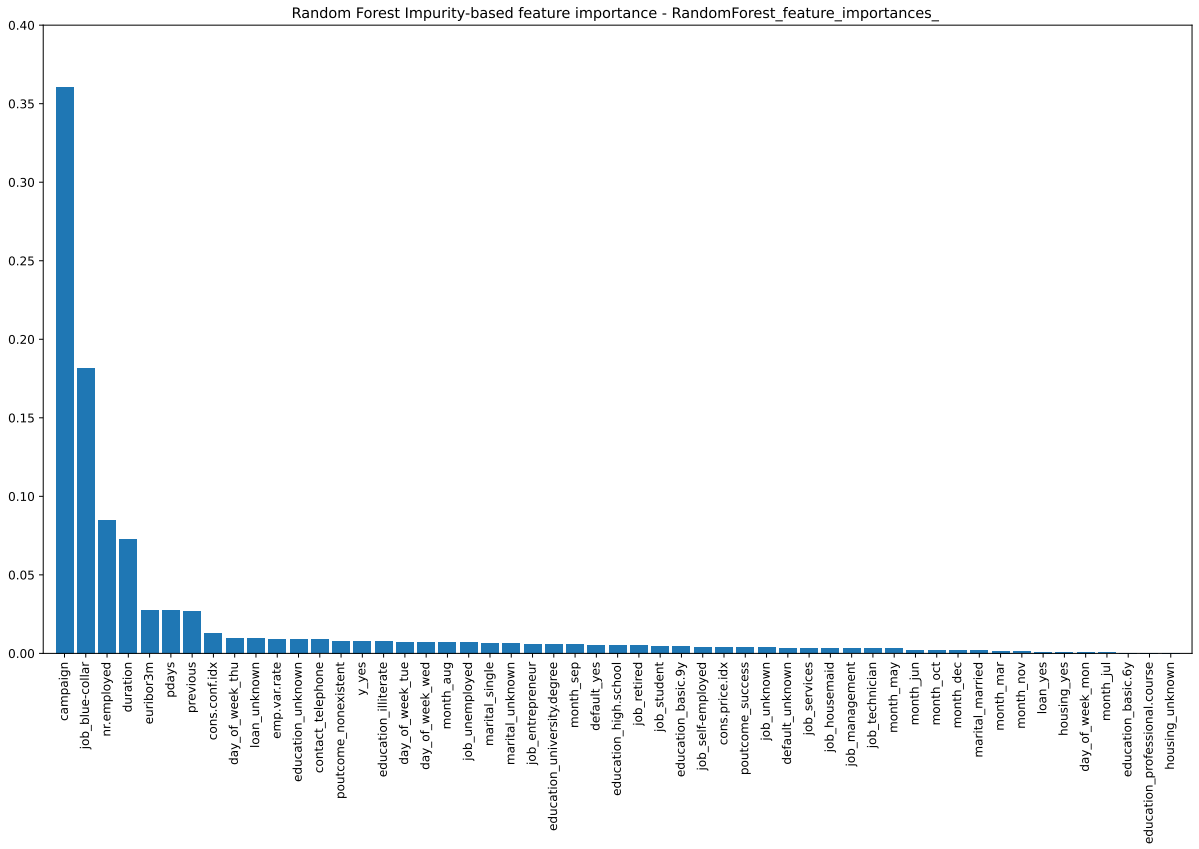

In [3]:
#===============One Hot Encoding=======================#
df=pd.get_dummies(data=df, drop_first=True)

In [11]:
#reduction independent vairables (>)
df = df[['campaign', 'job_blue-collar', 'nr.employed', 'duration', 'previous',
        'euribor3m', 'pdays', 'cons.conf.idx', 'y_yes', 'day_of_week_thu',
        'emp.var.rate', 'education_unknown', 'loan_unknown',
        'contact_telephone', 'month_aug', 'month_sep', 'education_illiterate',
        'poutcome_nonexistent', 'day_of_week_wed', 'day_of_week_tue',
        'job_unemployed', 'marital_single', 'education_university.degree',
        'marital_unknown', 'job_entrepreneur', 'default_yes',
        'education_high.school', 'job_retired', 'job_self-employed',
        'cons.price.idx', 'job_student', 'education_basic.9y',
        'poutcome_success', 'month_may', 'job_unknown', 'default_unknown',
        'job_housemaid', 'job_technician', 'job_services', 'job_management']]

## Independent and dependent variables <a class="anchor" id="1.12"></a>

In [12]:
# import method Data_trasnform by utils (smote = False)
X,y = data_trasnform(df, smote=False)

## Hyperparameter optimization <a class="anchor" id="1.13" ></a>

In [14]:
# hyperameters optimized with optuna based on recall / XGboost
hyperameters_xgboost = read_hyperameter_json('../best_params_models/XGBoost_hyperparameter.json')

Hyperameter:   {'n_estimators': 8212, 'colsample_bytree': 0.9294650104948371, 'gamma': 0.0008063171490771039, 'eta': 0.6873165675063626, 'max_depth': 8, 'tree_method': 'gpu_hist'}


In [15]:
# hyperameters optimized with optuna based on recall / RandomForest
hyperameters_randomForest = read_hyperameter_json('../best_params_models/random_forest_params.json')

Hyperameter:   {'n_estimators': 2300, 'max_depth': 11, 'max_features': 0.897477660447081}


## Training models <a class="anchor" id="1.14"></a>

In [30]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Regresion Logistica
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans

Metrics    Values
0  balance_accuracy_score  0.596598
1          accuracy_score  0.805911
2           roc_auc_score  0.596598
3                f1_score  0.271464
4         precision_score  0.504833
5            recall_score  0.223467

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


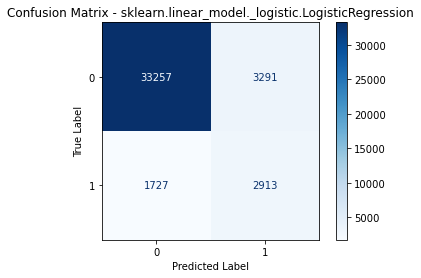

In [32]:
#reference model: logistic model
model_logistic = LogisticRegression()
model_logistic = classifier_SKF(model_logistic,X,y)

Metrics    Values
0  balance_accuracy_score  0.403708
1          accuracy_score  0.591613
2           roc_auc_score  0.403708
3                f1_score  0.044356
4         precision_score  0.054933
5            recall_score  0.059808

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


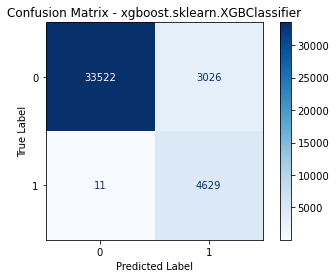

In [21]:
#methos to trains the models with a Straffied K fold
model_xgboost = XGBClassifier(**hyperameters_xgboost)
model_xgboost = classifier_SKF(model_xgboost,X,y)

Metrics    Values
0  balance_accuracy_score  0.415741
1          accuracy_score  0.619891
2           roc_auc_score  0.415741
3                f1_score  0.037318
4         precision_score  0.056922
5            recall_score  0.044987

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


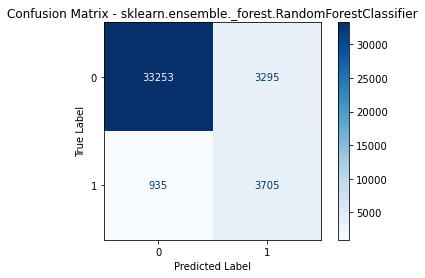

In [22]:
model_randomForest = RandomForestClassifier(**hyperameters_randomForest)
model_randomForest = classifier_SKF(model_randomForest,X,y)

Metrics    Values
0  balance_accuracy_score  0.541032
1          accuracy_score  0.790973
2           roc_auc_score  0.541032
3                f1_score  0.127055
4         precision_score  0.284097
5            recall_score  0.108038

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


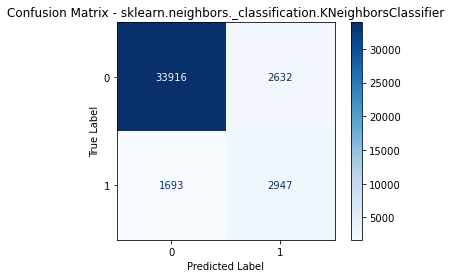

In [26]:
#==========KNeighborsClassifier========#
clf_knn = KNeighborsClassifier()
clf_knn = classifier_SKF(clf_knn,X,y)

Metrics    Values
0  balance_accuracy_score  0.510475
1          accuracy_score  0.747261
2           roc_auc_score  0.510475
3                f1_score  0.069259
4         precision_score  0.183234
5            recall_score  0.060831

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


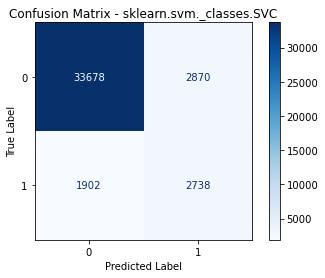

In [27]:
#================svm=================#
clf_svm = svm.SVC()
clf_svm = classifier_SKF(clf_svm,X,y)

Metrics    Values
0  balance_accuracy_score  0.661393
1          accuracy_score  0.455374
2           roc_auc_score  0.661393
3                f1_score  0.336335
4         precision_score  0.243890
5            recall_score  0.755588

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


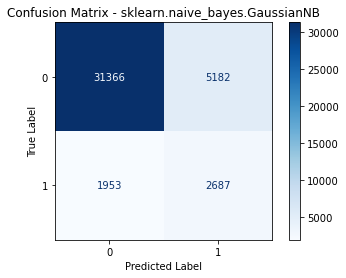

In [28]:
#============clf_gaussian==============#
clf_gaussian = GaussianNB()
clf_gaussian = classifier_SKF(clf_gaussian,X,y)

Learning rate set to 0.048184
0:	learn: 0.6115289	total: 238ms	remaining: 3m 57s
1:	learn: 0.5440569	total: 247ms	remaining: 2m 3s
2:	learn: 0.4878449	total: 258ms	remaining: 1m 25s
3:	learn: 0.4423883	total: 268ms	remaining: 1m 6s
4:	learn: 0.4065897	total: 278ms	remaining: 55.4s
5:	learn: 0.3742261	total: 289ms	remaining: 48s
6:	learn: 0.3514040	total: 300ms	remaining: 42.6s
7:	learn: 0.3301198	total: 310ms	remaining: 38.4s
8:	learn: 0.3128768	total: 321ms	remaining: 35.3s
9:	learn: 0.2980970	total: 332ms	remaining: 32.8s
10:	learn: 0.2833006	total: 342ms	remaining: 30.7s
11:	learn: 0.2735492	total: 353ms	remaining: 29.1s
12:	learn: 0.2643975	total: 364ms	remaining: 27.7s
13:	learn: 0.2538284	total: 374ms	remaining: 26.3s
14:	learn: 0.2464137	total: 385ms	remaining: 25.3s
15:	learn: 0.2389355	total: 398ms	remaining: 24.5s
16:	learn: 0.2304215	total: 409ms	remaining: 23.6s
17:	learn: 0.2251950	total: 422ms	remaining: 23s
18:	learn: 0.2207525	total: 435ms	remaining: 22.4s
19:	learn: 0.

160:	learn: 0.1619284	total: 2.18s	remaining: 11.4s
161:	learn: 0.1618218	total: 2.19s	remaining: 11.3s
162:	learn: 0.1617544	total: 2.2s	remaining: 11.3s
163:	learn: 0.1617141	total: 2.21s	remaining: 11.3s
164:	learn: 0.1616311	total: 2.23s	remaining: 11.3s
165:	learn: 0.1615596	total: 2.24s	remaining: 11.2s
166:	learn: 0.1613118	total: 2.25s	remaining: 11.2s
167:	learn: 0.1612593	total: 2.26s	remaining: 11.2s
168:	learn: 0.1611342	total: 2.28s	remaining: 11.2s
169:	learn: 0.1610440	total: 2.29s	remaining: 11.2s
170:	learn: 0.1609605	total: 2.3s	remaining: 11.2s
171:	learn: 0.1608882	total: 2.31s	remaining: 11.1s
172:	learn: 0.1608444	total: 2.32s	remaining: 11.1s
173:	learn: 0.1607923	total: 2.34s	remaining: 11.1s
174:	learn: 0.1607430	total: 2.35s	remaining: 11.1s
175:	learn: 0.1606806	total: 2.36s	remaining: 11.1s
176:	learn: 0.1606331	total: 2.37s	remaining: 11s
177:	learn: 0.1605937	total: 2.38s	remaining: 11s
178:	learn: 0.1604359	total: 2.4s	remaining: 11s
179:	learn: 0.1603933

322:	learn: 0.1511951	total: 4.08s	remaining: 8.54s
323:	learn: 0.1511353	total: 4.09s	remaining: 8.53s
324:	learn: 0.1510714	total: 4.1s	remaining: 8.52s
325:	learn: 0.1510250	total: 4.11s	remaining: 8.5s
326:	learn: 0.1509568	total: 4.12s	remaining: 8.49s
327:	learn: 0.1508913	total: 4.14s	remaining: 8.48s
328:	learn: 0.1508664	total: 4.15s	remaining: 8.46s
329:	learn: 0.1508432	total: 4.16s	remaining: 8.45s
330:	learn: 0.1508038	total: 4.17s	remaining: 8.43s
331:	learn: 0.1507544	total: 4.18s	remaining: 8.41s
332:	learn: 0.1507079	total: 4.19s	remaining: 8.4s
333:	learn: 0.1506762	total: 4.21s	remaining: 8.39s
334:	learn: 0.1506168	total: 4.22s	remaining: 8.38s
335:	learn: 0.1505839	total: 4.23s	remaining: 8.36s
336:	learn: 0.1505397	total: 4.24s	remaining: 8.35s
337:	learn: 0.1505073	total: 4.25s	remaining: 8.33s
338:	learn: 0.1504284	total: 4.26s	remaining: 8.31s
339:	learn: 0.1503787	total: 4.28s	remaining: 8.3s
340:	learn: 0.1503302	total: 4.29s	remaining: 8.28s
341:	learn: 0.15

489:	learn: 0.1435235	total: 5.88s	remaining: 6.12s
490:	learn: 0.1435092	total: 5.89s	remaining: 6.1s
491:	learn: 0.1434616	total: 5.9s	remaining: 6.09s
492:	learn: 0.1434035	total: 5.91s	remaining: 6.08s
493:	learn: 0.1433567	total: 5.92s	remaining: 6.06s
494:	learn: 0.1432841	total: 5.93s	remaining: 6.05s
495:	learn: 0.1432482	total: 5.94s	remaining: 6.03s
496:	learn: 0.1432154	total: 5.95s	remaining: 6.02s
497:	learn: 0.1431576	total: 5.96s	remaining: 6.01s
498:	learn: 0.1431187	total: 5.97s	remaining: 5.99s
499:	learn: 0.1430584	total: 5.98s	remaining: 5.98s
500:	learn: 0.1430133	total: 5.99s	remaining: 5.97s
501:	learn: 0.1429504	total: 6s	remaining: 5.96s
502:	learn: 0.1429155	total: 6.02s	remaining: 5.94s
503:	learn: 0.1428753	total: 6.03s	remaining: 5.93s
504:	learn: 0.1428411	total: 6.04s	remaining: 5.92s
505:	learn: 0.1427886	total: 6.05s	remaining: 5.9s
506:	learn: 0.1427333	total: 6.06s	remaining: 5.89s
507:	learn: 0.1426953	total: 6.07s	remaining: 5.88s
508:	learn: 0.1426

654:	learn: 0.1369870	total: 7.56s	remaining: 3.98s
655:	learn: 0.1369536	total: 7.57s	remaining: 3.97s
656:	learn: 0.1369261	total: 7.58s	remaining: 3.96s
657:	learn: 0.1368995	total: 7.59s	remaining: 3.95s
658:	learn: 0.1368669	total: 7.6s	remaining: 3.93s
659:	learn: 0.1368151	total: 7.61s	remaining: 3.92s
660:	learn: 0.1367799	total: 7.62s	remaining: 3.91s
661:	learn: 0.1367495	total: 7.63s	remaining: 3.9s
662:	learn: 0.1367108	total: 7.64s	remaining: 3.88s
663:	learn: 0.1366802	total: 7.65s	remaining: 3.87s
664:	learn: 0.1366554	total: 7.66s	remaining: 3.86s
665:	learn: 0.1366207	total: 7.67s	remaining: 3.85s
666:	learn: 0.1365793	total: 7.68s	remaining: 3.83s
667:	learn: 0.1365502	total: 7.69s	remaining: 3.82s
668:	learn: 0.1365356	total: 7.7s	remaining: 3.81s
669:	learn: 0.1365118	total: 7.71s	remaining: 3.8s
670:	learn: 0.1364818	total: 7.72s	remaining: 3.78s
671:	learn: 0.1364570	total: 7.73s	remaining: 3.77s
672:	learn: 0.1364428	total: 7.74s	remaining: 3.76s
673:	learn: 0.13

818:	learn: 0.1315022	total: 9.23s	remaining: 2.04s
819:	learn: 0.1314537	total: 9.24s	remaining: 2.03s
820:	learn: 0.1314344	total: 9.25s	remaining: 2.02s
821:	learn: 0.1313837	total: 9.26s	remaining: 2s
822:	learn: 0.1313444	total: 9.27s	remaining: 1.99s
823:	learn: 0.1313315	total: 9.28s	remaining: 1.98s
824:	learn: 0.1312811	total: 9.29s	remaining: 1.97s
825:	learn: 0.1312420	total: 9.3s	remaining: 1.96s
826:	learn: 0.1312126	total: 9.3s	remaining: 1.95s
827:	learn: 0.1311668	total: 9.31s	remaining: 1.94s
828:	learn: 0.1311140	total: 9.32s	remaining: 1.92s
829:	learn: 0.1310826	total: 9.33s	remaining: 1.91s
830:	learn: 0.1310438	total: 9.35s	remaining: 1.9s
831:	learn: 0.1310068	total: 9.36s	remaining: 1.89s
832:	learn: 0.1309989	total: 9.37s	remaining: 1.88s
833:	learn: 0.1309628	total: 9.38s	remaining: 1.87s
834:	learn: 0.1309366	total: 9.39s	remaining: 1.85s
835:	learn: 0.1309125	total: 9.4s	remaining: 1.84s
836:	learn: 0.1308822	total: 9.41s	remaining: 1.83s
837:	learn: 0.13085

992:	learn: 0.1262267	total: 11.1s	remaining: 77.9ms
993:	learn: 0.1261928	total: 11.1s	remaining: 66.8ms
994:	learn: 0.1261826	total: 11.1s	remaining: 55.6ms
995:	learn: 0.1261646	total: 11.1s	remaining: 44.5ms
996:	learn: 0.1261457	total: 11.1s	remaining: 33.4ms
997:	learn: 0.1261137	total: 11.1s	remaining: 22.2ms
998:	learn: 0.1260808	total: 11.1s	remaining: 11.1ms
999:	learn: 0.1260593	total: 11.1s	remaining: 0us
Learning rate set to 0.048184
0:	learn: 0.6091038	total: 9.69ms	remaining: 9.68s
1:	learn: 0.5428410	total: 18.7ms	remaining: 9.35s
2:	learn: 0.4848752	total: 27.9ms	remaining: 9.28s
3:	learn: 0.4400110	total: 37.7ms	remaining: 9.38s
4:	learn: 0.4042038	total: 46.7ms	remaining: 9.3s
5:	learn: 0.3724663	total: 56.2ms	remaining: 9.32s
6:	learn: 0.3500457	total: 66.3ms	remaining: 9.4s
7:	learn: 0.3278522	total: 75.6ms	remaining: 9.38s
8:	learn: 0.3118205	total: 86.5ms	remaining: 9.53s
9:	learn: 0.2953012	total: 96.3ms	remaining: 9.53s
10:	learn: 0.2820466	total: 106ms	remaini

160:	learn: 0.1634785	total: 1.65s	remaining: 8.59s
161:	learn: 0.1634387	total: 1.66s	remaining: 8.58s
162:	learn: 0.1633847	total: 1.67s	remaining: 8.56s
163:	learn: 0.1633558	total: 1.68s	remaining: 8.55s
164:	learn: 0.1633178	total: 1.69s	remaining: 8.54s
165:	learn: 0.1632577	total: 1.7s	remaining: 8.53s
166:	learn: 0.1632018	total: 1.71s	remaining: 8.52s
167:	learn: 0.1631346	total: 1.72s	remaining: 8.51s
168:	learn: 0.1630899	total: 1.73s	remaining: 8.49s
169:	learn: 0.1630402	total: 1.74s	remaining: 8.48s
170:	learn: 0.1630084	total: 1.75s	remaining: 8.47s
171:	learn: 0.1628628	total: 1.76s	remaining: 8.46s
172:	learn: 0.1627818	total: 1.77s	remaining: 8.45s
173:	learn: 0.1627145	total: 1.78s	remaining: 8.43s
174:	learn: 0.1626378	total: 1.79s	remaining: 8.43s
175:	learn: 0.1625810	total: 1.8s	remaining: 8.42s
176:	learn: 0.1624939	total: 1.81s	remaining: 8.41s
177:	learn: 0.1624208	total: 1.82s	remaining: 8.4s
178:	learn: 0.1623878	total: 1.83s	remaining: 8.39s
179:	learn: 0.1

336:	learn: 0.1528311	total: 3.52s	remaining: 6.92s
337:	learn: 0.1528032	total: 3.53s	remaining: 6.91s
338:	learn: 0.1527554	total: 3.54s	remaining: 6.9s
339:	learn: 0.1527061	total: 3.55s	remaining: 6.89s
340:	learn: 0.1526648	total: 3.56s	remaining: 6.88s
341:	learn: 0.1526279	total: 3.57s	remaining: 6.87s
342:	learn: 0.1525819	total: 3.58s	remaining: 6.86s
343:	learn: 0.1525412	total: 3.59s	remaining: 6.84s
344:	learn: 0.1524986	total: 3.6s	remaining: 6.84s
345:	learn: 0.1524438	total: 3.61s	remaining: 6.83s
346:	learn: 0.1523821	total: 3.62s	remaining: 6.82s
347:	learn: 0.1523167	total: 3.63s	remaining: 6.8s
348:	learn: 0.1522688	total: 3.64s	remaining: 6.79s
349:	learn: 0.1522283	total: 3.65s	remaining: 6.78s
350:	learn: 0.1521300	total: 3.66s	remaining: 6.77s
351:	learn: 0.1520488	total: 3.67s	remaining: 6.76s
352:	learn: 0.1519907	total: 3.68s	remaining: 6.75s
353:	learn: 0.1519205	total: 3.69s	remaining: 6.74s
354:	learn: 0.1518722	total: 3.7s	remaining: 6.72s
355:	learn: 0.15

497:	learn: 0.1452791	total: 5.19s	remaining: 5.23s
498:	learn: 0.1452079	total: 5.21s	remaining: 5.23s
499:	learn: 0.1451752	total: 5.22s	remaining: 5.22s
500:	learn: 0.1451548	total: 5.23s	remaining: 5.21s
501:	learn: 0.1450901	total: 5.24s	remaining: 5.2s
502:	learn: 0.1450572	total: 5.25s	remaining: 5.19s
503:	learn: 0.1450056	total: 5.26s	remaining: 5.18s
504:	learn: 0.1449788	total: 5.27s	remaining: 5.17s
505:	learn: 0.1449433	total: 5.28s	remaining: 5.16s
506:	learn: 0.1449104	total: 5.29s	remaining: 5.15s
507:	learn: 0.1448738	total: 5.3s	remaining: 5.14s
508:	learn: 0.1448535	total: 5.31s	remaining: 5.13s
509:	learn: 0.1448162	total: 5.33s	remaining: 5.12s
510:	learn: 0.1447667	total: 5.33s	remaining: 5.11s
511:	learn: 0.1446717	total: 5.34s	remaining: 5.09s
512:	learn: 0.1446003	total: 5.36s	remaining: 5.08s
513:	learn: 0.1445634	total: 5.36s	remaining: 5.07s
514:	learn: 0.1445243	total: 5.38s	remaining: 5.06s
515:	learn: 0.1444913	total: 5.39s	remaining: 5.05s
516:	learn: 0.

671:	learn: 0.1379646	total: 7s	remaining: 3.42s
672:	learn: 0.1379388	total: 7.01s	remaining: 3.41s
673:	learn: 0.1379179	total: 7.03s	remaining: 3.4s
674:	learn: 0.1378945	total: 7.04s	remaining: 3.39s
675:	learn: 0.1378583	total: 7.05s	remaining: 3.38s
676:	learn: 0.1378410	total: 7.06s	remaining: 3.37s
677:	learn: 0.1377381	total: 7.07s	remaining: 3.36s
678:	learn: 0.1377074	total: 7.08s	remaining: 3.35s
679:	learn: 0.1376720	total: 7.09s	remaining: 3.34s
680:	learn: 0.1376144	total: 7.1s	remaining: 3.33s
681:	learn: 0.1375596	total: 7.11s	remaining: 3.32s
682:	learn: 0.1375103	total: 7.12s	remaining: 3.31s
683:	learn: 0.1374593	total: 7.13s	remaining: 3.3s
684:	learn: 0.1374450	total: 7.15s	remaining: 3.29s
685:	learn: 0.1373855	total: 7.16s	remaining: 3.28s
686:	learn: 0.1373468	total: 7.17s	remaining: 3.27s
687:	learn: 0.1372874	total: 7.18s	remaining: 3.25s
688:	learn: 0.1372491	total: 7.19s	remaining: 3.24s
689:	learn: 0.1372301	total: 7.2s	remaining: 3.23s
690:	learn: 0.13718

835:	learn: 0.1321233	total: 8.69s	remaining: 1.71s
836:	learn: 0.1321020	total: 8.71s	remaining: 1.7s
837:	learn: 0.1320653	total: 8.71s	remaining: 1.68s
838:	learn: 0.1320284	total: 8.72s	remaining: 1.67s
839:	learn: 0.1319945	total: 8.73s	remaining: 1.66s
840:	learn: 0.1319624	total: 8.74s	remaining: 1.65s
841:	learn: 0.1319212	total: 8.75s	remaining: 1.64s
842:	learn: 0.1319032	total: 8.77s	remaining: 1.63s
843:	learn: 0.1318645	total: 8.78s	remaining: 1.62s
844:	learn: 0.1318223	total: 8.79s	remaining: 1.61s
845:	learn: 0.1317818	total: 8.8s	remaining: 1.6s
846:	learn: 0.1317454	total: 8.81s	remaining: 1.59s
847:	learn: 0.1317169	total: 8.82s	remaining: 1.58s
848:	learn: 0.1316877	total: 8.83s	remaining: 1.57s
849:	learn: 0.1316449	total: 8.84s	remaining: 1.56s
850:	learn: 0.1315968	total: 8.85s	remaining: 1.55s
851:	learn: 0.1315666	total: 8.86s	remaining: 1.54s
852:	learn: 0.1315316	total: 8.87s	remaining: 1.53s
853:	learn: 0.1314940	total: 8.88s	remaining: 1.52s
854:	learn: 0.1

995:	learn: 0.1271816	total: 10.4s	remaining: 41.6ms
996:	learn: 0.1271602	total: 10.4s	remaining: 31.2ms
997:	learn: 0.1271262	total: 10.4s	remaining: 20.8ms
998:	learn: 0.1270905	total: 10.4s	remaining: 10.4ms
999:	learn: 0.1270634	total: 10.4s	remaining: 0us
Learning rate set to 0.048184
0:	learn: 0.5966647	total: 12.2ms	remaining: 12.2s
1:	learn: 0.5283878	total: 22ms	remaining: 11s
2:	learn: 0.4662308	total: 31.4ms	remaining: 10.4s
3:	learn: 0.4210617	total: 40.7ms	remaining: 10.1s
4:	learn: 0.3821789	total: 51.4ms	remaining: 10.2s
5:	learn: 0.3532118	total: 61.3ms	remaining: 10.1s
6:	learn: 0.3310134	total: 72.7ms	remaining: 10.3s
7:	learn: 0.3080414	total: 83ms	remaining: 10.3s
8:	learn: 0.2949993	total: 92.8ms	remaining: 10.2s
9:	learn: 0.2776424	total: 103ms	remaining: 10.2s
10:	learn: 0.2623236	total: 112ms	remaining: 10.1s
11:	learn: 0.2522626	total: 122ms	remaining: 10s
12:	learn: 0.2419046	total: 131ms	remaining: 9.98s
13:	learn: 0.2353475	total: 141ms	remaining: 9.93s
14:

164:	learn: 0.1578878	total: 1.76s	remaining: 8.89s
165:	learn: 0.1577824	total: 1.77s	remaining: 8.89s
166:	learn: 0.1577428	total: 1.78s	remaining: 8.88s
167:	learn: 0.1576908	total: 1.79s	remaining: 8.87s
168:	learn: 0.1576197	total: 1.8s	remaining: 8.86s
169:	learn: 0.1575755	total: 1.81s	remaining: 8.85s
170:	learn: 0.1575216	total: 1.82s	remaining: 8.84s
171:	learn: 0.1574434	total: 1.83s	remaining: 8.82s
172:	learn: 0.1573464	total: 1.84s	remaining: 8.82s
173:	learn: 0.1571408	total: 1.85s	remaining: 8.8s
174:	learn: 0.1570657	total: 1.86s	remaining: 8.79s
175:	learn: 0.1569974	total: 1.87s	remaining: 8.77s
176:	learn: 0.1568742	total: 1.88s	remaining: 8.76s
177:	learn: 0.1567938	total: 1.9s	remaining: 8.75s
178:	learn: 0.1567365	total: 1.9s	remaining: 8.74s
179:	learn: 0.1566720	total: 1.92s	remaining: 8.72s
180:	learn: 0.1566147	total: 1.93s	remaining: 8.71s
181:	learn: 0.1565658	total: 1.94s	remaining: 8.7s
182:	learn: 0.1564647	total: 1.95s	remaining: 8.69s
183:	learn: 0.156

339:	learn: 0.1474069	total: 3.6s	remaining: 6.99s
340:	learn: 0.1473683	total: 3.61s	remaining: 6.98s
341:	learn: 0.1473139	total: 3.62s	remaining: 6.97s
342:	learn: 0.1472923	total: 3.63s	remaining: 6.96s
343:	learn: 0.1472119	total: 3.64s	remaining: 6.95s
344:	learn: 0.1471691	total: 3.65s	remaining: 6.94s
345:	learn: 0.1470990	total: 3.66s	remaining: 6.93s
346:	learn: 0.1470375	total: 3.67s	remaining: 6.91s
347:	learn: 0.1469788	total: 3.68s	remaining: 6.9s
348:	learn: 0.1469093	total: 3.69s	remaining: 6.89s
349:	learn: 0.1468596	total: 3.7s	remaining: 6.88s
350:	learn: 0.1468259	total: 3.71s	remaining: 6.87s
351:	learn: 0.1467510	total: 3.72s	remaining: 6.86s
352:	learn: 0.1466879	total: 3.74s	remaining: 6.85s
353:	learn: 0.1466259	total: 3.75s	remaining: 6.84s
354:	learn: 0.1465775	total: 3.76s	remaining: 6.83s
355:	learn: 0.1464983	total: 3.77s	remaining: 6.81s
356:	learn: 0.1464486	total: 3.78s	remaining: 6.8s
357:	learn: 0.1463856	total: 3.79s	remaining: 6.79s
358:	learn: 0.14

511:	learn: 0.1397129	total: 5.41s	remaining: 5.16s
512:	learn: 0.1396814	total: 5.42s	remaining: 5.14s
513:	learn: 0.1396463	total: 5.43s	remaining: 5.13s
514:	learn: 0.1396144	total: 5.44s	remaining: 5.12s
515:	learn: 0.1395560	total: 5.45s	remaining: 5.11s
516:	learn: 0.1395314	total: 5.46s	remaining: 5.1s
517:	learn: 0.1394995	total: 5.47s	remaining: 5.09s
518:	learn: 0.1394585	total: 5.48s	remaining: 5.08s
519:	learn: 0.1394141	total: 5.49s	remaining: 5.07s
520:	learn: 0.1393930	total: 5.5s	remaining: 5.05s
521:	learn: 0.1393347	total: 5.51s	remaining: 5.04s
522:	learn: 0.1392597	total: 5.52s	remaining: 5.03s
523:	learn: 0.1392248	total: 5.53s	remaining: 5.02s
524:	learn: 0.1391955	total: 5.54s	remaining: 5.01s
525:	learn: 0.1391602	total: 5.55s	remaining: 5s
526:	learn: 0.1391285	total: 5.57s	remaining: 5s
527:	learn: 0.1390957	total: 5.58s	remaining: 4.99s
528:	learn: 0.1390596	total: 5.59s	remaining: 4.98s
529:	learn: 0.1390353	total: 5.6s	remaining: 4.97s
530:	learn: 0.1390097

685:	learn: 0.1329631	total: 7.26s	remaining: 3.32s
686:	learn: 0.1329226	total: 7.27s	remaining: 3.31s
687:	learn: 0.1328680	total: 7.28s	remaining: 3.3s
688:	learn: 0.1328284	total: 7.29s	remaining: 3.29s
689:	learn: 0.1327967	total: 7.3s	remaining: 3.28s
690:	learn: 0.1327673	total: 7.31s	remaining: 3.27s
691:	learn: 0.1327447	total: 7.32s	remaining: 3.26s
692:	learn: 0.1327276	total: 7.33s	remaining: 3.25s
693:	learn: 0.1327054	total: 7.33s	remaining: 3.23s
694:	learn: 0.1326847	total: 7.35s	remaining: 3.22s
695:	learn: 0.1326227	total: 7.36s	remaining: 3.21s
696:	learn: 0.1326085	total: 7.37s	remaining: 3.2s
697:	learn: 0.1325590	total: 7.38s	remaining: 3.19s
698:	learn: 0.1325165	total: 7.39s	remaining: 3.18s
699:	learn: 0.1324617	total: 7.4s	remaining: 3.17s
700:	learn: 0.1324382	total: 7.41s	remaining: 3.16s
701:	learn: 0.1323934	total: 7.42s	remaining: 3.15s
702:	learn: 0.1323606	total: 7.43s	remaining: 3.14s
703:	learn: 0.1323338	total: 7.44s	remaining: 3.13s
704:	learn: 0.13

854:	learn: 0.1277088	total: 9.06s	remaining: 1.54s
855:	learn: 0.1276714	total: 9.07s	remaining: 1.53s
856:	learn: 0.1276550	total: 9.09s	remaining: 1.52s
857:	learn: 0.1276049	total: 9.1s	remaining: 1.5s
858:	learn: 0.1275591	total: 9.11s	remaining: 1.49s
859:	learn: 0.1274925	total: 9.12s	remaining: 1.48s
860:	learn: 0.1274575	total: 9.13s	remaining: 1.47s
861:	learn: 0.1274201	total: 9.13s	remaining: 1.46s
862:	learn: 0.1273883	total: 9.14s	remaining: 1.45s
863:	learn: 0.1273569	total: 9.16s	remaining: 1.44s
864:	learn: 0.1273271	total: 9.16s	remaining: 1.43s
865:	learn: 0.1272996	total: 9.18s	remaining: 1.42s
866:	learn: 0.1272754	total: 9.19s	remaining: 1.41s
867:	learn: 0.1272618	total: 9.2s	remaining: 1.4s
868:	learn: 0.1272171	total: 9.21s	remaining: 1.39s
869:	learn: 0.1271916	total: 9.22s	remaining: 1.38s
870:	learn: 0.1271580	total: 9.23s	remaining: 1.37s
871:	learn: 0.1271420	total: 9.24s	remaining: 1.36s
872:	learn: 0.1270996	total: 9.25s	remaining: 1.35s
873:	learn: 0.12

14:	learn: 0.2382765	total: 182ms	remaining: 12s
15:	learn: 0.2327056	total: 195ms	remaining: 12s
16:	learn: 0.2266889	total: 205ms	remaining: 11.8s
17:	learn: 0.2215948	total: 216ms	remaining: 11.8s
18:	learn: 0.2172052	total: 225ms	remaining: 11.6s
19:	learn: 0.2133197	total: 237ms	remaining: 11.6s
20:	learn: 0.2094709	total: 248ms	remaining: 11.6s
21:	learn: 0.2051957	total: 259ms	remaining: 11.5s
22:	learn: 0.2005786	total: 270ms	remaining: 11.5s
23:	learn: 0.1969014	total: 280ms	remaining: 11.4s
24:	learn: 0.1944692	total: 291ms	remaining: 11.4s
25:	learn: 0.1931444	total: 303ms	remaining: 11.3s
26:	learn: 0.1911365	total: 317ms	remaining: 11.4s
27:	learn: 0.1901194	total: 330ms	remaining: 11.5s
28:	learn: 0.1891160	total: 342ms	remaining: 11.5s
29:	learn: 0.1879006	total: 355ms	remaining: 11.5s
30:	learn: 0.1864170	total: 366ms	remaining: 11.4s
31:	learn: 0.1857276	total: 378ms	remaining: 11.4s
32:	learn: 0.1854305	total: 388ms	remaining: 11.4s
33:	learn: 0.1837303	total: 398ms	r

190:	learn: 0.1569298	total: 2.27s	remaining: 9.61s
191:	learn: 0.1568511	total: 2.28s	remaining: 9.59s
192:	learn: 0.1567402	total: 2.29s	remaining: 9.58s
193:	learn: 0.1566909	total: 2.3s	remaining: 9.56s
194:	learn: 0.1566171	total: 2.31s	remaining: 9.54s
195:	learn: 0.1565738	total: 2.32s	remaining: 9.53s
196:	learn: 0.1565295	total: 2.33s	remaining: 9.51s
197:	learn: 0.1563849	total: 2.34s	remaining: 9.49s
198:	learn: 0.1563136	total: 2.35s	remaining: 9.47s
199:	learn: 0.1562564	total: 2.36s	remaining: 9.46s
200:	learn: 0.1561851	total: 2.37s	remaining: 9.44s
201:	learn: 0.1561367	total: 2.38s	remaining: 9.42s
202:	learn: 0.1560852	total: 2.4s	remaining: 9.41s
203:	learn: 0.1560424	total: 2.41s	remaining: 9.39s
204:	learn: 0.1559630	total: 2.42s	remaining: 9.38s
205:	learn: 0.1559416	total: 2.43s	remaining: 9.36s
206:	learn: 0.1558805	total: 2.44s	remaining: 9.34s
207:	learn: 0.1557933	total: 2.45s	remaining: 9.34s
208:	learn: 0.1557438	total: 2.46s	remaining: 9.32s
209:	learn: 0.

353:	learn: 0.1474735	total: 4.09s	remaining: 7.47s
354:	learn: 0.1474290	total: 4.11s	remaining: 7.46s
355:	learn: 0.1473666	total: 4.12s	remaining: 7.45s
356:	learn: 0.1472983	total: 4.13s	remaining: 7.43s
357:	learn: 0.1472585	total: 4.14s	remaining: 7.42s
358:	learn: 0.1471993	total: 4.15s	remaining: 7.41s
359:	learn: 0.1471877	total: 4.16s	remaining: 7.39s
360:	learn: 0.1471440	total: 4.17s	remaining: 7.38s
361:	learn: 0.1471066	total: 4.18s	remaining: 7.36s
362:	learn: 0.1470583	total: 4.19s	remaining: 7.35s
363:	learn: 0.1470016	total: 4.2s	remaining: 7.34s
364:	learn: 0.1469417	total: 4.21s	remaining: 7.32s
365:	learn: 0.1469028	total: 4.22s	remaining: 7.31s
366:	learn: 0.1468697	total: 4.23s	remaining: 7.3s
367:	learn: 0.1468472	total: 4.24s	remaining: 7.29s
368:	learn: 0.1468047	total: 4.25s	remaining: 7.27s
369:	learn: 0.1467743	total: 4.26s	remaining: 7.26s
370:	learn: 0.1466685	total: 4.28s	remaining: 7.25s
371:	learn: 0.1466465	total: 4.29s	remaining: 7.24s
372:	learn: 0.

523:	learn: 0.1402616	total: 5.91s	remaining: 5.37s
524:	learn: 0.1402367	total: 5.92s	remaining: 5.36s
525:	learn: 0.1402125	total: 5.93s	remaining: 5.35s
526:	learn: 0.1401617	total: 5.94s	remaining: 5.33s
527:	learn: 0.1401502	total: 5.95s	remaining: 5.32s
528:	learn: 0.1401160	total: 5.96s	remaining: 5.31s
529:	learn: 0.1400930	total: 5.97s	remaining: 5.3s
530:	learn: 0.1400524	total: 5.98s	remaining: 5.29s
531:	learn: 0.1400344	total: 5.99s	remaining: 5.27s
532:	learn: 0.1399851	total: 6s	remaining: 5.26s
533:	learn: 0.1399431	total: 6.01s	remaining: 5.25s
534:	learn: 0.1399187	total: 6.02s	remaining: 5.24s
535:	learn: 0.1398839	total: 6.03s	remaining: 5.22s
536:	learn: 0.1398482	total: 6.04s	remaining: 5.21s
537:	learn: 0.1398165	total: 6.05s	remaining: 5.2s
538:	learn: 0.1397853	total: 6.06s	remaining: 5.19s
539:	learn: 0.1397239	total: 6.07s	remaining: 5.17s
540:	learn: 0.1396811	total: 6.08s	remaining: 5.16s
541:	learn: 0.1396433	total: 6.09s	remaining: 5.15s
542:	learn: 0.139

697:	learn: 0.1337819	total: 7.74s	remaining: 3.35s
698:	learn: 0.1337553	total: 7.75s	remaining: 3.34s
699:	learn: 0.1337157	total: 7.76s	remaining: 3.33s
700:	learn: 0.1336957	total: 7.77s	remaining: 3.31s
701:	learn: 0.1336548	total: 7.78s	remaining: 3.3s
702:	learn: 0.1336182	total: 7.79s	remaining: 3.29s
703:	learn: 0.1335702	total: 7.8s	remaining: 3.28s
704:	learn: 0.1335433	total: 7.81s	remaining: 3.27s
705:	learn: 0.1335150	total: 7.82s	remaining: 3.26s
706:	learn: 0.1334858	total: 7.83s	remaining: 3.25s
707:	learn: 0.1334631	total: 7.84s	remaining: 3.23s
708:	learn: 0.1334345	total: 7.85s	remaining: 3.22s
709:	learn: 0.1333796	total: 7.87s	remaining: 3.21s
710:	learn: 0.1333313	total: 7.88s	remaining: 3.2s
711:	learn: 0.1332879	total: 7.88s	remaining: 3.19s
712:	learn: 0.1332531	total: 7.89s	remaining: 3.18s
713:	learn: 0.1332202	total: 7.91s	remaining: 3.17s
714:	learn: 0.1331927	total: 7.92s	remaining: 3.15s
715:	learn: 0.1331681	total: 7.93s	remaining: 3.14s
716:	learn: 0.1

873:	learn: 0.1283007	total: 9.56s	remaining: 1.38s
874:	learn: 0.1282766	total: 9.57s	remaining: 1.37s
875:	learn: 0.1282516	total: 9.58s	remaining: 1.36s
876:	learn: 0.1282290	total: 9.6s	remaining: 1.34s
877:	learn: 0.1282053	total: 9.61s	remaining: 1.33s
878:	learn: 0.1281889	total: 9.62s	remaining: 1.32s
879:	learn: 0.1281446	total: 9.63s	remaining: 1.31s
880:	learn: 0.1281281	total: 9.64s	remaining: 1.3s
881:	learn: 0.1280974	total: 9.65s	remaining: 1.29s
882:	learn: 0.1280720	total: 9.66s	remaining: 1.28s
883:	learn: 0.1280332	total: 9.67s	remaining: 1.27s
884:	learn: 0.1279901	total: 9.68s	remaining: 1.26s
885:	learn: 0.1279607	total: 9.69s	remaining: 1.25s
886:	learn: 0.1279389	total: 9.7s	remaining: 1.24s
887:	learn: 0.1279098	total: 9.71s	remaining: 1.23s
888:	learn: 0.1278911	total: 9.73s	remaining: 1.21s
889:	learn: 0.1278753	total: 9.74s	remaining: 1.2s
890:	learn: 0.1278330	total: 9.75s	remaining: 1.19s
891:	learn: 0.1277914	total: 9.76s	remaining: 1.18s
892:	learn: 0.12

35:	learn: 0.1880044	total: 369ms	remaining: 9.88s
36:	learn: 0.1864295	total: 380ms	remaining: 9.9s
37:	learn: 0.1856638	total: 392ms	remaining: 9.92s
38:	learn: 0.1845648	total: 402ms	remaining: 9.92s
39:	learn: 0.1841277	total: 415ms	remaining: 9.95s
40:	learn: 0.1838081	total: 426ms	remaining: 9.97s
41:	learn: 0.1833580	total: 437ms	remaining: 9.97s
42:	learn: 0.1826763	total: 447ms	remaining: 9.95s
43:	learn: 0.1821745	total: 458ms	remaining: 9.96s
44:	learn: 0.1817138	total: 469ms	remaining: 9.96s
45:	learn: 0.1809393	total: 479ms	remaining: 9.94s
46:	learn: 0.1806294	total: 490ms	remaining: 9.94s
47:	learn: 0.1802017	total: 501ms	remaining: 9.93s
48:	learn: 0.1798566	total: 511ms	remaining: 9.91s
49:	learn: 0.1793868	total: 521ms	remaining: 9.9s
50:	learn: 0.1791431	total: 531ms	remaining: 9.88s
51:	learn: 0.1788379	total: 541ms	remaining: 9.87s
52:	learn: 0.1786851	total: 552ms	remaining: 9.86s
53:	learn: 0.1784688	total: 562ms	remaining: 9.85s
54:	learn: 0.1781919	total: 571ms

200:	learn: 0.1595024	total: 2.07s	remaining: 8.22s
201:	learn: 0.1594191	total: 2.08s	remaining: 8.21s
202:	learn: 0.1593796	total: 2.09s	remaining: 8.2s
203:	learn: 0.1593360	total: 2.1s	remaining: 8.2s
204:	learn: 0.1592907	total: 2.11s	remaining: 8.18s
205:	learn: 0.1591332	total: 2.12s	remaining: 8.17s
206:	learn: 0.1590254	total: 2.13s	remaining: 8.16s
207:	learn: 0.1589655	total: 2.14s	remaining: 8.15s
208:	learn: 0.1589048	total: 2.15s	remaining: 8.14s
209:	learn: 0.1588648	total: 2.16s	remaining: 8.13s
210:	learn: 0.1588302	total: 2.17s	remaining: 8.13s
211:	learn: 0.1587423	total: 2.18s	remaining: 8.12s
212:	learn: 0.1586642	total: 2.19s	remaining: 8.11s
213:	learn: 0.1585981	total: 2.2s	remaining: 8.1s
214:	learn: 0.1585726	total: 2.21s	remaining: 8.08s
215:	learn: 0.1585012	total: 2.22s	remaining: 8.07s
216:	learn: 0.1584475	total: 2.23s	remaining: 8.06s
217:	learn: 0.1584023	total: 2.24s	remaining: 8.05s
218:	learn: 0.1583485	total: 2.25s	remaining: 8.04s
219:	learn: 0.158

362:	learn: 0.1488005	total: 3.75s	remaining: 6.58s
363:	learn: 0.1487499	total: 3.76s	remaining: 6.57s
364:	learn: 0.1487009	total: 3.77s	remaining: 6.55s
365:	learn: 0.1486433	total: 3.78s	remaining: 6.54s
366:	learn: 0.1485954	total: 3.79s	remaining: 6.53s
367:	learn: 0.1485565	total: 3.8s	remaining: 6.52s
368:	learn: 0.1484581	total: 3.81s	remaining: 6.51s
369:	learn: 0.1484173	total: 3.82s	remaining: 6.5s
370:	learn: 0.1483740	total: 3.83s	remaining: 6.5s
371:	learn: 0.1483160	total: 3.84s	remaining: 6.49s
372:	learn: 0.1482707	total: 3.85s	remaining: 6.47s
373:	learn: 0.1482133	total: 3.86s	remaining: 6.46s
374:	learn: 0.1481226	total: 3.87s	remaining: 6.45s
375:	learn: 0.1480675	total: 3.88s	remaining: 6.44s
376:	learn: 0.1479662	total: 3.89s	remaining: 6.43s
377:	learn: 0.1479182	total: 3.9s	remaining: 6.42s
378:	learn: 0.1478722	total: 3.91s	remaining: 6.41s
379:	learn: 0.1478327	total: 3.92s	remaining: 6.4s
380:	learn: 0.1477440	total: 3.93s	remaining: 6.39s
381:	learn: 0.147

521:	learn: 0.1407745	total: 5.42s	remaining: 4.96s
522:	learn: 0.1407349	total: 5.43s	remaining: 4.95s
523:	learn: 0.1406820	total: 5.44s	remaining: 4.94s
524:	learn: 0.1406478	total: 5.45s	remaining: 4.93s
525:	learn: 0.1406125	total: 5.46s	remaining: 4.92s
526:	learn: 0.1405489	total: 5.47s	remaining: 4.91s
527:	learn: 0.1404835	total: 5.48s	remaining: 4.9s
528:	learn: 0.1404299	total: 5.49s	remaining: 4.89s
529:	learn: 0.1403533	total: 5.5s	remaining: 4.88s
530:	learn: 0.1403010	total: 5.51s	remaining: 4.87s
531:	learn: 0.1402435	total: 5.52s	remaining: 4.86s
532:	learn: 0.1402115	total: 5.53s	remaining: 4.85s
533:	learn: 0.1401850	total: 5.54s	remaining: 4.84s
534:	learn: 0.1401055	total: 5.55s	remaining: 4.83s
535:	learn: 0.1400564	total: 5.56s	remaining: 4.82s
536:	learn: 0.1400110	total: 5.57s	remaining: 4.8s
537:	learn: 0.1399784	total: 5.58s	remaining: 4.79s
538:	learn: 0.1399630	total: 5.59s	remaining: 4.78s
539:	learn: 0.1399301	total: 5.61s	remaining: 4.77s
540:	learn: 0.1

680:	learn: 0.1345214	total: 7.06s	remaining: 3.31s
681:	learn: 0.1344886	total: 7.07s	remaining: 3.29s
682:	learn: 0.1344695	total: 7.08s	remaining: 3.29s
683:	learn: 0.1344322	total: 7.09s	remaining: 3.27s
684:	learn: 0.1343965	total: 7.1s	remaining: 3.26s
685:	learn: 0.1343648	total: 7.11s	remaining: 3.25s
686:	learn: 0.1343113	total: 7.12s	remaining: 3.24s
687:	learn: 0.1342893	total: 7.13s	remaining: 3.23s
688:	learn: 0.1342146	total: 7.14s	remaining: 3.22s
689:	learn: 0.1341942	total: 7.15s	remaining: 3.21s
690:	learn: 0.1341566	total: 7.16s	remaining: 3.2s
691:	learn: 0.1341343	total: 7.17s	remaining: 3.19s
692:	learn: 0.1341122	total: 7.18s	remaining: 3.18s
693:	learn: 0.1340921	total: 7.19s	remaining: 3.17s
694:	learn: 0.1340788	total: 7.2s	remaining: 3.16s
695:	learn: 0.1340579	total: 7.21s	remaining: 3.15s
696:	learn: 0.1340261	total: 7.22s	remaining: 3.14s
697:	learn: 0.1339992	total: 7.23s	remaining: 3.13s
698:	learn: 0.1339521	total: 7.24s	remaining: 3.12s
699:	learn: 0.1

845:	learn: 0.1288192	total: 8.75s	remaining: 1.59s
846:	learn: 0.1287998	total: 8.76s	remaining: 1.58s
847:	learn: 0.1287814	total: 8.77s	remaining: 1.57s
848:	learn: 0.1287637	total: 8.78s	remaining: 1.56s
849:	learn: 0.1287102	total: 8.79s	remaining: 1.55s
850:	learn: 0.1286644	total: 8.81s	remaining: 1.54s
851:	learn: 0.1286478	total: 8.82s	remaining: 1.53s
852:	learn: 0.1286102	total: 8.83s	remaining: 1.52s
853:	learn: 0.1285828	total: 8.84s	remaining: 1.51s
854:	learn: 0.1285539	total: 8.85s	remaining: 1.5s
855:	learn: 0.1285110	total: 8.86s	remaining: 1.49s
856:	learn: 0.1284841	total: 8.87s	remaining: 1.48s
857:	learn: 0.1284701	total: 8.88s	remaining: 1.47s
858:	learn: 0.1284270	total: 8.89s	remaining: 1.46s
859:	learn: 0.1284071	total: 8.9s	remaining: 1.45s
860:	learn: 0.1283689	total: 8.91s	remaining: 1.44s
861:	learn: 0.1283384	total: 8.93s	remaining: 1.43s
862:	learn: 0.1283078	total: 8.94s	remaining: 1.42s
863:	learn: 0.1282796	total: 8.95s	remaining: 1.41s
864:	learn: 0.

16:	learn: 0.2305755	total: 172ms	remaining: 9.94s
17:	learn: 0.2252517	total: 182ms	remaining: 9.93s
18:	learn: 0.2205393	total: 191ms	remaining: 9.88s
19:	learn: 0.2165068	total: 203ms	remaining: 9.93s
20:	learn: 0.2132570	total: 213ms	remaining: 9.91s
21:	learn: 0.2102964	total: 222ms	remaining: 9.88s
22:	learn: 0.2075333	total: 234ms	remaining: 9.94s
23:	learn: 0.2058446	total: 243ms	remaining: 9.9s
24:	learn: 0.2034091	total: 253ms	remaining: 9.86s
25:	learn: 0.2016824	total: 264ms	remaining: 9.87s
26:	learn: 0.2003293	total: 273ms	remaining: 9.84s
27:	learn: 0.1991417	total: 283ms	remaining: 9.84s
28:	learn: 0.1970120	total: 293ms	remaining: 9.81s
29:	learn: 0.1954518	total: 302ms	remaining: 9.76s
30:	learn: 0.1945380	total: 312ms	remaining: 9.77s
31:	learn: 0.1926436	total: 323ms	remaining: 9.77s
32:	learn: 0.1908650	total: 332ms	remaining: 9.74s
33:	learn: 0.1897469	total: 342ms	remaining: 9.72s
34:	learn: 0.1891652	total: 353ms	remaining: 9.73s
35:	learn: 0.1883985	total: 362m

178:	learn: 0.1576985	total: 1.82s	remaining: 8.35s
179:	learn: 0.1576035	total: 1.83s	remaining: 8.35s
180:	learn: 0.1574732	total: 1.84s	remaining: 8.34s
181:	learn: 0.1574324	total: 1.85s	remaining: 8.33s
182:	learn: 0.1573357	total: 1.86s	remaining: 8.32s
183:	learn: 0.1572514	total: 1.88s	remaining: 8.32s
184:	learn: 0.1571824	total: 1.89s	remaining: 8.31s
185:	learn: 0.1570896	total: 1.9s	remaining: 8.31s
186:	learn: 0.1570467	total: 1.91s	remaining: 8.3s
187:	learn: 0.1569160	total: 1.92s	remaining: 8.29s
188:	learn: 0.1568696	total: 1.93s	remaining: 8.28s
189:	learn: 0.1568003	total: 1.94s	remaining: 8.27s
190:	learn: 0.1567500	total: 1.95s	remaining: 8.26s
191:	learn: 0.1566849	total: 1.96s	remaining: 8.25s
192:	learn: 0.1566103	total: 1.97s	remaining: 8.25s
193:	learn: 0.1564038	total: 1.99s	remaining: 8.25s
194:	learn: 0.1563696	total: 2s	remaining: 8.25s
195:	learn: 0.1563038	total: 2.01s	remaining: 8.24s
196:	learn: 0.1562617	total: 2.02s	remaining: 8.23s
197:	learn: 0.156

338:	learn: 0.1478310	total: 3.53s	remaining: 6.89s
339:	learn: 0.1477956	total: 3.54s	remaining: 6.88s
340:	learn: 0.1477371	total: 3.55s	remaining: 6.86s
341:	learn: 0.1476873	total: 3.56s	remaining: 6.85s
342:	learn: 0.1476486	total: 3.57s	remaining: 6.84s
343:	learn: 0.1476057	total: 3.58s	remaining: 6.83s
344:	learn: 0.1475572	total: 3.59s	remaining: 6.82s
345:	learn: 0.1475178	total: 3.6s	remaining: 6.81s
346:	learn: 0.1474615	total: 3.61s	remaining: 6.8s
347:	learn: 0.1473995	total: 3.62s	remaining: 6.79s
348:	learn: 0.1473704	total: 3.63s	remaining: 6.78s
349:	learn: 0.1473222	total: 3.64s	remaining: 6.76s
350:	learn: 0.1472383	total: 3.65s	remaining: 6.75s
351:	learn: 0.1471672	total: 3.66s	remaining: 6.74s
352:	learn: 0.1471086	total: 3.67s	remaining: 6.73s
353:	learn: 0.1470564	total: 3.68s	remaining: 6.72s
354:	learn: 0.1470173	total: 3.69s	remaining: 6.71s
355:	learn: 0.1469428	total: 3.7s	remaining: 6.7s
356:	learn: 0.1469030	total: 3.71s	remaining: 6.69s
357:	learn: 0.14

515:	learn: 0.1398049	total: 5.38s	remaining: 5.04s
516:	learn: 0.1397371	total: 5.39s	remaining: 5.03s
517:	learn: 0.1397006	total: 5.4s	remaining: 5.02s
518:	learn: 0.1396432	total: 5.41s	remaining: 5.01s
519:	learn: 0.1396211	total: 5.42s	remaining: 5s
520:	learn: 0.1395745	total: 5.43s	remaining: 4.99s
521:	learn: 0.1395251	total: 5.44s	remaining: 4.98s
522:	learn: 0.1394887	total: 5.45s	remaining: 4.97s
523:	learn: 0.1394341	total: 5.46s	remaining: 4.96s
524:	learn: 0.1393883	total: 5.47s	remaining: 4.95s
525:	learn: 0.1393619	total: 5.48s	remaining: 4.94s
526:	learn: 0.1393236	total: 5.49s	remaining: 4.92s
527:	learn: 0.1392910	total: 5.5s	remaining: 4.91s
528:	learn: 0.1392455	total: 5.51s	remaining: 4.9s
529:	learn: 0.1391938	total: 5.52s	remaining: 4.89s
530:	learn: 0.1391664	total: 5.53s	remaining: 4.88s
531:	learn: 0.1391433	total: 5.54s	remaining: 4.87s
532:	learn: 0.1391122	total: 5.55s	remaining: 4.86s
533:	learn: 0.1390589	total: 5.56s	remaining: 4.85s
534:	learn: 0.1389

677:	learn: 0.1333782	total: 7.05s	remaining: 3.35s
678:	learn: 0.1333386	total: 7.06s	remaining: 3.34s
679:	learn: 0.1332984	total: 7.07s	remaining: 3.33s
680:	learn: 0.1332709	total: 7.08s	remaining: 3.32s
681:	learn: 0.1332482	total: 7.09s	remaining: 3.31s
682:	learn: 0.1332080	total: 7.1s	remaining: 3.29s
683:	learn: 0.1331747	total: 7.11s	remaining: 3.29s
684:	learn: 0.1331217	total: 7.12s	remaining: 3.27s
685:	learn: 0.1331013	total: 7.13s	remaining: 3.26s
686:	learn: 0.1330608	total: 7.14s	remaining: 3.25s
687:	learn: 0.1330211	total: 7.15s	remaining: 3.24s
688:	learn: 0.1329873	total: 7.16s	remaining: 3.23s
689:	learn: 0.1329198	total: 7.18s	remaining: 3.22s
690:	learn: 0.1328838	total: 7.19s	remaining: 3.21s
691:	learn: 0.1328603	total: 7.2s	remaining: 3.2s
692:	learn: 0.1328207	total: 7.21s	remaining: 3.19s
693:	learn: 0.1327937	total: 7.22s	remaining: 3.18s
694:	learn: 0.1327583	total: 7.23s	remaining: 3.17s
695:	learn: 0.1327270	total: 7.24s	remaining: 3.16s
696:	learn: 0.1

852:	learn: 0.1277657	total: 8.9s	remaining: 1.53s
853:	learn: 0.1277317	total: 8.91s	remaining: 1.52s
854:	learn: 0.1276980	total: 8.92s	remaining: 1.51s
855:	learn: 0.1276739	total: 8.93s	remaining: 1.5s
856:	learn: 0.1276527	total: 8.94s	remaining: 1.49s
857:	learn: 0.1276106	total: 8.95s	remaining: 1.48s
858:	learn: 0.1275782	total: 8.96s	remaining: 1.47s
859:	learn: 0.1275201	total: 8.97s	remaining: 1.46s
860:	learn: 0.1274910	total: 8.98s	remaining: 1.45s
861:	learn: 0.1274700	total: 8.99s	remaining: 1.44s
862:	learn: 0.1274451	total: 9s	remaining: 1.43s
863:	learn: 0.1273968	total: 9.02s	remaining: 1.42s
864:	learn: 0.1273630	total: 9.03s	remaining: 1.41s
865:	learn: 0.1273261	total: 9.04s	remaining: 1.4s
866:	learn: 0.1272921	total: 9.04s	remaining: 1.39s
867:	learn: 0.1272882	total: 9.05s	remaining: 1.38s
868:	learn: 0.1272472	total: 9.06s	remaining: 1.37s
869:	learn: 0.1272139	total: 9.08s	remaining: 1.36s
870:	learn: 0.1271922	total: 9.09s	remaining: 1.35s
871:	learn: 0.1271

18:	learn: 0.2292844	total: 187ms	remaining: 9.66s
19:	learn: 0.2259659	total: 198ms	remaining: 9.71s
20:	learn: 0.2226834	total: 208ms	remaining: 9.69s
21:	learn: 0.2193964	total: 218ms	remaining: 9.67s
22:	learn: 0.2157144	total: 228ms	remaining: 9.69s
23:	learn: 0.2114868	total: 238ms	remaining: 9.66s
24:	learn: 0.2088860	total: 248ms	remaining: 9.67s
25:	learn: 0.2070838	total: 262ms	remaining: 9.83s
26:	learn: 0.2058706	total: 272ms	remaining: 9.81s
27:	learn: 0.2043718	total: 282ms	remaining: 9.79s
28:	learn: 0.2021104	total: 293ms	remaining: 9.81s
29:	learn: 0.2008566	total: 304ms	remaining: 9.83s
30:	learn: 0.1984758	total: 314ms	remaining: 9.83s
31:	learn: 0.1968337	total: 325ms	remaining: 9.83s
32:	learn: 0.1961436	total: 335ms	remaining: 9.81s
33:	learn: 0.1935885	total: 345ms	remaining: 9.79s
34:	learn: 0.1927865	total: 355ms	remaining: 9.8s
35:	learn: 0.1923999	total: 365ms	remaining: 9.78s
36:	learn: 0.1917482	total: 376ms	remaining: 9.78s
37:	learn: 0.1908059	total: 386m

192:	learn: 0.1586242	total: 2.02s	remaining: 8.47s
193:	learn: 0.1585474	total: 2.04s	remaining: 8.46s
194:	learn: 0.1584261	total: 2.04s	remaining: 8.44s
195:	learn: 0.1583487	total: 2.06s	remaining: 8.43s
196:	learn: 0.1582760	total: 2.07s	remaining: 8.42s
197:	learn: 0.1581799	total: 2.08s	remaining: 8.41s
198:	learn: 0.1580621	total: 2.08s	remaining: 8.39s
199:	learn: 0.1579554	total: 2.1s	remaining: 8.38s
200:	learn: 0.1578397	total: 2.1s	remaining: 8.37s
201:	learn: 0.1577746	total: 2.12s	remaining: 8.36s
202:	learn: 0.1576877	total: 2.13s	remaining: 8.35s
203:	learn: 0.1576307	total: 2.14s	remaining: 8.35s
204:	learn: 0.1575616	total: 2.15s	remaining: 8.33s
205:	learn: 0.1574996	total: 2.16s	remaining: 8.32s
206:	learn: 0.1574123	total: 2.17s	remaining: 8.31s
207:	learn: 0.1573575	total: 2.18s	remaining: 8.29s
208:	learn: 0.1573119	total: 2.19s	remaining: 8.28s
209:	learn: 0.1572588	total: 2.2s	remaining: 8.27s
210:	learn: 0.1572210	total: 2.21s	remaining: 8.26s
211:	learn: 0.1

366:	learn: 0.1483606	total: 3.88s	remaining: 6.68s
367:	learn: 0.1483016	total: 3.89s	remaining: 6.68s
368:	learn: 0.1482434	total: 3.9s	remaining: 6.67s
369:	learn: 0.1481924	total: 3.91s	remaining: 6.66s
370:	learn: 0.1480822	total: 3.92s	remaining: 6.65s
371:	learn: 0.1480174	total: 3.94s	remaining: 6.65s
372:	learn: 0.1479608	total: 3.95s	remaining: 6.64s
373:	learn: 0.1479146	total: 3.96s	remaining: 6.63s
374:	learn: 0.1478619	total: 3.97s	remaining: 6.61s
375:	learn: 0.1478156	total: 3.98s	remaining: 6.6s
376:	learn: 0.1477573	total: 3.99s	remaining: 6.59s
377:	learn: 0.1476879	total: 4s	remaining: 6.58s
378:	learn: 0.1476591	total: 4.01s	remaining: 6.57s
379:	learn: 0.1476156	total: 4.02s	remaining: 6.56s
380:	learn: 0.1475543	total: 4.03s	remaining: 6.55s
381:	learn: 0.1474475	total: 4.04s	remaining: 6.53s
382:	learn: 0.1474074	total: 4.05s	remaining: 6.52s
383:	learn: 0.1473437	total: 4.06s	remaining: 6.51s
384:	learn: 0.1472993	total: 4.07s	remaining: 6.51s
385:	learn: 0.147

538:	learn: 0.1406257	total: 5.72s	remaining: 4.89s
539:	learn: 0.1406054	total: 5.73s	remaining: 4.88s
540:	learn: 0.1405420	total: 5.74s	remaining: 4.87s
541:	learn: 0.1404750	total: 5.75s	remaining: 4.86s
542:	learn: 0.1404470	total: 5.76s	remaining: 4.84s
543:	learn: 0.1404127	total: 5.77s	remaining: 4.83s
544:	learn: 0.1403766	total: 5.78s	remaining: 4.83s
545:	learn: 0.1403541	total: 5.79s	remaining: 4.82s
546:	learn: 0.1403434	total: 5.8s	remaining: 4.8s
547:	learn: 0.1402907	total: 5.81s	remaining: 4.79s
548:	learn: 0.1402511	total: 5.82s	remaining: 4.78s
549:	learn: 0.1402223	total: 5.84s	remaining: 4.78s
550:	learn: 0.1402133	total: 5.85s	remaining: 4.76s
551:	learn: 0.1401820	total: 5.86s	remaining: 4.75s
552:	learn: 0.1401455	total: 5.87s	remaining: 4.74s
553:	learn: 0.1400877	total: 5.88s	remaining: 4.73s
554:	learn: 0.1400194	total: 5.89s	remaining: 4.72s
555:	learn: 0.1399737	total: 5.9s	remaining: 4.71s
556:	learn: 0.1399446	total: 5.91s	remaining: 4.7s
557:	learn: 0.13

702:	learn: 0.1339108	total: 7.56s	remaining: 3.19s
703:	learn: 0.1338803	total: 7.57s	remaining: 3.18s
704:	learn: 0.1338542	total: 7.58s	remaining: 3.17s
705:	learn: 0.1338284	total: 7.59s	remaining: 3.16s
706:	learn: 0.1337967	total: 7.6s	remaining: 3.15s
707:	learn: 0.1337639	total: 7.61s	remaining: 3.14s
708:	learn: 0.1337215	total: 7.62s	remaining: 3.13s
709:	learn: 0.1336855	total: 7.63s	remaining: 3.12s
710:	learn: 0.1336290	total: 7.64s	remaining: 3.1s
711:	learn: 0.1335907	total: 7.65s	remaining: 3.09s
712:	learn: 0.1335617	total: 7.66s	remaining: 3.08s
713:	learn: 0.1335408	total: 7.67s	remaining: 3.07s
714:	learn: 0.1335051	total: 7.68s	remaining: 3.06s
715:	learn: 0.1334681	total: 7.69s	remaining: 3.05s
716:	learn: 0.1334377	total: 7.7s	remaining: 3.04s
717:	learn: 0.1334066	total: 7.71s	remaining: 3.03s
718:	learn: 0.1333946	total: 7.72s	remaining: 3.02s
719:	learn: 0.1333729	total: 7.73s	remaining: 3s
720:	learn: 0.1333500	total: 7.74s	remaining: 2.99s
721:	learn: 0.1333

874:	learn: 0.1283099	total: 9.39s	remaining: 1.34s
875:	learn: 0.1282675	total: 9.4s	remaining: 1.33s
876:	learn: 0.1282292	total: 9.41s	remaining: 1.32s
877:	learn: 0.1282076	total: 9.42s	remaining: 1.31s
878:	learn: 0.1281677	total: 9.43s	remaining: 1.3s
879:	learn: 0.1281431	total: 9.44s	remaining: 1.29s
880:	learn: 0.1281045	total: 9.45s	remaining: 1.28s
881:	learn: 0.1280713	total: 9.46s	remaining: 1.26s
882:	learn: 0.1280056	total: 9.47s	remaining: 1.25s
883:	learn: 0.1279730	total: 9.48s	remaining: 1.24s
884:	learn: 0.1279550	total: 9.49s	remaining: 1.23s
885:	learn: 0.1279219	total: 9.5s	remaining: 1.22s
886:	learn: 0.1278903	total: 9.51s	remaining: 1.21s
887:	learn: 0.1278516	total: 9.52s	remaining: 1.2s
888:	learn: 0.1278222	total: 9.53s	remaining: 1.19s
889:	learn: 0.1277913	total: 9.54s	remaining: 1.18s
890:	learn: 0.1277603	total: 9.55s	remaining: 1.17s
891:	learn: 0.1277088	total: 9.56s	remaining: 1.16s
892:	learn: 0.1276717	total: 9.57s	remaining: 1.15s
893:	learn: 0.12

33:	learn: 0.1652832	total: 352ms	remaining: 10s
34:	learn: 0.1648038	total: 362ms	remaining: 9.97s
35:	learn: 0.1635018	total: 373ms	remaining: 9.98s
36:	learn: 0.1622181	total: 383ms	remaining: 9.97s
37:	learn: 0.1619432	total: 393ms	remaining: 9.94s
38:	learn: 0.1614647	total: 403ms	remaining: 9.94s
39:	learn: 0.1608724	total: 413ms	remaining: 9.91s
40:	learn: 0.1597988	total: 423ms	remaining: 9.89s
41:	learn: 0.1592775	total: 432ms	remaining: 9.86s
42:	learn: 0.1588335	total: 442ms	remaining: 9.84s
43:	learn: 0.1583122	total: 452ms	remaining: 9.81s
44:	learn: 0.1579289	total: 461ms	remaining: 9.78s
45:	learn: 0.1577076	total: 471ms	remaining: 9.76s
46:	learn: 0.1573334	total: 480ms	remaining: 9.74s
47:	learn: 0.1567400	total: 491ms	remaining: 9.73s
48:	learn: 0.1564783	total: 501ms	remaining: 9.72s
49:	learn: 0.1558824	total: 511ms	remaining: 9.72s
50:	learn: 0.1555871	total: 521ms	remaining: 9.7s
51:	learn: 0.1553034	total: 532ms	remaining: 9.7s
52:	learn: 0.1546427	total: 544ms	r

206:	learn: 0.1381957	total: 2.16s	remaining: 8.28s
207:	learn: 0.1381686	total: 2.17s	remaining: 8.27s
208:	learn: 0.1381267	total: 2.18s	remaining: 8.26s
209:	learn: 0.1380769	total: 2.19s	remaining: 8.25s
210:	learn: 0.1380199	total: 2.2s	remaining: 8.24s
211:	learn: 0.1379653	total: 2.21s	remaining: 8.22s
212:	learn: 0.1379230	total: 2.22s	remaining: 8.21s
213:	learn: 0.1378976	total: 2.23s	remaining: 8.2s
214:	learn: 0.1378505	total: 2.24s	remaining: 8.19s
215:	learn: 0.1377802	total: 2.25s	remaining: 8.18s
216:	learn: 0.1377437	total: 2.26s	remaining: 8.17s
217:	learn: 0.1377201	total: 2.27s	remaining: 8.15s
218:	learn: 0.1376819	total: 2.28s	remaining: 8.14s
219:	learn: 0.1376448	total: 2.29s	remaining: 8.13s
220:	learn: 0.1376071	total: 2.3s	remaining: 8.12s
221:	learn: 0.1375567	total: 2.31s	remaining: 8.11s
222:	learn: 0.1375118	total: 2.32s	remaining: 8.1s
223:	learn: 0.1374641	total: 2.33s	remaining: 8.09s
224:	learn: 0.1374238	total: 2.35s	remaining: 8.08s
225:	learn: 0.13

381:	learn: 0.1299938	total: 4.03s	remaining: 6.51s
382:	learn: 0.1299680	total: 4.04s	remaining: 6.5s
383:	learn: 0.1299196	total: 4.04s	remaining: 6.49s
384:	learn: 0.1298907	total: 4.06s	remaining: 6.48s
385:	learn: 0.1298533	total: 4.07s	remaining: 6.47s
386:	learn: 0.1298145	total: 4.08s	remaining: 6.46s
387:	learn: 0.1297825	total: 4.08s	remaining: 6.44s
388:	learn: 0.1297567	total: 4.09s	remaining: 6.43s
389:	learn: 0.1297028	total: 4.11s	remaining: 6.42s
390:	learn: 0.1296389	total: 4.12s	remaining: 6.41s
391:	learn: 0.1296077	total: 4.13s	remaining: 6.4s
392:	learn: 0.1295951	total: 4.14s	remaining: 6.39s
393:	learn: 0.1295492	total: 4.15s	remaining: 6.38s
394:	learn: 0.1295128	total: 4.16s	remaining: 6.37s
395:	learn: 0.1294129	total: 4.17s	remaining: 6.36s
396:	learn: 0.1293579	total: 4.18s	remaining: 6.35s
397:	learn: 0.1293123	total: 4.19s	remaining: 6.34s
398:	learn: 0.1292887	total: 4.2s	remaining: 6.32s
399:	learn: 0.1292458	total: 4.21s	remaining: 6.31s
400:	learn: 0.1

542:	learn: 0.1238296	total: 5.7s	remaining: 4.8s
543:	learn: 0.1237997	total: 5.71s	remaining: 4.79s
544:	learn: 0.1237674	total: 5.72s	remaining: 4.78s
545:	learn: 0.1237266	total: 5.73s	remaining: 4.77s
546:	learn: 0.1236989	total: 5.74s	remaining: 4.76s
547:	learn: 0.1236368	total: 5.75s	remaining: 4.75s
548:	learn: 0.1236057	total: 5.76s	remaining: 4.74s
549:	learn: 0.1235666	total: 5.78s	remaining: 4.72s
550:	learn: 0.1235399	total: 5.79s	remaining: 4.72s
551:	learn: 0.1235171	total: 5.8s	remaining: 4.71s
552:	learn: 0.1235073	total: 5.81s	remaining: 4.7s
553:	learn: 0.1234573	total: 5.82s	remaining: 4.68s
554:	learn: 0.1234120	total: 5.83s	remaining: 4.67s
555:	learn: 0.1233805	total: 5.84s	remaining: 4.67s
556:	learn: 0.1233472	total: 5.85s	remaining: 4.66s
557:	learn: 0.1233183	total: 5.87s	remaining: 4.65s
558:	learn: 0.1232919	total: 5.88s	remaining: 4.64s
559:	learn: 0.1232553	total: 5.89s	remaining: 4.63s
560:	learn: 0.1232248	total: 5.9s	remaining: 4.62s
561:	learn: 0.123

713:	learn: 0.1181303	total: 7.51s	remaining: 3.01s
714:	learn: 0.1180973	total: 7.52s	remaining: 3s
715:	learn: 0.1180718	total: 7.53s	remaining: 2.98s
716:	learn: 0.1180355	total: 7.54s	remaining: 2.98s
717:	learn: 0.1179999	total: 7.55s	remaining: 2.96s
718:	learn: 0.1179609	total: 7.56s	remaining: 2.95s
719:	learn: 0.1179132	total: 7.57s	remaining: 2.94s
720:	learn: 0.1178825	total: 7.58s	remaining: 2.93s
721:	learn: 0.1178545	total: 7.59s	remaining: 2.92s
722:	learn: 0.1178232	total: 7.6s	remaining: 2.91s
723:	learn: 0.1178078	total: 7.61s	remaining: 2.9s
724:	learn: 0.1177583	total: 7.62s	remaining: 2.89s
725:	learn: 0.1177456	total: 7.63s	remaining: 2.88s
726:	learn: 0.1176948	total: 7.64s	remaining: 2.87s
727:	learn: 0.1176473	total: 7.65s	remaining: 2.86s
728:	learn: 0.1176246	total: 7.66s	remaining: 2.85s
729:	learn: 0.1176081	total: 7.67s	remaining: 2.84s
730:	learn: 0.1175824	total: 7.68s	remaining: 2.83s
731:	learn: 0.1175380	total: 7.69s	remaining: 2.82s
732:	learn: 0.117

879:	learn: 0.1135126	total: 9.31s	remaining: 1.27s
880:	learn: 0.1134865	total: 9.32s	remaining: 1.26s
881:	learn: 0.1134590	total: 9.33s	remaining: 1.25s
882:	learn: 0.1134312	total: 9.34s	remaining: 1.24s
883:	learn: 0.1134076	total: 9.35s	remaining: 1.23s
884:	learn: 0.1133740	total: 9.36s	remaining: 1.22s
885:	learn: 0.1133404	total: 9.37s	remaining: 1.21s
886:	learn: 0.1133227	total: 9.38s	remaining: 1.2s
887:	learn: 0.1132913	total: 9.39s	remaining: 1.18s
888:	learn: 0.1132554	total: 9.4s	remaining: 1.17s
889:	learn: 0.1132362	total: 9.41s	remaining: 1.16s
890:	learn: 0.1131976	total: 9.42s	remaining: 1.15s
891:	learn: 0.1131762	total: 9.43s	remaining: 1.14s
892:	learn: 0.1131535	total: 9.44s	remaining: 1.13s
893:	learn: 0.1131272	total: 9.45s	remaining: 1.12s
894:	learn: 0.1131060	total: 9.46s	remaining: 1.11s
895:	learn: 0.1130785	total: 9.47s	remaining: 1.1s
896:	learn: 0.1130480	total: 9.48s	remaining: 1.09s
897:	learn: 0.1130274	total: 9.49s	remaining: 1.08s
898:	learn: 0.1

44:	learn: 0.1849027	total: 493ms	remaining: 10.5s
45:	learn: 0.1842015	total: 503ms	remaining: 10.4s
46:	learn: 0.1838724	total: 514ms	remaining: 10.4s
47:	learn: 0.1833699	total: 524ms	remaining: 10.4s
48:	learn: 0.1831836	total: 534ms	remaining: 10.4s
49:	learn: 0.1826428	total: 544ms	remaining: 10.3s
50:	learn: 0.1820661	total: 554ms	remaining: 10.3s
51:	learn: 0.1818227	total: 564ms	remaining: 10.3s
52:	learn: 0.1810985	total: 575ms	remaining: 10.3s
53:	learn: 0.1809296	total: 588ms	remaining: 10.3s
54:	learn: 0.1805880	total: 598ms	remaining: 10.3s
55:	learn: 0.1801598	total: 608ms	remaining: 10.3s
56:	learn: 0.1797171	total: 619ms	remaining: 10.2s
57:	learn: 0.1795174	total: 629ms	remaining: 10.2s
58:	learn: 0.1792973	total: 640ms	remaining: 10.2s
59:	learn: 0.1790966	total: 650ms	remaining: 10.2s
60:	learn: 0.1785931	total: 660ms	remaining: 10.2s
61:	learn: 0.1782975	total: 671ms	remaining: 10.1s
62:	learn: 0.1781677	total: 681ms	remaining: 10.1s
63:	learn: 0.1780018	total: 691

219:	learn: 0.1600235	total: 2.35s	remaining: 8.32s
220:	learn: 0.1599221	total: 2.36s	remaining: 8.32s
221:	learn: 0.1598399	total: 2.37s	remaining: 8.3s
222:	learn: 0.1597645	total: 2.38s	remaining: 8.29s
223:	learn: 0.1596741	total: 2.39s	remaining: 8.28s
224:	learn: 0.1596310	total: 2.4s	remaining: 8.27s
225:	learn: 0.1595734	total: 2.41s	remaining: 8.26s
226:	learn: 0.1595156	total: 2.42s	remaining: 8.25s
227:	learn: 0.1594713	total: 2.43s	remaining: 8.23s
228:	learn: 0.1594166	total: 2.44s	remaining: 8.22s
229:	learn: 0.1593542	total: 2.45s	remaining: 8.21s
230:	learn: 0.1592883	total: 2.46s	remaining: 8.2s
231:	learn: 0.1592878	total: 2.47s	remaining: 8.18s
232:	learn: 0.1592037	total: 2.48s	remaining: 8.17s
233:	learn: 0.1591539	total: 2.49s	remaining: 8.16s
234:	learn: 0.1590840	total: 2.5s	remaining: 8.15s
235:	learn: 0.1589871	total: 2.51s	remaining: 8.14s
236:	learn: 0.1589494	total: 2.52s	remaining: 8.12s
237:	learn: 0.1588652	total: 2.53s	remaining: 8.11s
238:	learn: 0.15

381:	learn: 0.1506674	total: 4.21s	remaining: 6.82s
382:	learn: 0.1506168	total: 4.22s	remaining: 6.8s
383:	learn: 0.1505817	total: 4.24s	remaining: 6.8s
384:	learn: 0.1505468	total: 4.25s	remaining: 6.79s
385:	learn: 0.1504990	total: 4.26s	remaining: 6.78s
386:	learn: 0.1504526	total: 4.27s	remaining: 6.77s
387:	learn: 0.1504057	total: 4.28s	remaining: 6.76s
388:	learn: 0.1503627	total: 4.3s	remaining: 6.75s
389:	learn: 0.1503253	total: 4.31s	remaining: 6.74s
390:	learn: 0.1502882	total: 4.32s	remaining: 6.73s
391:	learn: 0.1502299	total: 4.33s	remaining: 6.72s
392:	learn: 0.1501962	total: 4.34s	remaining: 6.71s
393:	learn: 0.1501354	total: 4.36s	remaining: 6.7s
394:	learn: 0.1500764	total: 4.37s	remaining: 6.69s
395:	learn: 0.1500283	total: 4.38s	remaining: 6.68s
396:	learn: 0.1499700	total: 4.39s	remaining: 6.66s
397:	learn: 0.1499173	total: 4.4s	remaining: 6.65s
398:	learn: 0.1498692	total: 4.41s	remaining: 6.64s
399:	learn: 0.1498197	total: 4.42s	remaining: 6.63s
400:	learn: 0.149

542:	learn: 0.1437665	total: 6.07s	remaining: 5.11s
543:	learn: 0.1437335	total: 6.08s	remaining: 5.1s
544:	learn: 0.1436902	total: 6.09s	remaining: 5.09s
545:	learn: 0.1436465	total: 6.1s	remaining: 5.07s
546:	learn: 0.1435943	total: 6.11s	remaining: 5.06s
547:	learn: 0.1435528	total: 6.12s	remaining: 5.05s
548:	learn: 0.1434930	total: 6.13s	remaining: 5.04s
549:	learn: 0.1434564	total: 6.14s	remaining: 5.03s
550:	learn: 0.1434161	total: 6.16s	remaining: 5.02s
551:	learn: 0.1433626	total: 6.17s	remaining: 5s
552:	learn: 0.1433200	total: 6.18s	remaining: 4.99s
553:	learn: 0.1432815	total: 6.19s	remaining: 4.98s
554:	learn: 0.1432127	total: 6.2s	remaining: 4.97s
555:	learn: 0.1431864	total: 6.21s	remaining: 4.96s
556:	learn: 0.1431566	total: 6.22s	remaining: 4.95s
557:	learn: 0.1431164	total: 6.23s	remaining: 4.94s
558:	learn: 0.1430717	total: 6.24s	remaining: 4.92s
559:	learn: 0.1430063	total: 6.25s	remaining: 4.91s
560:	learn: 0.1429634	total: 6.26s	remaining: 4.9s
561:	learn: 0.14293

701:	learn: 0.1381894	total: 7.75s	remaining: 3.29s
702:	learn: 0.1381603	total: 7.76s	remaining: 3.28s
703:	learn: 0.1381329	total: 7.77s	remaining: 3.27s
704:	learn: 0.1381132	total: 7.78s	remaining: 3.25s
705:	learn: 0.1380697	total: 7.79s	remaining: 3.24s
706:	learn: 0.1380290	total: 7.8s	remaining: 3.23s
707:	learn: 0.1379969	total: 7.82s	remaining: 3.22s
708:	learn: 0.1379517	total: 7.83s	remaining: 3.21s
709:	learn: 0.1379060	total: 7.84s	remaining: 3.2s
710:	learn: 0.1378696	total: 7.85s	remaining: 3.19s
711:	learn: 0.1378274	total: 7.86s	remaining: 3.18s
712:	learn: 0.1378043	total: 7.87s	remaining: 3.17s
713:	learn: 0.1377801	total: 7.88s	remaining: 3.16s
714:	learn: 0.1377461	total: 7.89s	remaining: 3.15s
715:	learn: 0.1377204	total: 7.9s	remaining: 3.13s
716:	learn: 0.1376913	total: 7.91s	remaining: 3.12s
717:	learn: 0.1376406	total: 7.92s	remaining: 3.11s
718:	learn: 0.1375977	total: 7.93s	remaining: 3.1s
719:	learn: 0.1375823	total: 7.94s	remaining: 3.09s
720:	learn: 0.13

860:	learn: 0.1332791	total: 9.42s	remaining: 1.52s
861:	learn: 0.1332502	total: 9.43s	remaining: 1.51s
862:	learn: 0.1332280	total: 9.44s	remaining: 1.5s
863:	learn: 0.1332028	total: 9.45s	remaining: 1.49s
864:	learn: 0.1331772	total: 9.46s	remaining: 1.48s
865:	learn: 0.1331536	total: 9.47s	remaining: 1.47s
866:	learn: 0.1331188	total: 9.48s	remaining: 1.45s
867:	learn: 0.1330797	total: 9.49s	remaining: 1.44s
868:	learn: 0.1330518	total: 9.5s	remaining: 1.43s
869:	learn: 0.1330459	total: 9.51s	remaining: 1.42s
870:	learn: 0.1329858	total: 9.52s	remaining: 1.41s
871:	learn: 0.1329404	total: 9.54s	remaining: 1.4s
872:	learn: 0.1329261	total: 9.54s	remaining: 1.39s
873:	learn: 0.1329153	total: 9.56s	remaining: 1.38s
874:	learn: 0.1328935	total: 9.57s	remaining: 1.37s
875:	learn: 0.1328555	total: 9.58s	remaining: 1.35s
876:	learn: 0.1328256	total: 9.59s	remaining: 1.34s
877:	learn: 0.1327957	total: 9.6s	remaining: 1.33s
878:	learn: 0.1327400	total: 9.61s	remaining: 1.32s
879:	learn: 0.13

35:	learn: 0.1353608	total: 371ms	remaining: 9.93s
36:	learn: 0.1346237	total: 381ms	remaining: 9.91s
37:	learn: 0.1341226	total: 391ms	remaining: 9.89s
38:	learn: 0.1336646	total: 401ms	remaining: 9.87s
39:	learn: 0.1327974	total: 411ms	remaining: 9.87s
40:	learn: 0.1320399	total: 422ms	remaining: 9.88s
41:	learn: 0.1312112	total: 433ms	remaining: 9.87s
42:	learn: 0.1307491	total: 444ms	remaining: 9.87s
43:	learn: 0.1303258	total: 455ms	remaining: 9.88s
44:	learn: 0.1297464	total: 465ms	remaining: 9.87s
45:	learn: 0.1292594	total: 475ms	remaining: 9.85s
46:	learn: 0.1285965	total: 486ms	remaining: 9.86s
47:	learn: 0.1279911	total: 496ms	remaining: 9.83s
48:	learn: 0.1275573	total: 506ms	remaining: 9.81s
49:	learn: 0.1273093	total: 517ms	remaining: 9.83s
50:	learn: 0.1268073	total: 528ms	remaining: 9.82s
51:	learn: 0.1264005	total: 537ms	remaining: 9.79s
52:	learn: 0.1262064	total: 548ms	remaining: 9.79s
53:	learn: 0.1259211	total: 570ms	remaining: 9.98s
54:	learn: 0.1257519	total: 578

208:	learn: 0.1072137	total: 2.44s	remaining: 9.25s
209:	learn: 0.1071530	total: 2.46s	remaining: 9.24s
210:	learn: 0.1071429	total: 2.48s	remaining: 9.29s
211:	learn: 0.1070794	total: 2.5s	remaining: 9.28s
212:	learn: 0.1070254	total: 2.51s	remaining: 9.27s
213:	learn: 0.1069728	total: 2.52s	remaining: 9.26s
214:	learn: 0.1069249	total: 2.53s	remaining: 9.25s
215:	learn: 0.1068748	total: 2.55s	remaining: 9.25s
216:	learn: 0.1068478	total: 2.56s	remaining: 9.25s
217:	learn: 0.1067876	total: 2.58s	remaining: 9.25s
218:	learn: 0.1067159	total: 2.59s	remaining: 9.24s
219:	learn: 0.1065999	total: 2.6s	remaining: 9.23s
220:	learn: 0.1065530	total: 2.62s	remaining: 9.23s
221:	learn: 0.1065256	total: 2.63s	remaining: 9.23s
222:	learn: 0.1064508	total: 2.65s	remaining: 9.23s
223:	learn: 0.1064035	total: 2.66s	remaining: 9.22s
224:	learn: 0.1063421	total: 2.68s	remaining: 9.22s
225:	learn: 0.1062700	total: 2.69s	remaining: 9.21s
226:	learn: 0.1062088	total: 2.7s	remaining: 9.2s
227:	learn: 0.10

374:	learn: 0.0992335	total: 4.65s	remaining: 7.75s
375:	learn: 0.0991939	total: 4.66s	remaining: 7.74s
376:	learn: 0.0991371	total: 4.67s	remaining: 7.72s
377:	learn: 0.0991120	total: 4.69s	remaining: 7.71s
378:	learn: 0.0990696	total: 4.7s	remaining: 7.7s
379:	learn: 0.0990444	total: 4.71s	remaining: 7.69s
380:	learn: 0.0989981	total: 4.72s	remaining: 7.67s
381:	learn: 0.0989679	total: 4.73s	remaining: 7.66s
382:	learn: 0.0989328	total: 4.75s	remaining: 7.65s
383:	learn: 0.0988875	total: 4.76s	remaining: 7.63s
384:	learn: 0.0988547	total: 4.77s	remaining: 7.62s
385:	learn: 0.0987989	total: 4.78s	remaining: 7.6s
386:	learn: 0.0987693	total: 4.79s	remaining: 7.59s
387:	learn: 0.0987199	total: 4.8s	remaining: 7.58s
388:	learn: 0.0986888	total: 4.81s	remaining: 7.56s
389:	learn: 0.0986568	total: 4.83s	remaining: 7.55s
390:	learn: 0.0986067	total: 4.84s	remaining: 7.54s
391:	learn: 0.0985626	total: 4.85s	remaining: 7.52s
392:	learn: 0.0985173	total: 4.86s	remaining: 7.51s
393:	learn: 0.09

544:	learn: 0.0934538	total: 6.75s	remaining: 5.63s
545:	learn: 0.0934328	total: 6.76s	remaining: 5.62s
546:	learn: 0.0934067	total: 6.77s	remaining: 5.61s
547:	learn: 0.0933660	total: 6.78s	remaining: 5.6s
548:	learn: 0.0933499	total: 6.8s	remaining: 5.58s
549:	learn: 0.0933253	total: 6.81s	remaining: 5.57s
550:	learn: 0.0933089	total: 6.82s	remaining: 5.56s
551:	learn: 0.0932448	total: 6.84s	remaining: 5.55s
552:	learn: 0.0932167	total: 6.85s	remaining: 5.54s
553:	learn: 0.0931953	total: 6.86s	remaining: 5.52s
554:	learn: 0.0931739	total: 6.87s	remaining: 5.51s
555:	learn: 0.0931405	total: 6.89s	remaining: 5.5s
556:	learn: 0.0931125	total: 6.9s	remaining: 5.49s
557:	learn: 0.0930810	total: 6.91s	remaining: 5.47s
558:	learn: 0.0930632	total: 6.92s	remaining: 5.46s
559:	learn: 0.0930322	total: 6.94s	remaining: 5.45s
560:	learn: 0.0930206	total: 6.95s	remaining: 5.44s
561:	learn: 0.0929902	total: 6.96s	remaining: 5.42s
562:	learn: 0.0929631	total: 6.97s	remaining: 5.41s
563:	learn: 0.09

708:	learn: 0.0890804	total: 8.67s	remaining: 3.56s
709:	learn: 0.0890552	total: 8.68s	remaining: 3.55s
710:	learn: 0.0890376	total: 8.7s	remaining: 3.53s
711:	learn: 0.0890214	total: 8.71s	remaining: 3.52s
712:	learn: 0.0890004	total: 8.72s	remaining: 3.51s
713:	learn: 0.0889702	total: 8.73s	remaining: 3.5s
714:	learn: 0.0889451	total: 8.74s	remaining: 3.48s
715:	learn: 0.0889014	total: 8.75s	remaining: 3.47s
716:	learn: 0.0888890	total: 8.76s	remaining: 3.46s
717:	learn: 0.0888770	total: 8.77s	remaining: 3.44s
718:	learn: 0.0888521	total: 8.78s	remaining: 3.43s
719:	learn: 0.0888211	total: 8.79s	remaining: 3.42s
720:	learn: 0.0888080	total: 8.8s	remaining: 3.41s
721:	learn: 0.0887694	total: 8.81s	remaining: 3.39s
722:	learn: 0.0887418	total: 8.82s	remaining: 3.38s
723:	learn: 0.0887044	total: 8.83s	remaining: 3.37s
724:	learn: 0.0886876	total: 8.84s	remaining: 3.35s
725:	learn: 0.0886669	total: 8.85s	remaining: 3.34s
726:	learn: 0.0886405	total: 8.86s	remaining: 3.33s
727:	learn: 0.0

872:	learn: 0.0852768	total: 10.4s	remaining: 1.51s
873:	learn: 0.0852639	total: 10.4s	remaining: 1.5s
874:	learn: 0.0852449	total: 10.4s	remaining: 1.49s
875:	learn: 0.0852070	total: 10.4s	remaining: 1.48s
876:	learn: 0.0851933	total: 10.5s	remaining: 1.47s
877:	learn: 0.0851717	total: 10.5s	remaining: 1.45s
878:	learn: 0.0851589	total: 10.5s	remaining: 1.44s
879:	learn: 0.0851375	total: 10.5s	remaining: 1.43s
880:	learn: 0.0851240	total: 10.5s	remaining: 1.42s
881:	learn: 0.0850840	total: 10.5s	remaining: 1.41s
882:	learn: 0.0850764	total: 10.5s	remaining: 1.39s
883:	learn: 0.0850481	total: 10.5s	remaining: 1.38s
884:	learn: 0.0850258	total: 10.5s	remaining: 1.37s
885:	learn: 0.0850018	total: 10.6s	remaining: 1.36s
886:	learn: 0.0849682	total: 10.6s	remaining: 1.34s
887:	learn: 0.0849370	total: 10.6s	remaining: 1.33s
888:	learn: 0.0849007	total: 10.6s	remaining: 1.32s
889:	learn: 0.0848971	total: 10.6s	remaining: 1.31s
890:	learn: 0.0848855	total: 10.6s	remaining: 1.3s
891:	learn: 0.

Metrics    Values
0  balance_accuracy_score  0.411087
1          accuracy_score  0.617023
2           roc_auc_score  0.411087
3                f1_score  0.026315
4         precision_score  0.040100
5            recall_score  0.032369

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


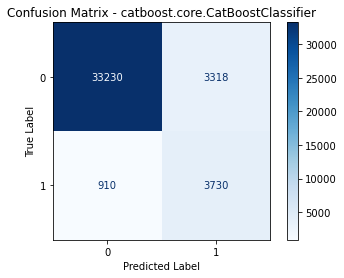

In [29]:
#============CatBoostClassifier==============#
clf_CatBoost = CatBoostClassifier()
clf_CatBoost = classifier_SKF(clf_CatBoost,X,y)

## Stacking models <a class="anchor" id="1.15"></a>

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [

        ('clf_logistic',model_logistic),
        ('clf_xgb',model_xgboost),
        ('clf_rf',model_randomForest),
        ('clf_knn',clf_knn),
        ('clf_svm',clf_svm),
        ('clf_gaussian',clf_gaussian),
        ('clf_CatBoost',clf_CatBoost)
]

stack_model = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

Learning rate set to 0.048184
0:	learn: 0.6115289	total: 36.7ms	remaining: 36.6s
1:	learn: 0.5440569	total: 57.4ms	remaining: 28.7s
2:	learn: 0.4878449	total: 84.8ms	remaining: 28.2s
3:	learn: 0.4423883	total: 104ms	remaining: 25.8s
4:	learn: 0.4065897	total: 124ms	remaining: 24.6s
5:	learn: 0.3742261	total: 144ms	remaining: 23.8s
6:	learn: 0.3514040	total: 164ms	remaining: 23.3s
7:	learn: 0.3301198	total: 187ms	remaining: 23.2s
8:	learn: 0.3128768	total: 214ms	remaining: 23.5s
9:	learn: 0.2980970	total: 235ms	remaining: 23.2s
10:	learn: 0.2833006	total: 258ms	remaining: 23.2s
11:	learn: 0.2735492	total: 280ms	remaining: 23s
12:	learn: 0.2643975	total: 306ms	remaining: 23.2s
13:	learn: 0.2538284	total: 338ms	remaining: 23.8s
14:	learn: 0.2464137	total: 368ms	remaining: 24.2s
15:	learn: 0.2389355	total: 394ms	remaining: 24.2s
16:	learn: 0.2304215	total: 419ms	remaining: 24.2s
17:	learn: 0.2251950	total: 447ms	remaining: 24.4s
18:	learn: 0.2207525	total: 475ms	remaining: 24.5s
19:	learn:

166:	learn: 0.1613118	total: 3.83s	remaining: 19.1s
167:	learn: 0.1612593	total: 3.85s	remaining: 19.1s
168:	learn: 0.1611342	total: 3.87s	remaining: 19s
169:	learn: 0.1610440	total: 3.89s	remaining: 19s
170:	learn: 0.1609605	total: 3.92s	remaining: 19s
171:	learn: 0.1608882	total: 3.94s	remaining: 19s
172:	learn: 0.1608444	total: 3.96s	remaining: 18.9s
173:	learn: 0.1607923	total: 3.99s	remaining: 18.9s
174:	learn: 0.1607430	total: 4.01s	remaining: 18.9s
175:	learn: 0.1606806	total: 4.04s	remaining: 18.9s
176:	learn: 0.1606331	total: 4.07s	remaining: 18.9s
177:	learn: 0.1605937	total: 4.11s	remaining: 19s
178:	learn: 0.1604359	total: 4.13s	remaining: 19s
179:	learn: 0.1603933	total: 4.17s	remaining: 19s
180:	learn: 0.1603049	total: 4.19s	remaining: 19s
181:	learn: 0.1602335	total: 4.22s	remaining: 19s
182:	learn: 0.1601147	total: 4.24s	remaining: 18.9s
183:	learn: 0.1600360	total: 4.26s	remaining: 18.9s
184:	learn: 0.1598929	total: 4.29s	remaining: 18.9s
185:	learn: 0.1598571	total: 4

332:	learn: 0.1507079	total: 7.66s	remaining: 15.3s
333:	learn: 0.1506762	total: 7.68s	remaining: 15.3s
334:	learn: 0.1506168	total: 7.7s	remaining: 15.3s
335:	learn: 0.1505839	total: 7.72s	remaining: 15.3s
336:	learn: 0.1505397	total: 7.74s	remaining: 15.2s
337:	learn: 0.1505073	total: 7.76s	remaining: 15.2s
338:	learn: 0.1504284	total: 7.78s	remaining: 15.2s
339:	learn: 0.1503787	total: 7.8s	remaining: 15.2s
340:	learn: 0.1503302	total: 7.83s	remaining: 15.1s
341:	learn: 0.1502739	total: 7.85s	remaining: 15.1s
342:	learn: 0.1502236	total: 7.87s	remaining: 15.1s
343:	learn: 0.1501575	total: 7.89s	remaining: 15.1s
344:	learn: 0.1501161	total: 7.91s	remaining: 15s
345:	learn: 0.1500882	total: 7.93s	remaining: 15s
346:	learn: 0.1500637	total: 7.96s	remaining: 15s
347:	learn: 0.1500131	total: 7.98s	remaining: 14.9s
348:	learn: 0.1499671	total: 8s	remaining: 14.9s
349:	learn: 0.1499346	total: 8.02s	remaining: 14.9s
350:	learn: 0.1498965	total: 8.04s	remaining: 14.9s
351:	learn: 0.1498459	t

494:	learn: 0.1432841	total: 11.1s	remaining: 11.3s
495:	learn: 0.1432482	total: 11.1s	remaining: 11.3s
496:	learn: 0.1432154	total: 11.1s	remaining: 11.2s
497:	learn: 0.1431576	total: 11.1s	remaining: 11.2s
498:	learn: 0.1431187	total: 11.2s	remaining: 11.2s
499:	learn: 0.1430584	total: 11.2s	remaining: 11.2s
500:	learn: 0.1430133	total: 11.2s	remaining: 11.1s
501:	learn: 0.1429504	total: 11.2s	remaining: 11.1s
502:	learn: 0.1429155	total: 11.2s	remaining: 11.1s
503:	learn: 0.1428753	total: 11.3s	remaining: 11.1s
504:	learn: 0.1428411	total: 11.3s	remaining: 11.1s
505:	learn: 0.1427886	total: 11.3s	remaining: 11s
506:	learn: 0.1427333	total: 11.3s	remaining: 11s
507:	learn: 0.1426953	total: 11.3s	remaining: 11s
508:	learn: 0.1426633	total: 11.4s	remaining: 11s
509:	learn: 0.1426096	total: 11.4s	remaining: 10.9s
510:	learn: 0.1425666	total: 11.4s	remaining: 10.9s
511:	learn: 0.1425320	total: 11.4s	remaining: 10.9s
512:	learn: 0.1424872	total: 11.4s	remaining: 10.9s
513:	learn: 0.142438

659:	learn: 0.1368151	total: 14.4s	remaining: 7.43s
660:	learn: 0.1367799	total: 14.4s	remaining: 7.41s
661:	learn: 0.1367495	total: 14.5s	remaining: 7.38s
662:	learn: 0.1367108	total: 14.5s	remaining: 7.36s
663:	learn: 0.1366802	total: 14.5s	remaining: 7.34s
664:	learn: 0.1366554	total: 14.5s	remaining: 7.32s
665:	learn: 0.1366207	total: 14.5s	remaining: 7.3s
666:	learn: 0.1365793	total: 14.6s	remaining: 7.27s
667:	learn: 0.1365502	total: 14.6s	remaining: 7.25s
668:	learn: 0.1365356	total: 14.6s	remaining: 7.23s
669:	learn: 0.1365118	total: 14.6s	remaining: 7.21s
670:	learn: 0.1364818	total: 14.7s	remaining: 7.19s
671:	learn: 0.1364570	total: 14.7s	remaining: 7.17s
672:	learn: 0.1364428	total: 14.7s	remaining: 7.16s
673:	learn: 0.1364248	total: 14.8s	remaining: 7.14s
674:	learn: 0.1364096	total: 14.8s	remaining: 7.13s
675:	learn: 0.1363600	total: 14.8s	remaining: 7.11s
676:	learn: 0.1363129	total: 14.9s	remaining: 7.09s
677:	learn: 0.1362583	total: 14.9s	remaining: 7.07s
678:	learn: 0

826:	learn: 0.1312126	total: 18s	remaining: 3.77s
827:	learn: 0.1311668	total: 18.1s	remaining: 3.75s
828:	learn: 0.1311140	total: 18.1s	remaining: 3.73s
829:	learn: 0.1310826	total: 18.1s	remaining: 3.71s
830:	learn: 0.1310438	total: 18.1s	remaining: 3.68s
831:	learn: 0.1310068	total: 18.1s	remaining: 3.66s
832:	learn: 0.1309989	total: 18.2s	remaining: 3.64s
833:	learn: 0.1309628	total: 18.2s	remaining: 3.62s
834:	learn: 0.1309366	total: 18.2s	remaining: 3.6s
835:	learn: 0.1309125	total: 18.2s	remaining: 3.57s
836:	learn: 0.1308822	total: 18.2s	remaining: 3.55s
837:	learn: 0.1308547	total: 18.2s	remaining: 3.53s
838:	learn: 0.1308099	total: 18.3s	remaining: 3.5s
839:	learn: 0.1307843	total: 18.3s	remaining: 3.48s
840:	learn: 0.1307370	total: 18.3s	remaining: 3.46s
841:	learn: 0.1307076	total: 18.3s	remaining: 3.44s
842:	learn: 0.1306739	total: 18.3s	remaining: 3.41s
843:	learn: 0.1306397	total: 18.4s	remaining: 3.39s
844:	learn: 0.1306152	total: 18.4s	remaining: 3.37s
845:	learn: 0.13

992:	learn: 0.1262267	total: 21.2s	remaining: 150ms
993:	learn: 0.1261928	total: 21.2s	remaining: 128ms
994:	learn: 0.1261826	total: 21.3s	remaining: 107ms
995:	learn: 0.1261646	total: 21.3s	remaining: 85.5ms
996:	learn: 0.1261457	total: 21.3s	remaining: 64.1ms
997:	learn: 0.1261137	total: 21.3s	remaining: 42.7ms
998:	learn: 0.1260808	total: 21.3s	remaining: 21.4ms
999:	learn: 0.1260593	total: 21.4s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.5989773	total: 25.2ms	remaining: 25.2s
1:	learn: 0.5187067	total: 51.1ms	remaining: 25.5s
2:	learn: 0.4543496	total: 78.3ms	remaining: 26s
3:	learn: 0.4196830	total: 105ms	remaining: 26.1s
4:	learn: 0.3753268	total: 133ms	remaining: 26.5s
5:	learn: 0.3386556	total: 158ms	remaining: 26.2s
6:	learn: 0.3222592	total: 182ms	remaining: 25.9s
7:	learn: 0.2996668	total: 216ms	remaining: 26.8s
8:	learn: 0.2794375	total: 249ms	remaining: 27.5s
9:	learn: 0.2658073	total: 279ms	remaining: 27.6s
10:	learn: 0.2521208	total: 309ms	remaining: 27.8s


157:	learn: 0.1504110	total: 4.23s	remaining: 22.5s
158:	learn: 0.1503097	total: 4.26s	remaining: 22.5s
159:	learn: 0.1501862	total: 4.29s	remaining: 22.5s
160:	learn: 0.1501356	total: 4.32s	remaining: 22.5s
161:	learn: 0.1501037	total: 4.35s	remaining: 22.5s
162:	learn: 0.1500303	total: 4.38s	remaining: 22.5s
163:	learn: 0.1499619	total: 4.41s	remaining: 22.5s
164:	learn: 0.1498916	total: 4.45s	remaining: 22.5s
165:	learn: 0.1497718	total: 4.48s	remaining: 22.5s
166:	learn: 0.1496954	total: 4.51s	remaining: 22.5s
167:	learn: 0.1496126	total: 4.54s	remaining: 22.5s
168:	learn: 0.1495504	total: 4.57s	remaining: 22.5s
169:	learn: 0.1494552	total: 4.6s	remaining: 22.5s
170:	learn: 0.1493608	total: 4.63s	remaining: 22.5s
171:	learn: 0.1493216	total: 4.66s	remaining: 22.5s
172:	learn: 0.1492683	total: 4.7s	remaining: 22.5s
173:	learn: 0.1491013	total: 4.73s	remaining: 22.5s
174:	learn: 0.1490693	total: 4.76s	remaining: 22.5s
175:	learn: 0.1489920	total: 4.79s	remaining: 22.4s
176:	learn: 0.

316:	learn: 0.1393493	total: 9.41s	remaining: 20.3s
317:	learn: 0.1392724	total: 9.45s	remaining: 20.3s
318:	learn: 0.1391889	total: 9.48s	remaining: 20.2s
319:	learn: 0.1391033	total: 9.51s	remaining: 20.2s
320:	learn: 0.1390331	total: 9.54s	remaining: 20.2s
321:	learn: 0.1389767	total: 9.57s	remaining: 20.2s
322:	learn: 0.1389305	total: 9.61s	remaining: 20.1s
323:	learn: 0.1388130	total: 9.64s	remaining: 20.1s
324:	learn: 0.1387440	total: 9.67s	remaining: 20.1s
325:	learn: 0.1386718	total: 9.7s	remaining: 20.1s
326:	learn: 0.1385999	total: 9.73s	remaining: 20s
327:	learn: 0.1385361	total: 9.76s	remaining: 20s
328:	learn: 0.1384657	total: 9.79s	remaining: 20s
329:	learn: 0.1383860	total: 9.82s	remaining: 19.9s
330:	learn: 0.1383364	total: 9.85s	remaining: 19.9s
331:	learn: 0.1382678	total: 9.88s	remaining: 19.9s
332:	learn: 0.1382179	total: 9.91s	remaining: 19.8s
333:	learn: 0.1381381	total: 9.94s	remaining: 19.8s
334:	learn: 0.1380034	total: 9.96s	remaining: 19.8s
335:	learn: 0.13795

480:	learn: 0.1307589	total: 14.2s	remaining: 15.3s
481:	learn: 0.1307182	total: 14.2s	remaining: 15.3s
482:	learn: 0.1306764	total: 14.3s	remaining: 15.3s
483:	learn: 0.1305976	total: 14.3s	remaining: 15.2s
484:	learn: 0.1305762	total: 14.3s	remaining: 15.2s
485:	learn: 0.1305506	total: 14.3s	remaining: 15.2s
486:	learn: 0.1304901	total: 14.4s	remaining: 15.1s
487:	learn: 0.1304402	total: 14.4s	remaining: 15.1s
488:	learn: 0.1303590	total: 14.4s	remaining: 15.1s
489:	learn: 0.1303191	total: 14.4s	remaining: 15s
490:	learn: 0.1302852	total: 14.5s	remaining: 15s
491:	learn: 0.1302106	total: 14.5s	remaining: 15s
492:	learn: 0.1301193	total: 14.5s	remaining: 14.9s
493:	learn: 0.1300362	total: 14.6s	remaining: 14.9s
494:	learn: 0.1299983	total: 14.6s	remaining: 14.9s
495:	learn: 0.1299493	total: 14.6s	remaining: 14.8s
496:	learn: 0.1299187	total: 14.6s	remaining: 14.8s
497:	learn: 0.1298460	total: 14.7s	remaining: 14.8s
498:	learn: 0.1298103	total: 14.7s	remaining: 14.7s
499:	learn: 0.1297

643:	learn: 0.1234101	total: 19s	remaining: 10.5s
644:	learn: 0.1233795	total: 19s	remaining: 10.5s
645:	learn: 0.1233468	total: 19s	remaining: 10.4s
646:	learn: 0.1233122	total: 19.1s	remaining: 10.4s
647:	learn: 0.1232867	total: 19.1s	remaining: 10.4s
648:	learn: 0.1232480	total: 19.1s	remaining: 10.3s
649:	learn: 0.1232147	total: 19.2s	remaining: 10.3s
650:	learn: 0.1231666	total: 19.2s	remaining: 10.3s
651:	learn: 0.1231135	total: 19.2s	remaining: 10.3s
652:	learn: 0.1230720	total: 19.2s	remaining: 10.2s
653:	learn: 0.1230346	total: 19.3s	remaining: 10.2s
654:	learn: 0.1229841	total: 19.3s	remaining: 10.2s
655:	learn: 0.1229590	total: 19.3s	remaining: 10.1s
656:	learn: 0.1229178	total: 19.4s	remaining: 10.1s
657:	learn: 0.1228798	total: 19.4s	remaining: 10.1s
658:	learn: 0.1228462	total: 19.4s	remaining: 10s
659:	learn: 0.1228215	total: 19.5s	remaining: 10s
660:	learn: 0.1227882	total: 19.5s	remaining: 9.99s
661:	learn: 0.1227275	total: 19.5s	remaining: 9.96s
662:	learn: 0.1226684	

802:	learn: 0.1176484	total: 23.6s	remaining: 5.79s
803:	learn: 0.1175969	total: 23.6s	remaining: 5.76s
804:	learn: 0.1175655	total: 23.7s	remaining: 5.73s
805:	learn: 0.1175386	total: 23.7s	remaining: 5.7s
806:	learn: 0.1175114	total: 23.7s	remaining: 5.67s
807:	learn: 0.1174738	total: 23.7s	remaining: 5.64s
808:	learn: 0.1174101	total: 23.8s	remaining: 5.61s
809:	learn: 0.1173784	total: 23.8s	remaining: 5.58s
810:	learn: 0.1173618	total: 23.8s	remaining: 5.55s
811:	learn: 0.1173132	total: 23.9s	remaining: 5.52s
812:	learn: 0.1172809	total: 23.9s	remaining: 5.5s
813:	learn: 0.1172506	total: 23.9s	remaining: 5.46s
814:	learn: 0.1172233	total: 23.9s	remaining: 5.43s
815:	learn: 0.1172084	total: 24s	remaining: 5.41s
816:	learn: 0.1171683	total: 24s	remaining: 5.38s
817:	learn: 0.1171316	total: 24s	remaining: 5.34s
818:	learn: 0.1170894	total: 24.1s	remaining: 5.32s
819:	learn: 0.1170712	total: 24.1s	remaining: 5.29s
820:	learn: 0.1170373	total: 24.1s	remaining: 5.25s
821:	learn: 0.117019

964:	learn: 0.1122080	total: 28.3s	remaining: 1.03s
965:	learn: 0.1121702	total: 28.4s	remaining: 998ms
966:	learn: 0.1121488	total: 28.4s	remaining: 969ms
967:	learn: 0.1121036	total: 28.4s	remaining: 940ms
968:	learn: 0.1120804	total: 28.5s	remaining: 911ms
969:	learn: 0.1120689	total: 28.5s	remaining: 881ms
970:	learn: 0.1120538	total: 28.5s	remaining: 852ms
971:	learn: 0.1120335	total: 28.6s	remaining: 823ms
972:	learn: 0.1119795	total: 28.6s	remaining: 793ms
973:	learn: 0.1119280	total: 28.6s	remaining: 764ms
974:	learn: 0.1118778	total: 28.6s	remaining: 734ms
975:	learn: 0.1118282	total: 28.7s	remaining: 705ms
976:	learn: 0.1118083	total: 28.7s	remaining: 676ms
977:	learn: 0.1117859	total: 28.7s	remaining: 646ms
978:	learn: 0.1117510	total: 28.7s	remaining: 617ms
979:	learn: 0.1117306	total: 28.8s	remaining: 587ms
980:	learn: 0.1117078	total: 28.8s	remaining: 558ms
981:	learn: 0.1116511	total: 28.8s	remaining: 529ms
982:	learn: 0.1116112	total: 28.9s	remaining: 499ms
983:	learn: 

124:	learn: 0.1403389	total: 3.71s	remaining: 26s
125:	learn: 0.1402872	total: 3.74s	remaining: 25.9s
126:	learn: 0.1402028	total: 3.77s	remaining: 25.9s
127:	learn: 0.1401272	total: 3.8s	remaining: 25.9s
128:	learn: 0.1400316	total: 3.83s	remaining: 25.8s
129:	learn: 0.1399524	total: 3.85s	remaining: 25.8s
130:	learn: 0.1398870	total: 3.88s	remaining: 25.8s
131:	learn: 0.1398135	total: 3.92s	remaining: 25.8s
132:	learn: 0.1397113	total: 3.96s	remaining: 25.8s
133:	learn: 0.1396157	total: 3.99s	remaining: 25.8s
134:	learn: 0.1395715	total: 4.02s	remaining: 25.7s
135:	learn: 0.1393744	total: 4.04s	remaining: 25.7s
136:	learn: 0.1393462	total: 4.07s	remaining: 25.6s
137:	learn: 0.1392759	total: 4.1s	remaining: 25.6s
138:	learn: 0.1392195	total: 4.13s	remaining: 25.6s
139:	learn: 0.1391281	total: 4.16s	remaining: 25.5s
140:	learn: 0.1390136	total: 4.18s	remaining: 25.5s
141:	learn: 0.1389443	total: 4.21s	remaining: 25.4s
142:	learn: 0.1387542	total: 4.24s	remaining: 25.4s
143:	learn: 0.13

286:	learn: 0.1293341	total: 8.49s	remaining: 21.1s
287:	learn: 0.1292850	total: 8.52s	remaining: 21.1s
288:	learn: 0.1292383	total: 8.55s	remaining: 21s
289:	learn: 0.1292040	total: 8.58s	remaining: 21s
290:	learn: 0.1290393	total: 8.61s	remaining: 21s
291:	learn: 0.1289983	total: 8.64s	remaining: 20.9s
292:	learn: 0.1289514	total: 8.67s	remaining: 20.9s
293:	learn: 0.1289055	total: 8.69s	remaining: 20.9s
294:	learn: 0.1288445	total: 8.72s	remaining: 20.8s
295:	learn: 0.1288117	total: 8.75s	remaining: 20.8s
296:	learn: 0.1287583	total: 8.77s	remaining: 20.8s
297:	learn: 0.1286989	total: 8.8s	remaining: 20.7s
298:	learn: 0.1286562	total: 8.83s	remaining: 20.7s
299:	learn: 0.1285996	total: 8.86s	remaining: 20.7s
300:	learn: 0.1285778	total: 8.88s	remaining: 20.6s
301:	learn: 0.1285151	total: 8.91s	remaining: 20.6s
302:	learn: 0.1284710	total: 8.94s	remaining: 20.6s
303:	learn: 0.1284308	total: 8.97s	remaining: 20.5s
304:	learn: 0.1283827	total: 9s	remaining: 20.5s
305:	learn: 0.1282986	

452:	learn: 0.1207584	total: 13.2s	remaining: 16s
453:	learn: 0.1207364	total: 13.3s	remaining: 15.9s
454:	learn: 0.1206539	total: 13.3s	remaining: 15.9s
455:	learn: 0.1206261	total: 13.3s	remaining: 15.9s
456:	learn: 0.1205642	total: 13.3s	remaining: 15.8s
457:	learn: 0.1205043	total: 13.4s	remaining: 15.8s
458:	learn: 0.1204446	total: 13.4s	remaining: 15.8s
459:	learn: 0.1204066	total: 13.4s	remaining: 15.8s
460:	learn: 0.1203748	total: 13.5s	remaining: 15.7s
461:	learn: 0.1203274	total: 13.5s	remaining: 15.7s
462:	learn: 0.1202736	total: 13.5s	remaining: 15.7s
463:	learn: 0.1202322	total: 13.5s	remaining: 15.6s
464:	learn: 0.1202140	total: 13.6s	remaining: 15.6s
465:	learn: 0.1201750	total: 13.6s	remaining: 15.6s
466:	learn: 0.1201331	total: 13.6s	remaining: 15.5s
467:	learn: 0.1200174	total: 13.6s	remaining: 15.5s
468:	learn: 0.1199814	total: 13.7s	remaining: 15.5s
469:	learn: 0.1199369	total: 13.7s	remaining: 15.5s
470:	learn: 0.1199058	total: 13.7s	remaining: 15.4s
471:	learn: 0.

614:	learn: 0.1140543	total: 18.2s	remaining: 11.4s
615:	learn: 0.1140254	total: 18.3s	remaining: 11.4s
616:	learn: 0.1139712	total: 18.3s	remaining: 11.4s
617:	learn: 0.1139347	total: 18.3s	remaining: 11.3s
618:	learn: 0.1139072	total: 18.4s	remaining: 11.3s
619:	learn: 0.1138899	total: 18.4s	remaining: 11.3s
620:	learn: 0.1138669	total: 18.4s	remaining: 11.3s
621:	learn: 0.1138157	total: 18.5s	remaining: 11.2s
622:	learn: 0.1137875	total: 18.5s	remaining: 11.2s
623:	learn: 0.1137642	total: 18.5s	remaining: 11.2s
624:	learn: 0.1137228	total: 18.6s	remaining: 11.1s
625:	learn: 0.1136739	total: 18.6s	remaining: 11.1s
626:	learn: 0.1136326	total: 18.6s	remaining: 11.1s
627:	learn: 0.1135861	total: 18.7s	remaining: 11.1s
628:	learn: 0.1135566	total: 18.7s	remaining: 11s
629:	learn: 0.1135212	total: 18.7s	remaining: 11s
630:	learn: 0.1134828	total: 18.8s	remaining: 11s
631:	learn: 0.1134590	total: 18.8s	remaining: 11s
632:	learn: 0.1134333	total: 18.8s	remaining: 10.9s
633:	learn: 0.113414

778:	learn: 0.1084040	total: 23.5s	remaining: 6.67s
779:	learn: 0.1083434	total: 23.6s	remaining: 6.64s
780:	learn: 0.1083155	total: 23.6s	remaining: 6.61s
781:	learn: 0.1082489	total: 23.6s	remaining: 6.58s
782:	learn: 0.1082211	total: 23.7s	remaining: 6.55s
783:	learn: 0.1081833	total: 23.7s	remaining: 6.53s
784:	learn: 0.1081573	total: 23.7s	remaining: 6.5s
785:	learn: 0.1081260	total: 23.8s	remaining: 6.47s
786:	learn: 0.1080854	total: 23.8s	remaining: 6.44s
787:	learn: 0.1080546	total: 23.8s	remaining: 6.41s
788:	learn: 0.1080177	total: 23.9s	remaining: 6.38s
789:	learn: 0.1079691	total: 23.9s	remaining: 6.35s
790:	learn: 0.1079364	total: 23.9s	remaining: 6.32s
791:	learn: 0.1079084	total: 24s	remaining: 6.29s
792:	learn: 0.1078754	total: 24s	remaining: 6.26s
793:	learn: 0.1078475	total: 24s	remaining: 6.23s
794:	learn: 0.1077771	total: 24.1s	remaining: 6.2s
795:	learn: 0.1077243	total: 24.1s	remaining: 6.17s
796:	learn: 0.1076991	total: 24.1s	remaining: 6.15s
797:	learn: 0.107626

944:	learn: 0.1029258	total: 28.9s	remaining: 1.68s
945:	learn: 0.1028852	total: 29s	remaining: 1.65s
946:	learn: 0.1028587	total: 29s	remaining: 1.62s
947:	learn: 0.1028307	total: 29s	remaining: 1.59s
948:	learn: 0.1028165	total: 29.1s	remaining: 1.56s
949:	learn: 0.1028016	total: 29.1s	remaining: 1.53s
950:	learn: 0.1027714	total: 29.1s	remaining: 1.5s
951:	learn: 0.1027617	total: 29.1s	remaining: 1.47s
952:	learn: 0.1027419	total: 29.2s	remaining: 1.44s
953:	learn: 0.1027177	total: 29.2s	remaining: 1.41s
954:	learn: 0.1026905	total: 29.2s	remaining: 1.38s
955:	learn: 0.1026553	total: 29.3s	remaining: 1.35s
956:	learn: 0.1026357	total: 29.3s	remaining: 1.32s
957:	learn: 0.1026014	total: 29.3s	remaining: 1.28s
958:	learn: 0.1025846	total: 29.4s	remaining: 1.25s
959:	learn: 0.1025560	total: 29.4s	remaining: 1.22s
960:	learn: 0.1025238	total: 29.4s	remaining: 1.19s
961:	learn: 0.1025023	total: 29.4s	remaining: 1.16s
962:	learn: 0.1023854	total: 29.5s	remaining: 1.13s
963:	learn: 0.10234

110:	learn: 0.1458389	total: 3.28s	remaining: 26.3s
111:	learn: 0.1457367	total: 3.31s	remaining: 26.2s
112:	learn: 0.1456085	total: 3.34s	remaining: 26.2s
113:	learn: 0.1454088	total: 3.37s	remaining: 26.2s
114:	learn: 0.1452433	total: 3.39s	remaining: 26.1s
115:	learn: 0.1450431	total: 3.42s	remaining: 26.1s
116:	learn: 0.1447222	total: 3.45s	remaining: 26.1s
117:	learn: 0.1441519	total: 3.48s	remaining: 26s
118:	learn: 0.1440876	total: 3.51s	remaining: 26s
119:	learn: 0.1437598	total: 3.55s	remaining: 26s
120:	learn: 0.1436032	total: 3.58s	remaining: 26s
121:	learn: 0.1434941	total: 3.61s	remaining: 26s
122:	learn: 0.1434058	total: 3.64s	remaining: 26s
123:	learn: 0.1432871	total: 3.67s	remaining: 25.9s
124:	learn: 0.1432254	total: 3.7s	remaining: 25.9s
125:	learn: 0.1431187	total: 3.72s	remaining: 25.8s
126:	learn: 0.1428984	total: 3.75s	remaining: 25.8s
127:	learn: 0.1427111	total: 3.78s	remaining: 25.8s
128:	learn: 0.1426229	total: 3.81s	remaining: 25.7s
129:	learn: 0.1424871	tot

272:	learn: 0.1296763	total: 8.1s	remaining: 21.6s
273:	learn: 0.1296231	total: 8.13s	remaining: 21.5s
274:	learn: 0.1295686	total: 8.16s	remaining: 21.5s
275:	learn: 0.1294750	total: 8.19s	remaining: 21.5s
276:	learn: 0.1294401	total: 8.22s	remaining: 21.5s
277:	learn: 0.1293641	total: 8.25s	remaining: 21.4s
278:	learn: 0.1293198	total: 8.28s	remaining: 21.4s
279:	learn: 0.1292619	total: 8.31s	remaining: 21.4s
280:	learn: 0.1292257	total: 8.34s	remaining: 21.3s
281:	learn: 0.1292015	total: 8.37s	remaining: 21.3s
282:	learn: 0.1291622	total: 8.4s	remaining: 21.3s
283:	learn: 0.1291409	total: 8.43s	remaining: 21.3s
284:	learn: 0.1290765	total: 8.47s	remaining: 21.2s
285:	learn: 0.1290221	total: 8.5s	remaining: 21.2s
286:	learn: 0.1289790	total: 8.53s	remaining: 21.2s
287:	learn: 0.1288902	total: 8.56s	remaining: 21.2s
288:	learn: 0.1288432	total: 8.59s	remaining: 21.1s
289:	learn: 0.1287610	total: 8.62s	remaining: 21.1s
290:	learn: 0.1287290	total: 8.65s	remaining: 21.1s
291:	learn: 0.1

437:	learn: 0.1205805	total: 13.1s	remaining: 16.8s
438:	learn: 0.1205296	total: 13.1s	remaining: 16.7s
439:	learn: 0.1204562	total: 13.1s	remaining: 16.7s
440:	learn: 0.1204240	total: 13.2s	remaining: 16.7s
441:	learn: 0.1204001	total: 13.2s	remaining: 16.6s
442:	learn: 0.1203154	total: 13.2s	remaining: 16.6s
443:	learn: 0.1202722	total: 13.2s	remaining: 16.6s
444:	learn: 0.1202293	total: 13.3s	remaining: 16.6s
445:	learn: 0.1201961	total: 13.3s	remaining: 16.5s
446:	learn: 0.1201441	total: 13.3s	remaining: 16.5s
447:	learn: 0.1201107	total: 13.4s	remaining: 16.5s
448:	learn: 0.1200786	total: 13.4s	remaining: 16.4s
449:	learn: 0.1200447	total: 13.4s	remaining: 16.4s
450:	learn: 0.1199799	total: 13.5s	remaining: 16.4s
451:	learn: 0.1199065	total: 13.5s	remaining: 16.4s
452:	learn: 0.1198442	total: 13.5s	remaining: 16.3s
453:	learn: 0.1197715	total: 13.5s	remaining: 16.3s
454:	learn: 0.1197015	total: 13.6s	remaining: 16.3s
455:	learn: 0.1196569	total: 13.6s	remaining: 16.2s
456:	learn: 

602:	learn: 0.1132146	total: 18.1s	remaining: 11.9s
603:	learn: 0.1131653	total: 18.2s	remaining: 11.9s
604:	learn: 0.1131440	total: 18.2s	remaining: 11.9s
605:	learn: 0.1130900	total: 18.2s	remaining: 11.8s
606:	learn: 0.1130466	total: 18.3s	remaining: 11.8s
607:	learn: 0.1130013	total: 18.3s	remaining: 11.8s
608:	learn: 0.1129552	total: 18.3s	remaining: 11.8s
609:	learn: 0.1129478	total: 18.3s	remaining: 11.7s
610:	learn: 0.1128954	total: 18.4s	remaining: 11.7s
611:	learn: 0.1128578	total: 18.4s	remaining: 11.7s
612:	learn: 0.1128236	total: 18.4s	remaining: 11.6s
613:	learn: 0.1127901	total: 18.5s	remaining: 11.6s
614:	learn: 0.1126972	total: 18.5s	remaining: 11.6s
615:	learn: 0.1126501	total: 18.5s	remaining: 11.5s
616:	learn: 0.1126076	total: 18.5s	remaining: 11.5s
617:	learn: 0.1125724	total: 18.6s	remaining: 11.5s
618:	learn: 0.1125447	total: 18.6s	remaining: 11.5s
619:	learn: 0.1125078	total: 18.6s	remaining: 11.4s
620:	learn: 0.1124562	total: 18.7s	remaining: 11.4s
621:	learn: 

764:	learn: 0.1072567	total: 23.1s	remaining: 7.09s
765:	learn: 0.1072324	total: 23.1s	remaining: 7.06s
766:	learn: 0.1072027	total: 23.1s	remaining: 7.03s
767:	learn: 0.1071756	total: 23.2s	remaining: 7s
768:	learn: 0.1071478	total: 23.2s	remaining: 6.97s
769:	learn: 0.1071178	total: 23.2s	remaining: 6.94s
770:	learn: 0.1070493	total: 23.3s	remaining: 6.91s
771:	learn: 0.1070055	total: 23.3s	remaining: 6.88s
772:	learn: 0.1069629	total: 23.3s	remaining: 6.85s
773:	learn: 0.1069336	total: 23.4s	remaining: 6.82s
774:	learn: 0.1069050	total: 23.4s	remaining: 6.79s
775:	learn: 0.1068827	total: 23.4s	remaining: 6.76s
776:	learn: 0.1068622	total: 23.4s	remaining: 6.73s
777:	learn: 0.1068144	total: 23.5s	remaining: 6.7s
778:	learn: 0.1067677	total: 23.5s	remaining: 6.67s
779:	learn: 0.1067306	total: 23.5s	remaining: 6.64s
780:	learn: 0.1066961	total: 23.6s	remaining: 6.61s
781:	learn: 0.1066594	total: 23.6s	remaining: 6.58s
782:	learn: 0.1066362	total: 23.6s	remaining: 6.55s
783:	learn: 0.10

923:	learn: 0.1024469	total: 28s	remaining: 2.3s
924:	learn: 0.1023989	total: 28s	remaining: 2.27s
925:	learn: 0.1023556	total: 28.1s	remaining: 2.24s
926:	learn: 0.1023313	total: 28.1s	remaining: 2.21s
927:	learn: 0.1022886	total: 28.1s	remaining: 2.18s
928:	learn: 0.1022564	total: 28.2s	remaining: 2.15s
929:	learn: 0.1021891	total: 28.2s	remaining: 2.12s
930:	learn: 0.1021614	total: 28.2s	remaining: 2.09s
931:	learn: 0.1021291	total: 28.2s	remaining: 2.06s
932:	learn: 0.1021141	total: 28.3s	remaining: 2.03s
933:	learn: 0.1020998	total: 28.3s	remaining: 2s
934:	learn: 0.1020731	total: 28.3s	remaining: 1.97s
935:	learn: 0.1020607	total: 28.4s	remaining: 1.94s
936:	learn: 0.1020487	total: 28.4s	remaining: 1.91s
937:	learn: 0.1020359	total: 28.4s	remaining: 1.88s
938:	learn: 0.1020099	total: 28.5s	remaining: 1.85s
939:	learn: 0.1019890	total: 28.5s	remaining: 1.82s
940:	learn: 0.1019667	total: 28.5s	remaining: 1.79s
941:	learn: 0.1019452	total: 28.6s	remaining: 1.76s
942:	learn: 0.101907

83:	learn: 0.1265877	total: 2.63s	remaining: 28.7s
84:	learn: 0.1263406	total: 2.66s	remaining: 28.6s
85:	learn: 0.1259725	total: 2.69s	remaining: 28.6s
86:	learn: 0.1259006	total: 2.72s	remaining: 28.5s
87:	learn: 0.1257300	total: 2.75s	remaining: 28.5s
88:	learn: 0.1256046	total: 2.77s	remaining: 28.4s
89:	learn: 0.1254186	total: 2.8s	remaining: 28.3s
90:	learn: 0.1253284	total: 2.83s	remaining: 28.3s
91:	learn: 0.1252711	total: 2.86s	remaining: 28.3s
92:	learn: 0.1251312	total: 2.89s	remaining: 28.2s
93:	learn: 0.1250223	total: 2.92s	remaining: 28.2s
94:	learn: 0.1249214	total: 2.95s	remaining: 28.1s
95:	learn: 0.1248227	total: 2.98s	remaining: 28.1s
96:	learn: 0.1247358	total: 3.01s	remaining: 28s
97:	learn: 0.1245166	total: 3.04s	remaining: 28s
98:	learn: 0.1242680	total: 3.08s	remaining: 28.1s
99:	learn: 0.1241521	total: 3.12s	remaining: 28.1s
100:	learn: 0.1239850	total: 3.15s	remaining: 28.1s
101:	learn: 0.1238219	total: 3.19s	remaining: 28.1s
102:	learn: 0.1237909	total: 3.22s

243:	learn: 0.1134154	total: 7.6s	remaining: 23.6s
244:	learn: 0.1133213	total: 7.63s	remaining: 23.5s
245:	learn: 0.1132682	total: 7.66s	remaining: 23.5s
246:	learn: 0.1132233	total: 7.69s	remaining: 23.5s
247:	learn: 0.1131229	total: 7.72s	remaining: 23.4s
248:	learn: 0.1130796	total: 7.76s	remaining: 23.4s
249:	learn: 0.1128460	total: 7.79s	remaining: 23.4s
250:	learn: 0.1127883	total: 7.82s	remaining: 23.3s
251:	learn: 0.1127355	total: 7.85s	remaining: 23.3s
252:	learn: 0.1127007	total: 7.88s	remaining: 23.3s
253:	learn: 0.1126703	total: 7.91s	remaining: 23.2s
254:	learn: 0.1125946	total: 7.94s	remaining: 23.2s
255:	learn: 0.1125601	total: 7.97s	remaining: 23.2s
256:	learn: 0.1125004	total: 8.01s	remaining: 23.2s
257:	learn: 0.1124603	total: 8.04s	remaining: 23.1s
258:	learn: 0.1123961	total: 8.07s	remaining: 23.1s
259:	learn: 0.1123194	total: 8.1s	remaining: 23.1s
260:	learn: 0.1123084	total: 8.13s	remaining: 23s
261:	learn: 0.1122496	total: 8.16s	remaining: 23s
262:	learn: 0.1121

406:	learn: 0.1054745	total: 12.6s	remaining: 18.4s
407:	learn: 0.1054293	total: 12.7s	remaining: 18.4s
408:	learn: 0.1053873	total: 12.7s	remaining: 18.4s
409:	learn: 0.1053552	total: 12.7s	remaining: 18.3s
410:	learn: 0.1053171	total: 12.8s	remaining: 18.3s
411:	learn: 0.1052714	total: 12.8s	remaining: 18.3s
412:	learn: 0.1052586	total: 12.8s	remaining: 18.2s
413:	learn: 0.1052149	total: 12.9s	remaining: 18.2s
414:	learn: 0.1051686	total: 12.9s	remaining: 18.2s
415:	learn: 0.1051040	total: 12.9s	remaining: 18.1s
416:	learn: 0.1050844	total: 13s	remaining: 18.1s
417:	learn: 0.1050259	total: 13s	remaining: 18.1s
418:	learn: 0.1049836	total: 13s	remaining: 18s
419:	learn: 0.1049663	total: 13s	remaining: 18s
420:	learn: 0.1049254	total: 13.1s	remaining: 18s
421:	learn: 0.1048998	total: 13.1s	remaining: 18s
422:	learn: 0.1048514	total: 13.1s	remaining: 17.9s
423:	learn: 0.1048023	total: 13.2s	remaining: 17.9s
424:	learn: 0.1047942	total: 13.2s	remaining: 17.9s
425:	learn: 0.1047282	total:

569:	learn: 0.0985254	total: 17.6s	remaining: 13.3s
570:	learn: 0.0985023	total: 17.6s	remaining: 13.3s
571:	learn: 0.0984700	total: 17.7s	remaining: 13.2s
572:	learn: 0.0984072	total: 17.7s	remaining: 13.2s
573:	learn: 0.0983730	total: 17.7s	remaining: 13.2s
574:	learn: 0.0983215	total: 17.8s	remaining: 13.1s
575:	learn: 0.0982863	total: 17.8s	remaining: 13.1s
576:	learn: 0.0982397	total: 17.8s	remaining: 13.1s
577:	learn: 0.0982232	total: 17.8s	remaining: 13s
578:	learn: 0.0981942	total: 17.9s	remaining: 13s
579:	learn: 0.0981748	total: 17.9s	remaining: 13s
580:	learn: 0.0981391	total: 17.9s	remaining: 12.9s
581:	learn: 0.0981009	total: 18s	remaining: 12.9s
582:	learn: 0.0980427	total: 18s	remaining: 12.9s
583:	learn: 0.0980136	total: 18s	remaining: 12.8s
584:	learn: 0.0979700	total: 18.1s	remaining: 12.8s
585:	learn: 0.0979402	total: 18.1s	remaining: 12.8s
586:	learn: 0.0979207	total: 18.1s	remaining: 12.7s
587:	learn: 0.0978674	total: 18.2s	remaining: 12.7s
588:	learn: 0.0978487	to

732:	learn: 0.0932695	total: 22.5s	remaining: 8.2s
733:	learn: 0.0932549	total: 22.5s	remaining: 8.17s
734:	learn: 0.0932090	total: 22.6s	remaining: 8.13s
735:	learn: 0.0931918	total: 22.6s	remaining: 8.1s
736:	learn: 0.0931742	total: 22.6s	remaining: 8.07s
737:	learn: 0.0931459	total: 22.6s	remaining: 8.04s
738:	learn: 0.0931140	total: 22.7s	remaining: 8.01s
739:	learn: 0.0930780	total: 22.7s	remaining: 7.98s
740:	learn: 0.0930450	total: 22.8s	remaining: 7.95s
741:	learn: 0.0930332	total: 22.8s	remaining: 7.92s
742:	learn: 0.0929993	total: 22.8s	remaining: 7.89s
743:	learn: 0.0929714	total: 22.8s	remaining: 7.86s
744:	learn: 0.0929355	total: 22.9s	remaining: 7.83s
745:	learn: 0.0929052	total: 22.9s	remaining: 7.8s
746:	learn: 0.0928692	total: 22.9s	remaining: 7.76s
747:	learn: 0.0928452	total: 23s	remaining: 7.73s
748:	learn: 0.0928145	total: 23s	remaining: 7.7s
749:	learn: 0.0927963	total: 23s	remaining: 7.67s
750:	learn: 0.0927504	total: 23s	remaining: 7.64s
751:	learn: 0.0927222	to

893:	learn: 0.0885698	total: 27s	remaining: 3.2s
894:	learn: 0.0885336	total: 27.1s	remaining: 3.17s
895:	learn: 0.0885053	total: 27.1s	remaining: 3.14s
896:	learn: 0.0884751	total: 27.1s	remaining: 3.11s
897:	learn: 0.0884589	total: 27.1s	remaining: 3.08s
898:	learn: 0.0884450	total: 27.2s	remaining: 3.05s
899:	learn: 0.0884358	total: 27.2s	remaining: 3.02s
900:	learn: 0.0883983	total: 27.2s	remaining: 2.99s
901:	learn: 0.0883675	total: 27.3s	remaining: 2.96s
902:	learn: 0.0883244	total: 27.3s	remaining: 2.93s
903:	learn: 0.0883179	total: 27.3s	remaining: 2.9s
904:	learn: 0.0882940	total: 27.4s	remaining: 2.87s
905:	learn: 0.0882700	total: 27.4s	remaining: 2.84s
906:	learn: 0.0882593	total: 27.4s	remaining: 2.81s
907:	learn: 0.0882451	total: 27.5s	remaining: 2.78s
908:	learn: 0.0882319	total: 27.5s	remaining: 2.75s
909:	learn: 0.0881971	total: 27.5s	remaining: 2.72s
910:	learn: 0.0881687	total: 27.6s	remaining: 2.69s
911:	learn: 0.0881531	total: 27.6s	remaining: 2.66s
912:	learn: 0.08

56:	learn: 0.1057352	total: 1.7s	remaining: 28.2s
57:	learn: 0.1053782	total: 1.73s	remaining: 28.2s
58:	learn: 0.1051717	total: 1.76s	remaining: 28.1s
59:	learn: 0.1049669	total: 1.8s	remaining: 28.1s
60:	learn: 0.1046980	total: 1.82s	remaining: 28.1s
61:	learn: 0.1044677	total: 1.86s	remaining: 28.1s
62:	learn: 0.1041883	total: 1.89s	remaining: 28.1s
63:	learn: 0.1039932	total: 1.92s	remaining: 28s
64:	learn: 0.1037007	total: 1.95s	remaining: 28s
65:	learn: 0.1032974	total: 1.98s	remaining: 27.9s
66:	learn: 0.1030444	total: 2s	remaining: 27.9s
67:	learn: 0.1028855	total: 2.03s	remaining: 27.9s
68:	learn: 0.1026043	total: 2.06s	remaining: 27.8s
69:	learn: 0.1024719	total: 2.09s	remaining: 27.8s
70:	learn: 0.1022193	total: 2.13s	remaining: 27.8s
71:	learn: 0.1020272	total: 2.16s	remaining: 27.8s
72:	learn: 0.1019440	total: 2.19s	remaining: 27.8s
73:	learn: 0.1017442	total: 2.22s	remaining: 27.7s
74:	learn: 0.1015483	total: 2.25s	remaining: 27.7s
75:	learn: 0.1014237	total: 2.28s	remain

216:	learn: 0.0880697	total: 6.45s	remaining: 23.3s
217:	learn: 0.0880244	total: 6.48s	remaining: 23.2s
218:	learn: 0.0879614	total: 6.51s	remaining: 23.2s
219:	learn: 0.0878833	total: 6.54s	remaining: 23.2s
220:	learn: 0.0878156	total: 6.57s	remaining: 23.2s
221:	learn: 0.0877742	total: 6.6s	remaining: 23.1s
222:	learn: 0.0877064	total: 6.63s	remaining: 23.1s
223:	learn: 0.0876704	total: 6.66s	remaining: 23.1s
224:	learn: 0.0876472	total: 6.69s	remaining: 23s
225:	learn: 0.0876116	total: 6.72s	remaining: 23s
226:	learn: 0.0875805	total: 6.75s	remaining: 23s
227:	learn: 0.0875185	total: 6.78s	remaining: 23s
228:	learn: 0.0874231	total: 6.81s	remaining: 22.9s
229:	learn: 0.0873617	total: 6.84s	remaining: 22.9s
230:	learn: 0.0873107	total: 6.88s	remaining: 22.9s
231:	learn: 0.0872089	total: 6.91s	remaining: 22.9s
232:	learn: 0.0871298	total: 6.94s	remaining: 22.8s
233:	learn: 0.0870342	total: 6.97s	remaining: 22.8s
234:	learn: 0.0869950	total: 7s	remaining: 22.8s
235:	learn: 0.0868906	to

376:	learn: 0.0802768	total: 11.4s	remaining: 18.8s
377:	learn: 0.0802506	total: 11.4s	remaining: 18.8s
378:	learn: 0.0802190	total: 11.4s	remaining: 18.7s
379:	learn: 0.0801959	total: 11.5s	remaining: 18.7s
380:	learn: 0.0801641	total: 11.5s	remaining: 18.7s
381:	learn: 0.0801518	total: 11.5s	remaining: 18.6s
382:	learn: 0.0801074	total: 11.6s	remaining: 18.6s
383:	learn: 0.0800714	total: 11.6s	remaining: 18.6s
384:	learn: 0.0800131	total: 11.6s	remaining: 18.6s
385:	learn: 0.0799957	total: 11.6s	remaining: 18.5s
386:	learn: 0.0799743	total: 11.7s	remaining: 18.5s
387:	learn: 0.0799280	total: 11.7s	remaining: 18.5s
388:	learn: 0.0798814	total: 11.7s	remaining: 18.4s
389:	learn: 0.0798548	total: 11.8s	remaining: 18.4s
390:	learn: 0.0798301	total: 11.8s	remaining: 18.4s
391:	learn: 0.0797910	total: 11.8s	remaining: 18.3s
392:	learn: 0.0797514	total: 11.9s	remaining: 18.3s
393:	learn: 0.0797147	total: 11.9s	remaining: 18.3s
394:	learn: 0.0796765	total: 11.9s	remaining: 18.3s
395:	learn: 

539:	learn: 0.0750873	total: 16.2s	remaining: 13.8s
540:	learn: 0.0750629	total: 16.2s	remaining: 13.8s
541:	learn: 0.0750434	total: 16.2s	remaining: 13.7s
542:	learn: 0.0750151	total: 16.3s	remaining: 13.7s
543:	learn: 0.0750008	total: 16.3s	remaining: 13.7s
544:	learn: 0.0749792	total: 16.3s	remaining: 13.6s
545:	learn: 0.0749652	total: 16.4s	remaining: 13.6s
546:	learn: 0.0749443	total: 16.4s	remaining: 13.6s
547:	learn: 0.0749266	total: 16.4s	remaining: 13.5s
548:	learn: 0.0748988	total: 16.4s	remaining: 13.5s
549:	learn: 0.0748732	total: 16.5s	remaining: 13.5s
550:	learn: 0.0748522	total: 16.5s	remaining: 13.4s
551:	learn: 0.0748215	total: 16.5s	remaining: 13.4s
552:	learn: 0.0747975	total: 16.6s	remaining: 13.4s
553:	learn: 0.0747798	total: 16.6s	remaining: 13.4s
554:	learn: 0.0747606	total: 16.6s	remaining: 13.3s
555:	learn: 0.0747284	total: 16.7s	remaining: 13.3s
556:	learn: 0.0747080	total: 16.7s	remaining: 13.3s
557:	learn: 0.0746726	total: 16.7s	remaining: 13.2s
558:	learn: 

702:	learn: 0.0706665	total: 21.2s	remaining: 8.95s
703:	learn: 0.0706367	total: 21.2s	remaining: 8.92s
704:	learn: 0.0706097	total: 21.3s	remaining: 8.89s
705:	learn: 0.0705442	total: 21.3s	remaining: 8.86s
706:	learn: 0.0705128	total: 21.3s	remaining: 8.83s
707:	learn: 0.0704757	total: 21.3s	remaining: 8.8s
708:	learn: 0.0704177	total: 21.4s	remaining: 8.77s
709:	learn: 0.0703958	total: 21.4s	remaining: 8.74s
710:	learn: 0.0703754	total: 21.4s	remaining: 8.71s
711:	learn: 0.0703506	total: 21.5s	remaining: 8.68s
712:	learn: 0.0703126	total: 21.5s	remaining: 8.65s
713:	learn: 0.0702919	total: 21.5s	remaining: 8.62s
714:	learn: 0.0702594	total: 21.6s	remaining: 8.59s
715:	learn: 0.0701952	total: 21.6s	remaining: 8.56s
716:	learn: 0.0701598	total: 21.6s	remaining: 8.53s
717:	learn: 0.0701259	total: 21.6s	remaining: 8.5s
718:	learn: 0.0700912	total: 21.7s	remaining: 8.47s
719:	learn: 0.0700499	total: 21.7s	remaining: 8.44s
720:	learn: 0.0700284	total: 21.7s	remaining: 8.41s
721:	learn: 0.

862:	learn: 0.0666658	total: 26s	remaining: 4.13s
863:	learn: 0.0666554	total: 26.1s	remaining: 4.1s
864:	learn: 0.0666443	total: 26.1s	remaining: 4.07s
865:	learn: 0.0666296	total: 26.1s	remaining: 4.04s
866:	learn: 0.0666168	total: 26.2s	remaining: 4.01s
867:	learn: 0.0666034	total: 26.2s	remaining: 3.98s
868:	learn: 0.0665919	total: 26.2s	remaining: 3.95s
869:	learn: 0.0665574	total: 26.2s	remaining: 3.92s
870:	learn: 0.0665343	total: 26.3s	remaining: 3.89s
871:	learn: 0.0665041	total: 26.3s	remaining: 3.86s
872:	learn: 0.0664824	total: 26.3s	remaining: 3.83s
873:	learn: 0.0664408	total: 26.4s	remaining: 3.8s
874:	learn: 0.0664195	total: 26.4s	remaining: 3.77s
875:	learn: 0.0663958	total: 26.4s	remaining: 3.74s
876:	learn: 0.0663830	total: 26.5s	remaining: 3.71s
877:	learn: 0.0663546	total: 26.5s	remaining: 3.68s
878:	learn: 0.0663316	total: 26.5s	remaining: 3.65s
879:	learn: 0.0662995	total: 26.6s	remaining: 3.62s
880:	learn: 0.0662825	total: 26.6s	remaining: 3.59s
881:	learn: 0.06

22:	learn: 0.2109233	total: 1.66s	remaining: 1m 10s
23:	learn: 0.2081309	total: 1.73s	remaining: 1m 10s
24:	learn: 0.2054587	total: 1.8s	remaining: 1m 10s
25:	learn: 0.2038073	total: 1.86s	remaining: 1m 9s
26:	learn: 0.2021596	total: 1.94s	remaining: 1m 9s
27:	learn: 0.2010076	total: 2.01s	remaining: 1m 9s
28:	learn: 0.2000435	total: 2.08s	remaining: 1m 9s
29:	learn: 0.1976183	total: 2.15s	remaining: 1m 9s
30:	learn: 0.1959761	total: 2.23s	remaining: 1m 9s
31:	learn: 0.1954501	total: 2.31s	remaining: 1m 9s
32:	learn: 0.1939426	total: 2.38s	remaining: 1m 9s
33:	learn: 0.1925829	total: 2.45s	remaining: 1m 9s
34:	learn: 0.1914595	total: 2.52s	remaining: 1m 9s
35:	learn: 0.1906782	total: 2.59s	remaining: 1m 9s
36:	learn: 0.1902321	total: 2.66s	remaining: 1m 9s
37:	learn: 0.1895771	total: 2.73s	remaining: 1m 9s
38:	learn: 0.1891251	total: 2.8s	remaining: 1m 8s
39:	learn: 0.1884982	total: 2.87s	remaining: 1m 8s
40:	learn: 0.1879084	total: 2.93s	remaining: 1m 8s
41:	learn: 0.1873080	total: 3s

183:	learn: 0.1620006	total: 14s	remaining: 1m 2s
184:	learn: 0.1619553	total: 14.1s	remaining: 1m 2s
185:	learn: 0.1618767	total: 14.2s	remaining: 1m 2s
186:	learn: 0.1618006	total: 14.3s	remaining: 1m 1s
187:	learn: 0.1617242	total: 14.3s	remaining: 1m 1s
188:	learn: 0.1615840	total: 14.4s	remaining: 1m 1s
189:	learn: 0.1614708	total: 14.5s	remaining: 1m 1s
190:	learn: 0.1613787	total: 14.5s	remaining: 1m 1s
191:	learn: 0.1613452	total: 14.6s	remaining: 1m 1s
192:	learn: 0.1613040	total: 14.7s	remaining: 1m 1s
193:	learn: 0.1612119	total: 14.8s	remaining: 1m 1s
194:	learn: 0.1611458	total: 14.9s	remaining: 1m 1s
195:	learn: 0.1610983	total: 14.9s	remaining: 1m 1s
196:	learn: 0.1610182	total: 15s	remaining: 1m 1s
197:	learn: 0.1609249	total: 15.1s	remaining: 1m
198:	learn: 0.1608565	total: 15.1s	remaining: 1m
199:	learn: 0.1607910	total: 15.2s	remaining: 1m
200:	learn: 0.1607189	total: 15.3s	remaining: 1m
201:	learn: 0.1606584	total: 15.4s	remaining: 1m
202:	learn: 0.1605588	total: 15

343:	learn: 0.1525412	total: 25.6s	remaining: 48.8s
344:	learn: 0.1524986	total: 25.7s	remaining: 48.7s
345:	learn: 0.1524438	total: 25.7s	remaining: 48.6s
346:	learn: 0.1523821	total: 25.8s	remaining: 48.6s
347:	learn: 0.1523167	total: 25.9s	remaining: 48.5s
348:	learn: 0.1522688	total: 25.9s	remaining: 48.4s
349:	learn: 0.1522283	total: 26s	remaining: 48.3s
350:	learn: 0.1521300	total: 26.1s	remaining: 48.3s
351:	learn: 0.1520488	total: 26.2s	remaining: 48.2s
352:	learn: 0.1519907	total: 26.3s	remaining: 48.1s
353:	learn: 0.1519205	total: 26.3s	remaining: 48.1s
354:	learn: 0.1518722	total: 26.4s	remaining: 48s
355:	learn: 0.1518215	total: 26.5s	remaining: 47.9s
356:	learn: 0.1517475	total: 26.6s	remaining: 47.9s
357:	learn: 0.1516822	total: 26.6s	remaining: 47.8s
358:	learn: 0.1516319	total: 26.7s	remaining: 47.7s
359:	learn: 0.1515796	total: 26.8s	remaining: 47.6s
360:	learn: 0.1515157	total: 26.9s	remaining: 47.5s
361:	learn: 0.1514290	total: 26.9s	remaining: 47.5s
362:	learn: 0.15

504:	learn: 0.1449788	total: 37.2s	remaining: 36.5s
505:	learn: 0.1449433	total: 37.3s	remaining: 36.4s
506:	learn: 0.1449104	total: 37.4s	remaining: 36.3s
507:	learn: 0.1448738	total: 37.4s	remaining: 36.2s
508:	learn: 0.1448535	total: 37.5s	remaining: 36.2s
509:	learn: 0.1448162	total: 37.5s	remaining: 36.1s
510:	learn: 0.1447667	total: 37.6s	remaining: 36s
511:	learn: 0.1446717	total: 37.7s	remaining: 35.9s
512:	learn: 0.1446003	total: 37.7s	remaining: 35.8s
513:	learn: 0.1445634	total: 37.8s	remaining: 35.7s
514:	learn: 0.1445243	total: 37.8s	remaining: 35.6s
515:	learn: 0.1444913	total: 37.9s	remaining: 35.6s
516:	learn: 0.1444340	total: 38s	remaining: 35.5s
517:	learn: 0.1443809	total: 38s	remaining: 35.4s
518:	learn: 0.1443157	total: 38.1s	remaining: 35.3s
519:	learn: 0.1442849	total: 38.2s	remaining: 35.2s
520:	learn: 0.1442237	total: 38.2s	remaining: 35.1s
521:	learn: 0.1441897	total: 38.3s	remaining: 35.1s
522:	learn: 0.1441391	total: 38.4s	remaining: 35s
523:	learn: 0.144110

663:	learn: 0.1382103	total: 47.8s	remaining: 24.2s
664:	learn: 0.1381935	total: 47.9s	remaining: 24.1s
665:	learn: 0.1381512	total: 48s	remaining: 24.1s
666:	learn: 0.1381331	total: 48s	remaining: 24s
667:	learn: 0.1380997	total: 48.1s	remaining: 23.9s
668:	learn: 0.1380841	total: 48.2s	remaining: 23.8s
669:	learn: 0.1380281	total: 48.3s	remaining: 23.8s
670:	learn: 0.1379984	total: 48.3s	remaining: 23.7s
671:	learn: 0.1379646	total: 48.4s	remaining: 23.6s
672:	learn: 0.1379388	total: 48.5s	remaining: 23.6s
673:	learn: 0.1379179	total: 48.6s	remaining: 23.5s
674:	learn: 0.1378945	total: 48.6s	remaining: 23.4s
675:	learn: 0.1378583	total: 48.7s	remaining: 23.3s
676:	learn: 0.1378410	total: 48.8s	remaining: 23.3s
677:	learn: 0.1377381	total: 48.9s	remaining: 23.2s
678:	learn: 0.1377074	total: 48.9s	remaining: 23.1s
679:	learn: 0.1376720	total: 49s	remaining: 23.1s
680:	learn: 0.1376144	total: 49.1s	remaining: 23s
681:	learn: 0.1375596	total: 49.1s	remaining: 22.9s
682:	learn: 0.1375103	

822:	learn: 0.1325966	total: 58.6s	remaining: 12.6s
823:	learn: 0.1325528	total: 58.7s	remaining: 12.5s
824:	learn: 0.1325189	total: 58.8s	remaining: 12.5s
825:	learn: 0.1324786	total: 58.8s	remaining: 12.4s
826:	learn: 0.1324420	total: 58.9s	remaining: 12.3s
827:	learn: 0.1323871	total: 58.9s	remaining: 12.2s
828:	learn: 0.1323690	total: 59s	remaining: 12.2s
829:	learn: 0.1323179	total: 59.1s	remaining: 12.1s
830:	learn: 0.1322900	total: 59.1s	remaining: 12s
831:	learn: 0.1322347	total: 59.2s	remaining: 12s
832:	learn: 0.1322097	total: 59.2s	remaining: 11.9s
833:	learn: 0.1321704	total: 59.3s	remaining: 11.8s
834:	learn: 0.1321368	total: 59.4s	remaining: 11.7s
835:	learn: 0.1321233	total: 59.4s	remaining: 11.7s
836:	learn: 0.1321020	total: 59.5s	remaining: 11.6s
837:	learn: 0.1320653	total: 59.5s	remaining: 11.5s
838:	learn: 0.1320284	total: 59.6s	remaining: 11.4s
839:	learn: 0.1319945	total: 59.7s	remaining: 11.4s
840:	learn: 0.1319624	total: 59.7s	remaining: 11.3s
841:	learn: 0.1319

982:	learn: 0.1275369	total: 1m 8s	remaining: 1.18s
983:	learn: 0.1274986	total: 1m 8s	remaining: 1.11s
984:	learn: 0.1274740	total: 1m 8s	remaining: 1.04s
985:	learn: 0.1274391	total: 1m 8s	remaining: 971ms
986:	learn: 0.1274100	total: 1m 8s	remaining: 901ms
987:	learn: 0.1273857	total: 1m 8s	remaining: 832ms
988:	learn: 0.1273698	total: 1m 8s	remaining: 763ms
989:	learn: 0.1273274	total: 1m 8s	remaining: 693ms
990:	learn: 0.1272922	total: 1m 8s	remaining: 624ms
991:	learn: 0.1272589	total: 1m 8s	remaining: 554ms
992:	learn: 0.1272475	total: 1m 8s	remaining: 485ms
993:	learn: 0.1272244	total: 1m 8s	remaining: 415ms
994:	learn: 0.1272177	total: 1m 8s	remaining: 346ms
995:	learn: 0.1271816	total: 1m 8s	remaining: 277ms
996:	learn: 0.1271602	total: 1m 8s	remaining: 208ms
997:	learn: 0.1271262	total: 1m 9s	remaining: 138ms
998:	learn: 0.1270905	total: 1m 9s	remaining: 69.2ms
999:	learn: 0.1270634	total: 1m 9s	remaining: 0us


C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.043805
0:	learn: 0.5989773	total: 24ms	remaining: 24s
1:	learn: 0.5187067	total: 47.9ms	remaining: 23.9s
2:	learn: 0.4543496	total: 71.4ms	remaining: 23.7s
3:	learn: 0.4196830	total: 95.5ms	remaining: 23.8s
4:	learn: 0.3753268	total: 120ms	remaining: 23.8s
5:	learn: 0.3386556	total: 144ms	remaining: 23.9s
6:	learn: 0.3222592	total: 169ms	remaining: 23.9s
7:	learn: 0.2996668	total: 194ms	remaining: 24.1s
8:	learn: 0.2794375	total: 218ms	remaining: 24s
9:	learn: 0.2658073	total: 243ms	remaining: 24.1s
10:	learn: 0.2521208	total: 267ms	remaining: 24s
11:	learn: 0.2397572	total: 291ms	remaining: 24s
12:	learn: 0.2306895	total: 314ms	remaining: 23.9s
13:	learn: 0.2227295	total: 339ms	remaining: 23.8s
14:	learn: 0.2166454	total: 362ms	remaining: 23.8s
15:	learn: 0.2112680	total: 388ms	remaining: 23.8s
16:	learn: 0.2080946	total: 413ms	remaining: 23.9s
17:	learn: 0.2033765	total: 438ms	remaining: 23.9s
18:	learn: 0.1993769	total: 469ms	remaining: 24.2s
19:	learn: 0.1968

160:	learn: 0.1501356	total: 4.1s	remaining: 21.4s
161:	learn: 0.1501037	total: 4.13s	remaining: 21.4s
162:	learn: 0.1500303	total: 4.16s	remaining: 21.3s
163:	learn: 0.1499619	total: 4.18s	remaining: 21.3s
164:	learn: 0.1498916	total: 4.21s	remaining: 21.3s
165:	learn: 0.1497718	total: 4.23s	remaining: 21.3s
166:	learn: 0.1496954	total: 4.26s	remaining: 21.3s
167:	learn: 0.1496126	total: 4.29s	remaining: 21.2s
168:	learn: 0.1495504	total: 4.32s	remaining: 21.2s
169:	learn: 0.1494552	total: 4.35s	remaining: 21.2s
170:	learn: 0.1493608	total: 4.38s	remaining: 21.2s
171:	learn: 0.1493216	total: 4.41s	remaining: 21.2s
172:	learn: 0.1492683	total: 4.44s	remaining: 21.2s
173:	learn: 0.1491013	total: 4.47s	remaining: 21.2s
174:	learn: 0.1490693	total: 4.5s	remaining: 21.2s
175:	learn: 0.1489920	total: 4.53s	remaining: 21.2s
176:	learn: 0.1489338	total: 4.56s	remaining: 21.2s
177:	learn: 0.1488429	total: 4.59s	remaining: 21.2s
178:	learn: 0.1488036	total: 4.62s	remaining: 21.2s
179:	learn: 0.

323:	learn: 0.1388130	total: 8.61s	remaining: 18s
324:	learn: 0.1387440	total: 8.63s	remaining: 17.9s
325:	learn: 0.1386718	total: 8.66s	remaining: 17.9s
326:	learn: 0.1385999	total: 8.69s	remaining: 17.9s
327:	learn: 0.1385361	total: 8.71s	remaining: 17.9s
328:	learn: 0.1384657	total: 8.74s	remaining: 17.8s
329:	learn: 0.1383860	total: 8.77s	remaining: 17.8s
330:	learn: 0.1383364	total: 8.79s	remaining: 17.8s
331:	learn: 0.1382678	total: 8.82s	remaining: 17.8s
332:	learn: 0.1382179	total: 8.85s	remaining: 17.7s
333:	learn: 0.1381381	total: 8.88s	remaining: 17.7s
334:	learn: 0.1380034	total: 8.9s	remaining: 17.7s
335:	learn: 0.1379577	total: 8.93s	remaining: 17.6s
336:	learn: 0.1379091	total: 8.96s	remaining: 17.6s
337:	learn: 0.1378576	total: 8.99s	remaining: 17.6s
338:	learn: 0.1378150	total: 9.01s	remaining: 17.6s
339:	learn: 0.1377204	total: 9.04s	remaining: 17.6s
340:	learn: 0.1376576	total: 9.07s	remaining: 17.5s
341:	learn: 0.1376278	total: 9.1s	remaining: 17.5s
342:	learn: 0.13

485:	learn: 0.1305506	total: 12.9s	remaining: 13.7s
486:	learn: 0.1304901	total: 12.9s	remaining: 13.6s
487:	learn: 0.1304402	total: 13s	remaining: 13.6s
488:	learn: 0.1303590	total: 13s	remaining: 13.6s
489:	learn: 0.1303191	total: 13s	remaining: 13.6s
490:	learn: 0.1302852	total: 13s	remaining: 13.5s
491:	learn: 0.1302106	total: 13.1s	remaining: 13.5s
492:	learn: 0.1301193	total: 13.1s	remaining: 13.5s
493:	learn: 0.1300362	total: 13.1s	remaining: 13.4s
494:	learn: 0.1299983	total: 13.1s	remaining: 13.4s
495:	learn: 0.1299493	total: 13.2s	remaining: 13.4s
496:	learn: 0.1299187	total: 13.2s	remaining: 13.4s
497:	learn: 0.1298460	total: 13.2s	remaining: 13.3s
498:	learn: 0.1298103	total: 13.3s	remaining: 13.3s
499:	learn: 0.1297297	total: 13.3s	remaining: 13.3s
500:	learn: 0.1297177	total: 13.3s	remaining: 13.3s
501:	learn: 0.1296871	total: 13.3s	remaining: 13.2s
502:	learn: 0.1296664	total: 13.4s	remaining: 13.2s
503:	learn: 0.1296242	total: 13.4s	remaining: 13.2s
504:	learn: 0.129557

646:	learn: 0.1233122	total: 17.1s	remaining: 9.3s
647:	learn: 0.1232867	total: 17.1s	remaining: 9.28s
648:	learn: 0.1232480	total: 17.1s	remaining: 9.25s
649:	learn: 0.1232147	total: 17.1s	remaining: 9.22s
650:	learn: 0.1231666	total: 17.1s	remaining: 9.19s
651:	learn: 0.1231135	total: 17.2s	remaining: 9.17s
652:	learn: 0.1230720	total: 17.2s	remaining: 9.14s
653:	learn: 0.1230346	total: 17.2s	remaining: 9.11s
654:	learn: 0.1229841	total: 17.3s	remaining: 9.09s
655:	learn: 0.1229590	total: 17.3s	remaining: 9.06s
656:	learn: 0.1229178	total: 17.3s	remaining: 9.03s
657:	learn: 0.1228798	total: 17.3s	remaining: 9.01s
658:	learn: 0.1228462	total: 17.4s	remaining: 8.98s
659:	learn: 0.1228215	total: 17.4s	remaining: 8.95s
660:	learn: 0.1227882	total: 17.4s	remaining: 8.93s
661:	learn: 0.1227275	total: 17.4s	remaining: 8.9s
662:	learn: 0.1226684	total: 17.5s	remaining: 8.87s
663:	learn: 0.1226429	total: 17.5s	remaining: 8.85s
664:	learn: 0.1225923	total: 17.5s	remaining: 8.82s
665:	learn: 0.

808:	learn: 0.1174101	total: 21.1s	remaining: 4.98s
809:	learn: 0.1173784	total: 21.1s	remaining: 4.96s
810:	learn: 0.1173618	total: 21.2s	remaining: 4.93s
811:	learn: 0.1173132	total: 21.2s	remaining: 4.91s
812:	learn: 0.1172809	total: 21.2s	remaining: 4.88s
813:	learn: 0.1172506	total: 21.2s	remaining: 4.85s
814:	learn: 0.1172233	total: 21.3s	remaining: 4.83s
815:	learn: 0.1172084	total: 21.3s	remaining: 4.8s
816:	learn: 0.1171683	total: 21.3s	remaining: 4.78s
817:	learn: 0.1171316	total: 21.4s	remaining: 4.75s
818:	learn: 0.1170894	total: 21.4s	remaining: 4.72s
819:	learn: 0.1170712	total: 21.4s	remaining: 4.7s
820:	learn: 0.1170373	total: 21.4s	remaining: 4.67s
821:	learn: 0.1170195	total: 21.5s	remaining: 4.65s
822:	learn: 0.1169933	total: 21.5s	remaining: 4.62s
823:	learn: 0.1169527	total: 21.5s	remaining: 4.59s
824:	learn: 0.1169311	total: 21.5s	remaining: 4.57s
825:	learn: 0.1168867	total: 21.6s	remaining: 4.54s
826:	learn: 0.1168387	total: 21.6s	remaining: 4.52s
827:	learn: 0.

968:	learn: 0.1120804	total: 25.4s	remaining: 813ms
969:	learn: 0.1120689	total: 25.4s	remaining: 787ms
970:	learn: 0.1120538	total: 25.5s	remaining: 760ms
971:	learn: 0.1120335	total: 25.5s	remaining: 734ms
972:	learn: 0.1119795	total: 25.5s	remaining: 708ms
973:	learn: 0.1119280	total: 25.5s	remaining: 681ms
974:	learn: 0.1118778	total: 25.6s	remaining: 655ms
975:	learn: 0.1118282	total: 25.6s	remaining: 629ms
976:	learn: 0.1118083	total: 25.6s	remaining: 603ms
977:	learn: 0.1117859	total: 25.6s	remaining: 577ms
978:	learn: 0.1117510	total: 25.7s	remaining: 550ms
979:	learn: 0.1117306	total: 25.7s	remaining: 524ms
980:	learn: 0.1117078	total: 25.7s	remaining: 498ms
981:	learn: 0.1116511	total: 25.8s	remaining: 472ms
982:	learn: 0.1116112	total: 25.8s	remaining: 446ms
983:	learn: 0.1115837	total: 25.8s	remaining: 420ms
984:	learn: 0.1115537	total: 25.9s	remaining: 394ms
985:	learn: 0.1115309	total: 25.9s	remaining: 368ms
986:	learn: 0.1115047	total: 25.9s	remaining: 341ms
987:	learn: 

132:	learn: 0.1532045	total: 3.84s	remaining: 25s
133:	learn: 0.1530484	total: 3.88s	remaining: 25.1s
134:	learn: 0.1530463	total: 3.9s	remaining: 25s
135:	learn: 0.1529660	total: 3.92s	remaining: 24.9s
136:	learn: 0.1528847	total: 3.95s	remaining: 24.9s
137:	learn: 0.1528639	total: 3.98s	remaining: 24.9s
138:	learn: 0.1527715	total: 4s	remaining: 24.8s
139:	learn: 0.1527447	total: 4.03s	remaining: 24.8s
140:	learn: 0.1526829	total: 4.06s	remaining: 24.7s
141:	learn: 0.1526126	total: 4.09s	remaining: 24.7s
142:	learn: 0.1525310	total: 4.12s	remaining: 24.7s
143:	learn: 0.1523582	total: 4.14s	remaining: 24.6s
144:	learn: 0.1523361	total: 4.17s	remaining: 24.6s
145:	learn: 0.1522453	total: 4.2s	remaining: 24.6s
146:	learn: 0.1520470	total: 4.22s	remaining: 24.5s
147:	learn: 0.1519488	total: 4.25s	remaining: 24.5s
148:	learn: 0.1518486	total: 4.28s	remaining: 24.5s
149:	learn: 0.1518153	total: 4.31s	remaining: 24.4s
150:	learn: 0.1517524	total: 4.34s	remaining: 24.4s
151:	learn: 0.1516760

292:	learn: 0.1421134	total: 8.31s	remaining: 20.1s
293:	learn: 0.1420822	total: 8.35s	remaining: 20s
294:	learn: 0.1420275	total: 8.39s	remaining: 20s
295:	learn: 0.1419868	total: 8.43s	remaining: 20s
296:	learn: 0.1419229	total: 8.46s	remaining: 20s
297:	learn: 0.1418808	total: 8.49s	remaining: 20s
298:	learn: 0.1418061	total: 8.53s	remaining: 20s
299:	learn: 0.1417621	total: 8.56s	remaining: 20s
300:	learn: 0.1416977	total: 8.6s	remaining: 20s
301:	learn: 0.1416292	total: 8.63s	remaining: 19.9s
302:	learn: 0.1415802	total: 8.66s	remaining: 19.9s
303:	learn: 0.1415372	total: 8.69s	remaining: 19.9s
304:	learn: 0.1414682	total: 8.72s	remaining: 19.9s
305:	learn: 0.1414039	total: 8.75s	remaining: 19.8s
306:	learn: 0.1413634	total: 8.78s	remaining: 19.8s
307:	learn: 0.1413071	total: 8.8s	remaining: 19.8s
308:	learn: 0.1412311	total: 8.83s	remaining: 19.7s
309:	learn: 0.1411510	total: 8.86s	remaining: 19.7s
310:	learn: 0.1410961	total: 8.89s	remaining: 19.7s
311:	learn: 0.1410497	total: 8

460:	learn: 0.1331876	total: 13s	remaining: 15.2s
461:	learn: 0.1331117	total: 13s	remaining: 15.2s
462:	learn: 0.1330767	total: 13.1s	remaining: 15.2s
463:	learn: 0.1330255	total: 13.1s	remaining: 15.1s
464:	learn: 0.1329894	total: 13.1s	remaining: 15.1s
465:	learn: 0.1329624	total: 13.1s	remaining: 15.1s
466:	learn: 0.1329016	total: 13.2s	remaining: 15s
467:	learn: 0.1328710	total: 13.2s	remaining: 15s
468:	learn: 0.1328106	total: 13.2s	remaining: 15s
469:	learn: 0.1327756	total: 13.3s	remaining: 15s
470:	learn: 0.1327393	total: 13.3s	remaining: 14.9s
471:	learn: 0.1327081	total: 13.3s	remaining: 14.9s
472:	learn: 0.1326462	total: 13.3s	remaining: 14.9s
473:	learn: 0.1326256	total: 13.4s	remaining: 14.8s
474:	learn: 0.1325918	total: 13.4s	remaining: 14.8s
475:	learn: 0.1325492	total: 13.4s	remaining: 14.8s
476:	learn: 0.1325316	total: 13.5s	remaining: 14.8s
477:	learn: 0.1324943	total: 13.5s	remaining: 14.7s
478:	learn: 0.1324623	total: 13.5s	remaining: 14.7s
479:	learn: 0.1324128	to

623:	learn: 0.1264280	total: 17.3s	remaining: 10.4s
624:	learn: 0.1263937	total: 17.3s	remaining: 10.4s
625:	learn: 0.1263363	total: 17.4s	remaining: 10.4s
626:	learn: 0.1262933	total: 17.4s	remaining: 10.4s
627:	learn: 0.1262252	total: 17.4s	remaining: 10.3s
628:	learn: 0.1261885	total: 17.5s	remaining: 10.3s
629:	learn: 0.1260343	total: 17.5s	remaining: 10.3s
630:	learn: 0.1259744	total: 17.5s	remaining: 10.2s
631:	learn: 0.1259446	total: 17.5s	remaining: 10.2s
632:	learn: 0.1259007	total: 17.6s	remaining: 10.2s
633:	learn: 0.1258363	total: 17.6s	remaining: 10.2s
634:	learn: 0.1258018	total: 17.6s	remaining: 10.1s
635:	learn: 0.1257639	total: 17.6s	remaining: 10.1s
636:	learn: 0.1257141	total: 17.7s	remaining: 10.1s
637:	learn: 0.1256833	total: 17.7s	remaining: 10s
638:	learn: 0.1256493	total: 17.7s	remaining: 10s
639:	learn: 0.1256039	total: 17.7s	remaining: 9.98s
640:	learn: 0.1255462	total: 17.8s	remaining: 9.95s
641:	learn: 0.1255245	total: 17.8s	remaining: 9.92s
642:	learn: 0.12

783:	learn: 0.1204984	total: 21.6s	remaining: 5.95s
784:	learn: 0.1204521	total: 21.6s	remaining: 5.92s
785:	learn: 0.1204324	total: 21.7s	remaining: 5.89s
786:	learn: 0.1204081	total: 21.7s	remaining: 5.87s
787:	learn: 0.1203607	total: 21.7s	remaining: 5.84s
788:	learn: 0.1203374	total: 21.8s	remaining: 5.82s
789:	learn: 0.1202933	total: 21.8s	remaining: 5.79s
790:	learn: 0.1202616	total: 21.8s	remaining: 5.76s
791:	learn: 0.1202021	total: 21.8s	remaining: 5.74s
792:	learn: 0.1201590	total: 21.9s	remaining: 5.71s
793:	learn: 0.1201488	total: 21.9s	remaining: 5.68s
794:	learn: 0.1201257	total: 21.9s	remaining: 5.66s
795:	learn: 0.1201057	total: 22s	remaining: 5.63s
796:	learn: 0.1200734	total: 22s	remaining: 5.6s
797:	learn: 0.1200314	total: 22s	remaining: 5.58s
798:	learn: 0.1200103	total: 22.1s	remaining: 5.55s
799:	learn: 0.1199729	total: 22.1s	remaining: 5.52s
800:	learn: 0.1199535	total: 22.1s	remaining: 5.5s
801:	learn: 0.1199326	total: 22.2s	remaining: 5.47s
802:	learn: 0.119900

947:	learn: 0.1154641	total: 26.8s	remaining: 1.47s
948:	learn: 0.1154463	total: 26.8s	remaining: 1.44s
949:	learn: 0.1153804	total: 26.8s	remaining: 1.41s
950:	learn: 0.1153474	total: 26.9s	remaining: 1.38s
951:	learn: 0.1153291	total: 26.9s	remaining: 1.36s
952:	learn: 0.1153071	total: 26.9s	remaining: 1.33s
953:	learn: 0.1152783	total: 27s	remaining: 1.3s
954:	learn: 0.1152408	total: 27s	remaining: 1.27s
955:	learn: 0.1152236	total: 27s	remaining: 1.24s
956:	learn: 0.1151933	total: 27.1s	remaining: 1.22s
957:	learn: 0.1151576	total: 27.1s	remaining: 1.19s
958:	learn: 0.1151336	total: 27.1s	remaining: 1.16s
959:	learn: 0.1150984	total: 27.2s	remaining: 1.13s
960:	learn: 0.1150690	total: 27.2s	remaining: 1.1s
961:	learn: 0.1150448	total: 27.2s	remaining: 1.07s
962:	learn: 0.1149969	total: 27.3s	remaining: 1.05s
963:	learn: 0.1149792	total: 27.3s	remaining: 1.02s
964:	learn: 0.1149404	total: 27.3s	remaining: 991ms
965:	learn: 0.1149112	total: 27.4s	remaining: 963ms
966:	learn: 0.114892

109:	learn: 0.1533930	total: 2.79s	remaining: 22.6s
110:	learn: 0.1532369	total: 2.81s	remaining: 22.5s
111:	learn: 0.1528439	total: 2.84s	remaining: 22.5s
112:	learn: 0.1526506	total: 2.86s	remaining: 22.5s
113:	learn: 0.1524053	total: 2.89s	remaining: 22.5s
114:	learn: 0.1522114	total: 2.92s	remaining: 22.4s
115:	learn: 0.1520373	total: 2.94s	remaining: 22.4s
116:	learn: 0.1518351	total: 2.96s	remaining: 22.4s
117:	learn: 0.1516810	total: 2.99s	remaining: 22.3s
118:	learn: 0.1515840	total: 3.01s	remaining: 22.3s
119:	learn: 0.1515144	total: 3.04s	remaining: 22.3s
120:	learn: 0.1514193	total: 3.06s	remaining: 22.3s
121:	learn: 0.1511663	total: 3.09s	remaining: 22.2s
122:	learn: 0.1509760	total: 3.11s	remaining: 22.2s
123:	learn: 0.1508446	total: 3.14s	remaining: 22.2s
124:	learn: 0.1506641	total: 3.16s	remaining: 22.1s
125:	learn: 0.1505121	total: 3.19s	remaining: 22.1s
126:	learn: 0.1504072	total: 3.21s	remaining: 22.1s
127:	learn: 0.1502776	total: 3.24s	remaining: 22.1s
128:	learn: 

275:	learn: 0.1382344	total: 7.08s	remaining: 18.6s
276:	learn: 0.1381547	total: 7.1s	remaining: 18.5s
277:	learn: 0.1380570	total: 7.13s	remaining: 18.5s
278:	learn: 0.1380104	total: 7.15s	remaining: 18.5s
279:	learn: 0.1379628	total: 7.18s	remaining: 18.5s
280:	learn: 0.1379044	total: 7.2s	remaining: 18.4s
281:	learn: 0.1378071	total: 7.23s	remaining: 18.4s
282:	learn: 0.1377572	total: 7.25s	remaining: 18.4s
283:	learn: 0.1376707	total: 7.27s	remaining: 18.3s
284:	learn: 0.1376325	total: 7.3s	remaining: 18.3s
285:	learn: 0.1375297	total: 7.32s	remaining: 18.3s
286:	learn: 0.1374770	total: 7.35s	remaining: 18.3s
287:	learn: 0.1373797	total: 7.37s	remaining: 18.2s
288:	learn: 0.1373242	total: 7.4s	remaining: 18.2s
289:	learn: 0.1372630	total: 7.43s	remaining: 18.2s
290:	learn: 0.1372399	total: 7.45s	remaining: 18.2s
291:	learn: 0.1371601	total: 7.48s	remaining: 18.1s
292:	learn: 0.1370952	total: 7.51s	remaining: 18.1s
293:	learn: 0.1370589	total: 7.54s	remaining: 18.1s
294:	learn: 0.13

434:	learn: 0.1290791	total: 11.2s	remaining: 14.5s
435:	learn: 0.1290444	total: 11.2s	remaining: 14.5s
436:	learn: 0.1289900	total: 11.3s	remaining: 14.5s
437:	learn: 0.1289585	total: 11.3s	remaining: 14.5s
438:	learn: 0.1289173	total: 11.3s	remaining: 14.5s
439:	learn: 0.1288750	total: 11.4s	remaining: 14.5s
440:	learn: 0.1288580	total: 11.4s	remaining: 14.4s
441:	learn: 0.1288373	total: 11.4s	remaining: 14.4s
442:	learn: 0.1288177	total: 11.4s	remaining: 14.4s
443:	learn: 0.1287733	total: 11.5s	remaining: 14.3s
444:	learn: 0.1287286	total: 11.5s	remaining: 14.3s
445:	learn: 0.1286833	total: 11.5s	remaining: 14.3s
446:	learn: 0.1286424	total: 11.5s	remaining: 14.3s
447:	learn: 0.1286206	total: 11.6s	remaining: 14.2s
448:	learn: 0.1285919	total: 11.6s	remaining: 14.2s
449:	learn: 0.1285723	total: 11.6s	remaining: 14.2s
450:	learn: 0.1285389	total: 11.6s	remaining: 14.2s
451:	learn: 0.1284693	total: 11.7s	remaining: 14.1s
452:	learn: 0.1284249	total: 11.7s	remaining: 14.1s
453:	learn: 

595:	learn: 0.1213586	total: 15.3s	remaining: 10.4s
596:	learn: 0.1213375	total: 15.3s	remaining: 10.3s
597:	learn: 0.1212886	total: 15.3s	remaining: 10.3s
598:	learn: 0.1212574	total: 15.4s	remaining: 10.3s
599:	learn: 0.1212151	total: 15.4s	remaining: 10.3s
600:	learn: 0.1211595	total: 15.4s	remaining: 10.2s
601:	learn: 0.1211041	total: 15.4s	remaining: 10.2s
602:	learn: 0.1210932	total: 15.5s	remaining: 10.2s
603:	learn: 0.1210621	total: 15.5s	remaining: 10.2s
604:	learn: 0.1210133	total: 15.5s	remaining: 10.1s
605:	learn: 0.1209664	total: 15.5s	remaining: 10.1s
606:	learn: 0.1209135	total: 15.6s	remaining: 10.1s
607:	learn: 0.1208384	total: 15.6s	remaining: 10.1s
608:	learn: 0.1208141	total: 15.6s	remaining: 10s
609:	learn: 0.1207111	total: 15.7s	remaining: 10s
610:	learn: 0.1206688	total: 15.7s	remaining: 10s
611:	learn: 0.1206015	total: 15.7s	remaining: 9.98s
612:	learn: 0.1205529	total: 15.8s	remaining: 9.96s
613:	learn: 0.1204998	total: 15.8s	remaining: 9.93s
614:	learn: 0.1204

754:	learn: 0.1150909	total: 19.5s	remaining: 6.32s
755:	learn: 0.1150579	total: 19.5s	remaining: 6.29s
756:	learn: 0.1150146	total: 19.5s	remaining: 6.27s
757:	learn: 0.1149881	total: 19.6s	remaining: 6.24s
758:	learn: 0.1149561	total: 19.6s	remaining: 6.22s
759:	learn: 0.1149141	total: 19.6s	remaining: 6.19s
760:	learn: 0.1148729	total: 19.6s	remaining: 6.17s
761:	learn: 0.1148333	total: 19.7s	remaining: 6.14s
762:	learn: 0.1148089	total: 19.7s	remaining: 6.11s
763:	learn: 0.1147659	total: 19.7s	remaining: 6.09s
764:	learn: 0.1147518	total: 19.7s	remaining: 6.06s
765:	learn: 0.1147273	total: 19.8s	remaining: 6.04s
766:	learn: 0.1146957	total: 19.8s	remaining: 6.01s
767:	learn: 0.1146791	total: 19.8s	remaining: 5.98s
768:	learn: 0.1146305	total: 19.8s	remaining: 5.96s
769:	learn: 0.1146084	total: 19.9s	remaining: 5.93s
770:	learn: 0.1145632	total: 19.9s	remaining: 5.91s
771:	learn: 0.1145128	total: 19.9s	remaining: 5.88s
772:	learn: 0.1144770	total: 19.9s	remaining: 5.86s
773:	learn: 

919:	learn: 0.1098101	total: 23.7s	remaining: 2.06s
920:	learn: 0.1097922	total: 23.7s	remaining: 2.04s
921:	learn: 0.1097787	total: 23.8s	remaining: 2.01s
922:	learn: 0.1097176	total: 23.8s	remaining: 1.98s
923:	learn: 0.1096924	total: 23.8s	remaining: 1.96s
924:	learn: 0.1096685	total: 23.8s	remaining: 1.93s
925:	learn: 0.1096292	total: 23.9s	remaining: 1.91s
926:	learn: 0.1095881	total: 23.9s	remaining: 1.88s
927:	learn: 0.1095596	total: 23.9s	remaining: 1.85s
928:	learn: 0.1095356	total: 23.9s	remaining: 1.83s
929:	learn: 0.1095021	total: 24s	remaining: 1.8s
930:	learn: 0.1094625	total: 24s	remaining: 1.78s
931:	learn: 0.1094158	total: 24s	remaining: 1.75s
932:	learn: 0.1093910	total: 24s	remaining: 1.72s
933:	learn: 0.1093584	total: 24s	remaining: 1.7s
934:	learn: 0.1093307	total: 24.1s	remaining: 1.67s
935:	learn: 0.1092799	total: 24.1s	remaining: 1.65s
936:	learn: 0.1092636	total: 24.1s	remaining: 1.62s
937:	learn: 0.1092302	total: 24.1s	remaining: 1.59s
938:	learn: 0.1091929	to

79:	learn: 0.1296175	total: 2.13s	remaining: 24.6s
80:	learn: 0.1294278	total: 2.16s	remaining: 24.5s
81:	learn: 0.1292562	total: 2.19s	remaining: 24.5s
82:	learn: 0.1289827	total: 2.21s	remaining: 24.4s
83:	learn: 0.1288003	total: 2.24s	remaining: 24.4s
84:	learn: 0.1286628	total: 2.26s	remaining: 24.4s
85:	learn: 0.1285345	total: 2.3s	remaining: 24.4s
86:	learn: 0.1284400	total: 2.32s	remaining: 24.4s
87:	learn: 0.1282863	total: 2.35s	remaining: 24.4s
88:	learn: 0.1282072	total: 2.37s	remaining: 24.3s
89:	learn: 0.1281084	total: 2.4s	remaining: 24.2s
90:	learn: 0.1279267	total: 2.42s	remaining: 24.2s
91:	learn: 0.1277652	total: 2.45s	remaining: 24.2s
92:	learn: 0.1275844	total: 2.47s	remaining: 24.1s
93:	learn: 0.1274803	total: 2.51s	remaining: 24.2s
94:	learn: 0.1272898	total: 2.54s	remaining: 24.2s
95:	learn: 0.1271740	total: 2.58s	remaining: 24.3s
96:	learn: 0.1270072	total: 2.6s	remaining: 24.2s
97:	learn: 0.1269621	total: 2.63s	remaining: 24.2s
98:	learn: 0.1268390	total: 2.65s	

244:	learn: 0.1155209	total: 6.84s	remaining: 21.1s
245:	learn: 0.1154528	total: 6.87s	remaining: 21s
246:	learn: 0.1153792	total: 6.89s	remaining: 21s
247:	learn: 0.1152934	total: 6.93s	remaining: 21s
248:	learn: 0.1152317	total: 6.96s	remaining: 21s
249:	learn: 0.1151490	total: 6.99s	remaining: 21s
250:	learn: 0.1151015	total: 7.02s	remaining: 20.9s
251:	learn: 0.1149628	total: 7.04s	remaining: 20.9s
252:	learn: 0.1148367	total: 7.07s	remaining: 20.9s
253:	learn: 0.1147876	total: 7.09s	remaining: 20.8s
254:	learn: 0.1147395	total: 7.12s	remaining: 20.8s
255:	learn: 0.1146974	total: 7.15s	remaining: 20.8s
256:	learn: 0.1146263	total: 7.17s	remaining: 20.7s
257:	learn: 0.1145691	total: 7.2s	remaining: 20.7s
258:	learn: 0.1145027	total: 7.23s	remaining: 20.7s
259:	learn: 0.1144297	total: 7.26s	remaining: 20.7s
260:	learn: 0.1143946	total: 7.29s	remaining: 20.6s
261:	learn: 0.1143666	total: 7.32s	remaining: 20.6s
262:	learn: 0.1143392	total: 7.34s	remaining: 20.6s
263:	learn: 0.1142636	t

404:	learn: 0.1069760	total: 11.3s	remaining: 16.6s
405:	learn: 0.1069470	total: 11.3s	remaining: 16.6s
406:	learn: 0.1069036	total: 11.3s	remaining: 16.5s
407:	learn: 0.1068448	total: 11.4s	remaining: 16.5s
408:	learn: 0.1067778	total: 11.4s	remaining: 16.5s
409:	learn: 0.1067303	total: 11.4s	remaining: 16.4s
410:	learn: 0.1067079	total: 11.4s	remaining: 16.4s
411:	learn: 0.1066676	total: 11.5s	remaining: 16.4s
412:	learn: 0.1066075	total: 11.5s	remaining: 16.3s
413:	learn: 0.1065811	total: 11.5s	remaining: 16.3s
414:	learn: 0.1065388	total: 11.5s	remaining: 16.3s
415:	learn: 0.1064911	total: 11.6s	remaining: 16.3s
416:	learn: 0.1064525	total: 11.6s	remaining: 16.2s
417:	learn: 0.1064278	total: 11.6s	remaining: 16.2s
418:	learn: 0.1063706	total: 11.7s	remaining: 16.2s
419:	learn: 0.1063468	total: 11.7s	remaining: 16.2s
420:	learn: 0.1063110	total: 11.7s	remaining: 16.1s
421:	learn: 0.1062435	total: 11.8s	remaining: 16.1s
422:	learn: 0.1062179	total: 11.8s	remaining: 16.1s
423:	learn: 

567:	learn: 0.0997653	total: 15.6s	remaining: 11.9s
568:	learn: 0.0997261	total: 15.7s	remaining: 11.9s
569:	learn: 0.0996786	total: 15.7s	remaining: 11.8s
570:	learn: 0.0996460	total: 15.7s	remaining: 11.8s
571:	learn: 0.0996022	total: 15.7s	remaining: 11.8s
572:	learn: 0.0995668	total: 15.8s	remaining: 11.7s
573:	learn: 0.0995317	total: 15.8s	remaining: 11.7s
574:	learn: 0.0994788	total: 15.8s	remaining: 11.7s
575:	learn: 0.0994312	total: 15.8s	remaining: 11.7s
576:	learn: 0.0994025	total: 15.9s	remaining: 11.6s
577:	learn: 0.0993657	total: 15.9s	remaining: 11.6s
578:	learn: 0.0993433	total: 15.9s	remaining: 11.6s
579:	learn: 0.0993036	total: 15.9s	remaining: 11.5s
580:	learn: 0.0992793	total: 16s	remaining: 11.5s
581:	learn: 0.0992413	total: 16s	remaining: 11.5s
582:	learn: 0.0991981	total: 16s	remaining: 11.5s
583:	learn: 0.0991659	total: 16.1s	remaining: 11.4s
584:	learn: 0.0991240	total: 16.1s	remaining: 11.4s
585:	learn: 0.0990960	total: 16.1s	remaining: 11.4s
586:	learn: 0.0990

733:	learn: 0.0940207	total: 20.2s	remaining: 7.31s
734:	learn: 0.0939938	total: 20.2s	remaining: 7.28s
735:	learn: 0.0939657	total: 20.2s	remaining: 7.25s
736:	learn: 0.0939518	total: 20.3s	remaining: 7.23s
737:	learn: 0.0939400	total: 20.3s	remaining: 7.2s
738:	learn: 0.0939009	total: 20.3s	remaining: 7.17s
739:	learn: 0.0938613	total: 20.3s	remaining: 7.14s
740:	learn: 0.0938156	total: 20.4s	remaining: 7.12s
741:	learn: 0.0937703	total: 20.4s	remaining: 7.09s
742:	learn: 0.0937386	total: 20.4s	remaining: 7.06s
743:	learn: 0.0937056	total: 20.4s	remaining: 7.03s
744:	learn: 0.0936615	total: 20.5s	remaining: 7s
745:	learn: 0.0936419	total: 20.5s	remaining: 6.97s
746:	learn: 0.0935944	total: 20.5s	remaining: 6.95s
747:	learn: 0.0935569	total: 20.5s	remaining: 6.92s
748:	learn: 0.0935186	total: 20.6s	remaining: 6.89s
749:	learn: 0.0934894	total: 20.6s	remaining: 6.86s
750:	learn: 0.0934252	total: 20.6s	remaining: 6.83s
751:	learn: 0.0934073	total: 20.6s	remaining: 6.81s
752:	learn: 0.09

899:	learn: 0.0889838	total: 24.6s	remaining: 2.74s
900:	learn: 0.0889555	total: 24.7s	remaining: 2.71s
901:	learn: 0.0889254	total: 24.7s	remaining: 2.68s
902:	learn: 0.0889027	total: 24.7s	remaining: 2.65s
903:	learn: 0.0888718	total: 24.7s	remaining: 2.63s
904:	learn: 0.0888421	total: 24.8s	remaining: 2.6s
905:	learn: 0.0888064	total: 24.8s	remaining: 2.57s
906:	learn: 0.0887847	total: 24.8s	remaining: 2.54s
907:	learn: 0.0887505	total: 24.9s	remaining: 2.52s
908:	learn: 0.0886998	total: 24.9s	remaining: 2.49s
909:	learn: 0.0886671	total: 24.9s	remaining: 2.46s
910:	learn: 0.0886547	total: 24.9s	remaining: 2.44s
911:	learn: 0.0886376	total: 25s	remaining: 2.41s
912:	learn: 0.0886220	total: 25s	remaining: 2.38s
913:	learn: 0.0886052	total: 25s	remaining: 2.35s
914:	learn: 0.0885601	total: 25s	remaining: 2.33s
915:	learn: 0.0885267	total: 25.1s	remaining: 2.3s
916:	learn: 0.0885153	total: 25.1s	remaining: 2.27s
917:	learn: 0.0884939	total: 25.1s	remaining: 2.24s
918:	learn: 0.0884618	

62:	learn: 0.1064657	total: 1.74s	remaining: 25.9s
63:	learn: 0.1062663	total: 1.77s	remaining: 25.8s
64:	learn: 0.1060772	total: 1.79s	remaining: 25.8s
65:	learn: 0.1057776	total: 1.82s	remaining: 25.7s
66:	learn: 0.1055521	total: 1.84s	remaining: 25.7s
67:	learn: 0.1053886	total: 1.87s	remaining: 25.7s
68:	learn: 0.1049256	total: 1.9s	remaining: 25.6s
69:	learn: 0.1048259	total: 1.93s	remaining: 25.6s
70:	learn: 0.1045633	total: 1.95s	remaining: 25.6s
71:	learn: 0.1042301	total: 1.98s	remaining: 25.5s
72:	learn: 0.1039038	total: 2.01s	remaining: 25.5s
73:	learn: 0.1037666	total: 2.04s	remaining: 25.5s
74:	learn: 0.1035462	total: 2.07s	remaining: 25.5s
75:	learn: 0.1034642	total: 2.09s	remaining: 25.4s
76:	learn: 0.1033681	total: 2.12s	remaining: 25.4s
77:	learn: 0.1032061	total: 2.15s	remaining: 25.4s
78:	learn: 0.1030509	total: 2.17s	remaining: 25.4s
79:	learn: 0.1028670	total: 2.2s	remaining: 25.3s
80:	learn: 0.1027164	total: 2.23s	remaining: 25.3s
81:	learn: 0.1025609	total: 2.25s

224:	learn: 0.0900531	total: 6.27s	remaining: 21.6s
225:	learn: 0.0900036	total: 6.29s	remaining: 21.6s
226:	learn: 0.0899770	total: 6.32s	remaining: 21.5s
227:	learn: 0.0899441	total: 6.35s	remaining: 21.5s
228:	learn: 0.0898934	total: 6.37s	remaining: 21.5s
229:	learn: 0.0898417	total: 6.4s	remaining: 21.4s
230:	learn: 0.0897752	total: 6.43s	remaining: 21.4s
231:	learn: 0.0897228	total: 6.46s	remaining: 21.4s
232:	learn: 0.0896086	total: 6.48s	remaining: 21.3s
233:	learn: 0.0895448	total: 6.51s	remaining: 21.3s
234:	learn: 0.0894660	total: 6.53s	remaining: 21.3s
235:	learn: 0.0894499	total: 6.56s	remaining: 21.2s
236:	learn: 0.0893532	total: 6.58s	remaining: 21.2s
237:	learn: 0.0893028	total: 6.61s	remaining: 21.2s
238:	learn: 0.0892466	total: 6.63s	remaining: 21.1s
239:	learn: 0.0892064	total: 6.66s	remaining: 21.1s
240:	learn: 0.0891562	total: 6.69s	remaining: 21.1s
241:	learn: 0.0890978	total: 6.71s	remaining: 21s
242:	learn: 0.0890487	total: 6.74s	remaining: 21s
243:	learn: 0.088

386:	learn: 0.0821621	total: 10.5s	remaining: 16.6s
387:	learn: 0.0820823	total: 10.5s	remaining: 16.6s
388:	learn: 0.0820380	total: 10.5s	remaining: 16.5s
389:	learn: 0.0819784	total: 10.5s	remaining: 16.5s
390:	learn: 0.0819414	total: 10.6s	remaining: 16.5s
391:	learn: 0.0819005	total: 10.6s	remaining: 16.4s
392:	learn: 0.0818675	total: 10.6s	remaining: 16.4s
393:	learn: 0.0818189	total: 10.7s	remaining: 16.4s
394:	learn: 0.0817934	total: 10.7s	remaining: 16.4s
395:	learn: 0.0817649	total: 10.7s	remaining: 16.3s
396:	learn: 0.0817409	total: 10.7s	remaining: 16.3s
397:	learn: 0.0816949	total: 10.8s	remaining: 16.3s
398:	learn: 0.0816597	total: 10.8s	remaining: 16.2s
399:	learn: 0.0816235	total: 10.8s	remaining: 16.2s
400:	learn: 0.0815826	total: 10.8s	remaining: 16.2s
401:	learn: 0.0815500	total: 10.9s	remaining: 16.2s
402:	learn: 0.0815088	total: 10.9s	remaining: 16.1s
403:	learn: 0.0814563	total: 10.9s	remaining: 16.1s
404:	learn: 0.0814143	total: 10.9s	remaining: 16.1s
405:	learn: 

548:	learn: 0.0764343	total: 14.7s	remaining: 12.1s
549:	learn: 0.0764125	total: 14.8s	remaining: 12.1s
550:	learn: 0.0764021	total: 14.8s	remaining: 12s
551:	learn: 0.0763461	total: 14.8s	remaining: 12s
552:	learn: 0.0763129	total: 14.8s	remaining: 12s
553:	learn: 0.0762528	total: 14.9s	remaining: 12s
554:	learn: 0.0762349	total: 14.9s	remaining: 11.9s
555:	learn: 0.0761991	total: 14.9s	remaining: 11.9s
556:	learn: 0.0761827	total: 14.9s	remaining: 11.9s
557:	learn: 0.0761425	total: 15s	remaining: 11.9s
558:	learn: 0.0760961	total: 15s	remaining: 11.8s
559:	learn: 0.0760593	total: 15s	remaining: 11.8s
560:	learn: 0.0760034	total: 15s	remaining: 11.8s
561:	learn: 0.0759879	total: 15.1s	remaining: 11.7s
562:	learn: 0.0759679	total: 15.1s	remaining: 11.7s
563:	learn: 0.0759412	total: 15.1s	remaining: 11.7s
564:	learn: 0.0759194	total: 15.1s	remaining: 11.7s
565:	learn: 0.0759030	total: 15.2s	remaining: 11.6s
566:	learn: 0.0758760	total: 15.2s	remaining: 11.6s
567:	learn: 0.0758541	total:

714:	learn: 0.0718280	total: 19.1s	remaining: 7.59s
715:	learn: 0.0718023	total: 19.1s	remaining: 7.57s
716:	learn: 0.0717918	total: 19.1s	remaining: 7.54s
717:	learn: 0.0717602	total: 19.1s	remaining: 7.51s
718:	learn: 0.0717361	total: 19.2s	remaining: 7.49s
719:	learn: 0.0717089	total: 19.2s	remaining: 7.46s
720:	learn: 0.0716761	total: 19.2s	remaining: 7.43s
721:	learn: 0.0716605	total: 19.2s	remaining: 7.4s
722:	learn: 0.0716341	total: 19.3s	remaining: 7.38s
723:	learn: 0.0716090	total: 19.3s	remaining: 7.35s
724:	learn: 0.0715796	total: 19.3s	remaining: 7.33s
725:	learn: 0.0715611	total: 19.3s	remaining: 7.3s
726:	learn: 0.0715372	total: 19.4s	remaining: 7.27s
727:	learn: 0.0715291	total: 19.4s	remaining: 7.25s
728:	learn: 0.0715046	total: 19.4s	remaining: 7.22s
729:	learn: 0.0714685	total: 19.4s	remaining: 7.19s
730:	learn: 0.0713711	total: 19.5s	remaining: 7.17s
731:	learn: 0.0713476	total: 19.5s	remaining: 7.14s
732:	learn: 0.0713212	total: 19.5s	remaining: 7.11s
733:	learn: 0.

876:	learn: 0.0678488	total: 23.3s	remaining: 3.27s
877:	learn: 0.0678217	total: 23.3s	remaining: 3.24s
878:	learn: 0.0678024	total: 23.3s	remaining: 3.21s
879:	learn: 0.0677874	total: 23.4s	remaining: 3.19s
880:	learn: 0.0677504	total: 23.4s	remaining: 3.16s
881:	learn: 0.0677393	total: 23.4s	remaining: 3.13s
882:	learn: 0.0677274	total: 23.5s	remaining: 3.11s
883:	learn: 0.0677159	total: 23.5s	remaining: 3.08s
884:	learn: 0.0677036	total: 23.5s	remaining: 3.06s
885:	learn: 0.0676553	total: 23.5s	remaining: 3.03s
886:	learn: 0.0676395	total: 23.6s	remaining: 3s
887:	learn: 0.0676255	total: 23.6s	remaining: 2.98s
888:	learn: 0.0675885	total: 23.6s	remaining: 2.95s
889:	learn: 0.0675668	total: 23.7s	remaining: 2.92s
890:	learn: 0.0675500	total: 23.7s	remaining: 2.9s
891:	learn: 0.0675441	total: 23.7s	remaining: 2.87s
892:	learn: 0.0675323	total: 23.7s	remaining: 2.84s
893:	learn: 0.0675151	total: 23.8s	remaining: 2.82s
894:	learn: 0.0674983	total: 23.8s	remaining: 2.79s
895:	learn: 0.06

36:	learn: 0.1825686	total: 2.36s	remaining: 1m 1s
37:	learn: 0.1821094	total: 2.42s	remaining: 1m 1s
38:	learn: 0.1816062	total: 2.48s	remaining: 1m 1s
39:	learn: 0.1807699	total: 2.55s	remaining: 1m 1s
40:	learn: 0.1801525	total: 2.61s	remaining: 1m 1s
41:	learn: 0.1793938	total: 2.68s	remaining: 1m 1s
42:	learn: 0.1790912	total: 2.75s	remaining: 1m 1s
43:	learn: 0.1786213	total: 2.81s	remaining: 1m 1s
44:	learn: 0.1784145	total: 2.87s	remaining: 1m
45:	learn: 0.1777846	total: 2.93s	remaining: 1m
46:	learn: 0.1772372	total: 2.99s	remaining: 1m
47:	learn: 0.1764803	total: 3.05s	remaining: 1m
48:	learn: 0.1762447	total: 3.1s	remaining: 1m
49:	learn: 0.1760419	total: 3.16s	remaining: 1m
50:	learn: 0.1754296	total: 3.22s	remaining: 59.9s
51:	learn: 0.1746465	total: 3.27s	remaining: 59.7s
52:	learn: 0.1742426	total: 3.33s	remaining: 59.5s
53:	learn: 0.1739621	total: 3.39s	remaining: 59.4s
54:	learn: 0.1738051	total: 3.47s	remaining: 59.6s
55:	learn: 0.1732244	total: 3.54s	remaining: 59.7s

198:	learn: 0.1554564	total: 12.6s	remaining: 50.7s
199:	learn: 0.1554224	total: 12.7s	remaining: 50.7s
200:	learn: 0.1553806	total: 12.7s	remaining: 50.6s
201:	learn: 0.1553247	total: 12.8s	remaining: 50.5s
202:	learn: 0.1552591	total: 12.9s	remaining: 50.5s
203:	learn: 0.1552097	total: 12.9s	remaining: 50.4s
204:	learn: 0.1551640	total: 13s	remaining: 50.3s
205:	learn: 0.1551355	total: 13s	remaining: 50.3s
206:	learn: 0.1550715	total: 13.1s	remaining: 50.2s
207:	learn: 0.1549788	total: 13.2s	remaining: 50.1s
208:	learn: 0.1549146	total: 13.2s	remaining: 50s
209:	learn: 0.1547691	total: 13.3s	remaining: 49.9s
210:	learn: 0.1546979	total: 13.3s	remaining: 49.8s
211:	learn: 0.1546527	total: 13.4s	remaining: 49.7s
212:	learn: 0.1545867	total: 13.4s	remaining: 49.7s
213:	learn: 0.1545172	total: 13.5s	remaining: 49.6s
214:	learn: 0.1544673	total: 13.6s	remaining: 49.5s
215:	learn: 0.1544095	total: 13.6s	remaining: 49.4s
216:	learn: 0.1543464	total: 13.7s	remaining: 49.3s
217:	learn: 0.1543

359:	learn: 0.1463052	total: 22.7s	remaining: 40.4s
360:	learn: 0.1462570	total: 22.8s	remaining: 40.4s
361:	learn: 0.1461939	total: 22.9s	remaining: 40.3s
362:	learn: 0.1461458	total: 22.9s	remaining: 40.3s
363:	learn: 0.1460761	total: 23s	remaining: 40.2s
364:	learn: 0.1460235	total: 23.1s	remaining: 40.1s
365:	learn: 0.1459606	total: 23.1s	remaining: 40.1s
366:	learn: 0.1459165	total: 23.2s	remaining: 40s
367:	learn: 0.1459018	total: 23.3s	remaining: 40s
368:	learn: 0.1458592	total: 23.3s	remaining: 39.9s
369:	learn: 0.1457772	total: 23.4s	remaining: 39.8s
370:	learn: 0.1456885	total: 23.5s	remaining: 39.8s
371:	learn: 0.1456473	total: 23.5s	remaining: 39.7s
372:	learn: 0.1456116	total: 23.6s	remaining: 39.6s
373:	learn: 0.1455599	total: 23.6s	remaining: 39.6s
374:	learn: 0.1455186	total: 23.7s	remaining: 39.5s
375:	learn: 0.1454861	total: 23.8s	remaining: 39.4s
376:	learn: 0.1454588	total: 23.8s	remaining: 39.4s
377:	learn: 0.1454343	total: 23.9s	remaining: 39.3s
378:	learn: 0.1453

518:	learn: 0.1394585	total: 32.6s	remaining: 30.2s
519:	learn: 0.1394141	total: 32.7s	remaining: 30.2s
520:	learn: 0.1393930	total: 32.8s	remaining: 30.1s
521:	learn: 0.1393347	total: 32.8s	remaining: 30.1s
522:	learn: 0.1392597	total: 32.9s	remaining: 30s
523:	learn: 0.1392248	total: 33s	remaining: 29.9s
524:	learn: 0.1391955	total: 33s	remaining: 29.9s
525:	learn: 0.1391602	total: 33.1s	remaining: 29.8s
526:	learn: 0.1391285	total: 33.1s	remaining: 29.8s
527:	learn: 0.1390957	total: 33.2s	remaining: 29.7s
528:	learn: 0.1390596	total: 33.3s	remaining: 29.6s
529:	learn: 0.1390353	total: 33.3s	remaining: 29.6s
530:	learn: 0.1390097	total: 33.4s	remaining: 29.5s
531:	learn: 0.1389883	total: 33.4s	remaining: 29.4s
532:	learn: 0.1389541	total: 33.5s	remaining: 29.3s
533:	learn: 0.1389186	total: 33.6s	remaining: 29.3s
534:	learn: 0.1388676	total: 33.6s	remaining: 29.2s
535:	learn: 0.1388333	total: 33.7s	remaining: 29.2s
536:	learn: 0.1387492	total: 33.7s	remaining: 29.1s
537:	learn: 0.1387

679:	learn: 0.1332206	total: 43.1s	remaining: 20.3s
680:	learn: 0.1331620	total: 43.2s	remaining: 20.2s
681:	learn: 0.1331146	total: 43.2s	remaining: 20.2s
682:	learn: 0.1330853	total: 43.3s	remaining: 20.1s
683:	learn: 0.1330213	total: 43.4s	remaining: 20s
684:	learn: 0.1329946	total: 43.4s	remaining: 20s
685:	learn: 0.1329631	total: 43.5s	remaining: 19.9s
686:	learn: 0.1329226	total: 43.6s	remaining: 19.9s
687:	learn: 0.1328680	total: 43.6s	remaining: 19.8s
688:	learn: 0.1328284	total: 43.7s	remaining: 19.7s
689:	learn: 0.1327967	total: 43.8s	remaining: 19.7s
690:	learn: 0.1327673	total: 43.9s	remaining: 19.6s
691:	learn: 0.1327447	total: 43.9s	remaining: 19.5s
692:	learn: 0.1327276	total: 44s	remaining: 19.5s
693:	learn: 0.1327054	total: 44.1s	remaining: 19.4s
694:	learn: 0.1326847	total: 44.1s	remaining: 19.4s
695:	learn: 0.1326227	total: 44.2s	remaining: 19.3s
696:	learn: 0.1326085	total: 44.3s	remaining: 19.2s
697:	learn: 0.1325590	total: 44.3s	remaining: 19.2s
698:	learn: 0.1325

838:	learn: 0.1281880	total: 53.6s	remaining: 10.3s
839:	learn: 0.1281754	total: 53.6s	remaining: 10.2s
840:	learn: 0.1281281	total: 53.7s	remaining: 10.2s
841:	learn: 0.1280918	total: 53.8s	remaining: 10.1s
842:	learn: 0.1280737	total: 53.8s	remaining: 10s
843:	learn: 0.1280315	total: 53.9s	remaining: 9.96s
844:	learn: 0.1279851	total: 53.9s	remaining: 9.89s
845:	learn: 0.1279610	total: 54s	remaining: 9.83s
846:	learn: 0.1279448	total: 54.1s	remaining: 9.77s
847:	learn: 0.1279368	total: 54.1s	remaining: 9.7s
848:	learn: 0.1278994	total: 54.2s	remaining: 9.64s
849:	learn: 0.1278672	total: 54.3s	remaining: 9.57s
850:	learn: 0.1278533	total: 54.3s	remaining: 9.51s
851:	learn: 0.1278152	total: 54.4s	remaining: 9.45s
852:	learn: 0.1277796	total: 54.4s	remaining: 9.38s
853:	learn: 0.1277405	total: 54.5s	remaining: 9.32s
854:	learn: 0.1277088	total: 54.6s	remaining: 9.25s
855:	learn: 0.1276714	total: 54.6s	remaining: 9.19s
856:	learn: 0.1276550	total: 54.7s	remaining: 9.13s
857:	learn: 0.127

998:	learn: 0.1232135	total: 1m 4s	remaining: 64.4ms
999:	learn: 0.1231683	total: 1m 4s	remaining: 0us


C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.043805
0:	learn: 0.6032213	total: 51.5ms	remaining: 51.4s
1:	learn: 0.5251400	total: 93.2ms	remaining: 46.5s
2:	learn: 0.4630640	total: 138ms	remaining: 45.8s
3:	learn: 0.4251188	total: 183ms	remaining: 45.5s
4:	learn: 0.3806155	total: 252ms	remaining: 50.1s
5:	learn: 0.3452208	total: 311ms	remaining: 51.5s
6:	learn: 0.3176087	total: 359ms	remaining: 50.9s
7:	learn: 0.2993236	total: 402ms	remaining: 49.9s
8:	learn: 0.2839975	total: 445ms	remaining: 49.1s
9:	learn: 0.2681108	total: 486ms	remaining: 48.1s
10:	learn: 0.2525948	total: 528ms	remaining: 47.5s
11:	learn: 0.2407678	total: 566ms	remaining: 46.6s
12:	learn: 0.2321101	total: 603ms	remaining: 45.8s
13:	learn: 0.2253233	total: 637ms	remaining: 44.9s
14:	learn: 0.2188366	total: 673ms	remaining: 44.2s
15:	learn: 0.2134173	total: 709ms	remaining: 43.6s
16:	learn: 0.2102495	total: 743ms	remaining: 42.9s
17:	learn: 0.2055278	total: 781ms	remaining: 42.6s
18:	learn: 0.2030421	total: 816ms	remaining: 42.2s
19:	learn

164:	learn: 0.1516058	total: 6.27s	remaining: 31.7s
165:	learn: 0.1515180	total: 6.31s	remaining: 31.7s
166:	learn: 0.1514639	total: 6.35s	remaining: 31.7s
167:	learn: 0.1513919	total: 6.38s	remaining: 31.6s
168:	learn: 0.1512945	total: 6.42s	remaining: 31.6s
169:	learn: 0.1512243	total: 6.45s	remaining: 31.5s
170:	learn: 0.1511830	total: 6.49s	remaining: 31.5s
171:	learn: 0.1510729	total: 6.53s	remaining: 31.4s
172:	learn: 0.1509857	total: 6.56s	remaining: 31.4s
173:	learn: 0.1509407	total: 6.59s	remaining: 31.3s
174:	learn: 0.1508676	total: 6.63s	remaining: 31.2s
175:	learn: 0.1507927	total: 6.66s	remaining: 31.2s
176:	learn: 0.1506667	total: 6.69s	remaining: 31.1s
177:	learn: 0.1505694	total: 6.72s	remaining: 31s
178:	learn: 0.1505267	total: 6.75s	remaining: 31s
179:	learn: 0.1504336	total: 6.78s	remaining: 30.9s
180:	learn: 0.1503472	total: 6.82s	remaining: 30.9s
181:	learn: 0.1502638	total: 6.85s	remaining: 30.8s
182:	learn: 0.1502178	total: 6.89s	remaining: 30.8s
183:	learn: 0.15

324:	learn: 0.1407653	total: 12s	remaining: 25s
325:	learn: 0.1407110	total: 12.1s	remaining: 24.9s
326:	learn: 0.1406660	total: 12.1s	remaining: 24.9s
327:	learn: 0.1406036	total: 12.2s	remaining: 24.9s
328:	learn: 0.1405457	total: 12.2s	remaining: 24.9s
329:	learn: 0.1404700	total: 12.2s	remaining: 24.8s
330:	learn: 0.1404129	total: 12.3s	remaining: 24.8s
331:	learn: 0.1403060	total: 12.3s	remaining: 24.8s
332:	learn: 0.1401997	total: 12.3s	remaining: 24.7s
333:	learn: 0.1401422	total: 12.4s	remaining: 24.7s
334:	learn: 0.1401049	total: 12.4s	remaining: 24.7s
335:	learn: 0.1400617	total: 12.5s	remaining: 24.6s
336:	learn: 0.1399829	total: 12.5s	remaining: 24.6s
337:	learn: 0.1399271	total: 12.5s	remaining: 24.5s
338:	learn: 0.1397862	total: 12.6s	remaining: 24.5s
339:	learn: 0.1397244	total: 12.6s	remaining: 24.5s
340:	learn: 0.1396581	total: 12.6s	remaining: 24.4s
341:	learn: 0.1396297	total: 12.7s	remaining: 24.4s
342:	learn: 0.1395239	total: 12.7s	remaining: 24.3s
343:	learn: 0.13

483:	learn: 0.1317209	total: 17.9s	remaining: 19.1s
484:	learn: 0.1316777	total: 17.9s	remaining: 19.1s
485:	learn: 0.1316413	total: 18s	remaining: 19s
486:	learn: 0.1315995	total: 18s	remaining: 19s
487:	learn: 0.1315538	total: 18.1s	remaining: 18.9s
488:	learn: 0.1315149	total: 18.1s	remaining: 18.9s
489:	learn: 0.1314774	total: 18.1s	remaining: 18.9s
490:	learn: 0.1314447	total: 18.2s	remaining: 18.8s
491:	learn: 0.1314066	total: 18.2s	remaining: 18.8s
492:	learn: 0.1313729	total: 18.2s	remaining: 18.8s
493:	learn: 0.1313290	total: 18.3s	remaining: 18.7s
494:	learn: 0.1313082	total: 18.3s	remaining: 18.7s
495:	learn: 0.1312613	total: 18.4s	remaining: 18.7s
496:	learn: 0.1312096	total: 18.4s	remaining: 18.6s
497:	learn: 0.1311755	total: 18.4s	remaining: 18.6s
498:	learn: 0.1311302	total: 18.5s	remaining: 18.6s
499:	learn: 0.1310903	total: 18.5s	remaining: 18.5s
500:	learn: 0.1310522	total: 18.6s	remaining: 18.5s
501:	learn: 0.1310055	total: 18.6s	remaining: 18.5s
502:	learn: 0.130925

646:	learn: 0.1249702	total: 23.8s	remaining: 13s
647:	learn: 0.1249401	total: 23.8s	remaining: 12.9s
648:	learn: 0.1248997	total: 23.9s	remaining: 12.9s
649:	learn: 0.1248593	total: 23.9s	remaining: 12.9s
650:	learn: 0.1248039	total: 23.9s	remaining: 12.8s
651:	learn: 0.1247682	total: 24s	remaining: 12.8s
652:	learn: 0.1247432	total: 24s	remaining: 12.8s
653:	learn: 0.1247092	total: 24s	remaining: 12.7s
654:	learn: 0.1246646	total: 24.1s	remaining: 12.7s
655:	learn: 0.1246501	total: 24.1s	remaining: 12.6s
656:	learn: 0.1246100	total: 24.1s	remaining: 12.6s
657:	learn: 0.1245806	total: 24.2s	remaining: 12.6s
658:	learn: 0.1245474	total: 24.2s	remaining: 12.5s
659:	learn: 0.1245180	total: 24.2s	remaining: 12.5s
660:	learn: 0.1244868	total: 24.3s	remaining: 12.5s
661:	learn: 0.1244498	total: 24.3s	remaining: 12.4s
662:	learn: 0.1243950	total: 24.4s	remaining: 12.4s
663:	learn: 0.1243718	total: 24.4s	remaining: 12.3s
664:	learn: 0.1243315	total: 24.4s	remaining: 12.3s
665:	learn: 0.124260

810:	learn: 0.1192012	total: 29.6s	remaining: 6.9s
811:	learn: 0.1191580	total: 29.6s	remaining: 6.86s
812:	learn: 0.1191092	total: 29.7s	remaining: 6.82s
813:	learn: 0.1190842	total: 29.7s	remaining: 6.78s
814:	learn: 0.1190485	total: 29.7s	remaining: 6.75s
815:	learn: 0.1190185	total: 29.8s	remaining: 6.71s
816:	learn: 0.1189885	total: 29.8s	remaining: 6.67s
817:	learn: 0.1189585	total: 29.8s	remaining: 6.64s
818:	learn: 0.1189016	total: 29.9s	remaining: 6.6s
819:	learn: 0.1188366	total: 29.9s	remaining: 6.57s
820:	learn: 0.1188134	total: 29.9s	remaining: 6.53s
821:	learn: 0.1187624	total: 30s	remaining: 6.49s
822:	learn: 0.1187134	total: 30s	remaining: 6.45s
823:	learn: 0.1186854	total: 30s	remaining: 6.42s
824:	learn: 0.1186566	total: 30.1s	remaining: 6.38s
825:	learn: 0.1186206	total: 30.1s	remaining: 6.34s
826:	learn: 0.1185832	total: 30.1s	remaining: 6.31s
827:	learn: 0.1185611	total: 30.2s	remaining: 6.27s
828:	learn: 0.1185310	total: 30.2s	remaining: 6.23s
829:	learn: 0.118520

970:	learn: 0.1141118	total: 35.3s	remaining: 1.05s
971:	learn: 0.1140830	total: 35.3s	remaining: 1.02s
972:	learn: 0.1140318	total: 35.4s	remaining: 981ms
973:	learn: 0.1140077	total: 35.4s	remaining: 945ms
974:	learn: 0.1139884	total: 35.4s	remaining: 908ms
975:	learn: 0.1139554	total: 35.5s	remaining: 872ms
976:	learn: 0.1139247	total: 35.5s	remaining: 836ms
977:	learn: 0.1139019	total: 35.5s	remaining: 799ms
978:	learn: 0.1138815	total: 35.6s	remaining: 763ms
979:	learn: 0.1138659	total: 35.6s	remaining: 727ms
980:	learn: 0.1138495	total: 35.6s	remaining: 690ms
981:	learn: 0.1138172	total: 35.7s	remaining: 654ms
982:	learn: 0.1137706	total: 35.7s	remaining: 617ms
983:	learn: 0.1137439	total: 35.7s	remaining: 581ms
984:	learn: 0.1137046	total: 35.8s	remaining: 545ms
985:	learn: 0.1136538	total: 35.8s	remaining: 509ms
986:	learn: 0.1136131	total: 35.9s	remaining: 472ms
987:	learn: 0.1135735	total: 35.9s	remaining: 436ms
988:	learn: 0.1135260	total: 35.9s	remaining: 400ms
989:	learn: 

131:	learn: 0.1261996	total: 4.77s	remaining: 31.4s
132:	learn: 0.1261303	total: 4.81s	remaining: 31.3s
133:	learn: 0.1260809	total: 4.84s	remaining: 31.3s
134:	learn: 0.1260306	total: 4.87s	remaining: 31.2s
135:	learn: 0.1258984	total: 4.91s	remaining: 31.2s
136:	learn: 0.1258296	total: 4.94s	remaining: 31.1s
137:	learn: 0.1257592	total: 4.98s	remaining: 31.1s
138:	learn: 0.1255747	total: 5.01s	remaining: 31s
139:	learn: 0.1255041	total: 5.04s	remaining: 31s
140:	learn: 0.1254504	total: 5.08s	remaining: 30.9s
141:	learn: 0.1253757	total: 5.11s	remaining: 30.9s
142:	learn: 0.1252469	total: 5.14s	remaining: 30.8s
143:	learn: 0.1252261	total: 5.18s	remaining: 30.8s
144:	learn: 0.1251495	total: 5.21s	remaining: 30.8s
145:	learn: 0.1250471	total: 5.25s	remaining: 30.7s
146:	learn: 0.1249811	total: 5.29s	remaining: 30.7s
147:	learn: 0.1249297	total: 5.32s	remaining: 30.6s
148:	learn: 0.1248757	total: 5.36s	remaining: 30.6s
149:	learn: 0.1247923	total: 5.39s	remaining: 30.6s
150:	learn: 0.12

294:	learn: 0.1162168	total: 10.4s	remaining: 24.8s
295:	learn: 0.1161842	total: 10.4s	remaining: 24.8s
296:	learn: 0.1161435	total: 10.5s	remaining: 24.8s
297:	learn: 0.1160883	total: 10.5s	remaining: 24.7s
298:	learn: 0.1160460	total: 10.5s	remaining: 24.7s
299:	learn: 0.1159705	total: 10.6s	remaining: 24.6s
300:	learn: 0.1159355	total: 10.6s	remaining: 24.6s
301:	learn: 0.1158914	total: 10.6s	remaining: 24.5s
302:	learn: 0.1158506	total: 10.7s	remaining: 24.5s
303:	learn: 0.1157920	total: 10.7s	remaining: 24.5s
304:	learn: 0.1157079	total: 10.8s	remaining: 24.5s
305:	learn: 0.1156608	total: 10.8s	remaining: 24.5s
306:	learn: 0.1156038	total: 10.8s	remaining: 24.5s
307:	learn: 0.1155675	total: 10.9s	remaining: 24.4s
308:	learn: 0.1155407	total: 10.9s	remaining: 24.4s
309:	learn: 0.1154926	total: 10.9s	remaining: 24.4s
310:	learn: 0.1154497	total: 11s	remaining: 24.3s
311:	learn: 0.1153923	total: 11s	remaining: 24.3s
312:	learn: 0.1153257	total: 11s	remaining: 24.2s
313:	learn: 0.1152

455:	learn: 0.1088760	total: 16.1s	remaining: 19.2s
456:	learn: 0.1088084	total: 16.1s	remaining: 19.1s
457:	learn: 0.1087644	total: 16.1s	remaining: 19.1s
458:	learn: 0.1087406	total: 16.2s	remaining: 19s
459:	learn: 0.1086914	total: 16.2s	remaining: 19s
460:	learn: 0.1085858	total: 16.2s	remaining: 19s
461:	learn: 0.1085619	total: 16.2s	remaining: 18.9s
462:	learn: 0.1084820	total: 16.3s	remaining: 18.9s
463:	learn: 0.1084425	total: 16.3s	remaining: 18.8s
464:	learn: 0.1084072	total: 16.3s	remaining: 18.8s
465:	learn: 0.1083747	total: 16.4s	remaining: 18.8s
466:	learn: 0.1083455	total: 16.4s	remaining: 18.7s
467:	learn: 0.1082964	total: 16.4s	remaining: 18.7s
468:	learn: 0.1082726	total: 16.5s	remaining: 18.6s
469:	learn: 0.1082364	total: 16.5s	remaining: 18.6s
470:	learn: 0.1081999	total: 16.5s	remaining: 18.6s
471:	learn: 0.1081435	total: 16.6s	remaining: 18.5s
472:	learn: 0.1081184	total: 16.6s	remaining: 18.5s
473:	learn: 0.1080821	total: 16.6s	remaining: 18.5s
474:	learn: 0.1080

614:	learn: 0.1025266	total: 21.3s	remaining: 13.3s
615:	learn: 0.1024925	total: 21.3s	remaining: 13.3s
616:	learn: 0.1024737	total: 21.4s	remaining: 13.3s
617:	learn: 0.1024567	total: 21.4s	remaining: 13.2s
618:	learn: 0.1024376	total: 21.4s	remaining: 13.2s
619:	learn: 0.1023905	total: 21.5s	remaining: 13.1s
620:	learn: 0.1023567	total: 21.5s	remaining: 13.1s
621:	learn: 0.1023487	total: 21.5s	remaining: 13.1s
622:	learn: 0.1023061	total: 21.6s	remaining: 13s
623:	learn: 0.1022708	total: 21.6s	remaining: 13s
624:	learn: 0.1022402	total: 21.6s	remaining: 13s
625:	learn: 0.1022179	total: 21.6s	remaining: 12.9s
626:	learn: 0.1021742	total: 21.7s	remaining: 12.9s
627:	learn: 0.1021410	total: 21.7s	remaining: 12.9s
628:	learn: 0.1021018	total: 21.8s	remaining: 12.8s
629:	learn: 0.1020692	total: 21.8s	remaining: 12.8s
630:	learn: 0.1020419	total: 21.8s	remaining: 12.8s
631:	learn: 0.1020201	total: 21.9s	remaining: 12.7s
632:	learn: 0.1019859	total: 21.9s	remaining: 12.7s
633:	learn: 0.1019

778:	learn: 0.0968684	total: 26.8s	remaining: 7.6s
779:	learn: 0.0968418	total: 26.8s	remaining: 7.56s
780:	learn: 0.0968148	total: 26.8s	remaining: 7.53s
781:	learn: 0.0967835	total: 26.9s	remaining: 7.49s
782:	learn: 0.0967571	total: 26.9s	remaining: 7.46s
783:	learn: 0.0967097	total: 27s	remaining: 7.43s
784:	learn: 0.0966832	total: 27s	remaining: 7.39s
785:	learn: 0.0966427	total: 27s	remaining: 7.36s
786:	learn: 0.0966157	total: 27.1s	remaining: 7.32s
787:	learn: 0.0965683	total: 27.1s	remaining: 7.29s
788:	learn: 0.0965188	total: 27.1s	remaining: 7.25s
789:	learn: 0.0964961	total: 27.2s	remaining: 7.22s
790:	learn: 0.0964672	total: 27.2s	remaining: 7.18s
791:	learn: 0.0964339	total: 27.2s	remaining: 7.15s
792:	learn: 0.0964116	total: 27.3s	remaining: 7.11s
793:	learn: 0.0963881	total: 27.3s	remaining: 7.08s
794:	learn: 0.0963633	total: 27.3s	remaining: 7.04s
795:	learn: 0.0963433	total: 27.4s	remaining: 7.01s
796:	learn: 0.0963158	total: 27.4s	remaining: 6.98s
797:	learn: 0.09626

941:	learn: 0.0921850	total: 32.4s	remaining: 1.99s
942:	learn: 0.0921685	total: 32.4s	remaining: 1.96s
943:	learn: 0.0920831	total: 32.4s	remaining: 1.92s
944:	learn: 0.0920359	total: 32.5s	remaining: 1.89s
945:	learn: 0.0920070	total: 32.5s	remaining: 1.86s
946:	learn: 0.0919443	total: 32.6s	remaining: 1.82s
947:	learn: 0.0919290	total: 32.6s	remaining: 1.79s
948:	learn: 0.0919113	total: 32.6s	remaining: 1.75s
949:	learn: 0.0918890	total: 32.7s	remaining: 1.72s
950:	learn: 0.0918667	total: 32.7s	remaining: 1.68s
951:	learn: 0.0918149	total: 32.7s	remaining: 1.65s
952:	learn: 0.0917843	total: 32.8s	remaining: 1.62s
953:	learn: 0.0917485	total: 32.8s	remaining: 1.58s
954:	learn: 0.0917204	total: 32.8s	remaining: 1.55s
955:	learn: 0.0916948	total: 32.9s	remaining: 1.51s
956:	learn: 0.0916730	total: 32.9s	remaining: 1.48s
957:	learn: 0.0916544	total: 33s	remaining: 1.44s
958:	learn: 0.0916256	total: 33s	remaining: 1.41s
959:	learn: 0.0915998	total: 33s	remaining: 1.38s
960:	learn: 0.0915

103:	learn: 0.1533954	total: 3.74s	remaining: 32.3s
104:	learn: 0.1532494	total: 3.77s	remaining: 32.2s
105:	learn: 0.1530623	total: 3.8s	remaining: 32.1s
106:	learn: 0.1529556	total: 3.83s	remaining: 32s
107:	learn: 0.1528094	total: 3.87s	remaining: 31.9s
108:	learn: 0.1527066	total: 3.9s	remaining: 31.9s
109:	learn: 0.1525993	total: 3.93s	remaining: 31.8s
110:	learn: 0.1524233	total: 3.96s	remaining: 31.8s
111:	learn: 0.1522960	total: 4s	remaining: 31.7s
112:	learn: 0.1520749	total: 4.03s	remaining: 31.6s
113:	learn: 0.1519787	total: 4.06s	remaining: 31.6s
114:	learn: 0.1517757	total: 4.09s	remaining: 31.5s
115:	learn: 0.1516687	total: 4.13s	remaining: 31.5s
116:	learn: 0.1515219	total: 4.16s	remaining: 31.4s
117:	learn: 0.1514213	total: 4.2s	remaining: 31.4s
118:	learn: 0.1512836	total: 4.23s	remaining: 31.3s
119:	learn: 0.1512163	total: 4.26s	remaining: 31.3s
120:	learn: 0.1510661	total: 4.3s	remaining: 31.2s
121:	learn: 0.1509154	total: 4.33s	remaining: 31.2s
122:	learn: 0.1508437

265:	learn: 0.1382523	total: 9.23s	remaining: 25.5s
266:	learn: 0.1382224	total: 9.27s	remaining: 25.4s
267:	learn: 0.1381294	total: 9.3s	remaining: 25.4s
268:	learn: 0.1380565	total: 9.34s	remaining: 25.4s
269:	learn: 0.1380077	total: 9.37s	remaining: 25.3s
270:	learn: 0.1379362	total: 9.41s	remaining: 25.3s
271:	learn: 0.1378700	total: 9.45s	remaining: 25.3s
272:	learn: 0.1377931	total: 9.48s	remaining: 25.3s
273:	learn: 0.1377432	total: 9.52s	remaining: 25.2s
274:	learn: 0.1376783	total: 9.55s	remaining: 25.2s
275:	learn: 0.1376117	total: 9.58s	remaining: 25.1s
276:	learn: 0.1375243	total: 9.62s	remaining: 25.1s
277:	learn: 0.1374655	total: 9.65s	remaining: 25.1s
278:	learn: 0.1374097	total: 9.69s	remaining: 25s
279:	learn: 0.1373068	total: 9.72s	remaining: 25s
280:	learn: 0.1372597	total: 9.76s	remaining: 25s
281:	learn: 0.1371972	total: 9.79s	remaining: 24.9s
282:	learn: 0.1371510	total: 9.83s	remaining: 24.9s
283:	learn: 0.1370998	total: 9.86s	remaining: 24.9s
284:	learn: 0.13700

425:	learn: 0.1288680	total: 14.9s	remaining: 20.1s
426:	learn: 0.1288242	total: 15s	remaining: 20.1s
427:	learn: 0.1287847	total: 15s	remaining: 20s
428:	learn: 0.1287187	total: 15s	remaining: 20s
429:	learn: 0.1286575	total: 15.1s	remaining: 20s
430:	learn: 0.1286165	total: 15.1s	remaining: 19.9s
431:	learn: 0.1285731	total: 15.2s	remaining: 19.9s
432:	learn: 0.1285220	total: 15.2s	remaining: 19.9s
433:	learn: 0.1284900	total: 15.2s	remaining: 19.9s
434:	learn: 0.1284401	total: 15.3s	remaining: 19.8s
435:	learn: 0.1283767	total: 15.3s	remaining: 19.8s
436:	learn: 0.1283437	total: 15.3s	remaining: 19.7s
437:	learn: 0.1282906	total: 15.4s	remaining: 19.7s
438:	learn: 0.1282507	total: 15.4s	remaining: 19.7s
439:	learn: 0.1281950	total: 15.4s	remaining: 19.6s
440:	learn: 0.1281556	total: 15.5s	remaining: 19.6s
441:	learn: 0.1281356	total: 15.5s	remaining: 19.6s
442:	learn: 0.1280955	total: 15.5s	remaining: 19.5s
443:	learn: 0.1280142	total: 15.6s	remaining: 19.5s
444:	learn: 0.1279853	to

588:	learn: 0.1210777	total: 20.8s	remaining: 14.5s
589:	learn: 0.1210644	total: 20.8s	remaining: 14.5s
590:	learn: 0.1210334	total: 20.8s	remaining: 14.4s
591:	learn: 0.1209808	total: 20.9s	remaining: 14.4s
592:	learn: 0.1209541	total: 20.9s	remaining: 14.3s
593:	learn: 0.1209059	total: 20.9s	remaining: 14.3s
594:	learn: 0.1208647	total: 21s	remaining: 14.3s
595:	learn: 0.1207945	total: 21s	remaining: 14.2s
596:	learn: 0.1207836	total: 21s	remaining: 14.2s
597:	learn: 0.1207677	total: 21.1s	remaining: 14.2s
598:	learn: 0.1207354	total: 21.1s	remaining: 14.1s
599:	learn: 0.1207023	total: 21.1s	remaining: 14.1s
600:	learn: 0.1206729	total: 21.2s	remaining: 14.1s
601:	learn: 0.1206390	total: 21.2s	remaining: 14s
602:	learn: 0.1206052	total: 21.2s	remaining: 14s
603:	learn: 0.1205657	total: 21.3s	remaining: 14s
604:	learn: 0.1205336	total: 21.3s	remaining: 13.9s
605:	learn: 0.1204820	total: 21.4s	remaining: 13.9s
606:	learn: 0.1204603	total: 21.4s	remaining: 13.8s
607:	learn: 0.1204268	to

749:	learn: 0.1149954	total: 26.3s	remaining: 8.77s
750:	learn: 0.1149693	total: 26.3s	remaining: 8.73s
751:	learn: 0.1149463	total: 26.4s	remaining: 8.7s
752:	learn: 0.1149174	total: 26.4s	remaining: 8.66s
753:	learn: 0.1148923	total: 26.5s	remaining: 8.63s
754:	learn: 0.1148621	total: 26.5s	remaining: 8.59s
755:	learn: 0.1148522	total: 26.5s	remaining: 8.56s
756:	learn: 0.1148011	total: 26.6s	remaining: 8.52s
757:	learn: 0.1147712	total: 26.6s	remaining: 8.49s
758:	learn: 0.1147417	total: 26.6s	remaining: 8.45s
759:	learn: 0.1147154	total: 26.6s	remaining: 8.41s
760:	learn: 0.1146648	total: 26.7s	remaining: 8.38s
761:	learn: 0.1146402	total: 26.7s	remaining: 8.34s
762:	learn: 0.1146093	total: 26.7s	remaining: 8.31s
763:	learn: 0.1145757	total: 26.8s	remaining: 8.27s
764:	learn: 0.1145379	total: 26.8s	remaining: 8.24s
765:	learn: 0.1145131	total: 26.9s	remaining: 8.2s
766:	learn: 0.1144147	total: 26.9s	remaining: 8.17s
767:	learn: 0.1143703	total: 26.9s	remaining: 8.13s
768:	learn: 0.

908:	learn: 0.1100757	total: 32.1s	remaining: 3.22s
909:	learn: 0.1100621	total: 32.2s	remaining: 3.18s
910:	learn: 0.1100351	total: 32.2s	remaining: 3.15s
911:	learn: 0.1100077	total: 32.2s	remaining: 3.11s
912:	learn: 0.1099981	total: 32.3s	remaining: 3.08s
913:	learn: 0.1099621	total: 32.3s	remaining: 3.04s
914:	learn: 0.1099424	total: 32.3s	remaining: 3s
915:	learn: 0.1099374	total: 32.4s	remaining: 2.97s
916:	learn: 0.1099045	total: 32.4s	remaining: 2.93s
917:	learn: 0.1098915	total: 32.4s	remaining: 2.9s
918:	learn: 0.1098601	total: 32.5s	remaining: 2.86s
919:	learn: 0.1098165	total: 32.5s	remaining: 2.83s
920:	learn: 0.1097925	total: 32.5s	remaining: 2.79s
921:	learn: 0.1097413	total: 32.6s	remaining: 2.76s
922:	learn: 0.1096997	total: 32.6s	remaining: 2.72s
923:	learn: 0.1096786	total: 32.6s	remaining: 2.68s
924:	learn: 0.1096561	total: 32.7s	remaining: 2.65s
925:	learn: 0.1096244	total: 32.7s	remaining: 2.61s
926:	learn: 0.1095991	total: 32.7s	remaining: 2.58s
927:	learn: 0.10

70:	learn: 0.1375453	total: 2.35s	remaining: 30.8s
71:	learn: 0.1373026	total: 2.38s	remaining: 30.7s
72:	learn: 0.1371426	total: 2.41s	remaining: 30.6s
73:	learn: 0.1368631	total: 2.44s	remaining: 30.5s
74:	learn: 0.1366562	total: 2.47s	remaining: 30.5s
75:	learn: 0.1365753	total: 2.5s	remaining: 30.4s
76:	learn: 0.1364020	total: 2.53s	remaining: 30.4s
77:	learn: 0.1362102	total: 2.56s	remaining: 30.3s
78:	learn: 0.1360437	total: 2.59s	remaining: 30.2s
79:	learn: 0.1358339	total: 2.62s	remaining: 30.2s
80:	learn: 0.1356337	total: 2.65s	remaining: 30.1s
81:	learn: 0.1353950	total: 2.69s	remaining: 30.1s
82:	learn: 0.1352495	total: 2.72s	remaining: 30s
83:	learn: 0.1348726	total: 2.75s	remaining: 30s
84:	learn: 0.1346521	total: 2.78s	remaining: 29.9s
85:	learn: 0.1345561	total: 2.81s	remaining: 29.9s
86:	learn: 0.1344327	total: 2.85s	remaining: 29.9s
87:	learn: 0.1343549	total: 2.88s	remaining: 29.9s
88:	learn: 0.1342271	total: 2.92s	remaining: 29.9s
89:	learn: 0.1340669	total: 2.95s	re

234:	learn: 0.1228838	total: 8.48s	remaining: 27.6s
235:	learn: 0.1228469	total: 8.51s	remaining: 27.6s
236:	learn: 0.1228328	total: 8.55s	remaining: 27.5s
237:	learn: 0.1227983	total: 8.59s	remaining: 27.5s
238:	learn: 0.1227609	total: 8.62s	remaining: 27.4s
239:	learn: 0.1227223	total: 8.65s	remaining: 27.4s
240:	learn: 0.1226761	total: 8.69s	remaining: 27.4s
241:	learn: 0.1226223	total: 8.73s	remaining: 27.3s
242:	learn: 0.1225405	total: 8.77s	remaining: 27.3s
243:	learn: 0.1224922	total: 8.8s	remaining: 27.3s
244:	learn: 0.1223458	total: 8.84s	remaining: 27.2s
245:	learn: 0.1223079	total: 8.88s	remaining: 27.2s
246:	learn: 0.1222485	total: 8.92s	remaining: 27.2s
247:	learn: 0.1221269	total: 8.96s	remaining: 27.2s
248:	learn: 0.1220665	total: 9s	remaining: 27.1s
249:	learn: 0.1219947	total: 9.04s	remaining: 27.1s
250:	learn: 0.1219486	total: 9.07s	remaining: 27.1s
251:	learn: 0.1218944	total: 9.1s	remaining: 27s
252:	learn: 0.1218477	total: 9.14s	remaining: 27s
253:	learn: 0.1217976

396:	learn: 0.1143408	total: 14.2s	remaining: 21.5s
397:	learn: 0.1142793	total: 14.2s	remaining: 21.5s
398:	learn: 0.1142256	total: 14.2s	remaining: 21.5s
399:	learn: 0.1142123	total: 14.3s	remaining: 21.4s
400:	learn: 0.1141372	total: 14.3s	remaining: 21.4s
401:	learn: 0.1141086	total: 14.4s	remaining: 21.4s
402:	learn: 0.1140426	total: 14.4s	remaining: 21.3s
403:	learn: 0.1139982	total: 14.4s	remaining: 21.3s
404:	learn: 0.1139243	total: 14.5s	remaining: 21.2s
405:	learn: 0.1138818	total: 14.5s	remaining: 21.2s
406:	learn: 0.1138679	total: 14.5s	remaining: 21.2s
407:	learn: 0.1138176	total: 14.6s	remaining: 21.1s
408:	learn: 0.1137773	total: 14.6s	remaining: 21.1s
409:	learn: 0.1137387	total: 14.6s	remaining: 21.1s
410:	learn: 0.1136944	total: 14.7s	remaining: 21s
411:	learn: 0.1136599	total: 14.7s	remaining: 21s
412:	learn: 0.1136081	total: 14.7s	remaining: 21s
413:	learn: 0.1135596	total: 14.8s	remaining: 20.9s
414:	learn: 0.1135255	total: 14.8s	remaining: 20.9s
415:	learn: 0.1134

558:	learn: 0.1074187	total: 19.9s	remaining: 15.7s
559:	learn: 0.1074005	total: 19.9s	remaining: 15.7s
560:	learn: 0.1073616	total: 20s	remaining: 15.6s
561:	learn: 0.1073524	total: 20s	remaining: 15.6s
562:	learn: 0.1073095	total: 20s	remaining: 15.6s
563:	learn: 0.1072636	total: 20.1s	remaining: 15.5s
564:	learn: 0.1072362	total: 20.1s	remaining: 15.5s
565:	learn: 0.1071620	total: 20.2s	remaining: 15.5s
566:	learn: 0.1071035	total: 20.2s	remaining: 15.4s
567:	learn: 0.1070612	total: 20.2s	remaining: 15.4s
568:	learn: 0.1070181	total: 20.3s	remaining: 15.4s
569:	learn: 0.1069568	total: 20.3s	remaining: 15.3s
570:	learn: 0.1069322	total: 20.4s	remaining: 15.3s
571:	learn: 0.1068918	total: 20.4s	remaining: 15.3s
572:	learn: 0.1068487	total: 20.4s	remaining: 15.2s
573:	learn: 0.1068095	total: 20.5s	remaining: 15.2s
574:	learn: 0.1067997	total: 20.5s	remaining: 15.2s
575:	learn: 0.1067599	total: 20.6s	remaining: 15.1s
576:	learn: 0.1067293	total: 20.6s	remaining: 15.1s
577:	learn: 0.1067

721:	learn: 0.1016201	total: 26.1s	remaining: 10s
722:	learn: 0.1015889	total: 26.1s	remaining: 10s
723:	learn: 0.1015646	total: 26.1s	remaining: 9.96s
724:	learn: 0.1015233	total: 26.2s	remaining: 9.92s
725:	learn: 0.1014909	total: 26.2s	remaining: 9.89s
726:	learn: 0.1014468	total: 26.2s	remaining: 9.85s
727:	learn: 0.1014152	total: 26.3s	remaining: 9.81s
728:	learn: 0.1013753	total: 26.3s	remaining: 9.77s
729:	learn: 0.1013288	total: 26.3s	remaining: 9.73s
730:	learn: 0.1012993	total: 26.4s	remaining: 9.7s
731:	learn: 0.1012753	total: 26.4s	remaining: 9.66s
732:	learn: 0.1012575	total: 26.4s	remaining: 9.62s
733:	learn: 0.1012307	total: 26.5s	remaining: 9.59s
734:	learn: 0.1011748	total: 26.5s	remaining: 9.55s
735:	learn: 0.1011619	total: 26.5s	remaining: 9.51s
736:	learn: 0.1011425	total: 26.6s	remaining: 9.48s
737:	learn: 0.1011051	total: 26.6s	remaining: 9.44s
738:	learn: 0.1010750	total: 26.6s	remaining: 9.4s
739:	learn: 0.1010489	total: 26.6s	remaining: 9.36s
740:	learn: 0.1009

886:	learn: 0.0967644	total: 31.7s	remaining: 4.04s
887:	learn: 0.0967540	total: 31.7s	remaining: 4s
888:	learn: 0.0967325	total: 31.8s	remaining: 3.97s
889:	learn: 0.0967093	total: 31.8s	remaining: 3.93s
890:	learn: 0.0966708	total: 31.8s	remaining: 3.89s
891:	learn: 0.0966364	total: 31.9s	remaining: 3.86s
892:	learn: 0.0965926	total: 31.9s	remaining: 3.82s
893:	learn: 0.0965697	total: 31.9s	remaining: 3.79s
894:	learn: 0.0965590	total: 32s	remaining: 3.75s
895:	learn: 0.0965382	total: 32s	remaining: 3.71s
896:	learn: 0.0965166	total: 32s	remaining: 3.68s
897:	learn: 0.0964892	total: 32.1s	remaining: 3.64s
898:	learn: 0.0964567	total: 32.1s	remaining: 3.61s
899:	learn: 0.0964354	total: 32.1s	remaining: 3.57s
900:	learn: 0.0964279	total: 32.2s	remaining: 3.54s
901:	learn: 0.0963838	total: 32.2s	remaining: 3.5s
902:	learn: 0.0963470	total: 32.2s	remaining: 3.46s
903:	learn: 0.0963134	total: 32.3s	remaining: 3.43s
904:	learn: 0.0962901	total: 32.3s	remaining: 3.39s
905:	learn: 0.0962670	

47:	learn: 0.1043064	total: 1.68s	remaining: 33.2s
48:	learn: 0.1039526	total: 1.71s	remaining: 33.2s
49:	learn: 0.1036387	total: 1.74s	remaining: 33.1s
50:	learn: 0.1031991	total: 1.78s	remaining: 33.1s
51:	learn: 0.1028977	total: 1.81s	remaining: 33.1s
52:	learn: 0.1024399	total: 1.85s	remaining: 33s
53:	learn: 0.1022849	total: 1.89s	remaining: 33s
54:	learn: 0.1018942	total: 1.92s	remaining: 33s
55:	learn: 0.1015364	total: 1.95s	remaining: 32.9s
56:	learn: 0.1013627	total: 1.99s	remaining: 32.9s
57:	learn: 0.1011572	total: 2.02s	remaining: 32.8s
58:	learn: 0.1007835	total: 2.05s	remaining: 32.8s
59:	learn: 0.1004743	total: 2.09s	remaining: 32.7s
60:	learn: 0.1001439	total: 2.13s	remaining: 32.8s
61:	learn: 0.0999305	total: 2.16s	remaining: 32.7s
62:	learn: 0.0997959	total: 2.2s	remaining: 32.7s
63:	learn: 0.0995922	total: 2.24s	remaining: 32.7s
64:	learn: 0.0993573	total: 2.27s	remaining: 32.7s
65:	learn: 0.0992038	total: 2.31s	remaining: 32.7s
66:	learn: 0.0988578	total: 2.35s	rema

207:	learn: 0.0850051	total: 7.37s	remaining: 28.1s
208:	learn: 0.0849483	total: 7.41s	remaining: 28s
209:	learn: 0.0848786	total: 7.44s	remaining: 28s
210:	learn: 0.0848327	total: 7.48s	remaining: 28s
211:	learn: 0.0848132	total: 7.51s	remaining: 27.9s
212:	learn: 0.0847779	total: 7.54s	remaining: 27.9s
213:	learn: 0.0846936	total: 7.57s	remaining: 27.8s
214:	learn: 0.0846542	total: 7.61s	remaining: 27.8s
215:	learn: 0.0845951	total: 7.65s	remaining: 27.8s
216:	learn: 0.0845332	total: 7.68s	remaining: 27.7s
217:	learn: 0.0845011	total: 7.71s	remaining: 27.7s
218:	learn: 0.0844449	total: 7.75s	remaining: 27.6s
219:	learn: 0.0843982	total: 7.78s	remaining: 27.6s
220:	learn: 0.0843589	total: 7.81s	remaining: 27.5s
221:	learn: 0.0842966	total: 7.84s	remaining: 27.5s
222:	learn: 0.0841736	total: 7.87s	remaining: 27.4s
223:	learn: 0.0840959	total: 7.91s	remaining: 27.4s
224:	learn: 0.0840466	total: 7.94s	remaining: 27.4s
225:	learn: 0.0839806	total: 7.97s	remaining: 27.3s
226:	learn: 0.0839

371:	learn: 0.0772506	total: 13.2s	remaining: 22.3s
372:	learn: 0.0772118	total: 13.2s	remaining: 22.2s
373:	learn: 0.0771697	total: 13.3s	remaining: 22.2s
374:	learn: 0.0771414	total: 13.3s	remaining: 22.1s
375:	learn: 0.0771135	total: 13.3s	remaining: 22.1s
376:	learn: 0.0770945	total: 13.4s	remaining: 22.1s
377:	learn: 0.0770365	total: 13.4s	remaining: 22s
378:	learn: 0.0770085	total: 13.4s	remaining: 22s
379:	learn: 0.0769728	total: 13.5s	remaining: 22s
380:	learn: 0.0769155	total: 13.5s	remaining: 21.9s
381:	learn: 0.0768648	total: 13.5s	remaining: 21.9s
382:	learn: 0.0768391	total: 13.6s	remaining: 21.9s
383:	learn: 0.0767672	total: 13.6s	remaining: 21.9s
384:	learn: 0.0767107	total: 13.7s	remaining: 21.8s
385:	learn: 0.0766630	total: 13.7s	remaining: 21.8s
386:	learn: 0.0766206	total: 13.7s	remaining: 21.8s
387:	learn: 0.0765579	total: 13.8s	remaining: 21.7s
388:	learn: 0.0765169	total: 13.8s	remaining: 21.7s
389:	learn: 0.0764748	total: 13.8s	remaining: 21.7s
390:	learn: 0.0764

533:	learn: 0.0715108	total: 19s	remaining: 16.5s
534:	learn: 0.0714575	total: 19s	remaining: 16.5s
535:	learn: 0.0714356	total: 19s	remaining: 16.5s
536:	learn: 0.0713986	total: 19.1s	remaining: 16.4s
537:	learn: 0.0713752	total: 19.1s	remaining: 16.4s
538:	learn: 0.0713622	total: 19.1s	remaining: 16.4s
539:	learn: 0.0713317	total: 19.2s	remaining: 16.3s
540:	learn: 0.0712892	total: 19.2s	remaining: 16.3s
541:	learn: 0.0712349	total: 19.2s	remaining: 16.3s
542:	learn: 0.0712138	total: 19.3s	remaining: 16.2s
543:	learn: 0.0711848	total: 19.3s	remaining: 16.2s
544:	learn: 0.0711418	total: 19.4s	remaining: 16.2s
545:	learn: 0.0711047	total: 19.4s	remaining: 16.1s
546:	learn: 0.0710742	total: 19.4s	remaining: 16.1s
547:	learn: 0.0710538	total: 19.5s	remaining: 16.1s
548:	learn: 0.0710471	total: 19.5s	remaining: 16s
549:	learn: 0.0710247	total: 19.5s	remaining: 16s
550:	learn: 0.0709992	total: 19.6s	remaining: 15.9s
551:	learn: 0.0709809	total: 19.6s	remaining: 15.9s
552:	learn: 0.0709388	

696:	learn: 0.0669120	total: 24.7s	remaining: 10.7s
697:	learn: 0.0668799	total: 24.7s	remaining: 10.7s
698:	learn: 0.0668518	total: 24.8s	remaining: 10.7s
699:	learn: 0.0668222	total: 24.8s	remaining: 10.6s
700:	learn: 0.0667917	total: 24.8s	remaining: 10.6s
701:	learn: 0.0667697	total: 24.9s	remaining: 10.6s
702:	learn: 0.0667594	total: 24.9s	remaining: 10.5s
703:	learn: 0.0667183	total: 24.9s	remaining: 10.5s
704:	learn: 0.0666950	total: 25s	remaining: 10.4s
705:	learn: 0.0666689	total: 25s	remaining: 10.4s
706:	learn: 0.0666169	total: 25s	remaining: 10.4s
707:	learn: 0.0665690	total: 25.1s	remaining: 10.3s
708:	learn: 0.0665232	total: 25.1s	remaining: 10.3s
709:	learn: 0.0664803	total: 25.1s	remaining: 10.3s
710:	learn: 0.0664379	total: 25.2s	remaining: 10.2s
711:	learn: 0.0664127	total: 25.2s	remaining: 10.2s
712:	learn: 0.0663928	total: 25.3s	remaining: 10.2s
713:	learn: 0.0663704	total: 25.3s	remaining: 10.1s
714:	learn: 0.0663242	total: 25.3s	remaining: 10.1s
715:	learn: 0.0663

860:	learn: 0.0628052	total: 30.2s	remaining: 4.88s
861:	learn: 0.0627897	total: 30.3s	remaining: 4.84s
862:	learn: 0.0627749	total: 30.3s	remaining: 4.81s
863:	learn: 0.0627464	total: 30.3s	remaining: 4.77s
864:	learn: 0.0627339	total: 30.4s	remaining: 4.74s
865:	learn: 0.0627071	total: 30.4s	remaining: 4.7s
866:	learn: 0.0626748	total: 30.4s	remaining: 4.67s
867:	learn: 0.0626599	total: 30.5s	remaining: 4.63s
868:	learn: 0.0626302	total: 30.5s	remaining: 4.6s
869:	learn: 0.0626082	total: 30.5s	remaining: 4.56s
870:	learn: 0.0625769	total: 30.6s	remaining: 4.53s
871:	learn: 0.0625746	total: 30.6s	remaining: 4.49s
872:	learn: 0.0625407	total: 30.7s	remaining: 4.46s
873:	learn: 0.0624959	total: 30.7s	remaining: 4.42s
874:	learn: 0.0624879	total: 30.7s	remaining: 4.39s
875:	learn: 0.0624639	total: 30.8s	remaining: 4.35s
876:	learn: 0.0624520	total: 30.8s	remaining: 4.32s
877:	learn: 0.0624239	total: 30.8s	remaining: 4.29s
878:	learn: 0.0624148	total: 30.9s	remaining: 4.25s
879:	learn: 0.

20:	learn: 0.2094709	total: 1.33s	remaining: 1m 2s
21:	learn: 0.2051957	total: 1.39s	remaining: 1m 1s
22:	learn: 0.2005786	total: 1.45s	remaining: 1m 1s
23:	learn: 0.1969014	total: 1.52s	remaining: 1m 1s
24:	learn: 0.1944692	total: 1.57s	remaining: 1m 1s
25:	learn: 0.1931444	total: 1.64s	remaining: 1m 1s
26:	learn: 0.1911365	total: 1.7s	remaining: 1m 1s
27:	learn: 0.1901194	total: 1.77s	remaining: 1m 1s
28:	learn: 0.1891160	total: 1.83s	remaining: 1m 1s
29:	learn: 0.1879006	total: 1.9s	remaining: 1m 1s
30:	learn: 0.1864170	total: 1.96s	remaining: 1m 1s
31:	learn: 0.1857276	total: 2.03s	remaining: 1m 1s
32:	learn: 0.1854305	total: 2.1s	remaining: 1m 1s
33:	learn: 0.1837303	total: 2.17s	remaining: 1m 1s
34:	learn: 0.1831188	total: 2.23s	remaining: 1m 1s
35:	learn: 0.1819908	total: 2.3s	remaining: 1m 1s
36:	learn: 0.1809461	total: 2.37s	remaining: 1m 1s
37:	learn: 0.1805223	total: 2.44s	remaining: 1m 1s
38:	learn: 0.1800191	total: 2.51s	remaining: 1m 1s
39:	learn: 0.1790598	total: 2.58s	r

184:	learn: 0.1573848	total: 12.8s	remaining: 56.5s
185:	learn: 0.1573148	total: 12.9s	remaining: 56.4s
186:	learn: 0.1572028	total: 13s	remaining: 56.3s
187:	learn: 0.1571509	total: 13s	remaining: 56.3s
188:	learn: 0.1570370	total: 13.1s	remaining: 56.2s
189:	learn: 0.1569904	total: 13.1s	remaining: 56.1s
190:	learn: 0.1569298	total: 13.2s	remaining: 55.9s
191:	learn: 0.1568511	total: 13.3s	remaining: 55.9s
192:	learn: 0.1567402	total: 13.3s	remaining: 55.8s
193:	learn: 0.1566909	total: 13.4s	remaining: 55.7s
194:	learn: 0.1566171	total: 13.5s	remaining: 55.6s
195:	learn: 0.1565738	total: 13.5s	remaining: 55.5s
196:	learn: 0.1565295	total: 13.6s	remaining: 55.4s
197:	learn: 0.1563849	total: 13.7s	remaining: 55.3s
198:	learn: 0.1563136	total: 13.7s	remaining: 55.2s
199:	learn: 0.1562564	total: 13.8s	remaining: 55.1s
200:	learn: 0.1561851	total: 13.8s	remaining: 55s
201:	learn: 0.1561367	total: 13.9s	remaining: 54.9s
202:	learn: 0.1560852	total: 14s	remaining: 54.8s
203:	learn: 0.156042

343:	learn: 0.1479586	total: 23.8s	remaining: 45.4s
344:	learn: 0.1479260	total: 23.9s	remaining: 45.4s
345:	learn: 0.1478135	total: 24s	remaining: 45.3s
346:	learn: 0.1477432	total: 24s	remaining: 45.2s
347:	learn: 0.1477172	total: 24.1s	remaining: 45.1s
348:	learn: 0.1476687	total: 24.1s	remaining: 45s
349:	learn: 0.1476436	total: 24.2s	remaining: 44.9s
350:	learn: 0.1476040	total: 24.3s	remaining: 44.8s
351:	learn: 0.1475409	total: 24.3s	remaining: 44.8s
352:	learn: 0.1475053	total: 24.4s	remaining: 44.7s
353:	learn: 0.1474735	total: 24.5s	remaining: 44.6s
354:	learn: 0.1474290	total: 24.5s	remaining: 44.6s
355:	learn: 0.1473666	total: 24.6s	remaining: 44.5s
356:	learn: 0.1472983	total: 24.7s	remaining: 44.4s
357:	learn: 0.1472585	total: 24.7s	remaining: 44.3s
358:	learn: 0.1471993	total: 24.8s	remaining: 44.3s
359:	learn: 0.1471877	total: 24.9s	remaining: 44.2s
360:	learn: 0.1471440	total: 24.9s	remaining: 44.1s
361:	learn: 0.1471066	total: 25s	remaining: 44.1s
362:	learn: 0.147058

504:	learn: 0.1410003	total: 34.1s	remaining: 33.5s
505:	learn: 0.1409654	total: 34.2s	remaining: 33.4s
506:	learn: 0.1409334	total: 34.3s	remaining: 33.3s
507:	learn: 0.1408987	total: 34.3s	remaining: 33.2s
508:	learn: 0.1408263	total: 34.4s	remaining: 33.2s
509:	learn: 0.1407856	total: 34.5s	remaining: 33.1s
510:	learn: 0.1407459	total: 34.5s	remaining: 33.1s
511:	learn: 0.1407220	total: 34.6s	remaining: 33s
512:	learn: 0.1406570	total: 34.7s	remaining: 32.9s
513:	learn: 0.1406090	total: 34.7s	remaining: 32.9s
514:	learn: 0.1405826	total: 34.8s	remaining: 32.8s
515:	learn: 0.1405199	total: 34.9s	remaining: 32.7s
516:	learn: 0.1405045	total: 34.9s	remaining: 32.6s
517:	learn: 0.1404797	total: 35s	remaining: 32.6s
518:	learn: 0.1404491	total: 35.1s	remaining: 32.5s
519:	learn: 0.1403960	total: 35.1s	remaining: 32.4s
520:	learn: 0.1403776	total: 35.2s	remaining: 32.4s
521:	learn: 0.1403389	total: 35.3s	remaining: 32.3s
522:	learn: 0.1402902	total: 35.3s	remaining: 32.2s
523:	learn: 0.14

664:	learn: 0.1350390	total: 44.8s	remaining: 22.6s
665:	learn: 0.1350160	total: 44.8s	remaining: 22.5s
666:	learn: 0.1349630	total: 44.9s	remaining: 22.4s
667:	learn: 0.1349365	total: 45s	remaining: 22.4s
668:	learn: 0.1348839	total: 45s	remaining: 22.3s
669:	learn: 0.1348392	total: 45.1s	remaining: 22.2s
670:	learn: 0.1348078	total: 45.2s	remaining: 22.1s
671:	learn: 0.1347760	total: 45.2s	remaining: 22.1s
672:	learn: 0.1347330	total: 45.3s	remaining: 22s
673:	learn: 0.1346975	total: 45.4s	remaining: 21.9s
674:	learn: 0.1346541	total: 45.4s	remaining: 21.9s
675:	learn: 0.1346026	total: 45.5s	remaining: 21.8s
676:	learn: 0.1345884	total: 45.6s	remaining: 21.7s
677:	learn: 0.1345438	total: 45.6s	remaining: 21.7s
678:	learn: 0.1345121	total: 45.7s	remaining: 21.6s
679:	learn: 0.1344716	total: 45.8s	remaining: 21.5s
680:	learn: 0.1344333	total: 45.8s	remaining: 21.5s
681:	learn: 0.1343903	total: 45.9s	remaining: 21.4s
682:	learn: 0.1343226	total: 46s	remaining: 21.4s
683:	learn: 0.134292

823:	learn: 0.1297473	total: 56.2s	remaining: 12s
824:	learn: 0.1297146	total: 56.2s	remaining: 11.9s
825:	learn: 0.1296909	total: 56.3s	remaining: 11.9s
826:	learn: 0.1296749	total: 56.4s	remaining: 11.8s
827:	learn: 0.1296427	total: 56.4s	remaining: 11.7s
828:	learn: 0.1296220	total: 56.5s	remaining: 11.7s
829:	learn: 0.1295740	total: 56.6s	remaining: 11.6s
830:	learn: 0.1295415	total: 56.6s	remaining: 11.5s
831:	learn: 0.1295269	total: 56.7s	remaining: 11.5s
832:	learn: 0.1295068	total: 56.8s	remaining: 11.4s
833:	learn: 0.1294645	total: 56.9s	remaining: 11.3s
834:	learn: 0.1294466	total: 56.9s	remaining: 11.2s
835:	learn: 0.1294248	total: 57s	remaining: 11.2s
836:	learn: 0.1294062	total: 57.1s	remaining: 11.1s
837:	learn: 0.1293576	total: 57.1s	remaining: 11s
838:	learn: 0.1293494	total: 57.2s	remaining: 11s
839:	learn: 0.1293199	total: 57.3s	remaining: 10.9s
840:	learn: 0.1292864	total: 57.3s	remaining: 10.8s
841:	learn: 0.1292699	total: 57.4s	remaining: 10.8s
842:	learn: 0.129253

985:	learn: 0.1253513	total: 1m 6s	remaining: 942ms
986:	learn: 0.1253076	total: 1m 6s	remaining: 874ms
987:	learn: 0.1252837	total: 1m 6s	remaining: 807ms
988:	learn: 0.1252596	total: 1m 6s	remaining: 740ms
989:	learn: 0.1252355	total: 1m 6s	remaining: 672ms
990:	learn: 0.1252208	total: 1m 6s	remaining: 605ms
991:	learn: 0.1252065	total: 1m 6s	remaining: 538ms
992:	learn: 0.1251941	total: 1m 6s	remaining: 471ms
993:	learn: 0.1251248	total: 1m 6s	remaining: 403ms
994:	learn: 0.1251079	total: 1m 6s	remaining: 336ms
995:	learn: 0.1250779	total: 1m 6s	remaining: 269ms
996:	learn: 0.1250435	total: 1m 7s	remaining: 202ms
997:	learn: 0.1250085	total: 1m 7s	remaining: 134ms
998:	learn: 0.1249580	total: 1m 7s	remaining: 67.2ms
999:	learn: 0.1249147	total: 1m 7s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.6189306	total: 17.7ms	remaining: 17.7s
1:	learn: 0.5568486	total: 35.5ms	remaining: 17.7s
2:	learn: 0.4901981	total: 53.4ms	remaining: 17.7s
3:	learn: 0.4475611	total: 71.6ms	rema

153:	learn: 0.1524557	total: 2.88s	remaining: 15.8s
154:	learn: 0.1523712	total: 2.89s	remaining: 15.8s
155:	learn: 0.1521879	total: 2.91s	remaining: 15.8s
156:	learn: 0.1520331	total: 2.93s	remaining: 15.7s
157:	learn: 0.1518830	total: 2.95s	remaining: 15.7s
158:	learn: 0.1517582	total: 2.97s	remaining: 15.7s
159:	learn: 0.1516990	total: 2.99s	remaining: 15.7s
160:	learn: 0.1515986	total: 3s	remaining: 15.7s
161:	learn: 0.1515106	total: 3.02s	remaining: 15.6s
162:	learn: 0.1514913	total: 3.04s	remaining: 15.6s
163:	learn: 0.1514127	total: 3.06s	remaining: 15.6s
164:	learn: 0.1513571	total: 3.08s	remaining: 15.6s
165:	learn: 0.1512692	total: 3.1s	remaining: 15.6s
166:	learn: 0.1512007	total: 3.12s	remaining: 15.5s
167:	learn: 0.1511175	total: 3.13s	remaining: 15.5s
168:	learn: 0.1510424	total: 3.15s	remaining: 15.5s
169:	learn: 0.1509976	total: 3.17s	remaining: 15.5s
170:	learn: 0.1509647	total: 3.19s	remaining: 15.5s
171:	learn: 0.1509136	total: 3.21s	remaining: 15.5s
172:	learn: 0.15

315:	learn: 0.1411687	total: 5.97s	remaining: 12.9s
316:	learn: 0.1411199	total: 5.99s	remaining: 12.9s
317:	learn: 0.1410824	total: 6.01s	remaining: 12.9s
318:	learn: 0.1410137	total: 6.03s	remaining: 12.9s
319:	learn: 0.1409530	total: 6.05s	remaining: 12.9s
320:	learn: 0.1409239	total: 6.07s	remaining: 12.8s
321:	learn: 0.1408775	total: 6.09s	remaining: 12.8s
322:	learn: 0.1408358	total: 6.11s	remaining: 12.8s
323:	learn: 0.1407863	total: 6.13s	remaining: 12.8s
324:	learn: 0.1407592	total: 6.14s	remaining: 12.8s
325:	learn: 0.1407419	total: 6.16s	remaining: 12.7s
326:	learn: 0.1407006	total: 6.19s	remaining: 12.7s
327:	learn: 0.1406335	total: 6.21s	remaining: 12.7s
328:	learn: 0.1405783	total: 6.22s	remaining: 12.7s
329:	learn: 0.1405245	total: 6.24s	remaining: 12.7s
330:	learn: 0.1404656	total: 6.26s	remaining: 12.7s
331:	learn: 0.1404197	total: 6.28s	remaining: 12.6s
332:	learn: 0.1403745	total: 6.3s	remaining: 12.6s
333:	learn: 0.1403145	total: 6.32s	remaining: 12.6s
334:	learn: 0

478:	learn: 0.1325927	total: 9.1s	remaining: 9.9s
479:	learn: 0.1325726	total: 9.12s	remaining: 9.88s
480:	learn: 0.1325349	total: 9.14s	remaining: 9.86s
481:	learn: 0.1324936	total: 9.16s	remaining: 9.84s
482:	learn: 0.1324283	total: 9.18s	remaining: 9.82s
483:	learn: 0.1324015	total: 9.2s	remaining: 9.8s
484:	learn: 0.1323648	total: 9.22s	remaining: 9.79s
485:	learn: 0.1323148	total: 9.24s	remaining: 9.77s
486:	learn: 0.1322681	total: 9.26s	remaining: 9.75s
487:	learn: 0.1322452	total: 9.27s	remaining: 9.73s
488:	learn: 0.1322320	total: 9.29s	remaining: 9.71s
489:	learn: 0.1321850	total: 9.31s	remaining: 9.69s
490:	learn: 0.1321582	total: 9.33s	remaining: 9.67s
491:	learn: 0.1321379	total: 9.35s	remaining: 9.65s
492:	learn: 0.1320709	total: 9.37s	remaining: 9.63s
493:	learn: 0.1320382	total: 9.39s	remaining: 9.62s
494:	learn: 0.1319932	total: 9.41s	remaining: 9.6s
495:	learn: 0.1319432	total: 9.43s	remaining: 9.58s
496:	learn: 0.1319032	total: 9.45s	remaining: 9.56s
497:	learn: 0.131

646:	learn: 0.1255395	total: 12.3s	remaining: 6.69s
647:	learn: 0.1255204	total: 12.3s	remaining: 6.67s
648:	learn: 0.1254874	total: 12.3s	remaining: 6.65s
649:	learn: 0.1254332	total: 12.3s	remaining: 6.63s
650:	learn: 0.1253793	total: 12.3s	remaining: 6.61s
651:	learn: 0.1253375	total: 12.3s	remaining: 6.59s
652:	learn: 0.1252960	total: 12.4s	remaining: 6.57s
653:	learn: 0.1252602	total: 12.4s	remaining: 6.55s
654:	learn: 0.1252441	total: 12.4s	remaining: 6.53s
655:	learn: 0.1252064	total: 12.4s	remaining: 6.51s
656:	learn: 0.1251803	total: 12.4s	remaining: 6.49s
657:	learn: 0.1251578	total: 12.5s	remaining: 6.47s
658:	learn: 0.1251056	total: 12.5s	remaining: 6.46s
659:	learn: 0.1250475	total: 12.5s	remaining: 6.44s
660:	learn: 0.1250169	total: 12.5s	remaining: 6.42s
661:	learn: 0.1249749	total: 12.5s	remaining: 6.4s
662:	learn: 0.1249431	total: 12.6s	remaining: 6.38s
663:	learn: 0.1249062	total: 12.6s	remaining: 6.36s
664:	learn: 0.1248777	total: 12.6s	remaining: 6.34s
665:	learn: 0

811:	learn: 0.1193353	total: 15.3s	remaining: 3.55s
812:	learn: 0.1192948	total: 15.3s	remaining: 3.53s
813:	learn: 0.1192493	total: 15.4s	remaining: 3.51s
814:	learn: 0.1192078	total: 15.4s	remaining: 3.49s
815:	learn: 0.1191605	total: 15.4s	remaining: 3.47s
816:	learn: 0.1191348	total: 15.4s	remaining: 3.45s
817:	learn: 0.1190865	total: 15.4s	remaining: 3.44s
818:	learn: 0.1190558	total: 15.5s	remaining: 3.42s
819:	learn: 0.1190286	total: 15.5s	remaining: 3.4s
820:	learn: 0.1189949	total: 15.5s	remaining: 3.38s
821:	learn: 0.1189765	total: 15.5s	remaining: 3.36s
822:	learn: 0.1189320	total: 15.5s	remaining: 3.34s
823:	learn: 0.1189108	total: 15.6s	remaining: 3.32s
824:	learn: 0.1188785	total: 15.6s	remaining: 3.3s
825:	learn: 0.1188471	total: 15.6s	remaining: 3.28s
826:	learn: 0.1187882	total: 15.6s	remaining: 3.26s
827:	learn: 0.1187551	total: 15.6s	remaining: 3.25s
828:	learn: 0.1187069	total: 15.6s	remaining: 3.23s
829:	learn: 0.1186796	total: 15.7s	remaining: 3.21s
830:	learn: 0.

977:	learn: 0.1141462	total: 18.4s	remaining: 415ms
978:	learn: 0.1141051	total: 18.5s	remaining: 396ms
979:	learn: 0.1140741	total: 18.5s	remaining: 377ms
980:	learn: 0.1140616	total: 18.5s	remaining: 358ms
981:	learn: 0.1140381	total: 18.5s	remaining: 339ms
982:	learn: 0.1140208	total: 18.5s	remaining: 320ms
983:	learn: 0.1139675	total: 18.5s	remaining: 302ms
984:	learn: 0.1139481	total: 18.6s	remaining: 283ms
985:	learn: 0.1139231	total: 18.6s	remaining: 264ms
986:	learn: 0.1138918	total: 18.6s	remaining: 245ms
987:	learn: 0.1138755	total: 18.6s	remaining: 226ms
988:	learn: 0.1138272	total: 18.6s	remaining: 207ms
989:	learn: 0.1138168	total: 18.7s	remaining: 188ms
990:	learn: 0.1137914	total: 18.7s	remaining: 170ms
991:	learn: 0.1137425	total: 18.7s	remaining: 151ms
992:	learn: 0.1137242	total: 18.7s	remaining: 132ms
993:	learn: 0.1137017	total: 18.7s	remaining: 113ms
994:	learn: 0.1136896	total: 18.7s	remaining: 94.2ms
995:	learn: 0.1136748	total: 18.8s	remaining: 75.4ms
996:	learn

141:	learn: 0.1253757	total: 2.69s	remaining: 16.3s
142:	learn: 0.1252469	total: 2.71s	remaining: 16.2s
143:	learn: 0.1252261	total: 2.73s	remaining: 16.2s
144:	learn: 0.1251495	total: 2.75s	remaining: 16.2s
145:	learn: 0.1250471	total: 2.77s	remaining: 16.2s
146:	learn: 0.1249811	total: 2.79s	remaining: 16.2s
147:	learn: 0.1249297	total: 2.81s	remaining: 16.2s
148:	learn: 0.1248757	total: 2.83s	remaining: 16.1s
149:	learn: 0.1247923	total: 2.85s	remaining: 16.2s
150:	learn: 0.1247177	total: 2.87s	remaining: 16.2s
151:	learn: 0.1246673	total: 2.89s	remaining: 16.1s
152:	learn: 0.1246166	total: 2.92s	remaining: 16.1s
153:	learn: 0.1244219	total: 2.94s	remaining: 16.1s
154:	learn: 0.1243715	total: 2.95s	remaining: 16.1s
155:	learn: 0.1243130	total: 2.97s	remaining: 16.1s
156:	learn: 0.1242799	total: 2.99s	remaining: 16.1s
157:	learn: 0.1242347	total: 3.01s	remaining: 16s
158:	learn: 0.1241759	total: 3.03s	remaining: 16s
159:	learn: 0.1240902	total: 3.05s	remaining: 16s
160:	learn: 0.1240

303:	learn: 0.1157920	total: 5.76s	remaining: 13.2s
304:	learn: 0.1157079	total: 5.78s	remaining: 13.2s
305:	learn: 0.1156608	total: 5.8s	remaining: 13.1s
306:	learn: 0.1156038	total: 5.81s	remaining: 13.1s
307:	learn: 0.1155675	total: 5.83s	remaining: 13.1s
308:	learn: 0.1155407	total: 5.85s	remaining: 13.1s
309:	learn: 0.1154926	total: 5.88s	remaining: 13.1s
310:	learn: 0.1154497	total: 5.9s	remaining: 13.1s
311:	learn: 0.1153923	total: 5.92s	remaining: 13s
312:	learn: 0.1153257	total: 5.93s	remaining: 13s
313:	learn: 0.1152203	total: 5.95s	remaining: 13s
314:	learn: 0.1151861	total: 5.97s	remaining: 13s
315:	learn: 0.1151461	total: 5.99s	remaining: 13s
316:	learn: 0.1150979	total: 6.01s	remaining: 12.9s
317:	learn: 0.1150677	total: 6.03s	remaining: 12.9s
318:	learn: 0.1149961	total: 6.04s	remaining: 12.9s
319:	learn: 0.1149451	total: 6.06s	remaining: 12.9s
320:	learn: 0.1149009	total: 6.08s	remaining: 12.9s
321:	learn: 0.1148803	total: 6.1s	remaining: 12.8s
322:	learn: 0.1148478	tot

465:	learn: 0.1083747	total: 8.84s	remaining: 10.1s
466:	learn: 0.1083455	total: 8.86s	remaining: 10.1s
467:	learn: 0.1082964	total: 8.88s	remaining: 10.1s
468:	learn: 0.1082726	total: 8.9s	remaining: 10.1s
469:	learn: 0.1082364	total: 8.92s	remaining: 10.1s
470:	learn: 0.1081999	total: 8.94s	remaining: 10s
471:	learn: 0.1081435	total: 8.96s	remaining: 10s
472:	learn: 0.1081184	total: 8.98s	remaining: 10s
473:	learn: 0.1080821	total: 9s	remaining: 9.99s
474:	learn: 0.1080575	total: 9.02s	remaining: 9.97s
475:	learn: 0.1080051	total: 9.04s	remaining: 9.95s
476:	learn: 0.1079501	total: 9.06s	remaining: 9.93s
477:	learn: 0.1079156	total: 9.07s	remaining: 9.91s
478:	learn: 0.1078899	total: 9.09s	remaining: 9.89s
479:	learn: 0.1077903	total: 9.11s	remaining: 9.87s
480:	learn: 0.1077622	total: 9.13s	remaining: 9.85s
481:	learn: 0.1077097	total: 9.15s	remaining: 9.83s
482:	learn: 0.1076623	total: 9.17s	remaining: 9.81s
483:	learn: 0.1076306	total: 9.19s	remaining: 9.79s
484:	learn: 0.1075903	

627:	learn: 0.1021410	total: 11.9s	remaining: 7.05s
628:	learn: 0.1021018	total: 11.9s	remaining: 7.03s
629:	learn: 0.1020692	total: 11.9s	remaining: 7.01s
630:	learn: 0.1020419	total: 12s	remaining: 6.99s
631:	learn: 0.1020201	total: 12s	remaining: 6.97s
632:	learn: 0.1019859	total: 12s	remaining: 6.95s
633:	learn: 0.1019576	total: 12s	remaining: 6.93s
634:	learn: 0.1019246	total: 12s	remaining: 6.92s
635:	learn: 0.1018857	total: 12.1s	remaining: 6.9s
636:	learn: 0.1018584	total: 12.1s	remaining: 6.88s
637:	learn: 0.1018120	total: 12.1s	remaining: 6.86s
638:	learn: 0.1017778	total: 12.1s	remaining: 6.84s
639:	learn: 0.1017592	total: 12.1s	remaining: 6.82s
640:	learn: 0.1017328	total: 12.1s	remaining: 6.8s
641:	learn: 0.1016985	total: 12.2s	remaining: 6.78s
642:	learn: 0.1016469	total: 12.2s	remaining: 6.76s
643:	learn: 0.1016061	total: 12.2s	remaining: 6.74s
644:	learn: 0.1015867	total: 12.2s	remaining: 6.72s
645:	learn: 0.1015285	total: 12.2s	remaining: 6.71s
646:	learn: 0.1014960	to

792:	learn: 0.0964116	total: 15s	remaining: 3.91s
793:	learn: 0.0963881	total: 15s	remaining: 3.89s
794:	learn: 0.0963633	total: 15s	remaining: 3.87s
795:	learn: 0.0963433	total: 15s	remaining: 3.85s
796:	learn: 0.0963158	total: 15.1s	remaining: 3.83s
797:	learn: 0.0962669	total: 15.1s	remaining: 3.81s
798:	learn: 0.0962340	total: 15.1s	remaining: 3.8s
799:	learn: 0.0961942	total: 15.1s	remaining: 3.78s
800:	learn: 0.0961558	total: 15.1s	remaining: 3.76s
801:	learn: 0.0961462	total: 15.1s	remaining: 3.74s
802:	learn: 0.0961299	total: 15.2s	remaining: 3.72s
803:	learn: 0.0960923	total: 15.2s	remaining: 3.7s
804:	learn: 0.0960630	total: 15.2s	remaining: 3.68s
805:	learn: 0.0960269	total: 15.2s	remaining: 3.66s
806:	learn: 0.0960003	total: 15.2s	remaining: 3.64s
807:	learn: 0.0959711	total: 15.3s	remaining: 3.62s
808:	learn: 0.0959597	total: 15.3s	remaining: 3.61s
809:	learn: 0.0959455	total: 15.3s	remaining: 3.59s
810:	learn: 0.0959204	total: 15.3s	remaining: 3.57s
811:	learn: 0.0959018	

957:	learn: 0.0916544	total: 18s	remaining: 791ms
958:	learn: 0.0916256	total: 18.1s	remaining: 772ms
959:	learn: 0.0915998	total: 18.1s	remaining: 753ms
960:	learn: 0.0915627	total: 18.1s	remaining: 734ms
961:	learn: 0.0915394	total: 18.1s	remaining: 716ms
962:	learn: 0.0915195	total: 18.1s	remaining: 697ms
963:	learn: 0.0914462	total: 18.2s	remaining: 678ms
964:	learn: 0.0914172	total: 18.2s	remaining: 659ms
965:	learn: 0.0913879	total: 18.2s	remaining: 640ms
966:	learn: 0.0913667	total: 18.2s	remaining: 621ms
967:	learn: 0.0913382	total: 18.2s	remaining: 602ms
968:	learn: 0.0913013	total: 18.2s	remaining: 584ms
969:	learn: 0.0912686	total: 18.3s	remaining: 565ms
970:	learn: 0.0912371	total: 18.3s	remaining: 546ms
971:	learn: 0.0912165	total: 18.3s	remaining: 527ms
972:	learn: 0.0911816	total: 18.3s	remaining: 508ms
973:	learn: 0.0911484	total: 18.3s	remaining: 490ms
974:	learn: 0.0911214	total: 18.4s	remaining: 471ms
975:	learn: 0.0910816	total: 18.4s	remaining: 452ms
976:	learn: 0.

120:	learn: 0.1381529	total: 2.25s	remaining: 16.3s
121:	learn: 0.1380777	total: 2.27s	remaining: 16.3s
122:	learn: 0.1379350	total: 2.29s	remaining: 16.3s
123:	learn: 0.1378968	total: 2.3s	remaining: 16.3s
124:	learn: 0.1378726	total: 2.32s	remaining: 16.3s
125:	learn: 0.1377320	total: 2.34s	remaining: 16.2s
126:	learn: 0.1376481	total: 2.36s	remaining: 16.2s
127:	learn: 0.1375977	total: 2.38s	remaining: 16.2s
128:	learn: 0.1374817	total: 2.39s	remaining: 16.2s
129:	learn: 0.1374452	total: 2.41s	remaining: 16.1s
130:	learn: 0.1373124	total: 2.43s	remaining: 16.1s
131:	learn: 0.1371564	total: 2.45s	remaining: 16.1s
132:	learn: 0.1371287	total: 2.47s	remaining: 16.1s
133:	learn: 0.1370456	total: 2.49s	remaining: 16.1s
134:	learn: 0.1369659	total: 2.5s	remaining: 16.1s
135:	learn: 0.1368736	total: 2.52s	remaining: 16s
136:	learn: 0.1367969	total: 2.54s	remaining: 16s
137:	learn: 0.1367125	total: 2.56s	remaining: 16s
138:	learn: 0.1365957	total: 2.58s	remaining: 16s
139:	learn: 0.1365418	

288:	learn: 0.1249824	total: 5.4s	remaining: 13.3s
289:	learn: 0.1249372	total: 5.42s	remaining: 13.3s
290:	learn: 0.1248558	total: 5.44s	remaining: 13.2s
291:	learn: 0.1248102	total: 5.45s	remaining: 13.2s
292:	learn: 0.1247706	total: 5.47s	remaining: 13.2s
293:	learn: 0.1247088	total: 5.49s	remaining: 13.2s
294:	learn: 0.1246591	total: 5.51s	remaining: 13.2s
295:	learn: 0.1246112	total: 5.53s	remaining: 13.1s
296:	learn: 0.1245651	total: 5.54s	remaining: 13.1s
297:	learn: 0.1245193	total: 5.56s	remaining: 13.1s
298:	learn: 0.1244885	total: 5.58s	remaining: 13.1s
299:	learn: 0.1244108	total: 5.6s	remaining: 13.1s
300:	learn: 0.1243206	total: 5.62s	remaining: 13.1s
301:	learn: 0.1242806	total: 5.64s	remaining: 13s
302:	learn: 0.1242334	total: 5.66s	remaining: 13s
303:	learn: 0.1242228	total: 5.67s	remaining: 13s
304:	learn: 0.1241021	total: 5.69s	remaining: 13s
305:	learn: 0.1240662	total: 5.71s	remaining: 13s
306:	learn: 0.1240343	total: 5.73s	remaining: 12.9s
307:	learn: 0.1239835	to

454:	learn: 0.1164172	total: 8.49s	remaining: 10.2s
455:	learn: 0.1163623	total: 8.51s	remaining: 10.2s
456:	learn: 0.1163136	total: 8.53s	remaining: 10.1s
457:	learn: 0.1162936	total: 8.55s	remaining: 10.1s
458:	learn: 0.1162110	total: 8.56s	remaining: 10.1s
459:	learn: 0.1161208	total: 8.58s	remaining: 10.1s
460:	learn: 0.1160888	total: 8.6s	remaining: 10.1s
461:	learn: 0.1160388	total: 8.62s	remaining: 10s
462:	learn: 0.1160179	total: 8.64s	remaining: 10s
463:	learn: 0.1159838	total: 8.66s	remaining: 10s
464:	learn: 0.1159155	total: 8.68s	remaining: 9.98s
465:	learn: 0.1158794	total: 8.69s	remaining: 9.96s
466:	learn: 0.1158416	total: 8.71s	remaining: 9.94s
467:	learn: 0.1157815	total: 8.73s	remaining: 9.92s
468:	learn: 0.1157439	total: 8.75s	remaining: 9.9s
469:	learn: 0.1156933	total: 8.77s	remaining: 9.89s
470:	learn: 0.1156611	total: 8.79s	remaining: 9.87s
471:	learn: 0.1156311	total: 8.81s	remaining: 9.85s
472:	learn: 0.1156083	total: 8.82s	remaining: 9.83s
473:	learn: 0.115553

621:	learn: 0.1094426	total: 11.6s	remaining: 7.05s
622:	learn: 0.1094078	total: 11.6s	remaining: 7.03s
623:	learn: 0.1093717	total: 11.6s	remaining: 7.01s
624:	learn: 0.1093354	total: 11.6s	remaining: 6.99s
625:	learn: 0.1093070	total: 11.7s	remaining: 6.97s
626:	learn: 0.1092618	total: 11.7s	remaining: 6.95s
627:	learn: 0.1092318	total: 11.7s	remaining: 6.93s
628:	learn: 0.1091897	total: 11.7s	remaining: 6.91s
629:	learn: 0.1091334	total: 11.7s	remaining: 6.89s
630:	learn: 0.1090818	total: 11.8s	remaining: 6.88s
631:	learn: 0.1090442	total: 11.8s	remaining: 6.86s
632:	learn: 0.1090166	total: 11.8s	remaining: 6.84s
633:	learn: 0.1089838	total: 11.8s	remaining: 6.82s
634:	learn: 0.1089662	total: 11.8s	remaining: 6.8s
635:	learn: 0.1089468	total: 11.9s	remaining: 6.78s
636:	learn: 0.1088968	total: 11.9s	remaining: 6.76s
637:	learn: 0.1088639	total: 11.9s	remaining: 6.75s
638:	learn: 0.1088064	total: 11.9s	remaining: 6.73s
639:	learn: 0.1087650	total: 11.9s	remaining: 6.71s
640:	learn: 0

785:	learn: 0.1034160	total: 14.6s	remaining: 3.99s
786:	learn: 0.1033727	total: 14.7s	remaining: 3.97s
787:	learn: 0.1033220	total: 14.7s	remaining: 3.95s
788:	learn: 0.1032658	total: 14.7s	remaining: 3.93s
789:	learn: 0.1032302	total: 14.7s	remaining: 3.91s
790:	learn: 0.1031885	total: 14.7s	remaining: 3.89s
791:	learn: 0.1031545	total: 14.8s	remaining: 3.88s
792:	learn: 0.1031273	total: 14.8s	remaining: 3.86s
793:	learn: 0.1030959	total: 14.8s	remaining: 3.84s
794:	learn: 0.1030558	total: 14.8s	remaining: 3.82s
795:	learn: 0.1030306	total: 14.8s	remaining: 3.8s
796:	learn: 0.1030117	total: 14.9s	remaining: 3.78s
797:	learn: 0.1029373	total: 14.9s	remaining: 3.76s
798:	learn: 0.1029003	total: 14.9s	remaining: 3.75s
799:	learn: 0.1028680	total: 14.9s	remaining: 3.73s
800:	learn: 0.1028416	total: 14.9s	remaining: 3.71s
801:	learn: 0.1028090	total: 14.9s	remaining: 3.69s
802:	learn: 0.1027764	total: 15s	remaining: 3.67s
803:	learn: 0.1027465	total: 15s	remaining: 3.65s
804:	learn: 0.102

950:	learn: 0.0981247	total: 17.7s	remaining: 914ms
951:	learn: 0.0981151	total: 17.7s	remaining: 895ms
952:	learn: 0.0980902	total: 17.8s	remaining: 876ms
953:	learn: 0.0980593	total: 17.8s	remaining: 858ms
954:	learn: 0.0980182	total: 17.8s	remaining: 839ms
955:	learn: 0.0979805	total: 17.8s	remaining: 820ms
956:	learn: 0.0979613	total: 17.8s	remaining: 802ms
957:	learn: 0.0979321	total: 17.9s	remaining: 783ms
958:	learn: 0.0979048	total: 17.9s	remaining: 764ms
959:	learn: 0.0978852	total: 17.9s	remaining: 746ms
960:	learn: 0.0978634	total: 17.9s	remaining: 727ms
961:	learn: 0.0978478	total: 17.9s	remaining: 708ms
962:	learn: 0.0978116	total: 18s	remaining: 690ms
963:	learn: 0.0977806	total: 18s	remaining: 671ms
964:	learn: 0.0977771	total: 18s	remaining: 653ms
965:	learn: 0.0977634	total: 18s	remaining: 634ms
966:	learn: 0.0977459	total: 18s	remaining: 615ms
967:	learn: 0.0977027	total: 18.1s	remaining: 597ms
968:	learn: 0.0976829	total: 18.1s	remaining: 578ms
969:	learn: 0.0976598	

120:	learn: 0.1462716	total: 2.25s	remaining: 16.4s
121:	learn: 0.1462200	total: 2.27s	remaining: 16.4s
122:	learn: 0.1460408	total: 2.29s	remaining: 16.3s
123:	learn: 0.1459789	total: 2.31s	remaining: 16.3s
124:	learn: 0.1458827	total: 2.33s	remaining: 16.3s
125:	learn: 0.1457977	total: 2.35s	remaining: 16.3s
126:	learn: 0.1456900	total: 2.36s	remaining: 16.3s
127:	learn: 0.1456126	total: 2.38s	remaining: 16.2s
128:	learn: 0.1455372	total: 2.4s	remaining: 16.2s
129:	learn: 0.1454324	total: 2.42s	remaining: 16.2s
130:	learn: 0.1453542	total: 2.44s	remaining: 16.2s
131:	learn: 0.1451336	total: 2.46s	remaining: 16.2s
132:	learn: 0.1449984	total: 2.48s	remaining: 16.2s
133:	learn: 0.1449782	total: 2.5s	remaining: 16.1s
134:	learn: 0.1448209	total: 2.52s	remaining: 16.1s
135:	learn: 0.1447254	total: 2.53s	remaining: 16.1s
136:	learn: 0.1446493	total: 2.55s	remaining: 16.1s
137:	learn: 0.1445629	total: 2.57s	remaining: 16.1s
138:	learn: 0.1444618	total: 2.59s	remaining: 16s
139:	learn: 0.14

285:	learn: 0.1348748	total: 5.34s	remaining: 13.3s
286:	learn: 0.1348186	total: 5.36s	remaining: 13.3s
287:	learn: 0.1347274	total: 5.38s	remaining: 13.3s
288:	learn: 0.1346073	total: 5.4s	remaining: 13.3s
289:	learn: 0.1345354	total: 5.42s	remaining: 13.3s
290:	learn: 0.1344911	total: 5.44s	remaining: 13.3s
291:	learn: 0.1344362	total: 5.46s	remaining: 13.2s
292:	learn: 0.1343916	total: 5.48s	remaining: 13.2s
293:	learn: 0.1343192	total: 5.5s	remaining: 13.2s
294:	learn: 0.1342318	total: 5.52s	remaining: 13.2s
295:	learn: 0.1342000	total: 5.54s	remaining: 13.2s
296:	learn: 0.1341291	total: 5.56s	remaining: 13.2s
297:	learn: 0.1340540	total: 5.58s	remaining: 13.1s
298:	learn: 0.1340343	total: 5.59s	remaining: 13.1s
299:	learn: 0.1339506	total: 5.61s	remaining: 13.1s
300:	learn: 0.1339011	total: 5.63s	remaining: 13.1s
301:	learn: 0.1338629	total: 5.65s	remaining: 13.1s
302:	learn: 0.1338174	total: 5.67s	remaining: 13s
303:	learn: 0.1337738	total: 5.68s	remaining: 13s
304:	learn: 0.1337

449:	learn: 0.1265493	total: 8.42s	remaining: 10.3s
450:	learn: 0.1264853	total: 8.44s	remaining: 10.3s
451:	learn: 0.1264416	total: 8.46s	remaining: 10.3s
452:	learn: 0.1264082	total: 8.47s	remaining: 10.2s
453:	learn: 0.1263672	total: 8.49s	remaining: 10.2s
454:	learn: 0.1263244	total: 8.51s	remaining: 10.2s
455:	learn: 0.1262803	total: 8.53s	remaining: 10.2s
456:	learn: 0.1262502	total: 8.55s	remaining: 10.2s
457:	learn: 0.1262018	total: 8.57s	remaining: 10.1s
458:	learn: 0.1261482	total: 8.59s	remaining: 10.1s
459:	learn: 0.1261080	total: 8.6s	remaining: 10.1s
460:	learn: 0.1260639	total: 8.62s	remaining: 10.1s
461:	learn: 0.1260130	total: 8.64s	remaining: 10.1s
462:	learn: 0.1259902	total: 8.66s	remaining: 10s
463:	learn: 0.1259657	total: 8.68s	remaining: 10s
464:	learn: 0.1259265	total: 8.7s	remaining: 10s
465:	learn: 0.1258938	total: 8.71s	remaining: 9.98s
466:	learn: 0.1258653	total: 8.73s	remaining: 9.97s
467:	learn: 0.1258389	total: 8.75s	remaining: 9.95s
468:	learn: 0.125779

616:	learn: 0.1192136	total: 11.5s	remaining: 7.15s
617:	learn: 0.1191692	total: 11.5s	remaining: 7.13s
618:	learn: 0.1191118	total: 11.6s	remaining: 7.12s
619:	learn: 0.1190624	total: 11.6s	remaining: 7.1s
620:	learn: 0.1190140	total: 11.6s	remaining: 7.08s
621:	learn: 0.1189764	total: 11.6s	remaining: 7.06s
622:	learn: 0.1189205	total: 11.6s	remaining: 7.04s
623:	learn: 0.1187842	total: 11.7s	remaining: 7.02s
624:	learn: 0.1187638	total: 11.7s	remaining: 7s
625:	learn: 0.1187069	total: 11.7s	remaining: 6.98s
626:	learn: 0.1186752	total: 11.7s	remaining: 6.96s
627:	learn: 0.1186167	total: 11.7s	remaining: 6.95s
628:	learn: 0.1185881	total: 11.7s	remaining: 6.93s
629:	learn: 0.1185606	total: 11.8s	remaining: 6.91s
630:	learn: 0.1185375	total: 11.8s	remaining: 6.89s
631:	learn: 0.1185043	total: 11.8s	remaining: 6.87s
632:	learn: 0.1184593	total: 11.8s	remaining: 6.85s
633:	learn: 0.1184457	total: 11.8s	remaining: 6.83s
634:	learn: 0.1184216	total: 11.9s	remaining: 6.81s
635:	learn: 0.11

781:	learn: 0.1133334	total: 14.6s	remaining: 4.07s
782:	learn: 0.1133077	total: 14.6s	remaining: 4.05s
783:	learn: 0.1132641	total: 14.6s	remaining: 4.03s
784:	learn: 0.1132191	total: 14.6s	remaining: 4.01s
785:	learn: 0.1131924	total: 14.7s	remaining: 3.99s
786:	learn: 0.1131720	total: 14.7s	remaining: 3.97s
787:	learn: 0.1131439	total: 14.7s	remaining: 3.96s
788:	learn: 0.1131179	total: 14.7s	remaining: 3.94s
789:	learn: 0.1130877	total: 14.7s	remaining: 3.92s
790:	learn: 0.1130548	total: 14.8s	remaining: 3.9s
791:	learn: 0.1130392	total: 14.8s	remaining: 3.88s
792:	learn: 0.1129808	total: 14.8s	remaining: 3.86s
793:	learn: 0.1129406	total: 14.8s	remaining: 3.84s
794:	learn: 0.1129083	total: 14.8s	remaining: 3.83s
795:	learn: 0.1128621	total: 14.9s	remaining: 3.81s
796:	learn: 0.1128205	total: 14.9s	remaining: 3.79s
797:	learn: 0.1128017	total: 14.9s	remaining: 3.77s
798:	learn: 0.1127732	total: 14.9s	remaining: 3.75s
799:	learn: 0.1127644	total: 14.9s	remaining: 3.73s
800:	learn: 0

948:	learn: 0.1082005	total: 17.7s	remaining: 952ms
949:	learn: 0.1081766	total: 17.7s	remaining: 933ms
950:	learn: 0.1080450	total: 17.7s	remaining: 914ms
951:	learn: 0.1080076	total: 17.8s	remaining: 896ms
952:	learn: 0.1079889	total: 17.8s	remaining: 877ms
953:	learn: 0.1079541	total: 17.8s	remaining: 859ms
954:	learn: 0.1079259	total: 17.8s	remaining: 840ms
955:	learn: 0.1078871	total: 17.8s	remaining: 821ms
956:	learn: 0.1078439	total: 17.9s	remaining: 803ms
957:	learn: 0.1078347	total: 17.9s	remaining: 784ms
958:	learn: 0.1077984	total: 17.9s	remaining: 765ms
959:	learn: 0.1077676	total: 17.9s	remaining: 747ms
960:	learn: 0.1077374	total: 17.9s	remaining: 728ms
961:	learn: 0.1076803	total: 18s	remaining: 709ms
962:	learn: 0.1076371	total: 18s	remaining: 691ms
963:	learn: 0.1076160	total: 18s	remaining: 672ms
964:	learn: 0.1075835	total: 18s	remaining: 653ms
965:	learn: 0.1075471	total: 18s	remaining: 635ms
966:	learn: 0.1075252	total: 18.1s	remaining: 616ms
967:	learn: 0.1075103	

117:	learn: 0.0914836	total: 2.31s	remaining: 17.3s
118:	learn: 0.0913396	total: 2.33s	remaining: 17.3s
119:	learn: 0.0912403	total: 2.35s	remaining: 17.3s
120:	learn: 0.0911048	total: 2.37s	remaining: 17.2s
121:	learn: 0.0910495	total: 2.39s	remaining: 17.2s
122:	learn: 0.0909735	total: 2.41s	remaining: 17.2s
123:	learn: 0.0908814	total: 2.43s	remaining: 17.2s
124:	learn: 0.0908510	total: 2.45s	remaining: 17.1s
125:	learn: 0.0908163	total: 2.47s	remaining: 17.1s
126:	learn: 0.0907269	total: 2.49s	remaining: 17.1s
127:	learn: 0.0906966	total: 2.51s	remaining: 17.1s
128:	learn: 0.0906334	total: 2.53s	remaining: 17.1s
129:	learn: 0.0905857	total: 2.55s	remaining: 17s
130:	learn: 0.0904912	total: 2.56s	remaining: 17s
131:	learn: 0.0904467	total: 2.59s	remaining: 17s
132:	learn: 0.0903872	total: 2.61s	remaining: 17s
133:	learn: 0.0903323	total: 2.63s	remaining: 17s
134:	learn: 0.0901981	total: 2.65s	remaining: 17s
135:	learn: 0.0901149	total: 2.67s	remaining: 16.9s
136:	learn: 0.0900767	to

284:	learn: 0.0817851	total: 5.64s	remaining: 14.2s
285:	learn: 0.0817479	total: 5.66s	remaining: 14.1s
286:	learn: 0.0817078	total: 5.68s	remaining: 14.1s
287:	learn: 0.0816246	total: 5.7s	remaining: 14.1s
288:	learn: 0.0816046	total: 5.72s	remaining: 14.1s
289:	learn: 0.0815540	total: 5.74s	remaining: 14s
290:	learn: 0.0815199	total: 5.75s	remaining: 14s
291:	learn: 0.0814430	total: 5.77s	remaining: 14s
292:	learn: 0.0814103	total: 5.79s	remaining: 14s
293:	learn: 0.0813501	total: 5.81s	remaining: 13.9s
294:	learn: 0.0812936	total: 5.83s	remaining: 13.9s
295:	learn: 0.0812570	total: 5.84s	remaining: 13.9s
296:	learn: 0.0811716	total: 5.86s	remaining: 13.9s
297:	learn: 0.0811327	total: 5.88s	remaining: 13.9s
298:	learn: 0.0810708	total: 5.9s	remaining: 13.8s
299:	learn: 0.0810065	total: 5.92s	remaining: 13.8s
300:	learn: 0.0809499	total: 5.94s	remaining: 13.8s
301:	learn: 0.0808858	total: 5.95s	remaining: 13.8s
302:	learn: 0.0808684	total: 5.97s	remaining: 13.7s
303:	learn: 0.0808149	

448:	learn: 0.0756304	total: 8.72s	remaining: 10.7s
449:	learn: 0.0756055	total: 8.73s	remaining: 10.7s
450:	learn: 0.0755752	total: 8.75s	remaining: 10.7s
451:	learn: 0.0755629	total: 8.77s	remaining: 10.6s
452:	learn: 0.0755478	total: 8.79s	remaining: 10.6s
453:	learn: 0.0755176	total: 8.81s	remaining: 10.6s
454:	learn: 0.0754818	total: 8.83s	remaining: 10.6s
455:	learn: 0.0754357	total: 8.85s	remaining: 10.6s
456:	learn: 0.0753908	total: 8.86s	remaining: 10.5s
457:	learn: 0.0753561	total: 8.88s	remaining: 10.5s
458:	learn: 0.0753273	total: 8.9s	remaining: 10.5s
459:	learn: 0.0752912	total: 8.92s	remaining: 10.5s
460:	learn: 0.0752706	total: 8.94s	remaining: 10.4s
461:	learn: 0.0752328	total: 8.96s	remaining: 10.4s
462:	learn: 0.0752241	total: 8.97s	remaining: 10.4s
463:	learn: 0.0752089	total: 8.99s	remaining: 10.4s
464:	learn: 0.0751848	total: 9.01s	remaining: 10.4s
465:	learn: 0.0751430	total: 9.03s	remaining: 10.3s
466:	learn: 0.0751235	total: 9.05s	remaining: 10.3s
467:	learn: 0

613:	learn: 0.0706496	total: 11.8s	remaining: 7.41s
614:	learn: 0.0706338	total: 11.8s	remaining: 7.39s
615:	learn: 0.0706229	total: 11.8s	remaining: 7.37s
616:	learn: 0.0706006	total: 11.8s	remaining: 7.35s
617:	learn: 0.0705785	total: 11.9s	remaining: 7.33s
618:	learn: 0.0705247	total: 11.9s	remaining: 7.31s
619:	learn: 0.0705028	total: 11.9s	remaining: 7.29s
620:	learn: 0.0704732	total: 11.9s	remaining: 7.27s
621:	learn: 0.0704416	total: 11.9s	remaining: 7.25s
622:	learn: 0.0704157	total: 12s	remaining: 7.23s
623:	learn: 0.0703656	total: 12s	remaining: 7.21s
624:	learn: 0.0703252	total: 12s	remaining: 7.19s
625:	learn: 0.0702898	total: 12s	remaining: 7.17s
626:	learn: 0.0702666	total: 12s	remaining: 7.15s
627:	learn: 0.0702398	total: 12s	remaining: 7.13s
628:	learn: 0.0702017	total: 12.1s	remaining: 7.11s
629:	learn: 0.0701456	total: 12.1s	remaining: 7.09s
630:	learn: 0.0701273	total: 12.1s	remaining: 7.07s
631:	learn: 0.0700890	total: 12.1s	remaining: 7.05s
632:	learn: 0.0700683	to

778:	learn: 0.0661777	total: 14.9s	remaining: 4.22s
779:	learn: 0.0661629	total: 14.9s	remaining: 4.2s
780:	learn: 0.0661304	total: 14.9s	remaining: 4.18s
781:	learn: 0.0661163	total: 14.9s	remaining: 4.16s
782:	learn: 0.0660985	total: 14.9s	remaining: 4.14s
783:	learn: 0.0660761	total: 15s	remaining: 4.12s
784:	learn: 0.0660491	total: 15s	remaining: 4.1s
785:	learn: 0.0660302	total: 15s	remaining: 4.08s
786:	learn: 0.0659987	total: 15s	remaining: 4.06s
787:	learn: 0.0659692	total: 15s	remaining: 4.04s
788:	learn: 0.0659231	total: 15s	remaining: 4.02s
789:	learn: 0.0659137	total: 15.1s	remaining: 4s
790:	learn: 0.0658984	total: 15.1s	remaining: 3.99s
791:	learn: 0.0658948	total: 15.1s	remaining: 3.97s
792:	learn: 0.0658770	total: 15.1s	remaining: 3.95s
793:	learn: 0.0658576	total: 15.1s	remaining: 3.93s
794:	learn: 0.0658436	total: 15.2s	remaining: 3.91s
795:	learn: 0.0658227	total: 15.2s	remaining: 3.89s
796:	learn: 0.0657971	total: 15.2s	remaining: 3.87s
797:	learn: 0.0657681	total: 

939:	learn: 0.0623969	total: 18s	remaining: 1.15s
940:	learn: 0.0623622	total: 18s	remaining: 1.13s
941:	learn: 0.0623293	total: 18s	remaining: 1.11s
942:	learn: 0.0623214	total: 18s	remaining: 1.09s
943:	learn: 0.0622997	total: 18s	remaining: 1.07s
944:	learn: 0.0622886	total: 18s	remaining: 1.05s
945:	learn: 0.0622812	total: 18.1s	remaining: 1.03s
946:	learn: 0.0622689	total: 18.1s	remaining: 1.01s
947:	learn: 0.0622503	total: 18.1s	remaining: 993ms
948:	learn: 0.0622363	total: 18.1s	remaining: 974ms
949:	learn: 0.0622040	total: 18.1s	remaining: 955ms
950:	learn: 0.0621942	total: 18.2s	remaining: 935ms
951:	learn: 0.0621747	total: 18.2s	remaining: 916ms
952:	learn: 0.0621344	total: 18.2s	remaining: 897ms
953:	learn: 0.0620926	total: 18.2s	remaining: 878ms
954:	learn: 0.0620858	total: 18.2s	remaining: 859ms
955:	learn: 0.0620642	total: 18.3s	remaining: 840ms
956:	learn: 0.0620522	total: 18.3s	remaining: 821ms
957:	learn: 0.0620409	total: 18.3s	remaining: 802ms
958:	learn: 0.0620280	to

102:	learn: 0.1686485	total: 3.42s	remaining: 29.7s
103:	learn: 0.1685403	total: 3.45s	remaining: 29.7s
104:	learn: 0.1683404	total: 3.49s	remaining: 29.7s
105:	learn: 0.1682214	total: 3.52s	remaining: 29.7s
106:	learn: 0.1680937	total: 3.56s	remaining: 29.7s
107:	learn: 0.1679461	total: 3.59s	remaining: 29.7s
108:	learn: 0.1677679	total: 3.63s	remaining: 29.7s
109:	learn: 0.1676488	total: 3.66s	remaining: 29.6s
110:	learn: 0.1674826	total: 3.7s	remaining: 29.6s
111:	learn: 0.1673847	total: 3.73s	remaining: 29.6s
112:	learn: 0.1672883	total: 3.76s	remaining: 29.5s
113:	learn: 0.1670940	total: 3.8s	remaining: 29.5s
114:	learn: 0.1669999	total: 3.83s	remaining: 29.5s
115:	learn: 0.1669348	total: 3.86s	remaining: 29.4s
116:	learn: 0.1668287	total: 3.9s	remaining: 29.4s
117:	learn: 0.1664828	total: 3.93s	remaining: 29.4s
118:	learn: 0.1664155	total: 3.96s	remaining: 29.3s
119:	learn: 0.1663463	total: 4s	remaining: 29.3s
120:	learn: 0.1662239	total: 4.03s	remaining: 29.3s
121:	learn: 0.1660

265:	learn: 0.1545906	total: 8.85s	remaining: 24.4s
266:	learn: 0.1545153	total: 8.89s	remaining: 24.4s
267:	learn: 0.1544183	total: 8.92s	remaining: 24.4s
268:	learn: 0.1543358	total: 8.96s	remaining: 24.3s
269:	learn: 0.1542755	total: 8.99s	remaining: 24.3s
270:	learn: 0.1542274	total: 9.02s	remaining: 24.3s
271:	learn: 0.1541603	total: 9.05s	remaining: 24.2s
272:	learn: 0.1541132	total: 9.09s	remaining: 24.2s
273:	learn: 0.1539718	total: 9.12s	remaining: 24.2s
274:	learn: 0.1539276	total: 9.15s	remaining: 24.1s
275:	learn: 0.1538516	total: 9.19s	remaining: 24.1s
276:	learn: 0.1538078	total: 9.22s	remaining: 24.1s
277:	learn: 0.1537797	total: 9.25s	remaining: 24s
278:	learn: 0.1537158	total: 9.29s	remaining: 24s
279:	learn: 0.1536528	total: 9.32s	remaining: 24s
280:	learn: 0.1535714	total: 9.35s	remaining: 23.9s
281:	learn: 0.1535117	total: 9.38s	remaining: 23.9s
282:	learn: 0.1534339	total: 9.42s	remaining: 23.9s
283:	learn: 0.1533665	total: 9.45s	remaining: 23.8s
284:	learn: 0.1532

425:	learn: 0.1452975	total: 14.2s	remaining: 19.1s
426:	learn: 0.1452476	total: 14.2s	remaining: 19.1s
427:	learn: 0.1452034	total: 14.2s	remaining: 19s
428:	learn: 0.1450929	total: 14.3s	remaining: 19s
429:	learn: 0.1450624	total: 14.3s	remaining: 18.9s
430:	learn: 0.1450023	total: 14.3s	remaining: 18.9s
431:	learn: 0.1449343	total: 14.4s	remaining: 18.9s
432:	learn: 0.1448994	total: 14.4s	remaining: 18.8s
433:	learn: 0.1448305	total: 14.4s	remaining: 18.8s
434:	learn: 0.1448013	total: 14.5s	remaining: 18.8s
435:	learn: 0.1447574	total: 14.5s	remaining: 18.7s
436:	learn: 0.1447084	total: 14.5s	remaining: 18.7s
437:	learn: 0.1446442	total: 14.6s	remaining: 18.7s
438:	learn: 0.1446048	total: 14.6s	remaining: 18.6s
439:	learn: 0.1445669	total: 14.6s	remaining: 18.6s
440:	learn: 0.1445138	total: 14.7s	remaining: 18.6s
441:	learn: 0.1444688	total: 14.7s	remaining: 18.5s
442:	learn: 0.1444338	total: 14.7s	remaining: 18.5s
443:	learn: 0.1444000	total: 14.8s	remaining: 18.5s
444:	learn: 0.14

586:	learn: 0.1379767	total: 19.5s	remaining: 13.7s
587:	learn: 0.1379417	total: 19.5s	remaining: 13.7s
588:	learn: 0.1379007	total: 19.6s	remaining: 13.7s
589:	learn: 0.1378473	total: 19.6s	remaining: 13.6s
590:	learn: 0.1377979	total: 19.6s	remaining: 13.6s
591:	learn: 0.1377420	total: 19.7s	remaining: 13.6s
592:	learn: 0.1377050	total: 19.7s	remaining: 13.5s
593:	learn: 0.1376501	total: 19.7s	remaining: 13.5s
594:	learn: 0.1376125	total: 19.8s	remaining: 13.5s
595:	learn: 0.1375661	total: 19.8s	remaining: 13.4s
596:	learn: 0.1375243	total: 19.8s	remaining: 13.4s
597:	learn: 0.1374924	total: 19.9s	remaining: 13.4s
598:	learn: 0.1374424	total: 19.9s	remaining: 13.3s
599:	learn: 0.1374149	total: 19.9s	remaining: 13.3s
600:	learn: 0.1373899	total: 20s	remaining: 13.3s
601:	learn: 0.1373739	total: 20s	remaining: 13.2s
602:	learn: 0.1373137	total: 20s	remaining: 13.2s
603:	learn: 0.1372953	total: 20.1s	remaining: 13.2s
604:	learn: 0.1372505	total: 20.1s	remaining: 13.1s
605:	learn: 0.1371

746:	learn: 0.1321870	total: 24.8s	remaining: 8.4s
747:	learn: 0.1321585	total: 24.8s	remaining: 8.37s
748:	learn: 0.1321240	total: 24.9s	remaining: 8.34s
749:	learn: 0.1320886	total: 24.9s	remaining: 8.31s
750:	learn: 0.1320534	total: 25s	remaining: 8.27s
751:	learn: 0.1320204	total: 25s	remaining: 8.24s
752:	learn: 0.1319943	total: 25s	remaining: 8.21s
753:	learn: 0.1319620	total: 25.1s	remaining: 8.17s
754:	learn: 0.1319154	total: 25.1s	remaining: 8.14s
755:	learn: 0.1318610	total: 25.1s	remaining: 8.11s
756:	learn: 0.1317951	total: 25.2s	remaining: 8.07s
757:	learn: 0.1317525	total: 25.2s	remaining: 8.04s
758:	learn: 0.1316997	total: 25.2s	remaining: 8.01s
759:	learn: 0.1316517	total: 25.3s	remaining: 7.97s
760:	learn: 0.1316236	total: 25.3s	remaining: 7.94s
761:	learn: 0.1315774	total: 25.3s	remaining: 7.91s
762:	learn: 0.1315474	total: 25.4s	remaining: 7.87s
763:	learn: 0.1315058	total: 25.4s	remaining: 7.84s
764:	learn: 0.1314837	total: 25.4s	remaining: 7.81s
765:	learn: 0.13145

910:	learn: 0.1270416	total: 30.3s	remaining: 2.96s
911:	learn: 0.1270122	total: 30.3s	remaining: 2.92s
912:	learn: 0.1269750	total: 30.3s	remaining: 2.89s
913:	learn: 0.1269353	total: 30.4s	remaining: 2.86s
914:	learn: 0.1269123	total: 30.4s	remaining: 2.82s
915:	learn: 0.1269005	total: 30.4s	remaining: 2.79s
916:	learn: 0.1268792	total: 30.5s	remaining: 2.76s
917:	learn: 0.1268540	total: 30.5s	remaining: 2.72s
918:	learn: 0.1268393	total: 30.5s	remaining: 2.69s
919:	learn: 0.1268329	total: 30.6s	remaining: 2.66s
920:	learn: 0.1268106	total: 30.6s	remaining: 2.62s
921:	learn: 0.1267807	total: 30.6s	remaining: 2.59s
922:	learn: 0.1267695	total: 30.7s	remaining: 2.56s
923:	learn: 0.1267424	total: 30.7s	remaining: 2.52s
924:	learn: 0.1267008	total: 30.7s	remaining: 2.49s
925:	learn: 0.1266757	total: 30.8s	remaining: 2.46s
926:	learn: 0.1266487	total: 30.8s	remaining: 2.42s
927:	learn: 0.1266214	total: 30.8s	remaining: 2.39s
928:	learn: 0.1266014	total: 30.9s	remaining: 2.36s
929:	learn: 

71:	learn: 0.1707757	total: 1.42s	remaining: 18.4s
72:	learn: 0.1704687	total: 1.44s	remaining: 18.3s
73:	learn: 0.1700602	total: 1.46s	remaining: 18.3s
74:	learn: 0.1698985	total: 1.48s	remaining: 18.3s
75:	learn: 0.1697314	total: 1.5s	remaining: 18.3s
76:	learn: 0.1695618	total: 1.52s	remaining: 18.3s
77:	learn: 0.1692109	total: 1.54s	remaining: 18.3s
78:	learn: 0.1689396	total: 1.56s	remaining: 18.2s
79:	learn: 0.1683571	total: 1.58s	remaining: 18.2s
80:	learn: 0.1680904	total: 1.6s	remaining: 18.2s
81:	learn: 0.1678133	total: 1.62s	remaining: 18.2s
82:	learn: 0.1675501	total: 1.64s	remaining: 18.1s
83:	learn: 0.1673403	total: 1.66s	remaining: 18.1s
84:	learn: 0.1671391	total: 1.68s	remaining: 18.1s
85:	learn: 0.1669796	total: 1.7s	remaining: 18.1s
86:	learn: 0.1668402	total: 1.72s	remaining: 18.1s
87:	learn: 0.1667003	total: 1.74s	remaining: 18s
88:	learn: 0.1665533	total: 1.76s	remaining: 18s
89:	learn: 0.1659269	total: 1.79s	remaining: 18.1s
90:	learn: 0.1658515	total: 1.81s	rema

234:	learn: 0.1505633	total: 4.72s	remaining: 15.4s
235:	learn: 0.1505055	total: 4.74s	remaining: 15.3s
236:	learn: 0.1504557	total: 4.76s	remaining: 15.3s
237:	learn: 0.1503512	total: 4.78s	remaining: 15.3s
238:	learn: 0.1502916	total: 4.8s	remaining: 15.3s
239:	learn: 0.1502071	total: 4.83s	remaining: 15.3s
240:	learn: 0.1501048	total: 4.84s	remaining: 15.3s
241:	learn: 0.1500485	total: 4.87s	remaining: 15.2s
242:	learn: 0.1499536	total: 4.88s	remaining: 15.2s
243:	learn: 0.1498909	total: 4.91s	remaining: 15.2s
244:	learn: 0.1498122	total: 4.93s	remaining: 15.2s
245:	learn: 0.1497513	total: 4.95s	remaining: 15.2s
246:	learn: 0.1496634	total: 4.97s	remaining: 15.1s
247:	learn: 0.1495877	total: 4.99s	remaining: 15.1s
248:	learn: 0.1495378	total: 5.01s	remaining: 15.1s
249:	learn: 0.1494651	total: 5.03s	remaining: 15.1s
250:	learn: 0.1493866	total: 5.05s	remaining: 15.1s
251:	learn: 0.1493467	total: 5.07s	remaining: 15.1s
252:	learn: 0.1493077	total: 5.09s	remaining: 15s
253:	learn: 0.1

393:	learn: 0.1402514	total: 8.02s	remaining: 12.3s
394:	learn: 0.1401997	total: 8.04s	remaining: 12.3s
395:	learn: 0.1401321	total: 8.06s	remaining: 12.3s
396:	learn: 0.1400974	total: 8.08s	remaining: 12.3s
397:	learn: 0.1400476	total: 8.1s	remaining: 12.3s
398:	learn: 0.1399722	total: 8.12s	remaining: 12.2s
399:	learn: 0.1398994	total: 8.14s	remaining: 12.2s
400:	learn: 0.1398678	total: 8.16s	remaining: 12.2s
401:	learn: 0.1398109	total: 8.18s	remaining: 12.2s
402:	learn: 0.1397600	total: 8.21s	remaining: 12.2s
403:	learn: 0.1397021	total: 8.22s	remaining: 12.1s
404:	learn: 0.1396562	total: 8.24s	remaining: 12.1s
405:	learn: 0.1396011	total: 8.26s	remaining: 12.1s
406:	learn: 0.1395487	total: 8.28s	remaining: 12.1s
407:	learn: 0.1395014	total: 8.3s	remaining: 12s
408:	learn: 0.1394441	total: 8.32s	remaining: 12s
409:	learn: 0.1393796	total: 8.34s	remaining: 12s
410:	learn: 0.1393294	total: 8.36s	remaining: 12s
411:	learn: 0.1392704	total: 8.38s	remaining: 12s
412:	learn: 0.1392067	to

559:	learn: 0.1319396	total: 11.4s	remaining: 8.94s
560:	learn: 0.1318914	total: 11.4s	remaining: 8.92s
561:	learn: 0.1318506	total: 11.4s	remaining: 8.9s
562:	learn: 0.1318172	total: 11.4s	remaining: 8.88s
563:	learn: 0.1317739	total: 11.5s	remaining: 8.86s
564:	learn: 0.1317508	total: 11.5s	remaining: 8.83s
565:	learn: 0.1316877	total: 11.5s	remaining: 8.81s
566:	learn: 0.1315986	total: 11.5s	remaining: 8.79s
567:	learn: 0.1315599	total: 11.5s	remaining: 8.77s
568:	learn: 0.1315098	total: 11.6s	remaining: 8.75s
569:	learn: 0.1314583	total: 11.6s	remaining: 8.73s
570:	learn: 0.1313987	total: 11.6s	remaining: 8.71s
571:	learn: 0.1313643	total: 11.6s	remaining: 8.69s
572:	learn: 0.1313257	total: 11.6s	remaining: 8.67s
573:	learn: 0.1312767	total: 11.7s	remaining: 8.65s
574:	learn: 0.1312472	total: 11.7s	remaining: 8.63s
575:	learn: 0.1311870	total: 11.7s	remaining: 8.61s
576:	learn: 0.1310260	total: 11.7s	remaining: 8.59s
577:	learn: 0.1310051	total: 11.7s	remaining: 8.57s
578:	learn: 0

722:	learn: 0.1255365	total: 14.7s	remaining: 5.62s
723:	learn: 0.1254623	total: 14.7s	remaining: 5.6s
724:	learn: 0.1254289	total: 14.7s	remaining: 5.58s
725:	learn: 0.1254073	total: 14.7s	remaining: 5.56s
726:	learn: 0.1253873	total: 14.8s	remaining: 5.54s
727:	learn: 0.1253593	total: 14.8s	remaining: 5.52s
728:	learn: 0.1253289	total: 14.8s	remaining: 5.5s
729:	learn: 0.1252997	total: 14.8s	remaining: 5.48s
730:	learn: 0.1252860	total: 14.8s	remaining: 5.46s
731:	learn: 0.1252638	total: 14.9s	remaining: 5.44s
732:	learn: 0.1252126	total: 14.9s	remaining: 5.42s
733:	learn: 0.1251644	total: 14.9s	remaining: 5.4s
734:	learn: 0.1251408	total: 14.9s	remaining: 5.38s
735:	learn: 0.1251188	total: 14.9s	remaining: 5.36s
736:	learn: 0.1250880	total: 15s	remaining: 5.34s
737:	learn: 0.1250518	total: 15s	remaining: 5.32s
738:	learn: 0.1249893	total: 15s	remaining: 5.3s
739:	learn: 0.1249577	total: 15s	remaining: 5.28s
740:	learn: 0.1249349	total: 15s	remaining: 5.26s
741:	learn: 0.1248962	tota

883:	learn: 0.1201072	total: 18s	remaining: 2.36s
884:	learn: 0.1200926	total: 18s	remaining: 2.34s
885:	learn: 0.1200036	total: 18s	remaining: 2.32s
886:	learn: 0.1199690	total: 18s	remaining: 2.3s
887:	learn: 0.1199360	total: 18.1s	remaining: 2.28s
888:	learn: 0.1199088	total: 18.1s	remaining: 2.26s
889:	learn: 0.1198696	total: 18.1s	remaining: 2.24s
890:	learn: 0.1198546	total: 18.1s	remaining: 2.22s
891:	learn: 0.1198319	total: 18.1s	remaining: 2.2s
892:	learn: 0.1197995	total: 18.2s	remaining: 2.18s
893:	learn: 0.1197764	total: 18.2s	remaining: 2.16s
894:	learn: 0.1197548	total: 18.2s	remaining: 2.13s
895:	learn: 0.1197246	total: 18.2s	remaining: 2.12s
896:	learn: 0.1196903	total: 18.2s	remaining: 2.09s
897:	learn: 0.1196352	total: 18.3s	remaining: 2.07s
898:	learn: 0.1196063	total: 18.3s	remaining: 2.05s
899:	learn: 0.1195659	total: 18.3s	remaining: 2.03s
900:	learn: 0.1195373	total: 18.3s	remaining: 2.01s
901:	learn: 0.1195043	total: 18.3s	remaining: 1.99s
902:	learn: 0.1194649	

52:	learn: 0.1531251	total: 1.05s	remaining: 18.9s
53:	learn: 0.1527430	total: 1.07s	remaining: 18.8s
54:	learn: 0.1522555	total: 1.09s	remaining: 18.8s
55:	learn: 0.1517032	total: 1.11s	remaining: 18.8s
56:	learn: 0.1514886	total: 1.14s	remaining: 18.8s
57:	learn: 0.1506323	total: 1.15s	remaining: 18.8s
58:	learn: 0.1501989	total: 1.17s	remaining: 18.7s
59:	learn: 0.1500113	total: 1.19s	remaining: 18.7s
60:	learn: 0.1498722	total: 1.21s	remaining: 18.7s
61:	learn: 0.1493220	total: 1.23s	remaining: 18.7s
62:	learn: 0.1492056	total: 1.25s	remaining: 18.6s
63:	learn: 0.1487136	total: 1.27s	remaining: 18.6s
64:	learn: 0.1484496	total: 1.29s	remaining: 18.6s
65:	learn: 0.1481105	total: 1.31s	remaining: 18.6s
66:	learn: 0.1477950	total: 1.34s	remaining: 18.7s
67:	learn: 0.1475847	total: 1.36s	remaining: 18.6s
68:	learn: 0.1474701	total: 1.38s	remaining: 18.6s
69:	learn: 0.1472847	total: 1.4s	remaining: 18.6s
70:	learn: 0.1471606	total: 1.42s	remaining: 18.6s
71:	learn: 0.1468714	total: 1.44

216:	learn: 0.1317024	total: 4.33s	remaining: 15.6s
217:	learn: 0.1316731	total: 4.36s	remaining: 15.6s
218:	learn: 0.1313962	total: 4.38s	remaining: 15.6s
219:	learn: 0.1313206	total: 4.4s	remaining: 15.6s
220:	learn: 0.1312450	total: 4.42s	remaining: 15.6s
221:	learn: 0.1311808	total: 4.44s	remaining: 15.6s
222:	learn: 0.1311032	total: 4.46s	remaining: 15.5s
223:	learn: 0.1310233	total: 4.48s	remaining: 15.5s
224:	learn: 0.1309765	total: 4.5s	remaining: 15.5s
225:	learn: 0.1309057	total: 4.52s	remaining: 15.5s
226:	learn: 0.1308472	total: 4.54s	remaining: 15.5s
227:	learn: 0.1308045	total: 4.56s	remaining: 15.4s
228:	learn: 0.1307466	total: 4.58s	remaining: 15.4s
229:	learn: 0.1306336	total: 4.6s	remaining: 15.4s
230:	learn: 0.1305963	total: 4.62s	remaining: 15.4s
231:	learn: 0.1305531	total: 4.64s	remaining: 15.4s
232:	learn: 0.1304992	total: 4.66s	remaining: 15.3s
233:	learn: 0.1303583	total: 4.68s	remaining: 15.3s
234:	learn: 0.1302114	total: 4.7s	remaining: 15.3s
235:	learn: 0.13

382:	learn: 0.1203526	total: 7.66s	remaining: 12.3s
383:	learn: 0.1202623	total: 7.68s	remaining: 12.3s
384:	learn: 0.1202077	total: 7.7s	remaining: 12.3s
385:	learn: 0.1201741	total: 7.72s	remaining: 12.3s
386:	learn: 0.1201239	total: 7.74s	remaining: 12.3s
387:	learn: 0.1200915	total: 7.76s	remaining: 12.2s
388:	learn: 0.1200553	total: 7.78s	remaining: 12.2s
389:	learn: 0.1200051	total: 7.8s	remaining: 12.2s
390:	learn: 0.1198305	total: 7.82s	remaining: 12.2s
391:	learn: 0.1197947	total: 7.84s	remaining: 12.2s
392:	learn: 0.1197657	total: 7.86s	remaining: 12.1s
393:	learn: 0.1197147	total: 7.88s	remaining: 12.1s
394:	learn: 0.1195105	total: 7.9s	remaining: 12.1s
395:	learn: 0.1194592	total: 7.92s	remaining: 12.1s
396:	learn: 0.1194076	total: 7.94s	remaining: 12.1s
397:	learn: 0.1193660	total: 7.96s	remaining: 12s
398:	learn: 0.1193317	total: 7.98s	remaining: 12s
399:	learn: 0.1192999	total: 8s	remaining: 12s
400:	learn: 0.1192461	total: 8.02s	remaining: 12s
401:	learn: 0.1191886	tota

547:	learn: 0.1130455	total: 11s	remaining: 9.03s
548:	learn: 0.1130230	total: 11s	remaining: 9.01s
549:	learn: 0.1129870	total: 11s	remaining: 8.99s
550:	learn: 0.1129489	total: 11s	remaining: 8.97s
551:	learn: 0.1128897	total: 11s	remaining: 8.95s
552:	learn: 0.1128492	total: 11.1s	remaining: 8.93s
553:	learn: 0.1128000	total: 11.1s	remaining: 8.91s
554:	learn: 0.1127515	total: 11.1s	remaining: 8.89s
555:	learn: 0.1127105	total: 11.1s	remaining: 8.87s
556:	learn: 0.1126814	total: 11.1s	remaining: 8.85s
557:	learn: 0.1126578	total: 11.2s	remaining: 8.83s
558:	learn: 0.1126405	total: 11.2s	remaining: 8.81s
559:	learn: 0.1126093	total: 11.2s	remaining: 8.79s
560:	learn: 0.1125831	total: 11.2s	remaining: 8.77s
561:	learn: 0.1125320	total: 11.2s	remaining: 8.75s
562:	learn: 0.1124977	total: 11.3s	remaining: 8.73s
563:	learn: 0.1124342	total: 11.3s	remaining: 8.71s
564:	learn: 0.1124034	total: 11.3s	remaining: 8.69s
565:	learn: 0.1123501	total: 11.3s	remaining: 8.67s
566:	learn: 0.1123357	

715:	learn: 0.1061863	total: 14.3s	remaining: 5.67s
716:	learn: 0.1061521	total: 14.3s	remaining: 5.65s
717:	learn: 0.1061174	total: 14.3s	remaining: 5.63s
718:	learn: 0.1060640	total: 14.4s	remaining: 5.61s
719:	learn: 0.1060504	total: 14.4s	remaining: 5.59s
720:	learn: 0.1060305	total: 14.4s	remaining: 5.57s
721:	learn: 0.1059916	total: 14.4s	remaining: 5.56s
722:	learn: 0.1059707	total: 14.5s	remaining: 5.54s
723:	learn: 0.1059274	total: 14.5s	remaining: 5.52s
724:	learn: 0.1058977	total: 14.5s	remaining: 5.5s
725:	learn: 0.1058471	total: 14.5s	remaining: 5.48s
726:	learn: 0.1058167	total: 14.5s	remaining: 5.46s
727:	learn: 0.1057869	total: 14.6s	remaining: 5.44s
728:	learn: 0.1057655	total: 14.6s	remaining: 5.42s
729:	learn: 0.1057394	total: 14.6s	remaining: 5.4s
730:	learn: 0.1057048	total: 14.6s	remaining: 5.38s
731:	learn: 0.1056683	total: 14.6s	remaining: 5.36s
732:	learn: 0.1056258	total: 14.7s	remaining: 5.34s
733:	learn: 0.1055909	total: 14.7s	remaining: 5.32s
734:	learn: 0.

881:	learn: 0.1007629	total: 17.6s	remaining: 2.36s
882:	learn: 0.1007485	total: 17.6s	remaining: 2.34s
883:	learn: 0.1007250	total: 17.7s	remaining: 2.32s
884:	learn: 0.1006959	total: 17.7s	remaining: 2.3s
885:	learn: 0.1006775	total: 17.7s	remaining: 2.28s
886:	learn: 0.1006281	total: 17.7s	remaining: 2.26s
887:	learn: 0.1006114	total: 17.7s	remaining: 2.24s
888:	learn: 0.1005769	total: 17.8s	remaining: 2.22s
889:	learn: 0.1005328	total: 17.8s	remaining: 2.2s
890:	learn: 0.1004984	total: 17.8s	remaining: 2.18s
891:	learn: 0.1004702	total: 17.8s	remaining: 2.16s
892:	learn: 0.1004597	total: 17.8s	remaining: 2.14s
893:	learn: 0.1004394	total: 17.9s	remaining: 2.12s
894:	learn: 0.1004308	total: 17.9s	remaining: 2.1s
895:	learn: 0.1003982	total: 17.9s	remaining: 2.08s
896:	learn: 0.1003797	total: 17.9s	remaining: 2.06s
897:	learn: 0.1003379	total: 17.9s	remaining: 2.04s
898:	learn: 0.1003171	total: 18s	remaining: 2.02s
899:	learn: 0.1002906	total: 18s	remaining: 2s
900:	learn: 0.1002439	

41:	learn: 0.1570550	total: 832ms	remaining: 19s
42:	learn: 0.1565566	total: 852ms	remaining: 19s
43:	learn: 0.1559510	total: 871ms	remaining: 18.9s
44:	learn: 0.1543635	total: 890ms	remaining: 18.9s
45:	learn: 0.1540090	total: 910ms	remaining: 18.9s
46:	learn: 0.1532224	total: 933ms	remaining: 18.9s
47:	learn: 0.1519249	total: 953ms	remaining: 18.9s
48:	learn: 0.1515940	total: 973ms	remaining: 18.9s
49:	learn: 0.1513392	total: 992ms	remaining: 18.9s
50:	learn: 0.1506356	total: 1.01s	remaining: 18.8s
51:	learn: 0.1502337	total: 1.03s	remaining: 18.8s
52:	learn: 0.1499308	total: 1.05s	remaining: 18.8s
53:	learn: 0.1496296	total: 1.07s	remaining: 18.8s
54:	learn: 0.1493449	total: 1.09s	remaining: 18.8s
55:	learn: 0.1491678	total: 1.11s	remaining: 18.7s
56:	learn: 0.1484943	total: 1.13s	remaining: 18.7s
57:	learn: 0.1482089	total: 1.15s	remaining: 18.7s
58:	learn: 0.1477913	total: 1.17s	remaining: 18.7s
59:	learn: 0.1473996	total: 1.19s	remaining: 18.6s
60:	learn: 0.1471101	total: 1.21s	r

204:	learn: 0.1280912	total: 4.1s	remaining: 15.9s
205:	learn: 0.1280035	total: 4.12s	remaining: 15.9s
206:	learn: 0.1279418	total: 4.14s	remaining: 15.9s
207:	learn: 0.1278736	total: 4.16s	remaining: 15.8s
208:	learn: 0.1278041	total: 4.18s	remaining: 15.8s
209:	learn: 0.1277107	total: 4.2s	remaining: 15.8s
210:	learn: 0.1276596	total: 4.22s	remaining: 15.8s
211:	learn: 0.1276188	total: 4.24s	remaining: 15.8s
212:	learn: 0.1275698	total: 4.26s	remaining: 15.8s
213:	learn: 0.1274990	total: 4.28s	remaining: 15.7s
214:	learn: 0.1274120	total: 4.3s	remaining: 15.7s
215:	learn: 0.1273294	total: 4.32s	remaining: 15.7s
216:	learn: 0.1272667	total: 4.34s	remaining: 15.7s
217:	learn: 0.1270854	total: 4.36s	remaining: 15.7s
218:	learn: 0.1270073	total: 4.38s	remaining: 15.6s
219:	learn: 0.1269573	total: 4.4s	remaining: 15.6s
220:	learn: 0.1268928	total: 4.42s	remaining: 15.6s
221:	learn: 0.1268545	total: 4.44s	remaining: 15.6s
222:	learn: 0.1267194	total: 4.46s	remaining: 15.6s
223:	learn: 0.12

367:	learn: 0.1186646	total: 7.36s	remaining: 12.6s
368:	learn: 0.1186428	total: 7.38s	remaining: 12.6s
369:	learn: 0.1185745	total: 7.4s	remaining: 12.6s
370:	learn: 0.1185260	total: 7.42s	remaining: 12.6s
371:	learn: 0.1184468	total: 7.44s	remaining: 12.6s
372:	learn: 0.1183838	total: 7.46s	remaining: 12.5s
373:	learn: 0.1183522	total: 7.48s	remaining: 12.5s
374:	learn: 0.1182843	total: 7.5s	remaining: 12.5s
375:	learn: 0.1182467	total: 7.52s	remaining: 12.5s
376:	learn: 0.1181845	total: 7.54s	remaining: 12.5s
377:	learn: 0.1181455	total: 7.56s	remaining: 12.4s
378:	learn: 0.1180820	total: 7.58s	remaining: 12.4s
379:	learn: 0.1179201	total: 7.6s	remaining: 12.4s
380:	learn: 0.1178467	total: 7.62s	remaining: 12.4s
381:	learn: 0.1177900	total: 7.64s	remaining: 12.4s
382:	learn: 0.1177078	total: 7.66s	remaining: 12.3s
383:	learn: 0.1176501	total: 7.68s	remaining: 12.3s
384:	learn: 0.1175816	total: 7.7s	remaining: 12.3s
385:	learn: 0.1175314	total: 7.72s	remaining: 12.3s
386:	learn: 0.11

531:	learn: 0.1104044	total: 10.7s	remaining: 9.37s
532:	learn: 0.1103812	total: 10.7s	remaining: 9.35s
533:	learn: 0.1103435	total: 10.7s	remaining: 9.33s
534:	learn: 0.1103036	total: 10.7s	remaining: 9.31s
535:	learn: 0.1102521	total: 10.7s	remaining: 9.29s
536:	learn: 0.1102044	total: 10.8s	remaining: 9.27s
537:	learn: 0.1101697	total: 10.8s	remaining: 9.25s
538:	learn: 0.1101317	total: 10.8s	remaining: 9.23s
539:	learn: 0.1101053	total: 10.8s	remaining: 9.21s
540:	learn: 0.1100708	total: 10.8s	remaining: 9.19s
541:	learn: 0.1100161	total: 10.8s	remaining: 9.17s
542:	learn: 0.1099811	total: 10.9s	remaining: 9.15s
543:	learn: 0.1099529	total: 10.9s	remaining: 9.13s
544:	learn: 0.1099234	total: 10.9s	remaining: 9.11s
545:	learn: 0.1099022	total: 10.9s	remaining: 9.09s
546:	learn: 0.1098493	total: 10.9s	remaining: 9.07s
547:	learn: 0.1098088	total: 11s	remaining: 9.05s
548:	learn: 0.1097646	total: 11s	remaining: 9.03s
549:	learn: 0.1097298	total: 11s	remaining: 9.01s
550:	learn: 0.1097

696:	learn: 0.1038429	total: 13.9s	remaining: 6.06s
697:	learn: 0.1038056	total: 14s	remaining: 6.04s
698:	learn: 0.1037519	total: 14s	remaining: 6.02s
699:	learn: 0.1037272	total: 14s	remaining: 6s
700:	learn: 0.1036887	total: 14s	remaining: 5.98s
701:	learn: 0.1036577	total: 14.1s	remaining: 5.96s
702:	learn: 0.1036100	total: 14.1s	remaining: 5.94s
703:	learn: 0.1035761	total: 14.1s	remaining: 5.92s
704:	learn: 0.1035323	total: 14.1s	remaining: 5.9s
705:	learn: 0.1034770	total: 14.1s	remaining: 5.88s
706:	learn: 0.1034501	total: 14.2s	remaining: 5.86s
707:	learn: 0.1033896	total: 14.2s	remaining: 5.84s
708:	learn: 0.1033570	total: 14.2s	remaining: 5.82s
709:	learn: 0.1033287	total: 14.2s	remaining: 5.8s
710:	learn: 0.1032855	total: 14.2s	remaining: 5.78s
711:	learn: 0.1032549	total: 14.2s	remaining: 5.76s
712:	learn: 0.1032319	total: 14.3s	remaining: 5.74s
713:	learn: 0.1031964	total: 14.3s	remaining: 5.72s
714:	learn: 0.1031642	total: 14.3s	remaining: 5.7s
715:	learn: 0.1031248	tota

859:	learn: 0.0983394	total: 17.2s	remaining: 2.8s
860:	learn: 0.0983108	total: 17.2s	remaining: 2.78s
861:	learn: 0.0982881	total: 17.3s	remaining: 2.76s
862:	learn: 0.0982368	total: 17.3s	remaining: 2.74s
863:	learn: 0.0982002	total: 17.3s	remaining: 2.72s
864:	learn: 0.0981537	total: 17.3s	remaining: 2.7s
865:	learn: 0.0981230	total: 17.3s	remaining: 2.68s
866:	learn: 0.0980629	total: 17.4s	remaining: 2.66s
867:	learn: 0.0980098	total: 17.4s	remaining: 2.64s
868:	learn: 0.0979456	total: 17.4s	remaining: 2.62s
869:	learn: 0.0978979	total: 17.4s	remaining: 2.6s
870:	learn: 0.0978703	total: 17.4s	remaining: 2.58s
871:	learn: 0.0978305	total: 17.5s	remaining: 2.56s
872:	learn: 0.0978107	total: 17.5s	remaining: 2.54s
873:	learn: 0.0977755	total: 17.5s	remaining: 2.52s
874:	learn: 0.0976911	total: 17.5s	remaining: 2.5s
875:	learn: 0.0976530	total: 17.5s	remaining: 2.48s
876:	learn: 0.0975999	total: 17.6s	remaining: 2.46s
877:	learn: 0.0975257	total: 17.6s	remaining: 2.44s
878:	learn: 0.09

21:	learn: 0.1820483	total: 436ms	remaining: 19.4s
22:	learn: 0.1782184	total: 456ms	remaining: 19.4s
23:	learn: 0.1742936	total: 476ms	remaining: 19.3s
24:	learn: 0.1715075	total: 495ms	remaining: 19.3s
25:	learn: 0.1699808	total: 514ms	remaining: 19.3s
26:	learn: 0.1680833	total: 534ms	remaining: 19.2s
27:	learn: 0.1662074	total: 553ms	remaining: 19.2s
28:	learn: 0.1644899	total: 574ms	remaining: 19.2s
29:	learn: 0.1627805	total: 593ms	remaining: 19.2s
30:	learn: 0.1601281	total: 613ms	remaining: 19.2s
31:	learn: 0.1592736	total: 632ms	remaining: 19.1s
32:	learn: 0.1577217	total: 653ms	remaining: 19.1s
33:	learn: 0.1560386	total: 672ms	remaining: 19.1s
34:	learn: 0.1551665	total: 692ms	remaining: 19.1s
35:	learn: 0.1545671	total: 711ms	remaining: 19s
36:	learn: 0.1536976	total: 730ms	remaining: 19s
37:	learn: 0.1527328	total: 750ms	remaining: 19s
38:	learn: 0.1523022	total: 769ms	remaining: 18.9s
39:	learn: 0.1510192	total: 792ms	remaining: 19s
40:	learn: 0.1499507	total: 812ms	remai

187:	learn: 0.1251061	total: 3.75s	remaining: 16.2s
188:	learn: 0.1250655	total: 3.77s	remaining: 16.2s
189:	learn: 0.1250131	total: 3.79s	remaining: 16.2s
190:	learn: 0.1249747	total: 3.81s	remaining: 16.1s
191:	learn: 0.1249268	total: 3.83s	remaining: 16.1s
192:	learn: 0.1248489	total: 3.85s	remaining: 16.1s
193:	learn: 0.1248402	total: 3.87s	remaining: 16.1s
194:	learn: 0.1247383	total: 3.89s	remaining: 16.1s
195:	learn: 0.1246936	total: 3.91s	remaining: 16s
196:	learn: 0.1246133	total: 3.93s	remaining: 16s
197:	learn: 0.1245365	total: 3.95s	remaining: 16s
198:	learn: 0.1243761	total: 3.97s	remaining: 16s
199:	learn: 0.1243068	total: 3.99s	remaining: 16s
200:	learn: 0.1242512	total: 4.01s	remaining: 15.9s
201:	learn: 0.1242081	total: 4.03s	remaining: 15.9s
202:	learn: 0.1241475	total: 4.05s	remaining: 15.9s
203:	learn: 0.1241009	total: 4.07s	remaining: 15.9s
204:	learn: 0.1238776	total: 4.09s	remaining: 15.9s
205:	learn: 0.1238538	total: 4.12s	remaining: 15.9s
206:	learn: 0.1237910	

350:	learn: 0.1152907	total: 7.01s	remaining: 13s
351:	learn: 0.1152682	total: 7.04s	remaining: 13s
352:	learn: 0.1152316	total: 7.05s	remaining: 12.9s
353:	learn: 0.1151891	total: 7.07s	remaining: 12.9s
354:	learn: 0.1151400	total: 7.09s	remaining: 12.9s
355:	learn: 0.1150962	total: 7.11s	remaining: 12.9s
356:	learn: 0.1150579	total: 7.14s	remaining: 12.9s
357:	learn: 0.1150031	total: 7.16s	remaining: 12.8s
358:	learn: 0.1149393	total: 7.18s	remaining: 12.8s
359:	learn: 0.1148955	total: 7.2s	remaining: 12.8s
360:	learn: 0.1148376	total: 7.22s	remaining: 12.8s
361:	learn: 0.1147698	total: 7.24s	remaining: 12.8s
362:	learn: 0.1147323	total: 7.26s	remaining: 12.7s
363:	learn: 0.1146621	total: 7.28s	remaining: 12.7s
364:	learn: 0.1146146	total: 7.3s	remaining: 12.7s
365:	learn: 0.1145755	total: 7.32s	remaining: 12.7s
366:	learn: 0.1145302	total: 7.34s	remaining: 12.7s
367:	learn: 0.1145061	total: 7.36s	remaining: 12.6s
368:	learn: 0.1144614	total: 7.38s	remaining: 12.6s
369:	learn: 0.1144

514:	learn: 0.1080359	total: 10.3s	remaining: 9.7s
515:	learn: 0.1080001	total: 10.3s	remaining: 9.68s
516:	learn: 0.1079586	total: 10.3s	remaining: 9.65s
517:	learn: 0.1079309	total: 10.4s	remaining: 9.63s
518:	learn: 0.1078496	total: 10.4s	remaining: 9.62s
519:	learn: 0.1077714	total: 10.4s	remaining: 9.6s
520:	learn: 0.1077484	total: 10.4s	remaining: 9.58s
521:	learn: 0.1077009	total: 10.4s	remaining: 9.56s
522:	learn: 0.1076688	total: 10.5s	remaining: 9.54s
523:	learn: 0.1076288	total: 10.5s	remaining: 9.52s
524:	learn: 0.1075698	total: 10.5s	remaining: 9.5s
525:	learn: 0.1075541	total: 10.5s	remaining: 9.48s
526:	learn: 0.1075304	total: 10.5s	remaining: 9.46s
527:	learn: 0.1075066	total: 10.6s	remaining: 9.43s
528:	learn: 0.1074678	total: 10.6s	remaining: 9.41s
529:	learn: 0.1074452	total: 10.6s	remaining: 9.39s
530:	learn: 0.1074243	total: 10.6s	remaining: 9.37s
531:	learn: 0.1073882	total: 10.6s	remaining: 9.35s
532:	learn: 0.1073676	total: 10.7s	remaining: 9.33s
533:	learn: 0.1

673:	learn: 0.1025437	total: 13.6s	remaining: 6.57s
674:	learn: 0.1024708	total: 13.6s	remaining: 6.54s
675:	learn: 0.1024334	total: 13.6s	remaining: 6.53s
676:	learn: 0.1024030	total: 13.6s	remaining: 6.5s
677:	learn: 0.1023778	total: 13.7s	remaining: 6.49s
678:	learn: 0.1023344	total: 13.7s	remaining: 6.46s
679:	learn: 0.1022941	total: 13.7s	remaining: 6.45s
680:	learn: 0.1022684	total: 13.7s	remaining: 6.42s
681:	learn: 0.1022609	total: 13.7s	remaining: 6.41s
682:	learn: 0.1022274	total: 13.8s	remaining: 6.39s
683:	learn: 0.1022082	total: 13.8s	remaining: 6.37s
684:	learn: 0.1021676	total: 13.8s	remaining: 6.35s
685:	learn: 0.1021299	total: 13.8s	remaining: 6.33s
686:	learn: 0.1020721	total: 13.9s	remaining: 6.31s
687:	learn: 0.1020519	total: 13.9s	remaining: 6.29s
688:	learn: 0.1020188	total: 13.9s	remaining: 6.28s
689:	learn: 0.1019835	total: 13.9s	remaining: 6.26s
690:	learn: 0.1019628	total: 13.9s	remaining: 6.24s
691:	learn: 0.1019400	total: 14s	remaining: 6.22s
692:	learn: 0.1

832:	learn: 0.0972171	total: 16.9s	remaining: 3.38s
833:	learn: 0.0971923	total: 16.9s	remaining: 3.36s
834:	learn: 0.0971811	total: 16.9s	remaining: 3.34s
835:	learn: 0.0971592	total: 16.9s	remaining: 3.32s
836:	learn: 0.0971136	total: 16.9s	remaining: 3.3s
837:	learn: 0.0970608	total: 17s	remaining: 3.28s
838:	learn: 0.0970315	total: 17s	remaining: 3.26s
839:	learn: 0.0969850	total: 17s	remaining: 3.24s
840:	learn: 0.0969690	total: 17s	remaining: 3.22s
841:	learn: 0.0969246	total: 17s	remaining: 3.2s
842:	learn: 0.0969093	total: 17.1s	remaining: 3.18s
843:	learn: 0.0968744	total: 17.1s	remaining: 3.16s
844:	learn: 0.0968392	total: 17.1s	remaining: 3.14s
845:	learn: 0.0968067	total: 17.1s	remaining: 3.12s
846:	learn: 0.0967712	total: 17.1s	remaining: 3.1s
847:	learn: 0.0967546	total: 17.2s	remaining: 3.08s
848:	learn: 0.0967228	total: 17.2s	remaining: 3.06s
849:	learn: 0.0967061	total: 17.2s	remaining: 3.04s
850:	learn: 0.0966546	total: 17.2s	remaining: 3.02s
851:	learn: 0.0966460	tot

Learning rate set to 0.043805
0:	learn: 0.6112755	total: 18.9ms	remaining: 18.8s
1:	learn: 0.5518074	total: 37.5ms	remaining: 18.7s
2:	learn: 0.4997904	total: 56.6ms	remaining: 18.8s
3:	learn: 0.4347474	total: 75.7ms	remaining: 18.9s
4:	learn: 0.3885361	total: 95.1ms	remaining: 18.9s
5:	learn: 0.3482153	total: 114ms	remaining: 18.9s
6:	learn: 0.3257020	total: 134ms	remaining: 18.9s
7:	learn: 0.2966745	total: 153ms	remaining: 19s
8:	learn: 0.2718140	total: 172ms	remaining: 19s
9:	learn: 0.2584405	total: 193ms	remaining: 19.1s
10:	learn: 0.2375491	total: 213ms	remaining: 19.1s
11:	learn: 0.2287989	total: 233ms	remaining: 19.1s
12:	learn: 0.2190180	total: 252ms	remaining: 19.1s
13:	learn: 0.2088979	total: 272ms	remaining: 19.1s
14:	learn: 0.2010827	total: 291ms	remaining: 19.1s
15:	learn: 0.1949885	total: 310ms	remaining: 19.1s
16:	learn: 0.1856906	total: 330ms	remaining: 19.1s
17:	learn: 0.1819665	total: 349ms	remaining: 19.1s
18:	learn: 0.1762145	total: 369ms	remaining: 19.1s
19:	learn:

165:	learn: 0.1046057	total: 3.3s	remaining: 16.6s
166:	learn: 0.1045460	total: 3.32s	remaining: 16.5s
167:	learn: 0.1044642	total: 3.34s	remaining: 16.5s
168:	learn: 0.1043554	total: 3.36s	remaining: 16.5s
169:	learn: 0.1043158	total: 3.38s	remaining: 16.5s
170:	learn: 0.1042694	total: 3.4s	remaining: 16.5s
171:	learn: 0.1041757	total: 3.42s	remaining: 16.5s
172:	learn: 0.1041622	total: 3.44s	remaining: 16.4s
173:	learn: 0.1041219	total: 3.46s	remaining: 16.4s
174:	learn: 0.1040502	total: 3.48s	remaining: 16.4s
175:	learn: 0.1039942	total: 3.5s	remaining: 16.4s
176:	learn: 0.1039383	total: 3.52s	remaining: 16.4s
177:	learn: 0.1038899	total: 3.54s	remaining: 16.4s
178:	learn: 0.1038655	total: 3.56s	remaining: 16.3s
179:	learn: 0.1038094	total: 3.58s	remaining: 16.3s
180:	learn: 0.1037851	total: 3.6s	remaining: 16.3s
181:	learn: 0.1037218	total: 3.62s	remaining: 16.3s
182:	learn: 0.1037073	total: 3.64s	remaining: 16.3s
183:	learn: 0.1036441	total: 3.66s	remaining: 16.2s
184:	learn: 0.10

331:	learn: 0.0951083	total: 6.61s	remaining: 13.3s
332:	learn: 0.0950388	total: 6.63s	remaining: 13.3s
333:	learn: 0.0949890	total: 6.65s	remaining: 13.3s
334:	learn: 0.0949276	total: 6.67s	remaining: 13.2s
335:	learn: 0.0949016	total: 6.69s	remaining: 13.2s
336:	learn: 0.0948615	total: 6.71s	remaining: 13.2s
337:	learn: 0.0948359	total: 6.73s	remaining: 13.2s
338:	learn: 0.0947917	total: 6.75s	remaining: 13.2s
339:	learn: 0.0947347	total: 6.77s	remaining: 13.1s
340:	learn: 0.0946757	total: 6.79s	remaining: 13.1s
341:	learn: 0.0946211	total: 6.81s	remaining: 13.1s
342:	learn: 0.0945997	total: 6.83s	remaining: 13.1s
343:	learn: 0.0945782	total: 6.85s	remaining: 13.1s
344:	learn: 0.0945412	total: 6.87s	remaining: 13.1s
345:	learn: 0.0944739	total: 6.89s	remaining: 13s
346:	learn: 0.0944526	total: 6.91s	remaining: 13s
347:	learn: 0.0943848	total: 6.93s	remaining: 13s
348:	learn: 0.0943034	total: 6.95s	remaining: 13s
349:	learn: 0.0942495	total: 6.97s	remaining: 12.9s
350:	learn: 0.094191

491:	learn: 0.0890660	total: 9.8s	remaining: 10.1s
492:	learn: 0.0890566	total: 9.82s	remaining: 10.1s
493:	learn: 0.0890007	total: 9.84s	remaining: 10.1s
494:	learn: 0.0889498	total: 9.86s	remaining: 10.1s
495:	learn: 0.0889411	total: 9.89s	remaining: 10s
496:	learn: 0.0889104	total: 9.91s	remaining: 10s
497:	learn: 0.0889007	total: 9.93s	remaining: 10s
498:	learn: 0.0888570	total: 9.94s	remaining: 9.98s
499:	learn: 0.0887969	total: 9.96s	remaining: 9.96s
500:	learn: 0.0887589	total: 9.98s	remaining: 9.94s
501:	learn: 0.0887380	total: 10s	remaining: 9.92s
502:	learn: 0.0887222	total: 10s	remaining: 9.9s
503:	learn: 0.0886940	total: 10s	remaining: 9.88s
504:	learn: 0.0886637	total: 10.1s	remaining: 9.86s
505:	learn: 0.0886460	total: 10.1s	remaining: 9.85s
506:	learn: 0.0886356	total: 10.1s	remaining: 9.82s
507:	learn: 0.0885885	total: 10.1s	remaining: 9.8s
508:	learn: 0.0885310	total: 10.1s	remaining: 9.78s
509:	learn: 0.0884735	total: 10.2s	remaining: 9.76s
510:	learn: 0.0884518	total

650:	learn: 0.0840154	total: 13s	remaining: 6.95s
651:	learn: 0.0839744	total: 13s	remaining: 6.93s
652:	learn: 0.0839460	total: 13s	remaining: 6.91s
653:	learn: 0.0839085	total: 13s	remaining: 6.89s
654:	learn: 0.0838533	total: 13s	remaining: 6.87s
655:	learn: 0.0838364	total: 13.1s	remaining: 6.85s
656:	learn: 0.0837906	total: 13.1s	remaining: 6.83s
657:	learn: 0.0837716	total: 13.1s	remaining: 6.81s
658:	learn: 0.0837630	total: 13.1s	remaining: 6.79s
659:	learn: 0.0837308	total: 13.1s	remaining: 6.77s
660:	learn: 0.0837241	total: 13.2s	remaining: 6.75s
661:	learn: 0.0836939	total: 13.2s	remaining: 6.73s
662:	learn: 0.0836861	total: 13.2s	remaining: 6.71s
663:	learn: 0.0836759	total: 13.2s	remaining: 6.69s
664:	learn: 0.0836431	total: 13.2s	remaining: 6.67s
665:	learn: 0.0835695	total: 13.3s	remaining: 6.65s
666:	learn: 0.0835108	total: 13.3s	remaining: 6.63s
667:	learn: 0.0834579	total: 13.3s	remaining: 6.61s
668:	learn: 0.0834314	total: 13.3s	remaining: 6.59s
669:	learn: 0.0834234	

817:	learn: 0.0795064	total: 16.3s	remaining: 3.63s
818:	learn: 0.0794935	total: 16.3s	remaining: 3.61s
819:	learn: 0.0794666	total: 16.3s	remaining: 3.59s
820:	learn: 0.0794145	total: 16.4s	remaining: 3.57s
821:	learn: 0.0793727	total: 16.4s	remaining: 3.55s
822:	learn: 0.0793530	total: 16.4s	remaining: 3.53s
823:	learn: 0.0793463	total: 16.4s	remaining: 3.51s
824:	learn: 0.0793219	total: 16.4s	remaining: 3.49s
825:	learn: 0.0792963	total: 16.5s	remaining: 3.47s
826:	learn: 0.0792878	total: 16.5s	remaining: 3.45s
827:	learn: 0.0792510	total: 16.5s	remaining: 3.43s
828:	learn: 0.0792297	total: 16.5s	remaining: 3.41s
829:	learn: 0.0792118	total: 16.5s	remaining: 3.39s
830:	learn: 0.0791944	total: 16.6s	remaining: 3.37s
831:	learn: 0.0791749	total: 16.6s	remaining: 3.35s
832:	learn: 0.0791588	total: 16.6s	remaining: 3.33s
833:	learn: 0.0791343	total: 16.6s	remaining: 3.31s
834:	learn: 0.0790869	total: 16.6s	remaining: 3.29s
835:	learn: 0.0790749	total: 16.7s	remaining: 3.27s
836:	learn: 

986:	learn: 0.0752347	total: 19.7s	remaining: 259ms
987:	learn: 0.0752165	total: 19.7s	remaining: 239ms
988:	learn: 0.0751898	total: 19.7s	remaining: 219ms
989:	learn: 0.0751359	total: 19.7s	remaining: 199ms
990:	learn: 0.0750977	total: 19.7s	remaining: 179ms
991:	learn: 0.0750790	total: 19.8s	remaining: 159ms
992:	learn: 0.0750686	total: 19.8s	remaining: 139ms
993:	learn: 0.0750580	total: 19.8s	remaining: 119ms
994:	learn: 0.0750231	total: 19.8s	remaining: 99.6ms
995:	learn: 0.0750085	total: 19.8s	remaining: 79.6ms
996:	learn: 0.0749831	total: 19.9s	remaining: 59.7ms
997:	learn: 0.0749580	total: 19.9s	remaining: 39.8ms
998:	learn: 0.0749180	total: 19.9s	remaining: 19.9ms
999:	learn: 0.0748943	total: 19.9s	remaining: 0us
Learning rate set to 0.048184
0:	learn: 0.6205379	total: 41ms	remaining: 41s
1:	learn: 0.5480623	total: 74.7ms	remaining: 37.3s
2:	learn: 0.4988762	total: 109ms	remaining: 36.2s
3:	learn: 0.4562332	total: 142ms	remaining: 35.5s
4:	learn: 0.4140186	total: 176ms	remainin

147:	learn: 0.1603033	total: 5.26s	remaining: 30.3s
148:	learn: 0.1601856	total: 5.29s	remaining: 30.2s
149:	learn: 0.1600537	total: 5.33s	remaining: 30.2s
150:	learn: 0.1599112	total: 5.36s	remaining: 30.2s
151:	learn: 0.1598181	total: 5.4s	remaining: 30.1s
152:	learn: 0.1597179	total: 5.43s	remaining: 30.1s
153:	learn: 0.1596329	total: 5.47s	remaining: 30.1s
154:	learn: 0.1595744	total: 5.51s	remaining: 30s
155:	learn: 0.1595032	total: 5.54s	remaining: 30s
156:	learn: 0.1593648	total: 5.58s	remaining: 30s
157:	learn: 0.1592528	total: 5.61s	remaining: 29.9s
158:	learn: 0.1591791	total: 5.65s	remaining: 29.9s
159:	learn: 0.1590685	total: 5.68s	remaining: 29.8s
160:	learn: 0.1589994	total: 5.72s	remaining: 29.8s
161:	learn: 0.1589133	total: 5.76s	remaining: 29.8s
162:	learn: 0.1588807	total: 5.79s	remaining: 29.8s
163:	learn: 0.1587912	total: 5.83s	remaining: 29.7s
164:	learn: 0.1587581	total: 5.87s	remaining: 29.7s
165:	learn: 0.1586599	total: 5.9s	remaining: 29.6s
166:	learn: 0.158602

307:	learn: 0.1495222	total: 11s	remaining: 24.7s
308:	learn: 0.1494343	total: 11s	remaining: 24.7s
309:	learn: 0.1493991	total: 11.1s	remaining: 24.6s
310:	learn: 0.1493510	total: 11.1s	remaining: 24.6s
311:	learn: 0.1493079	total: 11.1s	remaining: 24.6s
312:	learn: 0.1492447	total: 11.2s	remaining: 24.5s
313:	learn: 0.1491987	total: 11.2s	remaining: 24.5s
314:	learn: 0.1491577	total: 11.2s	remaining: 24.5s
315:	learn: 0.1491209	total: 11.3s	remaining: 24.4s
316:	learn: 0.1490839	total: 11.3s	remaining: 24.4s
317:	learn: 0.1490424	total: 11.3s	remaining: 24.3s
318:	learn: 0.1489861	total: 11.4s	remaining: 24.3s
319:	learn: 0.1489248	total: 11.4s	remaining: 24.3s
320:	learn: 0.1488834	total: 11.5s	remaining: 24.2s
321:	learn: 0.1488193	total: 11.5s	remaining: 24.2s
322:	learn: 0.1487686	total: 11.5s	remaining: 24.2s
323:	learn: 0.1486702	total: 11.6s	remaining: 24.1s
324:	learn: 0.1486212	total: 11.6s	remaining: 24.1s
325:	learn: 0.1485615	total: 11.6s	remaining: 24.1s
326:	learn: 0.14

470:	learn: 0.1416856	total: 16.8s	remaining: 18.9s
471:	learn: 0.1416398	total: 16.8s	remaining: 18.8s
472:	learn: 0.1416119	total: 16.9s	remaining: 18.8s
473:	learn: 0.1415431	total: 16.9s	remaining: 18.7s
474:	learn: 0.1414986	total: 16.9s	remaining: 18.7s
475:	learn: 0.1414562	total: 17s	remaining: 18.7s
476:	learn: 0.1414135	total: 17s	remaining: 18.6s
477:	learn: 0.1413901	total: 17s	remaining: 18.6s
478:	learn: 0.1413514	total: 17.1s	remaining: 18.6s
479:	learn: 0.1413152	total: 17.1s	remaining: 18.5s
480:	learn: 0.1412382	total: 17.1s	remaining: 18.5s
481:	learn: 0.1412021	total: 17.2s	remaining: 18.5s
482:	learn: 0.1411769	total: 17.2s	remaining: 18.4s
483:	learn: 0.1411331	total: 17.2s	remaining: 18.4s
484:	learn: 0.1411154	total: 17.3s	remaining: 18.4s
485:	learn: 0.1410530	total: 17.3s	remaining: 18.3s
486:	learn: 0.1409965	total: 17.4s	remaining: 18.3s
487:	learn: 0.1409439	total: 17.4s	remaining: 18.3s
488:	learn: 0.1408886	total: 17.4s	remaining: 18.2s
489:	learn: 0.1408

631:	learn: 0.1351223	total: 22.5s	remaining: 13.1s
632:	learn: 0.1350733	total: 22.5s	remaining: 13.1s
633:	learn: 0.1350406	total: 22.6s	remaining: 13s
634:	learn: 0.1349940	total: 22.6s	remaining: 13s
635:	learn: 0.1349500	total: 22.6s	remaining: 13s
636:	learn: 0.1349006	total: 22.7s	remaining: 12.9s
637:	learn: 0.1348447	total: 22.7s	remaining: 12.9s
638:	learn: 0.1348165	total: 22.8s	remaining: 12.9s
639:	learn: 0.1347649	total: 22.8s	remaining: 12.8s
640:	learn: 0.1347224	total: 22.8s	remaining: 12.8s
641:	learn: 0.1346779	total: 22.9s	remaining: 12.7s
642:	learn: 0.1346336	total: 22.9s	remaining: 12.7s
643:	learn: 0.1345824	total: 22.9s	remaining: 12.7s
644:	learn: 0.1345367	total: 23s	remaining: 12.6s
645:	learn: 0.1344962	total: 23s	remaining: 12.6s
646:	learn: 0.1344629	total: 23s	remaining: 12.6s
647:	learn: 0.1344275	total: 23.1s	remaining: 12.5s
648:	learn: 0.1343900	total: 23.1s	remaining: 12.5s
649:	learn: 0.1343569	total: 23.1s	remaining: 12.5s
650:	learn: 0.1343035	to

793:	learn: 0.1295428	total: 28.3s	remaining: 7.34s
794:	learn: 0.1295203	total: 28.4s	remaining: 7.31s
795:	learn: 0.1295103	total: 28.4s	remaining: 7.27s
796:	learn: 0.1294702	total: 28.4s	remaining: 7.24s
797:	learn: 0.1294372	total: 28.5s	remaining: 7.21s
798:	learn: 0.1294015	total: 28.5s	remaining: 7.17s
799:	learn: 0.1293561	total: 28.5s	remaining: 7.13s
800:	learn: 0.1293381	total: 28.6s	remaining: 7.1s
801:	learn: 0.1292907	total: 28.6s	remaining: 7.06s
802:	learn: 0.1292529	total: 28.6s	remaining: 7.03s
803:	learn: 0.1292115	total: 28.7s	remaining: 6.99s
804:	learn: 0.1291804	total: 28.7s	remaining: 6.96s
805:	learn: 0.1291468	total: 28.7s	remaining: 6.92s
806:	learn: 0.1291083	total: 28.8s	remaining: 6.88s
807:	learn: 0.1290836	total: 28.8s	remaining: 6.85s
808:	learn: 0.1290465	total: 28.9s	remaining: 6.81s
809:	learn: 0.1290184	total: 28.9s	remaining: 6.78s
810:	learn: 0.1289863	total: 28.9s	remaining: 6.74s
811:	learn: 0.1289547	total: 29s	remaining: 6.71s
812:	learn: 0.1

954:	learn: 0.1246562	total: 34.1s	remaining: 1.6s
955:	learn: 0.1246399	total: 34.1s	remaining: 1.57s
956:	learn: 0.1246088	total: 34.1s	remaining: 1.53s
957:	learn: 0.1245798	total: 34.2s	remaining: 1.5s
958:	learn: 0.1245556	total: 34.2s	remaining: 1.46s
959:	learn: 0.1245385	total: 34.2s	remaining: 1.43s
960:	learn: 0.1244937	total: 34.3s	remaining: 1.39s
961:	learn: 0.1244728	total: 34.3s	remaining: 1.35s
962:	learn: 0.1244315	total: 34.3s	remaining: 1.32s
963:	learn: 0.1243993	total: 34.4s	remaining: 1.28s
964:	learn: 0.1243638	total: 34.4s	remaining: 1.25s
965:	learn: 0.1243344	total: 34.4s	remaining: 1.21s
966:	learn: 0.1243096	total: 34.5s	remaining: 1.18s
967:	learn: 0.1242714	total: 34.5s	remaining: 1.14s
968:	learn: 0.1242532	total: 34.6s	remaining: 1.1s
969:	learn: 0.1242082	total: 34.6s	remaining: 1.07s
970:	learn: 0.1241828	total: 34.6s	remaining: 1.03s
971:	learn: 0.1241506	total: 34.7s	remaining: 998ms
972:	learn: 0.1241265	total: 34.7s	remaining: 963ms
973:	learn: 0.1

123:	learn: 0.1497484	total: 2.48s	remaining: 17.5s
124:	learn: 0.1496448	total: 2.5s	remaining: 17.5s
125:	learn: 0.1495509	total: 2.52s	remaining: 17.5s
126:	learn: 0.1494742	total: 2.54s	remaining: 17.5s
127:	learn: 0.1493700	total: 2.56s	remaining: 17.4s
128:	learn: 0.1492069	total: 2.58s	remaining: 17.4s
129:	learn: 0.1490665	total: 2.6s	remaining: 17.4s
130:	learn: 0.1488930	total: 2.62s	remaining: 17.4s
131:	learn: 0.1487735	total: 2.64s	remaining: 17.3s
132:	learn: 0.1486148	total: 2.65s	remaining: 17.3s
133:	learn: 0.1485464	total: 2.67s	remaining: 17.3s
134:	learn: 0.1484216	total: 2.69s	remaining: 17.3s
135:	learn: 0.1482834	total: 2.71s	remaining: 17.2s
136:	learn: 0.1481498	total: 2.73s	remaining: 17.2s
137:	learn: 0.1480134	total: 2.75s	remaining: 17.2s
138:	learn: 0.1479621	total: 2.77s	remaining: 17.2s
139:	learn: 0.1477621	total: 2.8s	remaining: 17.2s
140:	learn: 0.1476244	total: 2.82s	remaining: 17.2s
141:	learn: 0.1473998	total: 2.84s	remaining: 17.1s
142:	learn: 0.1

292:	learn: 0.1356887	total: 5.84s	remaining: 14.1s
293:	learn: 0.1355245	total: 5.86s	remaining: 14.1s
294:	learn: 0.1354640	total: 5.88s	remaining: 14s
295:	learn: 0.1354120	total: 5.89s	remaining: 14s
296:	learn: 0.1353843	total: 5.91s	remaining: 14s
297:	learn: 0.1352564	total: 5.94s	remaining: 14s
298:	learn: 0.1352051	total: 5.96s	remaining: 14s
299:	learn: 0.1351370	total: 5.98s	remaining: 13.9s
300:	learn: 0.1350475	total: 6s	remaining: 13.9s
301:	learn: 0.1349488	total: 6.01s	remaining: 13.9s
302:	learn: 0.1348207	total: 6.04s	remaining: 13.9s
303:	learn: 0.1347684	total: 6.05s	remaining: 13.9s
304:	learn: 0.1347176	total: 6.07s	remaining: 13.8s
305:	learn: 0.1346703	total: 6.09s	remaining: 13.8s
306:	learn: 0.1346005	total: 6.11s	remaining: 13.8s
307:	learn: 0.1345510	total: 6.13s	remaining: 13.8s
308:	learn: 0.1344927	total: 6.15s	remaining: 13.8s
309:	learn: 0.1344140	total: 6.17s	remaining: 13.7s
310:	learn: 0.1343672	total: 6.19s	remaining: 13.7s
311:	learn: 0.1342779	tot

453:	learn: 0.1262611	total: 9.02s	remaining: 10.8s
454:	learn: 0.1261486	total: 9.04s	remaining: 10.8s
455:	learn: 0.1260883	total: 9.06s	remaining: 10.8s
456:	learn: 0.1260193	total: 9.08s	remaining: 10.8s
457:	learn: 0.1259590	total: 9.1s	remaining: 10.8s
458:	learn: 0.1259332	total: 9.12s	remaining: 10.7s
459:	learn: 0.1258705	total: 9.14s	remaining: 10.7s
460:	learn: 0.1258198	total: 9.16s	remaining: 10.7s
461:	learn: 0.1258025	total: 9.18s	remaining: 10.7s
462:	learn: 0.1257727	total: 9.19s	remaining: 10.7s
463:	learn: 0.1257071	total: 9.21s	remaining: 10.6s
464:	learn: 0.1256511	total: 9.23s	remaining: 10.6s
465:	learn: 0.1255810	total: 9.25s	remaining: 10.6s
466:	learn: 0.1255233	total: 9.27s	remaining: 10.6s
467:	learn: 0.1254972	total: 9.29s	remaining: 10.6s
468:	learn: 0.1254499	total: 9.31s	remaining: 10.5s
469:	learn: 0.1254108	total: 9.33s	remaining: 10.5s
470:	learn: 0.1253576	total: 9.35s	remaining: 10.5s
471:	learn: 0.1252921	total: 9.37s	remaining: 10.5s
472:	learn: 0

614:	learn: 0.1189728	total: 12.2s	remaining: 7.62s
615:	learn: 0.1189312	total: 12.2s	remaining: 7.6s
616:	learn: 0.1189102	total: 12.2s	remaining: 7.58s
617:	learn: 0.1188724	total: 12.2s	remaining: 7.56s
618:	learn: 0.1188176	total: 12.3s	remaining: 7.54s
619:	learn: 0.1187547	total: 12.3s	remaining: 7.52s
620:	learn: 0.1187031	total: 12.3s	remaining: 7.5s
621:	learn: 0.1186597	total: 12.3s	remaining: 7.48s
622:	learn: 0.1186119	total: 12.3s	remaining: 7.46s
623:	learn: 0.1185830	total: 12.3s	remaining: 7.44s
624:	learn: 0.1185512	total: 12.4s	remaining: 7.42s
625:	learn: 0.1185089	total: 12.4s	remaining: 7.4s
626:	learn: 0.1184656	total: 12.4s	remaining: 7.38s
627:	learn: 0.1184426	total: 12.4s	remaining: 7.36s
628:	learn: 0.1183991	total: 12.4s	remaining: 7.34s
629:	learn: 0.1183680	total: 12.5s	remaining: 7.32s
630:	learn: 0.1183243	total: 12.5s	remaining: 7.3s
631:	learn: 0.1182948	total: 12.5s	remaining: 7.28s
632:	learn: 0.1182737	total: 12.5s	remaining: 7.26s
633:	learn: 0.11

775:	learn: 0.1126214	total: 15.3s	remaining: 4.42s
776:	learn: 0.1126085	total: 15.3s	remaining: 4.4s
777:	learn: 0.1125587	total: 15.3s	remaining: 4.38s
778:	learn: 0.1125195	total: 15.4s	remaining: 4.36s
779:	learn: 0.1124678	total: 15.4s	remaining: 4.34s
780:	learn: 0.1124404	total: 15.4s	remaining: 4.32s
781:	learn: 0.1124054	total: 15.4s	remaining: 4.3s
782:	learn: 0.1123317	total: 15.4s	remaining: 4.28s
783:	learn: 0.1122849	total: 15.5s	remaining: 4.26s
784:	learn: 0.1122245	total: 15.5s	remaining: 4.24s
785:	learn: 0.1121930	total: 15.5s	remaining: 4.22s
786:	learn: 0.1121693	total: 15.5s	remaining: 4.2s
787:	learn: 0.1121235	total: 15.5s	remaining: 4.18s
788:	learn: 0.1120942	total: 15.6s	remaining: 4.16s
789:	learn: 0.1120499	total: 15.6s	remaining: 4.14s
790:	learn: 0.1120206	total: 15.6s	remaining: 4.12s
791:	learn: 0.1119728	total: 15.6s	remaining: 4.1s
792:	learn: 0.1119133	total: 15.6s	remaining: 4.08s
793:	learn: 0.1118675	total: 15.7s	remaining: 4.06s
794:	learn: 0.11

935:	learn: 0.1070091	total: 18.4s	remaining: 1.26s
936:	learn: 0.1069915	total: 18.5s	remaining: 1.24s
937:	learn: 0.1069413	total: 18.5s	remaining: 1.22s
938:	learn: 0.1069172	total: 18.5s	remaining: 1.2s
939:	learn: 0.1068724	total: 18.5s	remaining: 1.18s
940:	learn: 0.1068440	total: 18.5s	remaining: 1.16s
941:	learn: 0.1068258	total: 18.6s	remaining: 1.14s
942:	learn: 0.1067802	total: 18.6s	remaining: 1.12s
943:	learn: 0.1067353	total: 18.6s	remaining: 1.1s
944:	learn: 0.1066887	total: 18.6s	remaining: 1.08s
945:	learn: 0.1066418	total: 18.6s	remaining: 1.06s
946:	learn: 0.1065961	total: 18.7s	remaining: 1.04s
947:	learn: 0.1065733	total: 18.7s	remaining: 1.02s
948:	learn: 0.1065499	total: 18.7s	remaining: 1s
949:	learn: 0.1065106	total: 18.7s	remaining: 985ms
950:	learn: 0.1064704	total: 18.7s	remaining: 966ms
951:	learn: 0.1064206	total: 18.8s	remaining: 946ms
952:	learn: 0.1063705	total: 18.8s	remaining: 926ms
953:	learn: 0.1063445	total: 18.8s	remaining: 907ms
954:	learn: 0.106

96:	learn: 0.1493498	total: 1.89s	remaining: 17.6s
97:	learn: 0.1492175	total: 1.91s	remaining: 17.6s
98:	learn: 0.1489993	total: 1.93s	remaining: 17.5s
99:	learn: 0.1489444	total: 1.95s	remaining: 17.5s
100:	learn: 0.1487284	total: 1.98s	remaining: 17.6s
101:	learn: 0.1486294	total: 2s	remaining: 17.6s
102:	learn: 0.1484935	total: 2.02s	remaining: 17.6s
103:	learn: 0.1484402	total: 2.04s	remaining: 17.6s
104:	learn: 0.1482845	total: 2.06s	remaining: 17.5s
105:	learn: 0.1481375	total: 2.08s	remaining: 17.5s
106:	learn: 0.1478397	total: 2.1s	remaining: 17.5s
107:	learn: 0.1475957	total: 2.12s	remaining: 17.5s
108:	learn: 0.1475255	total: 2.14s	remaining: 17.5s
109:	learn: 0.1472914	total: 2.16s	remaining: 17.5s
110:	learn: 0.1471802	total: 2.18s	remaining: 17.4s
111:	learn: 0.1469859	total: 2.2s	remaining: 17.4s
112:	learn: 0.1468842	total: 2.21s	remaining: 17.4s
113:	learn: 0.1467994	total: 2.23s	remaining: 17.4s
114:	learn: 0.1467171	total: 2.25s	remaining: 17.3s
115:	learn: 0.1466469

261:	learn: 0.1350529	total: 5.18s	remaining: 14.6s
262:	learn: 0.1349948	total: 5.21s	remaining: 14.6s
263:	learn: 0.1349461	total: 5.22s	remaining: 14.6s
264:	learn: 0.1349139	total: 5.25s	remaining: 14.5s
265:	learn: 0.1348801	total: 5.26s	remaining: 14.5s
266:	learn: 0.1347872	total: 5.28s	remaining: 14.5s
267:	learn: 0.1347381	total: 5.3s	remaining: 14.5s
268:	learn: 0.1346927	total: 5.32s	remaining: 14.5s
269:	learn: 0.1346264	total: 5.34s	remaining: 14.4s
270:	learn: 0.1345865	total: 5.36s	remaining: 14.4s
271:	learn: 0.1344991	total: 5.38s	remaining: 14.4s
272:	learn: 0.1344293	total: 5.4s	remaining: 14.4s
273:	learn: 0.1343777	total: 5.42s	remaining: 14.4s
274:	learn: 0.1343290	total: 5.44s	remaining: 14.4s
275:	learn: 0.1342720	total: 5.46s	remaining: 14.3s
276:	learn: 0.1341801	total: 5.48s	remaining: 14.3s
277:	learn: 0.1341294	total: 5.5s	remaining: 14.3s
278:	learn: 0.1340849	total: 5.52s	remaining: 14.3s
279:	learn: 0.1340429	total: 5.54s	remaining: 14.3s
280:	learn: 0.1

429:	learn: 0.1258196	total: 8.56s	remaining: 11.3s
430:	learn: 0.1257714	total: 8.58s	remaining: 11.3s
431:	learn: 0.1257477	total: 8.6s	remaining: 11.3s
432:	learn: 0.1256949	total: 8.62s	remaining: 11.3s
433:	learn: 0.1256585	total: 8.64s	remaining: 11.3s
434:	learn: 0.1256142	total: 8.66s	remaining: 11.2s
435:	learn: 0.1255821	total: 8.68s	remaining: 11.2s
436:	learn: 0.1255171	total: 8.7s	remaining: 11.2s
437:	learn: 0.1254469	total: 8.72s	remaining: 11.2s
438:	learn: 0.1253973	total: 8.74s	remaining: 11.2s
439:	learn: 0.1253572	total: 8.76s	remaining: 11.1s
440:	learn: 0.1252858	total: 8.78s	remaining: 11.1s
441:	learn: 0.1252323	total: 8.8s	remaining: 11.1s
442:	learn: 0.1251909	total: 8.82s	remaining: 11.1s
443:	learn: 0.1251298	total: 8.84s	remaining: 11.1s
444:	learn: 0.1250754	total: 8.86s	remaining: 11s
445:	learn: 0.1249830	total: 8.88s	remaining: 11s
446:	learn: 0.1249459	total: 8.89s	remaining: 11s
447:	learn: 0.1249042	total: 8.91s	remaining: 11s
448:	learn: 0.1248752	t

589:	learn: 0.1185419	total: 11.7s	remaining: 8.12s
590:	learn: 0.1185350	total: 11.7s	remaining: 8.1s
591:	learn: 0.1184999	total: 11.7s	remaining: 8.08s
592:	learn: 0.1184525	total: 11.7s	remaining: 8.06s
593:	learn: 0.1183780	total: 11.8s	remaining: 8.04s
594:	learn: 0.1183523	total: 11.8s	remaining: 8.02s
595:	learn: 0.1183062	total: 11.8s	remaining: 8s
596:	learn: 0.1182748	total: 11.8s	remaining: 7.98s
597:	learn: 0.1182448	total: 11.8s	remaining: 7.96s
598:	learn: 0.1182177	total: 11.9s	remaining: 7.94s
599:	learn: 0.1181513	total: 11.9s	remaining: 7.92s
600:	learn: 0.1181145	total: 11.9s	remaining: 7.9s
601:	learn: 0.1180888	total: 11.9s	remaining: 7.88s
602:	learn: 0.1180618	total: 11.9s	remaining: 7.86s
603:	learn: 0.1180266	total: 12s	remaining: 7.84s
604:	learn: 0.1179801	total: 12s	remaining: 7.82s
605:	learn: 0.1179002	total: 12s	remaining: 7.8s
606:	learn: 0.1178747	total: 12s	remaining: 7.78s
607:	learn: 0.1178404	total: 12s	remaining: 7.76s
608:	learn: 0.1178149	total:

750:	learn: 0.1122361	total: 14.8s	remaining: 4.92s
751:	learn: 0.1121939	total: 14.8s	remaining: 4.9s
752:	learn: 0.1121634	total: 14.9s	remaining: 4.88s
753:	learn: 0.1121370	total: 14.9s	remaining: 4.86s
754:	learn: 0.1121045	total: 14.9s	remaining: 4.84s
755:	learn: 0.1120483	total: 14.9s	remaining: 4.82s
756:	learn: 0.1120210	total: 14.9s	remaining: 4.8s
757:	learn: 0.1119629	total: 15s	remaining: 4.78s
758:	learn: 0.1119345	total: 15s	remaining: 4.76s
759:	learn: 0.1119025	total: 15s	remaining: 4.74s
760:	learn: 0.1118728	total: 15s	remaining: 4.72s
761:	learn: 0.1118166	total: 15s	remaining: 4.7s
762:	learn: 0.1117956	total: 15.1s	remaining: 4.68s
763:	learn: 0.1117680	total: 15.1s	remaining: 4.66s
764:	learn: 0.1117238	total: 15.1s	remaining: 4.64s
765:	learn: 0.1116811	total: 15.1s	remaining: 4.62s
766:	learn: 0.1116449	total: 15.1s	remaining: 4.6s
767:	learn: 0.1115950	total: 15.2s	remaining: 4.58s
768:	learn: 0.1115494	total: 15.2s	remaining: 4.56s
769:	learn: 0.1115282	tota

912:	learn: 0.1064799	total: 18s	remaining: 1.71s
913:	learn: 0.1064327	total: 18s	remaining: 1.69s
914:	learn: 0.1064081	total: 18s	remaining: 1.67s
915:	learn: 0.1063565	total: 18s	remaining: 1.65s
916:	learn: 0.1063215	total: 18.1s	remaining: 1.63s
917:	learn: 0.1062890	total: 18.1s	remaining: 1.61s
918:	learn: 0.1062558	total: 18.1s	remaining: 1.59s
919:	learn: 0.1062319	total: 18.1s	remaining: 1.57s
920:	learn: 0.1062151	total: 18.1s	remaining: 1.55s
921:	learn: 0.1061990	total: 18.2s	remaining: 1.54s
922:	learn: 0.1061630	total: 18.2s	remaining: 1.52s
923:	learn: 0.1061407	total: 18.2s	remaining: 1.5s
924:	learn: 0.1061062	total: 18.2s	remaining: 1.48s
925:	learn: 0.1060510	total: 18.2s	remaining: 1.46s
926:	learn: 0.1060185	total: 18.3s	remaining: 1.44s
927:	learn: 0.1059852	total: 18.3s	remaining: 1.42s
928:	learn: 0.1059454	total: 18.3s	remaining: 1.4s
929:	learn: 0.1059241	total: 18.3s	remaining: 1.38s
930:	learn: 0.1059016	total: 18.3s	remaining: 1.36s
931:	learn: 0.1058570	

74:	learn: 0.1426920	total: 1.47s	remaining: 18.1s
75:	learn: 0.1424826	total: 1.49s	remaining: 18.1s
76:	learn: 0.1423529	total: 1.51s	remaining: 18.1s
77:	learn: 0.1421177	total: 1.53s	remaining: 18.1s
78:	learn: 0.1419285	total: 1.55s	remaining: 18s
79:	learn: 0.1417092	total: 1.56s	remaining: 18s
80:	learn: 0.1415578	total: 1.58s	remaining: 18s
81:	learn: 0.1414037	total: 1.6s	remaining: 18s
82:	learn: 0.1412692	total: 1.62s	remaining: 17.9s
83:	learn: 0.1411911	total: 1.64s	remaining: 17.9s
84:	learn: 0.1407916	total: 1.66s	remaining: 17.9s
85:	learn: 0.1405528	total: 1.68s	remaining: 17.9s
86:	learn: 0.1404108	total: 1.7s	remaining: 17.8s
87:	learn: 0.1402614	total: 1.72s	remaining: 17.8s
88:	learn: 0.1401775	total: 1.74s	remaining: 17.8s
89:	learn: 0.1400791	total: 1.76s	remaining: 17.8s
90:	learn: 0.1399484	total: 1.78s	remaining: 17.8s
91:	learn: 0.1398727	total: 1.8s	remaining: 17.8s
92:	learn: 0.1397235	total: 1.82s	remaining: 17.7s
93:	learn: 0.1395492	total: 1.84s	remainin

234:	learn: 0.1260394	total: 4.59s	remaining: 14.9s
235:	learn: 0.1259711	total: 4.61s	remaining: 14.9s
236:	learn: 0.1259145	total: 4.63s	remaining: 14.9s
237:	learn: 0.1258544	total: 4.65s	remaining: 14.9s
238:	learn: 0.1258097	total: 4.67s	remaining: 14.9s
239:	learn: 0.1257614	total: 4.68s	remaining: 14.8s
240:	learn: 0.1257094	total: 4.7s	remaining: 14.8s
241:	learn: 0.1256527	total: 4.72s	remaining: 14.8s
242:	learn: 0.1255707	total: 4.74s	remaining: 14.8s
243:	learn: 0.1254748	total: 4.76s	remaining: 14.8s
244:	learn: 0.1254185	total: 4.78s	remaining: 14.7s
245:	learn: 0.1253521	total: 4.8s	remaining: 14.7s
246:	learn: 0.1252841	total: 4.82s	remaining: 14.7s
247:	learn: 0.1252150	total: 4.84s	remaining: 14.7s
248:	learn: 0.1251898	total: 4.86s	remaining: 14.7s
249:	learn: 0.1251185	total: 4.88s	remaining: 14.6s
250:	learn: 0.1250097	total: 4.9s	remaining: 14.6s
251:	learn: 0.1249275	total: 4.92s	remaining: 14.6s
252:	learn: 0.1248335	total: 4.94s	remaining: 14.6s
253:	learn: 0.1

393:	learn: 0.1170971	total: 7.69s	remaining: 11.8s
394:	learn: 0.1170212	total: 7.71s	remaining: 11.8s
395:	learn: 0.1169653	total: 7.73s	remaining: 11.8s
396:	learn: 0.1169067	total: 7.75s	remaining: 11.8s
397:	learn: 0.1168739	total: 7.77s	remaining: 11.8s
398:	learn: 0.1168096	total: 7.79s	remaining: 11.7s
399:	learn: 0.1167637	total: 7.81s	remaining: 11.7s
400:	learn: 0.1166289	total: 7.83s	remaining: 11.7s
401:	learn: 0.1165662	total: 7.85s	remaining: 11.7s
402:	learn: 0.1165278	total: 7.87s	remaining: 11.7s
403:	learn: 0.1164719	total: 7.89s	remaining: 11.6s
404:	learn: 0.1164342	total: 7.91s	remaining: 11.6s
405:	learn: 0.1163934	total: 7.93s	remaining: 11.6s
406:	learn: 0.1163113	total: 7.95s	remaining: 11.6s
407:	learn: 0.1162673	total: 7.96s	remaining: 11.6s
408:	learn: 0.1162271	total: 7.98s	remaining: 11.5s
409:	learn: 0.1161801	total: 8s	remaining: 11.5s
410:	learn: 0.1161468	total: 8.02s	remaining: 11.5s
411:	learn: 0.1161306	total: 8.04s	remaining: 11.5s
412:	learn: 0.1

554:	learn: 0.1095304	total: 10.8s	remaining: 8.69s
555:	learn: 0.1094955	total: 10.9s	remaining: 8.67s
556:	learn: 0.1094647	total: 10.9s	remaining: 8.65s
557:	learn: 0.1094332	total: 10.9s	remaining: 8.63s
558:	learn: 0.1093777	total: 10.9s	remaining: 8.61s
559:	learn: 0.1093537	total: 10.9s	remaining: 8.59s
560:	learn: 0.1093000	total: 11s	remaining: 8.57s
561:	learn: 0.1092833	total: 11s	remaining: 8.55s
562:	learn: 0.1092656	total: 11s	remaining: 8.53s
563:	learn: 0.1092143	total: 11s	remaining: 8.51s
564:	learn: 0.1091895	total: 11s	remaining: 8.49s
565:	learn: 0.1091603	total: 11.1s	remaining: 8.47s
566:	learn: 0.1090676	total: 11.1s	remaining: 8.45s
567:	learn: 0.1090115	total: 11.1s	remaining: 8.43s
568:	learn: 0.1089130	total: 11.1s	remaining: 8.41s
569:	learn: 0.1088816	total: 11.1s	remaining: 8.39s
570:	learn: 0.1088613	total: 11.1s	remaining: 8.38s
571:	learn: 0.1087954	total: 11.2s	remaining: 8.36s
572:	learn: 0.1087697	total: 11.2s	remaining: 8.34s
573:	learn: 0.1087260	

713:	learn: 0.1031964	total: 13.9s	remaining: 5.58s
714:	learn: 0.1031642	total: 13.9s	remaining: 5.56s
715:	learn: 0.1031248	total: 14s	remaining: 5.54s
716:	learn: 0.1030838	total: 14s	remaining: 5.52s
717:	learn: 0.1030479	total: 14s	remaining: 5.5s
718:	learn: 0.1030163	total: 14s	remaining: 5.48s
719:	learn: 0.1029875	total: 14s	remaining: 5.46s
720:	learn: 0.1029602	total: 14.1s	remaining: 5.44s
721:	learn: 0.1029332	total: 14.1s	remaining: 5.42s
722:	learn: 0.1028780	total: 14.1s	remaining: 5.4s
723:	learn: 0.1028084	total: 14.1s	remaining: 5.38s
724:	learn: 0.1027780	total: 14.1s	remaining: 5.36s
725:	learn: 0.1027551	total: 14.2s	remaining: 5.34s
726:	learn: 0.1027160	total: 14.2s	remaining: 5.33s
727:	learn: 0.1026861	total: 14.2s	remaining: 5.3s
728:	learn: 0.1026442	total: 14.2s	remaining: 5.29s
729:	learn: 0.1026024	total: 14.2s	remaining: 5.27s
730:	learn: 0.1025749	total: 14.3s	remaining: 5.25s
731:	learn: 0.1025335	total: 14.3s	remaining: 5.23s
732:	learn: 0.1024866	tot

877:	learn: 0.0975257	total: 17.1s	remaining: 2.38s
878:	learn: 0.0974682	total: 17.1s	remaining: 2.36s
879:	learn: 0.0974332	total: 17.2s	remaining: 2.34s
880:	learn: 0.0973891	total: 17.2s	remaining: 2.32s
881:	learn: 0.0973551	total: 17.2s	remaining: 2.3s
882:	learn: 0.0973096	total: 17.2s	remaining: 2.28s
883:	learn: 0.0972918	total: 17.2s	remaining: 2.26s
884:	learn: 0.0972680	total: 17.3s	remaining: 2.24s
885:	learn: 0.0972564	total: 17.3s	remaining: 2.22s
886:	learn: 0.0972288	total: 17.3s	remaining: 2.2s
887:	learn: 0.0971997	total: 17.3s	remaining: 2.18s
888:	learn: 0.0971735	total: 17.3s	remaining: 2.16s
889:	learn: 0.0971579	total: 17.4s	remaining: 2.15s
890:	learn: 0.0971226	total: 17.4s	remaining: 2.13s
891:	learn: 0.0971093	total: 17.4s	remaining: 2.11s
892:	learn: 0.0970787	total: 17.4s	remaining: 2.09s
893:	learn: 0.0970507	total: 17.4s	remaining: 2.07s
894:	learn: 0.0970346	total: 17.5s	remaining: 2.05s
895:	learn: 0.0970088	total: 17.5s	remaining: 2.03s
896:	learn: 0.

40:	learn: 0.1413174	total: 801ms	remaining: 18.7s
41:	learn: 0.1399769	total: 820ms	remaining: 18.7s
42:	learn: 0.1392845	total: 839ms	remaining: 18.7s
43:	learn: 0.1383607	total: 858ms	remaining: 18.6s
44:	learn: 0.1377428	total: 877ms	remaining: 18.6s
45:	learn: 0.1368686	total: 896ms	remaining: 18.6s
46:	learn: 0.1363873	total: 915ms	remaining: 18.6s
47:	learn: 0.1361486	total: 934ms	remaining: 18.5s
48:	learn: 0.1352621	total: 953ms	remaining: 18.5s
49:	learn: 0.1347705	total: 972ms	remaining: 18.5s
50:	learn: 0.1344877	total: 991ms	remaining: 18.4s
51:	learn: 0.1340702	total: 1.01s	remaining: 18.4s
52:	learn: 0.1331568	total: 1.03s	remaining: 18.4s
53:	learn: 0.1328368	total: 1.05s	remaining: 18.4s
54:	learn: 0.1326234	total: 1.07s	remaining: 18.4s
55:	learn: 0.1322591	total: 1.09s	remaining: 18.3s
56:	learn: 0.1319716	total: 1.11s	remaining: 18.3s
57:	learn: 0.1316076	total: 1.13s	remaining: 18.3s
58:	learn: 0.1308824	total: 1.15s	remaining: 18.3s
59:	learn: 0.1306655	total: 1.1

203:	learn: 0.1132683	total: 3.97s	remaining: 15.5s
204:	learn: 0.1131889	total: 3.99s	remaining: 15.5s
205:	learn: 0.1130895	total: 4.01s	remaining: 15.5s
206:	learn: 0.1130210	total: 4.03s	remaining: 15.4s
207:	learn: 0.1129398	total: 4.05s	remaining: 15.4s
208:	learn: 0.1129041	total: 4.07s	remaining: 15.4s
209:	learn: 0.1128385	total: 4.09s	remaining: 15.4s
210:	learn: 0.1128256	total: 4.11s	remaining: 15.4s
211:	learn: 0.1127491	total: 4.13s	remaining: 15.3s
212:	learn: 0.1126827	total: 4.15s	remaining: 15.3s
213:	learn: 0.1126611	total: 4.17s	remaining: 15.3s
214:	learn: 0.1126476	total: 4.19s	remaining: 15.3s
215:	learn: 0.1126068	total: 4.21s	remaining: 15.3s
216:	learn: 0.1125383	total: 4.23s	remaining: 15.3s
217:	learn: 0.1124486	total: 4.25s	remaining: 15.2s
218:	learn: 0.1123475	total: 4.27s	remaining: 15.2s
219:	learn: 0.1122992	total: 4.29s	remaining: 15.2s
220:	learn: 0.1122550	total: 4.3s	remaining: 15.2s
221:	learn: 0.1121814	total: 4.32s	remaining: 15.2s
222:	learn: 0

362:	learn: 0.1045228	total: 7.12s	remaining: 12.5s
363:	learn: 0.1044844	total: 7.14s	remaining: 12.5s
364:	learn: 0.1044496	total: 7.16s	remaining: 12.5s
365:	learn: 0.1043642	total: 7.18s	remaining: 12.4s
366:	learn: 0.1043179	total: 7.2s	remaining: 12.4s
367:	learn: 0.1042966	total: 7.22s	remaining: 12.4s
368:	learn: 0.1042474	total: 7.24s	remaining: 12.4s
369:	learn: 0.1042122	total: 7.26s	remaining: 12.4s
370:	learn: 0.1041767	total: 7.28s	remaining: 12.3s
371:	learn: 0.1041496	total: 7.3s	remaining: 12.3s
372:	learn: 0.1041282	total: 7.32s	remaining: 12.3s
373:	learn: 0.1040941	total: 7.34s	remaining: 12.3s
374:	learn: 0.1040738	total: 7.36s	remaining: 12.3s
375:	learn: 0.1040337	total: 7.38s	remaining: 12.2s
376:	learn: 0.1039963	total: 7.39s	remaining: 12.2s
377:	learn: 0.1039526	total: 7.41s	remaining: 12.2s
378:	learn: 0.1039221	total: 7.43s	remaining: 12.2s
379:	learn: 0.1038984	total: 7.45s	remaining: 12.2s
380:	learn: 0.1038806	total: 7.47s	remaining: 12.1s
381:	learn: 0.

523:	learn: 0.0976144	total: 10.3s	remaining: 9.35s
524:	learn: 0.0975955	total: 10.3s	remaining: 9.33s
525:	learn: 0.0975451	total: 10.3s	remaining: 9.31s
526:	learn: 0.0975142	total: 10.3s	remaining: 9.29s
527:	learn: 0.0974745	total: 10.4s	remaining: 9.27s
528:	learn: 0.0974112	total: 10.4s	remaining: 9.25s
529:	learn: 0.0973453	total: 10.4s	remaining: 9.23s
530:	learn: 0.0973229	total: 10.4s	remaining: 9.21s
531:	learn: 0.0972862	total: 10.4s	remaining: 9.19s
532:	learn: 0.0972546	total: 10.5s	remaining: 9.16s
533:	learn: 0.0972389	total: 10.5s	remaining: 9.14s
534:	learn: 0.0972087	total: 10.5s	remaining: 9.13s
535:	learn: 0.0971684	total: 10.5s	remaining: 9.11s
536:	learn: 0.0971343	total: 10.5s	remaining: 9.09s
537:	learn: 0.0971056	total: 10.6s	remaining: 9.06s
538:	learn: 0.0970823	total: 10.6s	remaining: 9.04s
539:	learn: 0.0970543	total: 10.6s	remaining: 9.03s
540:	learn: 0.0970136	total: 10.6s	remaining: 9.01s
541:	learn: 0.0969793	total: 10.6s	remaining: 8.99s
542:	learn: 

686:	learn: 0.0920248	total: 13.5s	remaining: 6.13s
687:	learn: 0.0919898	total: 13.5s	remaining: 6.11s
688:	learn: 0.0919627	total: 13.5s	remaining: 6.09s
689:	learn: 0.0919246	total: 13.5s	remaining: 6.07s
690:	learn: 0.0918903	total: 13.5s	remaining: 6.05s
691:	learn: 0.0918548	total: 13.5s	remaining: 6.03s
692:	learn: 0.0918287	total: 13.6s	remaining: 6.01s
693:	learn: 0.0917965	total: 13.6s	remaining: 5.99s
694:	learn: 0.0917492	total: 13.6s	remaining: 5.97s
695:	learn: 0.0917175	total: 13.6s	remaining: 5.95s
696:	learn: 0.0917053	total: 13.7s	remaining: 5.93s
697:	learn: 0.0916730	total: 13.7s	remaining: 5.92s
698:	learn: 0.0916577	total: 13.7s	remaining: 5.89s
699:	learn: 0.0916324	total: 13.7s	remaining: 5.88s
700:	learn: 0.0915959	total: 13.7s	remaining: 5.86s
701:	learn: 0.0915667	total: 13.8s	remaining: 5.84s
702:	learn: 0.0915314	total: 13.8s	remaining: 5.82s
703:	learn: 0.0915020	total: 13.8s	remaining: 5.8s
704:	learn: 0.0914689	total: 13.8s	remaining: 5.78s
705:	learn: 0

845:	learn: 0.0874532	total: 16.6s	remaining: 3.01s
846:	learn: 0.0874024	total: 16.6s	remaining: 2.99s
847:	learn: 0.0873751	total: 16.6s	remaining: 2.97s
848:	learn: 0.0873323	total: 16.6s	remaining: 2.96s
849:	learn: 0.0873113	total: 16.6s	remaining: 2.94s
850:	learn: 0.0872947	total: 16.7s	remaining: 2.92s
851:	learn: 0.0872611	total: 16.7s	remaining: 2.9s
852:	learn: 0.0872507	total: 16.7s	remaining: 2.88s
853:	learn: 0.0872042	total: 16.7s	remaining: 2.86s
854:	learn: 0.0871970	total: 16.7s	remaining: 2.84s
855:	learn: 0.0871717	total: 16.8s	remaining: 2.82s
856:	learn: 0.0871609	total: 16.8s	remaining: 2.8s
857:	learn: 0.0871485	total: 16.8s	remaining: 2.78s
858:	learn: 0.0870936	total: 16.8s	remaining: 2.76s
859:	learn: 0.0870560	total: 16.8s	remaining: 2.74s
860:	learn: 0.0870361	total: 16.9s	remaining: 2.72s
861:	learn: 0.0870190	total: 16.9s	remaining: 2.7s
862:	learn: 0.0870078	total: 16.9s	remaining: 2.68s
863:	learn: 0.0870004	total: 16.9s	remaining: 2.66s
864:	learn: 0.0

10:	learn: 0.2607773	total: 209ms	remaining: 18.8s
11:	learn: 0.2489856	total: 228ms	remaining: 18.8s
12:	learn: 0.2340363	total: 248ms	remaining: 18.8s
13:	learn: 0.2220025	total: 267ms	remaining: 18.8s
14:	learn: 0.2113584	total: 286ms	remaining: 18.8s
15:	learn: 0.2040517	total: 305ms	remaining: 18.7s
16:	learn: 0.1943540	total: 323ms	remaining: 18.7s
17:	learn: 0.1885681	total: 342ms	remaining: 18.7s
18:	learn: 0.1852388	total: 362ms	remaining: 18.7s
19:	learn: 0.1799212	total: 381ms	remaining: 18.7s
20:	learn: 0.1743348	total: 400ms	remaining: 18.7s
21:	learn: 0.1705321	total: 420ms	remaining: 18.7s
22:	learn: 0.1663861	total: 439ms	remaining: 18.6s
23:	learn: 0.1624147	total: 458ms	remaining: 18.6s
24:	learn: 0.1596823	total: 480ms	remaining: 18.7s
25:	learn: 0.1573738	total: 499ms	remaining: 18.7s
26:	learn: 0.1555927	total: 518ms	remaining: 18.7s
27:	learn: 0.1534809	total: 537ms	remaining: 18.6s
28:	learn: 0.1522358	total: 556ms	remaining: 18.6s
29:	learn: 0.1508114	total: 575

170:	learn: 0.1130147	total: 3.33s	remaining: 16.2s
171:	learn: 0.1129656	total: 3.35s	remaining: 16.1s
172:	learn: 0.1128643	total: 3.37s	remaining: 16.1s
173:	learn: 0.1128181	total: 3.39s	remaining: 16.1s
174:	learn: 0.1127858	total: 3.41s	remaining: 16.1s
175:	learn: 0.1127476	total: 3.43s	remaining: 16.1s
176:	learn: 0.1126753	total: 3.45s	remaining: 16s
177:	learn: 0.1126582	total: 3.47s	remaining: 16s
178:	learn: 0.1126220	total: 3.49s	remaining: 16s
179:	learn: 0.1125448	total: 3.51s	remaining: 16s
180:	learn: 0.1124199	total: 3.53s	remaining: 16s
181:	learn: 0.1123730	total: 3.55s	remaining: 16s
182:	learn: 0.1123021	total: 3.57s	remaining: 15.9s
183:	learn: 0.1122475	total: 3.59s	remaining: 15.9s
184:	learn: 0.1121818	total: 3.61s	remaining: 15.9s
185:	learn: 0.1121059	total: 3.63s	remaining: 15.9s
186:	learn: 0.1120033	total: 3.65s	remaining: 15.9s
187:	learn: 0.1119292	total: 3.67s	remaining: 15.8s
188:	learn: 0.1119043	total: 3.69s	remaining: 15.8s
189:	learn: 0.1118363	to

338:	learn: 0.1027075	total: 6.7s	remaining: 13.1s
339:	learn: 0.1026737	total: 6.72s	remaining: 13s
340:	learn: 0.1026104	total: 6.74s	remaining: 13s
341:	learn: 0.1025665	total: 6.76s	remaining: 13s
342:	learn: 0.1025029	total: 6.78s	remaining: 13s
343:	learn: 0.1024242	total: 6.8s	remaining: 13s
344:	learn: 0.1023663	total: 6.82s	remaining: 12.9s
345:	learn: 0.1023062	total: 6.84s	remaining: 12.9s
346:	learn: 0.1022612	total: 6.86s	remaining: 12.9s
347:	learn: 0.1022237	total: 6.88s	remaining: 12.9s
348:	learn: 0.1021881	total: 6.9s	remaining: 12.9s
349:	learn: 0.1021305	total: 6.92s	remaining: 12.8s
350:	learn: 0.1020575	total: 6.95s	remaining: 12.8s
351:	learn: 0.1020193	total: 6.96s	remaining: 12.8s
352:	learn: 0.1019678	total: 6.98s	remaining: 12.8s
353:	learn: 0.1019278	total: 7s	remaining: 12.8s
354:	learn: 0.1018915	total: 7.02s	remaining: 12.8s
355:	learn: 0.1018602	total: 7.05s	remaining: 12.7s
356:	learn: 0.1018088	total: 7.07s	remaining: 12.7s
357:	learn: 0.1017564	total:

506:	learn: 0.0956886	total: 10s	remaining: 9.75s
507:	learn: 0.0956623	total: 10s	remaining: 9.73s
508:	learn: 0.0956203	total: 10.1s	remaining: 9.71s
509:	learn: 0.0955708	total: 10.1s	remaining: 9.7s
510:	learn: 0.0955407	total: 10.1s	remaining: 9.67s
511:	learn: 0.0954933	total: 10.1s	remaining: 9.65s
512:	learn: 0.0954772	total: 10.1s	remaining: 9.63s
513:	learn: 0.0954169	total: 10.2s	remaining: 9.61s
514:	learn: 0.0953892	total: 10.2s	remaining: 9.59s
515:	learn: 0.0953619	total: 10.2s	remaining: 9.57s
516:	learn: 0.0953273	total: 10.2s	remaining: 9.55s
517:	learn: 0.0952688	total: 10.2s	remaining: 9.53s
518:	learn: 0.0952539	total: 10.3s	remaining: 9.51s
519:	learn: 0.0952032	total: 10.3s	remaining: 9.49s
520:	learn: 0.0951637	total: 10.3s	remaining: 9.47s
521:	learn: 0.0951323	total: 10.3s	remaining: 9.45s
522:	learn: 0.0950886	total: 10.3s	remaining: 9.43s
523:	learn: 0.0950467	total: 10.4s	remaining: 9.41s
524:	learn: 0.0950068	total: 10.4s	remaining: 9.39s
525:	learn: 0.094

667:	learn: 0.0904238	total: 13.2s	remaining: 6.54s
668:	learn: 0.0903830	total: 13.2s	remaining: 6.52s
669:	learn: 0.0903504	total: 13.2s	remaining: 6.5s
670:	learn: 0.0903190	total: 13.2s	remaining: 6.48s
671:	learn: 0.0902825	total: 13.2s	remaining: 6.46s
672:	learn: 0.0902451	total: 13.3s	remaining: 6.44s
673:	learn: 0.0902208	total: 13.3s	remaining: 6.42s
674:	learn: 0.0901925	total: 13.3s	remaining: 6.4s
675:	learn: 0.0901605	total: 13.3s	remaining: 6.38s
676:	learn: 0.0901492	total: 13.3s	remaining: 6.36s
677:	learn: 0.0900995	total: 13.4s	remaining: 6.34s
678:	learn: 0.0900564	total: 13.4s	remaining: 6.32s
679:	learn: 0.0900429	total: 13.4s	remaining: 6.3s
680:	learn: 0.0900137	total: 13.4s	remaining: 6.28s
681:	learn: 0.0899774	total: 13.4s	remaining: 6.26s
682:	learn: 0.0899474	total: 13.5s	remaining: 6.24s
683:	learn: 0.0899164	total: 13.5s	remaining: 6.22s
684:	learn: 0.0898791	total: 13.5s	remaining: 6.2s
685:	learn: 0.0898498	total: 13.5s	remaining: 6.18s
686:	learn: 0.08

832:	learn: 0.0860460	total: 16.4s	remaining: 3.28s
833:	learn: 0.0860174	total: 16.4s	remaining: 3.26s
834:	learn: 0.0859662	total: 16.4s	remaining: 3.24s
835:	learn: 0.0859383	total: 16.4s	remaining: 3.22s
836:	learn: 0.0859276	total: 16.4s	remaining: 3.2s
837:	learn: 0.0859073	total: 16.5s	remaining: 3.18s
838:	learn: 0.0858924	total: 16.5s	remaining: 3.16s
839:	learn: 0.0858721	total: 16.5s	remaining: 3.14s
840:	learn: 0.0858516	total: 16.5s	remaining: 3.12s
841:	learn: 0.0858087	total: 16.5s	remaining: 3.1s
842:	learn: 0.0857889	total: 16.6s	remaining: 3.08s
843:	learn: 0.0857758	total: 16.6s	remaining: 3.06s
844:	learn: 0.0857295	total: 16.6s	remaining: 3.04s
845:	learn: 0.0857107	total: 16.6s	remaining: 3.02s
846:	learn: 0.0856760	total: 16.6s	remaining: 3s
847:	learn: 0.0856509	total: 16.7s	remaining: 2.99s
848:	learn: 0.0856300	total: 16.7s	remaining: 2.97s
849:	learn: 0.0855995	total: 16.7s	remaining: 2.95s
850:	learn: 0.0855656	total: 16.7s	remaining: 2.93s
851:	learn: 0.085

996:	learn: 0.0823699	total: 19.6s	remaining: 58.8ms
997:	learn: 0.0823367	total: 19.6s	remaining: 39.2ms
998:	learn: 0.0823189	total: 19.6s	remaining: 19.6ms
999:	learn: 0.0822873	total: 19.6s	remaining: 0us
Learning rate set to 0.048184
0:	learn: 0.5945217	total: 33ms	remaining: 33s
1:	learn: 0.5350159	total: 65.1ms	remaining: 32.5s
2:	learn: 0.4880675	total: 97.3ms	remaining: 32.3s
3:	learn: 0.4508106	total: 130ms	remaining: 32.4s
4:	learn: 0.4137850	total: 166ms	remaining: 33s
5:	learn: 0.3737459	total: 199ms	remaining: 33s
6:	learn: 0.3529430	total: 235ms	remaining: 33.3s
7:	learn: 0.3278899	total: 267ms	remaining: 33.1s
8:	learn: 0.3100612	total: 301ms	remaining: 33.1s
9:	learn: 0.2974785	total: 335ms	remaining: 33.1s
10:	learn: 0.2857203	total: 368ms	remaining: 33.1s
11:	learn: 0.2753668	total: 401ms	remaining: 33s
12:	learn: 0.2671079	total: 434ms	remaining: 32.9s
13:	learn: 0.2591798	total: 468ms	remaining: 33s
14:	learn: 0.2530569	total: 500ms	remaining: 32.9s
15:	learn: 0.24

161:	learn: 0.1608930	total: 5.58s	remaining: 28.9s
162:	learn: 0.1608377	total: 5.61s	remaining: 28.8s
163:	learn: 0.1607740	total: 5.65s	remaining: 28.8s
164:	learn: 0.1606743	total: 5.69s	remaining: 28.8s
165:	learn: 0.1606311	total: 5.73s	remaining: 28.8s
166:	learn: 0.1605691	total: 5.76s	remaining: 28.7s
167:	learn: 0.1605069	total: 5.8s	remaining: 28.7s
168:	learn: 0.1604700	total: 5.83s	remaining: 28.7s
169:	learn: 0.1604002	total: 5.87s	remaining: 28.6s
170:	learn: 0.1603527	total: 5.9s	remaining: 28.6s
171:	learn: 0.1602810	total: 5.93s	remaining: 28.6s
172:	learn: 0.1601980	total: 5.97s	remaining: 28.5s
173:	learn: 0.1599998	total: 6s	remaining: 28.5s
174:	learn: 0.1599178	total: 6.04s	remaining: 28.5s
175:	learn: 0.1598611	total: 6.07s	remaining: 28.4s
176:	learn: 0.1598022	total: 6.11s	remaining: 28.4s
177:	learn: 0.1597342	total: 6.14s	remaining: 28.4s
178:	learn: 0.1596930	total: 6.17s	remaining: 28.3s
179:	learn: 0.1596358	total: 6.21s	remaining: 28.3s
180:	learn: 0.159

323:	learn: 0.1507298	total: 11.2s	remaining: 23.4s
324:	learn: 0.1506739	total: 11.3s	remaining: 23.4s
325:	learn: 0.1506339	total: 11.3s	remaining: 23.4s
326:	learn: 0.1505626	total: 11.3s	remaining: 23.3s
327:	learn: 0.1504923	total: 11.4s	remaining: 23.3s
328:	learn: 0.1504387	total: 11.4s	remaining: 23.3s
329:	learn: 0.1503766	total: 11.4s	remaining: 23.2s
330:	learn: 0.1503091	total: 11.5s	remaining: 23.2s
331:	learn: 0.1502843	total: 11.5s	remaining: 23.2s
332:	learn: 0.1502510	total: 11.5s	remaining: 23.1s
333:	learn: 0.1501768	total: 11.6s	remaining: 23.1s
334:	learn: 0.1501325	total: 11.6s	remaining: 23.1s
335:	learn: 0.1500585	total: 11.6s	remaining: 23s
336:	learn: 0.1499892	total: 11.7s	remaining: 23s
337:	learn: 0.1499196	total: 11.7s	remaining: 23s
338:	learn: 0.1498886	total: 11.8s	remaining: 22.9s
339:	learn: 0.1498623	total: 11.8s	remaining: 22.9s
340:	learn: 0.1497954	total: 11.8s	remaining: 22.9s
341:	learn: 0.1497728	total: 11.9s	remaining: 22.8s
342:	learn: 0.1497

485:	learn: 0.1429431	total: 16.8s	remaining: 17.8s
486:	learn: 0.1428673	total: 16.9s	remaining: 17.8s
487:	learn: 0.1428358	total: 16.9s	remaining: 17.7s
488:	learn: 0.1427978	total: 16.9s	remaining: 17.7s
489:	learn: 0.1427328	total: 17s	remaining: 17.7s
490:	learn: 0.1426913	total: 17s	remaining: 17.6s
491:	learn: 0.1426671	total: 17s	remaining: 17.6s
492:	learn: 0.1426220	total: 17.1s	remaining: 17.6s
493:	learn: 0.1425711	total: 17.1s	remaining: 17.5s
494:	learn: 0.1425126	total: 17.1s	remaining: 17.5s
495:	learn: 0.1424762	total: 17.2s	remaining: 17.5s
496:	learn: 0.1424442	total: 17.2s	remaining: 17.4s
497:	learn: 0.1424009	total: 17.2s	remaining: 17.4s
498:	learn: 0.1423480	total: 17.3s	remaining: 17.4s
499:	learn: 0.1422910	total: 17.3s	remaining: 17.3s
500:	learn: 0.1422696	total: 17.4s	remaining: 17.3s
501:	learn: 0.1422204	total: 17.4s	remaining: 17.3s
502:	learn: 0.1421809	total: 17.4s	remaining: 17.2s
503:	learn: 0.1421273	total: 17.5s	remaining: 17.2s
504:	learn: 0.1420

646:	learn: 0.1361354	total: 22.5s	remaining: 12.3s
647:	learn: 0.1360953	total: 22.5s	remaining: 12.2s
648:	learn: 0.1360720	total: 22.6s	remaining: 12.2s
649:	learn: 0.1360370	total: 22.6s	remaining: 12.2s
650:	learn: 0.1359788	total: 22.6s	remaining: 12.1s
651:	learn: 0.1359348	total: 22.7s	remaining: 12.1s
652:	learn: 0.1358991	total: 22.7s	remaining: 12.1s
653:	learn: 0.1358591	total: 22.7s	remaining: 12s
654:	learn: 0.1358236	total: 22.8s	remaining: 12s
655:	learn: 0.1357950	total: 22.8s	remaining: 12s
656:	learn: 0.1357572	total: 22.9s	remaining: 11.9s
657:	learn: 0.1357041	total: 22.9s	remaining: 11.9s
658:	learn: 0.1356509	total: 22.9s	remaining: 11.9s
659:	learn: 0.1356209	total: 23s	remaining: 11.8s
660:	learn: 0.1355817	total: 23s	remaining: 11.8s
661:	learn: 0.1355320	total: 23s	remaining: 11.8s
662:	learn: 0.1354936	total: 23.1s	remaining: 11.7s
663:	learn: 0.1354655	total: 23.1s	remaining: 11.7s
664:	learn: 0.1354305	total: 23.1s	remaining: 11.7s
665:	learn: 0.1353799	to

809:	learn: 0.1304514	total: 28.2s	remaining: 6.62s
810:	learn: 0.1304360	total: 28.2s	remaining: 6.58s
811:	learn: 0.1304041	total: 28.3s	remaining: 6.54s
812:	learn: 0.1303826	total: 28.3s	remaining: 6.51s
813:	learn: 0.1303498	total: 28.3s	remaining: 6.48s
814:	learn: 0.1303146	total: 28.4s	remaining: 6.44s
815:	learn: 0.1302843	total: 28.4s	remaining: 6.41s
816:	learn: 0.1302521	total: 28.5s	remaining: 6.37s
817:	learn: 0.1302141	total: 28.5s	remaining: 6.34s
818:	learn: 0.1301900	total: 28.5s	remaining: 6.3s
819:	learn: 0.1301638	total: 28.6s	remaining: 6.27s
820:	learn: 0.1301395	total: 28.6s	remaining: 6.23s
821:	learn: 0.1300951	total: 28.6s	remaining: 6.2s
822:	learn: 0.1300570	total: 28.7s	remaining: 6.16s
823:	learn: 0.1300250	total: 28.7s	remaining: 6.13s
824:	learn: 0.1299747	total: 28.7s	remaining: 6.09s
825:	learn: 0.1299282	total: 28.8s	remaining: 6.06s
826:	learn: 0.1298830	total: 28.8s	remaining: 6.03s
827:	learn: 0.1298565	total: 28.8s	remaining: 5.99s
828:	learn: 0.

968:	learn: 0.1255940	total: 33.7s	remaining: 1.08s
969:	learn: 0.1255649	total: 33.8s	remaining: 1.04s
970:	learn: 0.1255287	total: 33.8s	remaining: 1.01s
971:	learn: 0.1254913	total: 33.8s	remaining: 974ms
972:	learn: 0.1254596	total: 33.9s	remaining: 939ms
973:	learn: 0.1254170	total: 33.9s	remaining: 905ms
974:	learn: 0.1253658	total: 33.9s	remaining: 870ms
975:	learn: 0.1253238	total: 34s	remaining: 835ms
976:	learn: 0.1252712	total: 34s	remaining: 800ms
977:	learn: 0.1252264	total: 34s	remaining: 766ms
978:	learn: 0.1252010	total: 34.1s	remaining: 731ms
979:	learn: 0.1251797	total: 34.1s	remaining: 696ms
980:	learn: 0.1251504	total: 34.1s	remaining: 661ms
981:	learn: 0.1251299	total: 34.2s	remaining: 626ms
982:	learn: 0.1251012	total: 34.2s	remaining: 591ms
983:	learn: 0.1250844	total: 34.2s	remaining: 557ms
984:	learn: 0.1250451	total: 34.3s	remaining: 522ms
985:	learn: 0.1250153	total: 34.3s	remaining: 487ms
986:	learn: 0.1249944	total: 34.3s	remaining: 452ms
987:	learn: 0.1249

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.043805
0:	learn: 0.6272464	total: 19.2ms	remaining: 19.2s
1:	learn: 0.5553799	total: 37.8ms	remaining: 18.9s
2:	learn: 0.5048012	total: 56.3ms	remaining: 18.7s
3:	learn: 0.4606026	total: 74.6ms	remaining: 18.6s
4:	learn: 0.4129501	total: 92.8ms	remaining: 18.5s
5:	learn: 0.3860242	total: 111ms	remaining: 18.4s
6:	learn: 0.3626727	total: 129ms	remaining: 18.4s
7:	learn: 0.3416614	total: 151ms	remaining: 18.7s
8:	learn: 0.3246354	total: 169ms	remaining: 18.6s
9:	learn: 0.2997575	total: 188ms	remaining: 18.6s
10:	learn: 0.2802672	total: 207ms	remaining: 18.6s
11:	learn: 0.2721300	total: 225ms	remaining: 18.5s
12:	learn: 0.2577051	total: 245ms	remaining: 18.6s
13:	learn: 0.2521079	total: 264ms	remaining: 18.6s
14:	learn: 0.2472021	total: 284ms	remaining: 18.6s
15:	learn: 0.2380328	total: 304ms	remaining: 18.7s
16:	learn: 0.2295006	total: 323ms	remaining: 18.7s
17:	learn: 0.2234516	total: 342ms	remaining: 18.7s
18:	learn: 0.2194710	total: 362ms	remaining: 18.7s
19:	le

161:	learn: 0.1472591	total: 3.1s	remaining: 16.1s
162:	learn: 0.1471631	total: 3.13s	remaining: 16s
163:	learn: 0.1470593	total: 3.14s	remaining: 16s
164:	learn: 0.1469733	total: 3.16s	remaining: 16s
165:	learn: 0.1468987	total: 3.18s	remaining: 16s
166:	learn: 0.1468001	total: 3.2s	remaining: 16s
167:	learn: 0.1467417	total: 3.22s	remaining: 16s
168:	learn: 0.1466718	total: 3.24s	remaining: 15.9s
169:	learn: 0.1465870	total: 3.26s	remaining: 15.9s
170:	learn: 0.1464418	total: 3.28s	remaining: 15.9s
171:	learn: 0.1463514	total: 3.3s	remaining: 15.9s
172:	learn: 0.1461915	total: 3.32s	remaining: 15.9s
173:	learn: 0.1461170	total: 3.34s	remaining: 15.8s
174:	learn: 0.1459464	total: 3.35s	remaining: 15.8s
175:	learn: 0.1459024	total: 3.37s	remaining: 15.8s
176:	learn: 0.1458618	total: 3.39s	remaining: 15.8s
177:	learn: 0.1457938	total: 3.41s	remaining: 15.8s
178:	learn: 0.1457396	total: 3.43s	remaining: 15.7s
179:	learn: 0.1457047	total: 3.45s	remaining: 15.7s
180:	learn: 0.1456395	total

323:	learn: 0.1352619	total: 6.25s	remaining: 13s
324:	learn: 0.1351518	total: 6.27s	remaining: 13s
325:	learn: 0.1350995	total: 6.29s	remaining: 13s
326:	learn: 0.1349800	total: 6.31s	remaining: 13s
327:	learn: 0.1349522	total: 6.33s	remaining: 13s
328:	learn: 0.1348803	total: 6.35s	remaining: 12.9s
329:	learn: 0.1348115	total: 6.37s	remaining: 12.9s
330:	learn: 0.1347908	total: 6.38s	remaining: 12.9s
331:	learn: 0.1347683	total: 6.4s	remaining: 12.9s
332:	learn: 0.1346902	total: 6.42s	remaining: 12.9s
333:	learn: 0.1346309	total: 6.44s	remaining: 12.8s
334:	learn: 0.1345355	total: 6.46s	remaining: 12.8s
335:	learn: 0.1344652	total: 6.48s	remaining: 12.8s
336:	learn: 0.1344446	total: 6.5s	remaining: 12.8s
337:	learn: 0.1343647	total: 6.52s	remaining: 12.8s
338:	learn: 0.1342850	total: 6.54s	remaining: 12.8s
339:	learn: 0.1342116	total: 6.56s	remaining: 12.7s
340:	learn: 0.1341319	total: 6.58s	remaining: 12.7s
341:	learn: 0.1340711	total: 6.59s	remaining: 12.7s
342:	learn: 0.1339959	to

485:	learn: 0.1262726	total: 9.39s	remaining: 9.94s
486:	learn: 0.1262510	total: 9.41s	remaining: 9.92s
487:	learn: 0.1262160	total: 9.43s	remaining: 9.9s
488:	learn: 0.1261847	total: 9.45s	remaining: 9.88s
489:	learn: 0.1260846	total: 9.47s	remaining: 9.86s
490:	learn: 0.1260409	total: 9.49s	remaining: 9.84s
491:	learn: 0.1259856	total: 9.51s	remaining: 9.82s
492:	learn: 0.1259410	total: 9.53s	remaining: 9.8s
493:	learn: 0.1258918	total: 9.55s	remaining: 9.78s
494:	learn: 0.1258140	total: 9.57s	remaining: 9.76s
495:	learn: 0.1257583	total: 9.59s	remaining: 9.74s
496:	learn: 0.1257129	total: 9.61s	remaining: 9.72s
497:	learn: 0.1256780	total: 9.63s	remaining: 9.7s
498:	learn: 0.1256336	total: 9.64s	remaining: 9.68s
499:	learn: 0.1256036	total: 9.66s	remaining: 9.66s
500:	learn: 0.1255434	total: 9.68s	remaining: 9.64s
501:	learn: 0.1255176	total: 9.71s	remaining: 9.63s
502:	learn: 0.1254537	total: 9.73s	remaining: 9.61s
503:	learn: 0.1254136	total: 9.75s	remaining: 9.6s
504:	learn: 0.12

646:	learn: 0.1197806	total: 12.5s	remaining: 6.82s
647:	learn: 0.1197391	total: 12.5s	remaining: 6.8s
648:	learn: 0.1196786	total: 12.5s	remaining: 6.78s
649:	learn: 0.1196364	total: 12.6s	remaining: 6.76s
650:	learn: 0.1195782	total: 12.6s	remaining: 6.74s
651:	learn: 0.1195298	total: 12.6s	remaining: 6.72s
652:	learn: 0.1195140	total: 12.6s	remaining: 6.7s
653:	learn: 0.1194604	total: 12.6s	remaining: 6.68s
654:	learn: 0.1193880	total: 12.6s	remaining: 6.66s
655:	learn: 0.1193370	total: 12.7s	remaining: 6.64s
656:	learn: 0.1193098	total: 12.7s	remaining: 6.62s
657:	learn: 0.1192795	total: 12.7s	remaining: 6.6s
658:	learn: 0.1192365	total: 12.7s	remaining: 6.59s
659:	learn: 0.1191667	total: 12.8s	remaining: 6.57s
660:	learn: 0.1191136	total: 12.8s	remaining: 6.55s
661:	learn: 0.1190620	total: 12.8s	remaining: 6.53s
662:	learn: 0.1190313	total: 12.8s	remaining: 6.51s
663:	learn: 0.1189980	total: 12.8s	remaining: 6.49s
664:	learn: 0.1189451	total: 12.8s	remaining: 6.47s
665:	learn: 0.1

808:	learn: 0.1137619	total: 15.6s	remaining: 3.69s
809:	learn: 0.1137301	total: 15.6s	remaining: 3.67s
810:	learn: 0.1137047	total: 15.7s	remaining: 3.65s
811:	learn: 0.1136439	total: 15.7s	remaining: 3.63s
812:	learn: 0.1136243	total: 15.7s	remaining: 3.61s
813:	learn: 0.1135508	total: 15.7s	remaining: 3.59s
814:	learn: 0.1135148	total: 15.7s	remaining: 3.57s
815:	learn: 0.1134675	total: 15.8s	remaining: 3.55s
816:	learn: 0.1134557	total: 15.8s	remaining: 3.53s
817:	learn: 0.1134237	total: 15.8s	remaining: 3.51s
818:	learn: 0.1133609	total: 15.8s	remaining: 3.49s
819:	learn: 0.1133413	total: 15.8s	remaining: 3.48s
820:	learn: 0.1133329	total: 15.9s	remaining: 3.46s
821:	learn: 0.1132904	total: 15.9s	remaining: 3.44s
822:	learn: 0.1132656	total: 15.9s	remaining: 3.42s
823:	learn: 0.1132178	total: 15.9s	remaining: 3.4s
824:	learn: 0.1132042	total: 15.9s	remaining: 3.38s
825:	learn: 0.1131635	total: 15.9s	remaining: 3.36s
826:	learn: 0.1131261	total: 16s	remaining: 3.34s
827:	learn: 0.1

972:	learn: 0.1085761	total: 18.7s	remaining: 520ms
973:	learn: 0.1085459	total: 18.8s	remaining: 501ms
974:	learn: 0.1085190	total: 18.8s	remaining: 482ms
975:	learn: 0.1084956	total: 18.8s	remaining: 462ms
976:	learn: 0.1084635	total: 18.8s	remaining: 443ms
977:	learn: 0.1084252	total: 18.8s	remaining: 424ms
978:	learn: 0.1084063	total: 18.9s	remaining: 405ms
979:	learn: 0.1083663	total: 18.9s	remaining: 385ms
980:	learn: 0.1083339	total: 18.9s	remaining: 366ms
981:	learn: 0.1083179	total: 18.9s	remaining: 347ms
982:	learn: 0.1082963	total: 18.9s	remaining: 327ms
983:	learn: 0.1082713	total: 19s	remaining: 308ms
984:	learn: 0.1082403	total: 19s	remaining: 289ms
985:	learn: 0.1082020	total: 19s	remaining: 270ms
986:	learn: 0.1081688	total: 19s	remaining: 250ms
987:	learn: 0.1081494	total: 19s	remaining: 231ms
988:	learn: 0.1081222	total: 19s	remaining: 212ms
989:	learn: 0.1081053	total: 19.1s	remaining: 193ms
990:	learn: 0.1080793	total: 19.1s	remaining: 173ms
991:	learn: 0.1080392	to

139:	learn: 0.1476485	total: 2.63s	remaining: 16.2s
140:	learn: 0.1475077	total: 2.65s	remaining: 16.2s
141:	learn: 0.1473909	total: 2.67s	remaining: 16.1s
142:	learn: 0.1473146	total: 2.69s	remaining: 16.1s
143:	learn: 0.1472507	total: 2.71s	remaining: 16.1s
144:	learn: 0.1471931	total: 2.73s	remaining: 16.1s
145:	learn: 0.1470891	total: 2.75s	remaining: 16.1s
146:	learn: 0.1470092	total: 2.76s	remaining: 16s
147:	learn: 0.1469076	total: 2.78s	remaining: 16s
148:	learn: 0.1467036	total: 2.8s	remaining: 16s
149:	learn: 0.1466206	total: 2.82s	remaining: 16s
150:	learn: 0.1465111	total: 2.84s	remaining: 16s
151:	learn: 0.1463999	total: 2.86s	remaining: 16s
152:	learn: 0.1463745	total: 2.88s	remaining: 15.9s
153:	learn: 0.1461946	total: 2.9s	remaining: 15.9s
154:	learn: 0.1461471	total: 2.92s	remaining: 15.9s
155:	learn: 0.1460313	total: 2.93s	remaining: 15.9s
156:	learn: 0.1459942	total: 2.95s	remaining: 15.9s
157:	learn: 0.1458923	total: 2.97s	remaining: 15.8s
158:	learn: 0.1458384	tota

303:	learn: 0.1358520	total: 5.75s	remaining: 13.2s
304:	learn: 0.1358128	total: 5.77s	remaining: 13.1s
305:	learn: 0.1357503	total: 5.79s	remaining: 13.1s
306:	learn: 0.1357220	total: 5.8s	remaining: 13.1s
307:	learn: 0.1356835	total: 5.83s	remaining: 13.1s
308:	learn: 0.1356425	total: 5.85s	remaining: 13.1s
309:	learn: 0.1356192	total: 5.86s	remaining: 13.1s
310:	learn: 0.1355383	total: 5.88s	remaining: 13s
311:	learn: 0.1354438	total: 5.9s	remaining: 13s
312:	learn: 0.1353947	total: 5.92s	remaining: 13s
313:	learn: 0.1353492	total: 5.94s	remaining: 13s
314:	learn: 0.1352764	total: 5.96s	remaining: 13s
315:	learn: 0.1352499	total: 5.98s	remaining: 12.9s
316:	learn: 0.1351381	total: 6s	remaining: 12.9s
317:	learn: 0.1350540	total: 6.01s	remaining: 12.9s
318:	learn: 0.1349898	total: 6.03s	remaining: 12.9s
319:	learn: 0.1349159	total: 6.05s	remaining: 12.9s
320:	learn: 0.1348732	total: 6.07s	remaining: 12.8s
321:	learn: 0.1348379	total: 6.09s	remaining: 12.8s
322:	learn: 0.1347720	total

466:	learn: 0.1274591	total: 8.85s	remaining: 10.1s
467:	learn: 0.1274409	total: 8.87s	remaining: 10.1s
468:	learn: 0.1274087	total: 8.89s	remaining: 10.1s
469:	learn: 0.1273717	total: 8.9s	remaining: 10s
470:	learn: 0.1273634	total: 8.92s	remaining: 10s
471:	learn: 0.1272937	total: 8.94s	remaining: 10s
472:	learn: 0.1272385	total: 8.96s	remaining: 9.98s
473:	learn: 0.1271772	total: 8.98s	remaining: 9.96s
474:	learn: 0.1271216	total: 9s	remaining: 9.94s
475:	learn: 0.1270557	total: 9.02s	remaining: 9.93s
476:	learn: 0.1270068	total: 9.03s	remaining: 9.9s
477:	learn: 0.1269668	total: 9.05s	remaining: 9.89s
478:	learn: 0.1269096	total: 9.07s	remaining: 9.87s
479:	learn: 0.1268829	total: 9.09s	remaining: 9.85s
480:	learn: 0.1268397	total: 9.11s	remaining: 9.83s
481:	learn: 0.1267995	total: 9.13s	remaining: 9.81s
482:	learn: 0.1267584	total: 9.14s	remaining: 9.79s
483:	learn: 0.1267019	total: 9.16s	remaining: 9.77s
484:	learn: 0.1266628	total: 9.18s	remaining: 9.75s
485:	learn: 0.1266287	t

634:	learn: 0.1202853	total: 12s	remaining: 6.9s
635:	learn: 0.1202597	total: 12s	remaining: 6.88s
636:	learn: 0.1202243	total: 12s	remaining: 6.86s
637:	learn: 0.1201627	total: 12.1s	remaining: 6.84s
638:	learn: 0.1201524	total: 12.1s	remaining: 6.82s
639:	learn: 0.1201057	total: 12.1s	remaining: 6.8s
640:	learn: 0.1200761	total: 12.1s	remaining: 6.78s
641:	learn: 0.1200470	total: 12.1s	remaining: 6.76s
642:	learn: 0.1200091	total: 12.1s	remaining: 6.74s
643:	learn: 0.1199803	total: 12.2s	remaining: 6.72s
644:	learn: 0.1199384	total: 12.2s	remaining: 6.71s
645:	learn: 0.1198736	total: 12.2s	remaining: 6.69s
646:	learn: 0.1198505	total: 12.2s	remaining: 6.67s
647:	learn: 0.1198167	total: 12.2s	remaining: 6.65s
648:	learn: 0.1197492	total: 12.3s	remaining: 6.63s
649:	learn: 0.1197000	total: 12.3s	remaining: 6.61s
650:	learn: 0.1196718	total: 12.3s	remaining: 6.59s
651:	learn: 0.1196143	total: 12.3s	remaining: 6.57s
652:	learn: 0.1195833	total: 12.3s	remaining: 6.55s
653:	learn: 0.119555

800:	learn: 0.1141237	total: 15.1s	remaining: 3.75s
801:	learn: 0.1140938	total: 15.1s	remaining: 3.74s
802:	learn: 0.1140523	total: 15.2s	remaining: 3.72s
803:	learn: 0.1140224	total: 15.2s	remaining: 3.7s
804:	learn: 0.1140088	total: 15.2s	remaining: 3.68s
805:	learn: 0.1139707	total: 15.2s	remaining: 3.66s
806:	learn: 0.1139293	total: 15.2s	remaining: 3.64s
807:	learn: 0.1139074	total: 15.2s	remaining: 3.62s
808:	learn: 0.1138899	total: 15.3s	remaining: 3.6s
809:	learn: 0.1138768	total: 15.3s	remaining: 3.58s
810:	learn: 0.1138614	total: 15.3s	remaining: 3.56s
811:	learn: 0.1138315	total: 15.3s	remaining: 3.55s
812:	learn: 0.1138005	total: 15.3s	remaining: 3.53s
813:	learn: 0.1137812	total: 15.4s	remaining: 3.51s
814:	learn: 0.1137441	total: 15.4s	remaining: 3.49s
815:	learn: 0.1137016	total: 15.4s	remaining: 3.47s
816:	learn: 0.1136716	total: 15.4s	remaining: 3.45s
817:	learn: 0.1136476	total: 15.4s	remaining: 3.44s
818:	learn: 0.1136181	total: 15.5s	remaining: 3.42s
819:	learn: 0.

966:	learn: 0.1088919	total: 18.2s	remaining: 622ms
967:	learn: 0.1088677	total: 18.3s	remaining: 603ms
968:	learn: 0.1088374	total: 18.3s	remaining: 584ms
969:	learn: 0.1088257	total: 18.3s	remaining: 566ms
970:	learn: 0.1087647	total: 18.3s	remaining: 547ms
971:	learn: 0.1087160	total: 18.3s	remaining: 528ms
972:	learn: 0.1086836	total: 18.3s	remaining: 509ms
973:	learn: 0.1086486	total: 18.4s	remaining: 490ms
974:	learn: 0.1086172	total: 18.4s	remaining: 471ms
975:	learn: 0.1086027	total: 18.4s	remaining: 453ms
976:	learn: 0.1085751	total: 18.4s	remaining: 434ms
977:	learn: 0.1085441	total: 18.4s	remaining: 415ms
978:	learn: 0.1085197	total: 18.5s	remaining: 396ms
979:	learn: 0.1084909	total: 18.5s	remaining: 377ms
980:	learn: 0.1084647	total: 18.5s	remaining: 358ms
981:	learn: 0.1084209	total: 18.5s	remaining: 339ms
982:	learn: 0.1083716	total: 18.5s	remaining: 321ms
983:	learn: 0.1083463	total: 18.6s	remaining: 302ms
984:	learn: 0.1083341	total: 18.6s	remaining: 283ms
985:	learn: 

130:	learn: 0.1402702	total: 2.46s	remaining: 16.3s
131:	learn: 0.1402003	total: 2.48s	remaining: 16.3s
132:	learn: 0.1400925	total: 2.5s	remaining: 16.3s
133:	learn: 0.1400295	total: 2.52s	remaining: 16.3s
134:	learn: 0.1399911	total: 2.54s	remaining: 16.3s
135:	learn: 0.1398464	total: 2.56s	remaining: 16.2s
136:	learn: 0.1397768	total: 2.58s	remaining: 16.2s
137:	learn: 0.1396710	total: 2.59s	remaining: 16.2s
138:	learn: 0.1394930	total: 2.61s	remaining: 16.2s
139:	learn: 0.1394511	total: 2.63s	remaining: 16.2s
140:	learn: 0.1393240	total: 2.65s	remaining: 16.1s
141:	learn: 0.1392456	total: 2.67s	remaining: 16.1s
142:	learn: 0.1391508	total: 2.69s	remaining: 16.1s
143:	learn: 0.1390317	total: 2.71s	remaining: 16.1s
144:	learn: 0.1389722	total: 2.72s	remaining: 16.1s
145:	learn: 0.1388831	total: 2.74s	remaining: 16s
146:	learn: 0.1387196	total: 2.76s	remaining: 16s
147:	learn: 0.1386403	total: 2.78s	remaining: 16s
148:	learn: 0.1384689	total: 2.8s	remaining: 16s
149:	learn: 0.1383089	

294:	learn: 0.1271996	total: 5.56s	remaining: 13.3s
295:	learn: 0.1270471	total: 5.58s	remaining: 13.3s
296:	learn: 0.1269785	total: 5.59s	remaining: 13.2s
297:	learn: 0.1269512	total: 5.61s	remaining: 13.2s
298:	learn: 0.1269289	total: 5.63s	remaining: 13.2s
299:	learn: 0.1268895	total: 5.65s	remaining: 13.2s
300:	learn: 0.1268459	total: 5.67s	remaining: 13.2s
301:	learn: 0.1267340	total: 5.69s	remaining: 13.1s
302:	learn: 0.1267075	total: 5.7s	remaining: 13.1s
303:	learn: 0.1266873	total: 5.72s	remaining: 13.1s
304:	learn: 0.1266275	total: 5.74s	remaining: 13.1s
305:	learn: 0.1265089	total: 5.76s	remaining: 13.1s
306:	learn: 0.1264596	total: 5.78s	remaining: 13s
307:	learn: 0.1263845	total: 5.8s	remaining: 13s
308:	learn: 0.1263426	total: 5.82s	remaining: 13s
309:	learn: 0.1263043	total: 5.83s	remaining: 13s
310:	learn: 0.1262715	total: 5.86s	remaining: 13s
311:	learn: 0.1262265	total: 5.87s	remaining: 13s
312:	learn: 0.1261862	total: 5.89s	remaining: 12.9s
313:	learn: 0.1260601	tota

459:	learn: 0.1179946	total: 8.67s	remaining: 10.2s
460:	learn: 0.1179297	total: 8.69s	remaining: 10.2s
461:	learn: 0.1178277	total: 8.71s	remaining: 10.1s
462:	learn: 0.1177835	total: 8.72s	remaining: 10.1s
463:	learn: 0.1177317	total: 8.74s	remaining: 10.1s
464:	learn: 0.1176741	total: 8.76s	remaining: 10.1s
465:	learn: 0.1176446	total: 8.78s	remaining: 10.1s
466:	learn: 0.1176128	total: 8.8s	remaining: 10s
467:	learn: 0.1175591	total: 8.82s	remaining: 10s
468:	learn: 0.1175356	total: 8.84s	remaining: 10s
469:	learn: 0.1175071	total: 8.85s	remaining: 9.98s
470:	learn: 0.1174283	total: 8.88s	remaining: 9.97s
471:	learn: 0.1173854	total: 8.9s	remaining: 9.95s
472:	learn: 0.1173606	total: 8.91s	remaining: 9.93s
473:	learn: 0.1172971	total: 8.93s	remaining: 9.91s
474:	learn: 0.1172261	total: 8.95s	remaining: 9.89s
475:	learn: 0.1171783	total: 8.97s	remaining: 9.87s
476:	learn: 0.1171119	total: 8.99s	remaining: 9.85s
477:	learn: 0.1170519	total: 9.01s	remaining: 9.83s
478:	learn: 0.117025

623:	learn: 0.1103800	total: 11.7s	remaining: 7.07s
624:	learn: 0.1103431	total: 11.8s	remaining: 7.05s
625:	learn: 0.1102713	total: 11.8s	remaining: 7.04s
626:	learn: 0.1101895	total: 11.8s	remaining: 7.02s
627:	learn: 0.1101632	total: 11.8s	remaining: 7s
628:	learn: 0.1101395	total: 11.8s	remaining: 6.98s
629:	learn: 0.1101179	total: 11.8s	remaining: 6.96s
630:	learn: 0.1100669	total: 11.9s	remaining: 6.94s
631:	learn: 0.1100207	total: 11.9s	remaining: 6.92s
632:	learn: 0.1099760	total: 11.9s	remaining: 6.9s
633:	learn: 0.1099477	total: 11.9s	remaining: 6.88s
634:	learn: 0.1099191	total: 11.9s	remaining: 6.87s
635:	learn: 0.1098548	total: 12s	remaining: 6.85s
636:	learn: 0.1097926	total: 12s	remaining: 6.83s
637:	learn: 0.1097426	total: 12s	remaining: 6.81s
638:	learn: 0.1096839	total: 12s	remaining: 6.79s
639:	learn: 0.1095702	total: 12s	remaining: 6.77s
640:	learn: 0.1095267	total: 12.1s	remaining: 6.75s
641:	learn: 0.1094830	total: 12.1s	remaining: 6.73s
642:	learn: 0.1094495	tota

787:	learn: 0.1037767	total: 14.8s	remaining: 3.98s
788:	learn: 0.1037602	total: 14.8s	remaining: 3.97s
789:	learn: 0.1037379	total: 14.9s	remaining: 3.95s
790:	learn: 0.1036957	total: 14.9s	remaining: 3.93s
791:	learn: 0.1036615	total: 14.9s	remaining: 3.91s
792:	learn: 0.1036287	total: 14.9s	remaining: 3.89s
793:	learn: 0.1035970	total: 14.9s	remaining: 3.87s
794:	learn: 0.1035620	total: 14.9s	remaining: 3.85s
795:	learn: 0.1035187	total: 15s	remaining: 3.83s
796:	learn: 0.1034869	total: 15s	remaining: 3.82s
797:	learn: 0.1034612	total: 15s	remaining: 3.8s
798:	learn: 0.1034229	total: 15s	remaining: 3.78s
799:	learn: 0.1033867	total: 15s	remaining: 3.76s
800:	learn: 0.1033530	total: 15.1s	remaining: 3.74s
801:	learn: 0.1033076	total: 15.1s	remaining: 3.72s
802:	learn: 0.1032743	total: 15.1s	remaining: 3.7s
803:	learn: 0.1032495	total: 15.1s	remaining: 3.68s
804:	learn: 0.1031929	total: 15.1s	remaining: 3.67s
805:	learn: 0.1031556	total: 15.1s	remaining: 3.65s
806:	learn: 0.1031295	to

953:	learn: 0.0985720	total: 17.9s	remaining: 865ms
954:	learn: 0.0985353	total: 18s	remaining: 846ms
955:	learn: 0.0985018	total: 18s	remaining: 827ms
956:	learn: 0.0984677	total: 18s	remaining: 808ms
957:	learn: 0.0984108	total: 18s	remaining: 790ms
958:	learn: 0.0983920	total: 18s	remaining: 771ms
959:	learn: 0.0983575	total: 18s	remaining: 752ms
960:	learn: 0.0983161	total: 18.1s	remaining: 733ms
961:	learn: 0.0982462	total: 18.1s	remaining: 714ms
962:	learn: 0.0982295	total: 18.1s	remaining: 695ms
963:	learn: 0.0981820	total: 18.1s	remaining: 677ms
964:	learn: 0.0981466	total: 18.1s	remaining: 658ms
965:	learn: 0.0981144	total: 18.2s	remaining: 639ms
966:	learn: 0.0980953	total: 18.2s	remaining: 620ms
967:	learn: 0.0980482	total: 18.2s	remaining: 601ms
968:	learn: 0.0980167	total: 18.2s	remaining: 583ms
969:	learn: 0.0979803	total: 18.2s	remaining: 564ms
970:	learn: 0.0979413	total: 18.2s	remaining: 545ms
971:	learn: 0.0979258	total: 18.3s	remaining: 526ms
972:	learn: 0.0978866	to

119:	learn: 0.1171055	total: 2.29s	remaining: 16.8s
120:	learn: 0.1170320	total: 2.3s	remaining: 16.7s
121:	learn: 0.1169403	total: 2.32s	remaining: 16.7s
122:	learn: 0.1167470	total: 2.34s	remaining: 16.7s
123:	learn: 0.1166426	total: 2.36s	remaining: 16.7s
124:	learn: 0.1165538	total: 2.38s	remaining: 16.7s
125:	learn: 0.1164464	total: 2.4s	remaining: 16.7s
126:	learn: 0.1163806	total: 2.42s	remaining: 16.7s
127:	learn: 0.1163346	total: 2.44s	remaining: 16.6s
128:	learn: 0.1162551	total: 2.46s	remaining: 16.6s
129:	learn: 0.1162055	total: 2.48s	remaining: 16.6s
130:	learn: 0.1161370	total: 2.5s	remaining: 16.6s
131:	learn: 0.1160819	total: 2.52s	remaining: 16.6s
132:	learn: 0.1160107	total: 2.54s	remaining: 16.5s
133:	learn: 0.1159726	total: 2.55s	remaining: 16.5s
134:	learn: 0.1159338	total: 2.57s	remaining: 16.5s
135:	learn: 0.1158730	total: 2.59s	remaining: 16.5s
136:	learn: 0.1158040	total: 2.61s	remaining: 16.4s
137:	learn: 0.1157103	total: 2.63s	remaining: 16.4s
138:	learn: 0.1

284:	learn: 0.1072992	total: 5.41s	remaining: 13.6s
285:	learn: 0.1072474	total: 5.43s	remaining: 13.6s
286:	learn: 0.1072116	total: 5.45s	remaining: 13.5s
287:	learn: 0.1071867	total: 5.46s	remaining: 13.5s
288:	learn: 0.1071326	total: 5.48s	remaining: 13.5s
289:	learn: 0.1070945	total: 5.5s	remaining: 13.5s
290:	learn: 0.1070431	total: 5.52s	remaining: 13.5s
291:	learn: 0.1070097	total: 5.54s	remaining: 13.4s
292:	learn: 0.1069297	total: 5.56s	remaining: 13.4s
293:	learn: 0.1068790	total: 5.58s	remaining: 13.4s
294:	learn: 0.1068456	total: 5.6s	remaining: 13.4s
295:	learn: 0.1067725	total: 5.62s	remaining: 13.4s
296:	learn: 0.1067338	total: 5.64s	remaining: 13.3s
297:	learn: 0.1066998	total: 5.66s	remaining: 13.3s
298:	learn: 0.1066835	total: 5.67s	remaining: 13.3s
299:	learn: 0.1066287	total: 5.69s	remaining: 13.3s
300:	learn: 0.1066165	total: 5.71s	remaining: 13.3s
301:	learn: 0.1065532	total: 5.73s	remaining: 13.2s
302:	learn: 0.1065227	total: 5.75s	remaining: 13.2s
303:	learn: 0.

446:	learn: 0.1008717	total: 8.55s	remaining: 10.6s
447:	learn: 0.1008502	total: 8.56s	remaining: 10.6s
448:	learn: 0.1008271	total: 8.59s	remaining: 10.5s
449:	learn: 0.1007769	total: 8.6s	remaining: 10.5s
450:	learn: 0.1007282	total: 8.62s	remaining: 10.5s
451:	learn: 0.1007075	total: 8.64s	remaining: 10.5s
452:	learn: 0.1006844	total: 8.66s	remaining: 10.5s
453:	learn: 0.1006337	total: 8.68s	remaining: 10.4s
454:	learn: 0.1006031	total: 8.7s	remaining: 10.4s
455:	learn: 0.1005662	total: 8.72s	remaining: 10.4s
456:	learn: 0.1005002	total: 8.74s	remaining: 10.4s
457:	learn: 0.1004705	total: 8.76s	remaining: 10.4s
458:	learn: 0.1004171	total: 8.78s	remaining: 10.3s
459:	learn: 0.1003609	total: 8.79s	remaining: 10.3s
460:	learn: 0.1003074	total: 8.81s	remaining: 10.3s
461:	learn: 0.1002842	total: 8.83s	remaining: 10.3s
462:	learn: 0.1002196	total: 8.85s	remaining: 10.3s
463:	learn: 0.1001572	total: 8.87s	remaining: 10.2s
464:	learn: 0.1001321	total: 8.89s	remaining: 10.2s
465:	learn: 0.

609:	learn: 0.0949290	total: 11.6s	remaining: 7.44s
610:	learn: 0.0948940	total: 11.7s	remaining: 7.42s
611:	learn: 0.0948665	total: 11.7s	remaining: 7.4s
612:	learn: 0.0948578	total: 11.7s	remaining: 7.38s
613:	learn: 0.0948403	total: 11.7s	remaining: 7.36s
614:	learn: 0.0948094	total: 11.7s	remaining: 7.34s
615:	learn: 0.0947914	total: 11.7s	remaining: 7.32s
616:	learn: 0.0947444	total: 11.8s	remaining: 7.3s
617:	learn: 0.0947222	total: 11.8s	remaining: 7.28s
618:	learn: 0.0946890	total: 11.8s	remaining: 7.26s
619:	learn: 0.0946760	total: 11.8s	remaining: 7.24s
620:	learn: 0.0946510	total: 11.8s	remaining: 7.22s
621:	learn: 0.0946105	total: 11.9s	remaining: 7.2s
622:	learn: 0.0945867	total: 11.9s	remaining: 7.18s
623:	learn: 0.0945658	total: 11.9s	remaining: 7.17s
624:	learn: 0.0945353	total: 11.9s	remaining: 7.15s
625:	learn: 0.0945187	total: 11.9s	remaining: 7.13s
626:	learn: 0.0945012	total: 11.9s	remaining: 7.11s
627:	learn: 0.0944733	total: 12s	remaining: 7.09s
628:	learn: 0.094

774:	learn: 0.0901268	total: 14.7s	remaining: 4.28s
775:	learn: 0.0900843	total: 14.8s	remaining: 4.26s
776:	learn: 0.0900607	total: 14.8s	remaining: 4.24s
777:	learn: 0.0900350	total: 14.8s	remaining: 4.22s
778:	learn: 0.0900046	total: 14.8s	remaining: 4.2s
779:	learn: 0.0899780	total: 14.8s	remaining: 4.18s
780:	learn: 0.0899550	total: 14.9s	remaining: 4.17s
781:	learn: 0.0899077	total: 14.9s	remaining: 4.15s
782:	learn: 0.0898679	total: 14.9s	remaining: 4.13s
783:	learn: 0.0898314	total: 14.9s	remaining: 4.11s
784:	learn: 0.0898113	total: 14.9s	remaining: 4.09s
785:	learn: 0.0897823	total: 14.9s	remaining: 4.07s
786:	learn: 0.0897379	total: 15s	remaining: 4.05s
787:	learn: 0.0897176	total: 15s	remaining: 4.03s
788:	learn: 0.0896726	total: 15s	remaining: 4.01s
789:	learn: 0.0896359	total: 15s	remaining: 4s
790:	learn: 0.0896124	total: 15s	remaining: 3.98s
791:	learn: 0.0896048	total: 15.1s	remaining: 3.96s
792:	learn: 0.0895852	total: 15.1s	remaining: 3.94s
793:	learn: 0.0895662	tota

940:	learn: 0.0861396	total: 17.9s	remaining: 1.12s
941:	learn: 0.0861193	total: 17.9s	remaining: 1.1s
942:	learn: 0.0861078	total: 17.9s	remaining: 1.08s
943:	learn: 0.0860813	total: 17.9s	remaining: 1.06s
944:	learn: 0.0860716	total: 17.9s	remaining: 1.04s
945:	learn: 0.0860618	total: 17.9s	remaining: 1.02s
946:	learn: 0.0860475	total: 18s	remaining: 1s
947:	learn: 0.0860301	total: 18s	remaining: 987ms
948:	learn: 0.0860148	total: 18s	remaining: 968ms
949:	learn: 0.0860038	total: 18s	remaining: 948ms
950:	learn: 0.0859965	total: 18s	remaining: 930ms
951:	learn: 0.0859869	total: 18.1s	remaining: 911ms
952:	learn: 0.0859797	total: 18.1s	remaining: 892ms
953:	learn: 0.0859530	total: 18.1s	remaining: 873ms
954:	learn: 0.0859448	total: 18.1s	remaining: 854ms
955:	learn: 0.0859264	total: 18.1s	remaining: 835ms
956:	learn: 0.0859154	total: 18.2s	remaining: 816ms
957:	learn: 0.0859000	total: 18.2s	remaining: 797ms
958:	learn: 0.0858720	total: 18.2s	remaining: 778ms
959:	learn: 0.0858380	tota

109:	learn: 0.1161638	total: 2.06s	remaining: 16.7s
110:	learn: 0.1160809	total: 2.08s	remaining: 16.7s
111:	learn: 0.1159829	total: 2.1s	remaining: 16.6s
112:	learn: 0.1158256	total: 2.12s	remaining: 16.6s
113:	learn: 0.1157205	total: 2.13s	remaining: 16.6s
114:	learn: 0.1154603	total: 2.15s	remaining: 16.6s
115:	learn: 0.1153575	total: 2.17s	remaining: 16.6s
116:	learn: 0.1152336	total: 2.19s	remaining: 16.5s
117:	learn: 0.1151465	total: 2.21s	remaining: 16.5s
118:	learn: 0.1150436	total: 2.23s	remaining: 16.5s
119:	learn: 0.1149315	total: 2.25s	remaining: 16.5s
120:	learn: 0.1149170	total: 2.27s	remaining: 16.5s
121:	learn: 0.1148696	total: 2.29s	remaining: 16.5s
122:	learn: 0.1147454	total: 2.31s	remaining: 16.5s
123:	learn: 0.1147071	total: 2.33s	remaining: 16.4s
124:	learn: 0.1146253	total: 2.35s	remaining: 16.4s
125:	learn: 0.1145241	total: 2.37s	remaining: 16.4s
126:	learn: 0.1144137	total: 2.38s	remaining: 16.4s
127:	learn: 0.1143702	total: 2.4s	remaining: 16.4s
128:	learn: 0.

272:	learn: 0.1045056	total: 5.14s	remaining: 13.7s
273:	learn: 0.1044586	total: 5.16s	remaining: 13.7s
274:	learn: 0.1043966	total: 5.18s	remaining: 13.7s
275:	learn: 0.1043292	total: 5.2s	remaining: 13.6s
276:	learn: 0.1042406	total: 5.22s	remaining: 13.6s
277:	learn: 0.1041543	total: 5.24s	remaining: 13.6s
278:	learn: 0.1040905	total: 5.25s	remaining: 13.6s
279:	learn: 0.1040435	total: 5.27s	remaining: 13.6s
280:	learn: 0.1039856	total: 5.3s	remaining: 13.6s
281:	learn: 0.1039264	total: 5.32s	remaining: 13.5s
282:	learn: 0.1038822	total: 5.34s	remaining: 13.5s
283:	learn: 0.1038321	total: 5.36s	remaining: 13.5s
284:	learn: 0.1037867	total: 5.38s	remaining: 13.5s
285:	learn: 0.1037453	total: 5.4s	remaining: 13.5s
286:	learn: 0.1036818	total: 5.42s	remaining: 13.5s
287:	learn: 0.1036366	total: 5.43s	remaining: 13.4s
288:	learn: 0.1035884	total: 5.45s	remaining: 13.4s
289:	learn: 0.1035615	total: 5.47s	remaining: 13.4s
290:	learn: 0.1034884	total: 5.49s	remaining: 13.4s
291:	learn: 0.1

435:	learn: 0.0970706	total: 8.24s	remaining: 10.7s
436:	learn: 0.0970200	total: 8.26s	remaining: 10.6s
437:	learn: 0.0969874	total: 8.28s	remaining: 10.6s
438:	learn: 0.0969441	total: 8.29s	remaining: 10.6s
439:	learn: 0.0969118	total: 8.32s	remaining: 10.6s
440:	learn: 0.0968722	total: 8.34s	remaining: 10.6s
441:	learn: 0.0968380	total: 8.36s	remaining: 10.6s
442:	learn: 0.0968139	total: 8.38s	remaining: 10.5s
443:	learn: 0.0967904	total: 8.4s	remaining: 10.5s
444:	learn: 0.0967675	total: 8.41s	remaining: 10.5s
445:	learn: 0.0967642	total: 8.43s	remaining: 10.5s
446:	learn: 0.0967378	total: 8.45s	remaining: 10.5s
447:	learn: 0.0966895	total: 8.47s	remaining: 10.4s
448:	learn: 0.0966297	total: 8.49s	remaining: 10.4s
449:	learn: 0.0965915	total: 8.51s	remaining: 10.4s
450:	learn: 0.0965570	total: 8.53s	remaining: 10.4s
451:	learn: 0.0965270	total: 8.55s	remaining: 10.4s
452:	learn: 0.0964983	total: 8.56s	remaining: 10.3s
453:	learn: 0.0964354	total: 8.58s	remaining: 10.3s
454:	learn: 0

599:	learn: 0.0916799	total: 11.4s	remaining: 7.58s
600:	learn: 0.0916586	total: 11.4s	remaining: 7.56s
601:	learn: 0.0916291	total: 11.4s	remaining: 7.54s
602:	learn: 0.0915911	total: 11.4s	remaining: 7.52s
603:	learn: 0.0915449	total: 11.4s	remaining: 7.5s
604:	learn: 0.0914887	total: 11.5s	remaining: 7.49s
605:	learn: 0.0914611	total: 11.5s	remaining: 7.47s
606:	learn: 0.0914388	total: 11.5s	remaining: 7.45s
607:	learn: 0.0914316	total: 11.5s	remaining: 7.43s
608:	learn: 0.0913969	total: 11.5s	remaining: 7.41s
609:	learn: 0.0913696	total: 11.6s	remaining: 7.39s
610:	learn: 0.0913295	total: 11.6s	remaining: 7.37s
611:	learn: 0.0912919	total: 11.6s	remaining: 7.35s
612:	learn: 0.0912428	total: 11.6s	remaining: 7.33s
613:	learn: 0.0911953	total: 11.6s	remaining: 7.31s
614:	learn: 0.0911443	total: 11.7s	remaining: 7.29s
615:	learn: 0.0911143	total: 11.7s	remaining: 7.28s
616:	learn: 0.0910858	total: 11.7s	remaining: 7.26s
617:	learn: 0.0910634	total: 11.7s	remaining: 7.24s
618:	learn: 0

761:	learn: 0.0870421	total: 14.5s	remaining: 4.53s
762:	learn: 0.0870012	total: 14.5s	remaining: 4.51s
763:	learn: 0.0869753	total: 14.5s	remaining: 4.49s
764:	learn: 0.0869322	total: 14.6s	remaining: 4.47s
765:	learn: 0.0868946	total: 14.6s	remaining: 4.45s
766:	learn: 0.0868653	total: 14.6s	remaining: 4.43s
767:	learn: 0.0868359	total: 14.6s	remaining: 4.41s
768:	learn: 0.0868187	total: 14.6s	remaining: 4.39s
769:	learn: 0.0867994	total: 14.6s	remaining: 4.38s
770:	learn: 0.0867811	total: 14.7s	remaining: 4.36s
771:	learn: 0.0867459	total: 14.7s	remaining: 4.34s
772:	learn: 0.0867126	total: 14.7s	remaining: 4.32s
773:	learn: 0.0866905	total: 14.7s	remaining: 4.3s
774:	learn: 0.0866629	total: 14.7s	remaining: 4.28s
775:	learn: 0.0866289	total: 14.8s	remaining: 4.26s
776:	learn: 0.0865975	total: 14.8s	remaining: 4.24s
777:	learn: 0.0865871	total: 14.8s	remaining: 4.22s
778:	learn: 0.0865670	total: 14.8s	remaining: 4.2s
779:	learn: 0.0865224	total: 14.8s	remaining: 4.18s
780:	learn: 0.

923:	learn: 0.0828276	total: 17.6s	remaining: 1.45s
924:	learn: 0.0828200	total: 17.6s	remaining: 1.43s
925:	learn: 0.0827921	total: 17.6s	remaining: 1.41s
926:	learn: 0.0827491	total: 17.6s	remaining: 1.39s
927:	learn: 0.0827221	total: 17.7s	remaining: 1.37s
928:	learn: 0.0827071	total: 17.7s	remaining: 1.35s
929:	learn: 0.0826763	total: 17.7s	remaining: 1.33s
930:	learn: 0.0826486	total: 17.7s	remaining: 1.31s
931:	learn: 0.0826370	total: 17.7s	remaining: 1.29s
932:	learn: 0.0826226	total: 17.8s	remaining: 1.27s
933:	learn: 0.0826058	total: 17.8s	remaining: 1.25s
934:	learn: 0.0825886	total: 17.8s	remaining: 1.24s
935:	learn: 0.0825701	total: 17.8s	remaining: 1.22s
936:	learn: 0.0825479	total: 17.8s	remaining: 1.2s
937:	learn: 0.0825047	total: 17.8s	remaining: 1.18s
938:	learn: 0.0824867	total: 17.9s	remaining: 1.16s
939:	learn: 0.0824469	total: 17.9s	remaining: 1.14s
940:	learn: 0.0824104	total: 17.9s	remaining: 1.12s
941:	learn: 0.0823974	total: 17.9s	remaining: 1.1s
942:	learn: 0.

86:	learn: 0.1479067	total: 2.48s	remaining: 26.1s
87:	learn: 0.1478288	total: 2.51s	remaining: 26s
88:	learn: 0.1476928	total: 2.54s	remaining: 26s
89:	learn: 0.1475913	total: 2.58s	remaining: 26.1s
90:	learn: 0.1474240	total: 2.61s	remaining: 26s
91:	learn: 0.1472950	total: 2.63s	remaining: 26s
92:	learn: 0.1471292	total: 2.66s	remaining: 26s
93:	learn: 0.1470541	total: 2.69s	remaining: 25.9s
94:	learn: 0.1469744	total: 2.72s	remaining: 25.9s
95:	learn: 0.1469191	total: 2.75s	remaining: 25.9s
96:	learn: 0.1467369	total: 2.77s	remaining: 25.8s
97:	learn: 0.1466389	total: 2.8s	remaining: 25.8s
98:	learn: 0.1465841	total: 2.83s	remaining: 25.8s
99:	learn: 0.1465040	total: 2.86s	remaining: 25.7s
100:	learn: 0.1464374	total: 2.88s	remaining: 25.7s
101:	learn: 0.1463730	total: 2.91s	remaining: 25.7s
102:	learn: 0.1462267	total: 2.94s	remaining: 25.6s
103:	learn: 0.1459803	total: 2.97s	remaining: 25.6s
104:	learn: 0.1458328	total: 3s	remaining: 25.6s
105:	learn: 0.1457010	total: 3.03s	remai

248:	learn: 0.1361037	total: 7.19s	remaining: 21.7s
249:	learn: 0.1360492	total: 7.22s	remaining: 21.7s
250:	learn: 0.1359845	total: 7.25s	remaining: 21.6s
251:	learn: 0.1359460	total: 7.28s	remaining: 21.6s
252:	learn: 0.1359022	total: 7.3s	remaining: 21.6s
253:	learn: 0.1358416	total: 7.33s	remaining: 21.5s
254:	learn: 0.1357661	total: 7.36s	remaining: 21.5s
255:	learn: 0.1357426	total: 7.39s	remaining: 21.5s
256:	learn: 0.1356910	total: 7.42s	remaining: 21.4s
257:	learn: 0.1356464	total: 7.45s	remaining: 21.4s
258:	learn: 0.1356009	total: 7.48s	remaining: 21.4s
259:	learn: 0.1355789	total: 7.5s	remaining: 21.4s
260:	learn: 0.1355122	total: 7.53s	remaining: 21.3s
261:	learn: 0.1354743	total: 7.56s	remaining: 21.3s
262:	learn: 0.1354135	total: 7.59s	remaining: 21.3s
263:	learn: 0.1353525	total: 7.63s	remaining: 21.3s
264:	learn: 0.1353354	total: 7.66s	remaining: 21.2s
265:	learn: 0.1352821	total: 7.69s	remaining: 21.2s
266:	learn: 0.1352156	total: 7.72s	remaining: 21.2s
267:	learn: 0.

412:	learn: 0.1287355	total: 11.9s	remaining: 16.9s
413:	learn: 0.1287303	total: 11.9s	remaining: 16.9s
414:	learn: 0.1286903	total: 12s	remaining: 16.9s
415:	learn: 0.1286552	total: 12s	remaining: 16.9s
416:	learn: 0.1286071	total: 12s	remaining: 16.8s
417:	learn: 0.1285569	total: 12.1s	remaining: 16.8s
418:	learn: 0.1285079	total: 12.1s	remaining: 16.8s
419:	learn: 0.1284745	total: 12.1s	remaining: 16.7s
420:	learn: 0.1284376	total: 12.1s	remaining: 16.7s
421:	learn: 0.1283923	total: 12.2s	remaining: 16.7s
422:	learn: 0.1283634	total: 12.2s	remaining: 16.6s
423:	learn: 0.1283242	total: 12.2s	remaining: 16.6s
424:	learn: 0.1282745	total: 12.3s	remaining: 16.6s
425:	learn: 0.1281956	total: 12.3s	remaining: 16.6s
426:	learn: 0.1281434	total: 12.3s	remaining: 16.5s
427:	learn: 0.1281222	total: 12.3s	remaining: 16.5s
428:	learn: 0.1280905	total: 12.4s	remaining: 16.5s
429:	learn: 0.1280657	total: 12.4s	remaining: 16.4s
430:	learn: 0.1280289	total: 12.4s	remaining: 16.4s
431:	learn: 0.1280

577:	learn: 0.1226054	total: 16.6s	remaining: 12.1s
578:	learn: 0.1225790	total: 16.7s	remaining: 12.1s
579:	learn: 0.1225480	total: 16.7s	remaining: 12.1s
580:	learn: 0.1225059	total: 16.7s	remaining: 12.1s
581:	learn: 0.1224686	total: 16.8s	remaining: 12s
582:	learn: 0.1224258	total: 16.8s	remaining: 12s
583:	learn: 0.1223913	total: 16.8s	remaining: 12s
584:	learn: 0.1223446	total: 16.8s	remaining: 11.9s
585:	learn: 0.1222920	total: 16.9s	remaining: 11.9s
586:	learn: 0.1222712	total: 16.9s	remaining: 11.9s
587:	learn: 0.1222381	total: 16.9s	remaining: 11.9s
588:	learn: 0.1221963	total: 17s	remaining: 11.8s
589:	learn: 0.1221679	total: 17s	remaining: 11.8s
590:	learn: 0.1221340	total: 17s	remaining: 11.8s
591:	learn: 0.1220834	total: 17s	remaining: 11.7s
592:	learn: 0.1220570	total: 17.1s	remaining: 11.7s
593:	learn: 0.1220261	total: 17.1s	remaining: 11.7s
594:	learn: 0.1220044	total: 17.1s	remaining: 11.7s
595:	learn: 0.1219786	total: 17.2s	remaining: 11.6s
596:	learn: 0.1219639	tota

736:	learn: 0.1174080	total: 21.2s	remaining: 7.56s
737:	learn: 0.1173897	total: 21.2s	remaining: 7.53s
738:	learn: 0.1173784	total: 21.2s	remaining: 7.5s
739:	learn: 0.1173436	total: 21.3s	remaining: 7.47s
740:	learn: 0.1173316	total: 21.3s	remaining: 7.45s
741:	learn: 0.1172978	total: 21.3s	remaining: 7.42s
742:	learn: 0.1172638	total: 21.4s	remaining: 7.39s
743:	learn: 0.1172258	total: 21.4s	remaining: 7.36s
744:	learn: 0.1171969	total: 21.4s	remaining: 7.33s
745:	learn: 0.1171673	total: 21.4s	remaining: 7.3s
746:	learn: 0.1171320	total: 21.5s	remaining: 7.27s
747:	learn: 0.1171015	total: 21.5s	remaining: 7.24s
748:	learn: 0.1170544	total: 21.5s	remaining: 7.21s
749:	learn: 0.1170290	total: 21.6s	remaining: 7.19s
750:	learn: 0.1170128	total: 21.6s	remaining: 7.16s
751:	learn: 0.1169818	total: 21.6s	remaining: 7.13s
752:	learn: 0.1169502	total: 21.6s	remaining: 7.1s
753:	learn: 0.1169385	total: 21.7s	remaining: 7.07s
754:	learn: 0.1169078	total: 21.7s	remaining: 7.04s
755:	learn: 0.1

900:	learn: 0.1129442	total: 25.9s	remaining: 2.84s
901:	learn: 0.1129197	total: 25.9s	remaining: 2.81s
902:	learn: 0.1128973	total: 25.9s	remaining: 2.79s
903:	learn: 0.1128727	total: 26s	remaining: 2.76s
904:	learn: 0.1128311	total: 26s	remaining: 2.73s
905:	learn: 0.1128061	total: 26s	remaining: 2.7s
906:	learn: 0.1127722	total: 26.1s	remaining: 2.67s
907:	learn: 0.1127601	total: 26.1s	remaining: 2.64s
908:	learn: 0.1127333	total: 26.1s	remaining: 2.61s
909:	learn: 0.1127139	total: 26.1s	remaining: 2.58s
910:	learn: 0.1127024	total: 26.2s	remaining: 2.56s
911:	learn: 0.1126543	total: 26.2s	remaining: 2.53s
912:	learn: 0.1126423	total: 26.2s	remaining: 2.5s
913:	learn: 0.1126159	total: 26.2s	remaining: 2.47s
914:	learn: 0.1125987	total: 26.3s	remaining: 2.44s
915:	learn: 0.1125817	total: 26.3s	remaining: 2.41s
916:	learn: 0.1125726	total: 26.3s	remaining: 2.38s
917:	learn: 0.1125588	total: 26.4s	remaining: 2.35s
918:	learn: 0.1125469	total: 26.4s	remaining: 2.33s
919:	learn: 0.112511

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.043805
0:	learn: 0.6147870	total: 16.2ms	remaining: 16.1s
1:	learn: 0.5378198	total: 32.4ms	remaining: 16.2s
2:	learn: 0.4853973	total: 48.6ms	remaining: 16.1s
3:	learn: 0.4369065	total: 65.5ms	remaining: 16.3s
4:	learn: 0.3867115	total: 82.4ms	remaining: 16.4s
5:	learn: 0.3426440	total: 99ms	remaining: 16.4s
6:	learn: 0.3187353	total: 115ms	remaining: 16.4s
7:	learn: 0.2956787	total: 132ms	remaining: 16.4s
8:	learn: 0.2704437	total: 149ms	remaining: 16.4s
9:	learn: 0.2546052	total: 170ms	remaining: 16.9s
10:	learn: 0.2404781	total: 190ms	remaining: 17.1s
11:	learn: 0.2313682	total: 209ms	remaining: 17.2s
12:	learn: 0.2207890	total: 226ms	remaining: 17.2s
13:	learn: 0.2152719	total: 242ms	remaining: 17.1s
14:	learn: 0.2085082	total: 259ms	remaining: 17s
15:	learn: 0.1999007	total: 275ms	remaining: 16.9s
16:	learn: 0.1920946	total: 294ms	remaining: 17s
17:	learn: 0.1854004	total: 311ms	remaining: 17s
18:	learn: 0.1814337	total: 328ms	remaining: 16.9s
19:	learn: 0.

168:	learn: 0.1219089	total: 2.84s	remaining: 14s
169:	learn: 0.1218615	total: 2.85s	remaining: 13.9s
170:	learn: 0.1217659	total: 2.87s	remaining: 13.9s
171:	learn: 0.1216575	total: 2.89s	remaining: 13.9s
172:	learn: 0.1215832	total: 2.9s	remaining: 13.9s
173:	learn: 0.1215386	total: 2.92s	remaining: 13.9s
174:	learn: 0.1214608	total: 2.94s	remaining: 13.9s
175:	learn: 0.1214032	total: 2.96s	remaining: 13.8s
176:	learn: 0.1213656	total: 2.97s	remaining: 13.8s
177:	learn: 0.1211898	total: 2.99s	remaining: 13.8s
178:	learn: 0.1211669	total: 3s	remaining: 13.8s
179:	learn: 0.1210916	total: 3.02s	remaining: 13.8s
180:	learn: 0.1210127	total: 3.04s	remaining: 13.8s
181:	learn: 0.1209507	total: 3.06s	remaining: 13.7s
182:	learn: 0.1208076	total: 3.07s	remaining: 13.7s
183:	learn: 0.1207525	total: 3.09s	remaining: 13.7s
184:	learn: 0.1206505	total: 3.1s	remaining: 13.7s
185:	learn: 0.1205662	total: 3.12s	remaining: 13.7s
186:	learn: 0.1204420	total: 3.14s	remaining: 13.6s
187:	learn: 0.12033

337:	learn: 0.1118507	total: 5.7s	remaining: 11.2s
338:	learn: 0.1118109	total: 5.72s	remaining: 11.2s
339:	learn: 0.1117426	total: 5.74s	remaining: 11.1s
340:	learn: 0.1116621	total: 5.76s	remaining: 11.1s
341:	learn: 0.1116429	total: 5.77s	remaining: 11.1s
342:	learn: 0.1115942	total: 5.79s	remaining: 11.1s
343:	learn: 0.1115578	total: 5.81s	remaining: 11.1s
344:	learn: 0.1114729	total: 5.82s	remaining: 11.1s
345:	learn: 0.1114350	total: 5.84s	remaining: 11s
346:	learn: 0.1114030	total: 5.86s	remaining: 11s
347:	learn: 0.1113888	total: 5.87s	remaining: 11s
348:	learn: 0.1113519	total: 5.89s	remaining: 11s
349:	learn: 0.1113181	total: 5.91s	remaining: 11s
350:	learn: 0.1112681	total: 5.92s	remaining: 11s
351:	learn: 0.1112345	total: 5.94s	remaining: 10.9s
352:	learn: 0.1112086	total: 5.96s	remaining: 10.9s
353:	learn: 0.1111639	total: 5.97s	remaining: 10.9s
354:	learn: 0.1110867	total: 5.99s	remaining: 10.9s
355:	learn: 0.1110551	total: 6.01s	remaining: 10.9s
356:	learn: 0.1110298	tot

502:	learn: 0.1045513	total: 8.52s	remaining: 8.42s
503:	learn: 0.1045224	total: 8.54s	remaining: 8.4s
504:	learn: 0.1044878	total: 8.55s	remaining: 8.38s
505:	learn: 0.1044383	total: 8.57s	remaining: 8.37s
506:	learn: 0.1044130	total: 8.59s	remaining: 8.35s
507:	learn: 0.1043726	total: 8.6s	remaining: 8.33s
508:	learn: 0.1043264	total: 8.62s	remaining: 8.32s
509:	learn: 0.1042848	total: 8.64s	remaining: 8.3s
510:	learn: 0.1042238	total: 8.65s	remaining: 8.28s
511:	learn: 0.1041789	total: 8.67s	remaining: 8.27s
512:	learn: 0.1041627	total: 8.69s	remaining: 8.25s
513:	learn: 0.1041395	total: 8.71s	remaining: 8.23s
514:	learn: 0.1041060	total: 8.72s	remaining: 8.21s
515:	learn: 0.1040717	total: 8.74s	remaining: 8.2s
516:	learn: 0.1040384	total: 8.76s	remaining: 8.18s
517:	learn: 0.1040162	total: 8.78s	remaining: 8.17s
518:	learn: 0.1039811	total: 8.79s	remaining: 8.15s
519:	learn: 0.1039502	total: 8.81s	remaining: 8.13s
520:	learn: 0.1038651	total: 8.82s	remaining: 8.11s
521:	learn: 0.10

670:	learn: 0.0981421	total: 11.4s	remaining: 5.58s
671:	learn: 0.0981098	total: 11.4s	remaining: 5.56s
672:	learn: 0.0980494	total: 11.4s	remaining: 5.55s
673:	learn: 0.0980077	total: 11.4s	remaining: 5.53s
674:	learn: 0.0979663	total: 11.5s	remaining: 5.51s
675:	learn: 0.0979554	total: 11.5s	remaining: 5.5s
676:	learn: 0.0979169	total: 11.5s	remaining: 5.48s
677:	learn: 0.0978695	total: 11.5s	remaining: 5.46s
678:	learn: 0.0978339	total: 11.5s	remaining: 5.44s
679:	learn: 0.0977964	total: 11.5s	remaining: 5.43s
680:	learn: 0.0977668	total: 11.5s	remaining: 5.41s
681:	learn: 0.0977310	total: 11.6s	remaining: 5.39s
682:	learn: 0.0976944	total: 11.6s	remaining: 5.38s
683:	learn: 0.0976640	total: 11.6s	remaining: 5.36s
684:	learn: 0.0976250	total: 11.6s	remaining: 5.34s
685:	learn: 0.0976041	total: 11.6s	remaining: 5.32s
686:	learn: 0.0975764	total: 11.6s	remaining: 5.31s
687:	learn: 0.0975483	total: 11.7s	remaining: 5.29s
688:	learn: 0.0975267	total: 11.7s	remaining: 5.27s
689:	learn: 0

838:	learn: 0.0930735	total: 14.2s	remaining: 2.72s
839:	learn: 0.0930605	total: 14.2s	remaining: 2.71s
840:	learn: 0.0930382	total: 14.2s	remaining: 2.69s
841:	learn: 0.0930060	total: 14.3s	remaining: 2.68s
842:	learn: 0.0929754	total: 14.3s	remaining: 2.66s
843:	learn: 0.0929528	total: 14.3s	remaining: 2.64s
844:	learn: 0.0929100	total: 14.3s	remaining: 2.63s
845:	learn: 0.0928832	total: 14.3s	remaining: 2.61s
846:	learn: 0.0928695	total: 14.3s	remaining: 2.59s
847:	learn: 0.0928483	total: 14.4s	remaining: 2.58s
848:	learn: 0.0928399	total: 14.4s	remaining: 2.56s
849:	learn: 0.0927991	total: 14.4s	remaining: 2.54s
850:	learn: 0.0927722	total: 14.4s	remaining: 2.52s
851:	learn: 0.0927665	total: 14.4s	remaining: 2.51s
852:	learn: 0.0927462	total: 14.4s	remaining: 2.49s
853:	learn: 0.0927015	total: 14.5s	remaining: 2.47s
854:	learn: 0.0926833	total: 14.5s	remaining: 2.46s
855:	learn: 0.0926329	total: 14.5s	remaining: 2.44s
856:	learn: 0.0925892	total: 14.5s	remaining: 2.42s
857:	learn: 

Learning rate set to 0.043805
0:	learn: 0.5927593	total: 17ms	remaining: 17s
1:	learn: 0.5330325	total: 35.4ms	remaining: 17.6s
2:	learn: 0.4852768	total: 51.8ms	remaining: 17.2s
3:	learn: 0.4319489	total: 68.5ms	remaining: 17.1s
4:	learn: 0.3869601	total: 85.2ms	remaining: 17s
5:	learn: 0.3623993	total: 102ms	remaining: 16.9s
6:	learn: 0.3274114	total: 118ms	remaining: 16.8s
7:	learn: 0.3011260	total: 135ms	remaining: 16.7s
8:	learn: 0.2777122	total: 151ms	remaining: 16.7s
9:	learn: 0.2579281	total: 168ms	remaining: 16.6s
10:	learn: 0.2455547	total: 186ms	remaining: 16.7s
11:	learn: 0.2373450	total: 203ms	remaining: 16.7s
12:	learn: 0.2295098	total: 220ms	remaining: 16.7s
13:	learn: 0.2211442	total: 236ms	remaining: 16.6s
14:	learn: 0.2159866	total: 252ms	remaining: 16.6s
15:	learn: 0.2107569	total: 269ms	remaining: 16.5s
16:	learn: 0.2031130	total: 285ms	remaining: 16.5s
17:	learn: 0.1983654	total: 302ms	remaining: 16.5s
18:	learn: 0.1949507	total: 319ms	remaining: 16.5s
19:	learn: 0

164:	learn: 0.1324471	total: 2.84s	remaining: 14.4s
165:	learn: 0.1323660	total: 2.86s	remaining: 14.4s
166:	learn: 0.1323249	total: 2.88s	remaining: 14.4s
167:	learn: 0.1323038	total: 2.9s	remaining: 14.3s
168:	learn: 0.1322915	total: 2.91s	remaining: 14.3s
169:	learn: 0.1321859	total: 2.93s	remaining: 14.3s
170:	learn: 0.1321483	total: 2.94s	remaining: 14.3s
171:	learn: 0.1321227	total: 2.96s	remaining: 14.3s
172:	learn: 0.1319867	total: 2.98s	remaining: 14.2s
173:	learn: 0.1319217	total: 3s	remaining: 14.2s
174:	learn: 0.1318500	total: 3.01s	remaining: 14.2s
175:	learn: 0.1317905	total: 3.04s	remaining: 14.2s
176:	learn: 0.1316986	total: 3.06s	remaining: 14.2s
177:	learn: 0.1316841	total: 3.07s	remaining: 14.2s
178:	learn: 0.1316093	total: 3.09s	remaining: 14.2s
179:	learn: 0.1315900	total: 3.11s	remaining: 14.1s
180:	learn: 0.1315308	total: 3.12s	remaining: 14.1s
181:	learn: 0.1314811	total: 3.14s	remaining: 14.1s
182:	learn: 0.1313606	total: 3.15s	remaining: 14.1s
183:	learn: 0.13

325:	learn: 0.1234473	total: 5.56s	remaining: 11.5s
326:	learn: 0.1234297	total: 5.58s	remaining: 11.5s
327:	learn: 0.1233793	total: 5.59s	remaining: 11.5s
328:	learn: 0.1233205	total: 5.61s	remaining: 11.4s
329:	learn: 0.1232905	total: 5.63s	remaining: 11.4s
330:	learn: 0.1232519	total: 5.64s	remaining: 11.4s
331:	learn: 0.1232246	total: 5.66s	remaining: 11.4s
332:	learn: 0.1231872	total: 5.68s	remaining: 11.4s
333:	learn: 0.1231418	total: 5.7s	remaining: 11.4s
334:	learn: 0.1231156	total: 5.71s	remaining: 11.3s
335:	learn: 0.1230911	total: 5.73s	remaining: 11.3s
336:	learn: 0.1230488	total: 5.75s	remaining: 11.3s
337:	learn: 0.1229510	total: 5.76s	remaining: 11.3s
338:	learn: 0.1229004	total: 5.78s	remaining: 11.3s
339:	learn: 0.1228488	total: 5.8s	remaining: 11.3s
340:	learn: 0.1227923	total: 5.82s	remaining: 11.2s
341:	learn: 0.1227176	total: 5.83s	remaining: 11.2s
342:	learn: 0.1226703	total: 5.85s	remaining: 11.2s
343:	learn: 0.1226406	total: 5.87s	remaining: 11.2s
344:	learn: 0.

495:	learn: 0.1155586	total: 8.42s	remaining: 8.56s
496:	learn: 0.1155116	total: 8.44s	remaining: 8.54s
497:	learn: 0.1154620	total: 8.46s	remaining: 8.53s
498:	learn: 0.1153958	total: 8.47s	remaining: 8.51s
499:	learn: 0.1153465	total: 8.49s	remaining: 8.49s
500:	learn: 0.1152803	total: 8.51s	remaining: 8.47s
501:	learn: 0.1152340	total: 8.52s	remaining: 8.46s
502:	learn: 0.1151705	total: 8.54s	remaining: 8.44s
503:	learn: 0.1151514	total: 8.56s	remaining: 8.42s
504:	learn: 0.1151096	total: 8.57s	remaining: 8.4s
505:	learn: 0.1150648	total: 8.59s	remaining: 8.39s
506:	learn: 0.1150291	total: 8.61s	remaining: 8.37s
507:	learn: 0.1149950	total: 8.63s	remaining: 8.35s
508:	learn: 0.1149375	total: 8.64s	remaining: 8.34s
509:	learn: 0.1148847	total: 8.66s	remaining: 8.32s
510:	learn: 0.1148431	total: 8.68s	remaining: 8.3s
511:	learn: 0.1147863	total: 8.69s	remaining: 8.29s
512:	learn: 0.1147446	total: 8.71s	remaining: 8.27s
513:	learn: 0.1147048	total: 8.72s	remaining: 8.25s
514:	learn: 0.

655:	learn: 0.1094994	total: 11.1s	remaining: 5.83s
656:	learn: 0.1094576	total: 11.1s	remaining: 5.81s
657:	learn: 0.1094424	total: 11.2s	remaining: 5.79s
658:	learn: 0.1094049	total: 11.2s	remaining: 5.78s
659:	learn: 0.1093549	total: 11.2s	remaining: 5.76s
660:	learn: 0.1093160	total: 11.2s	remaining: 5.74s
661:	learn: 0.1092848	total: 11.2s	remaining: 5.73s
662:	learn: 0.1092585	total: 11.2s	remaining: 5.71s
663:	learn: 0.1092184	total: 11.2s	remaining: 5.69s
664:	learn: 0.1091870	total: 11.3s	remaining: 5.67s
665:	learn: 0.1091576	total: 11.3s	remaining: 5.66s
666:	learn: 0.1091208	total: 11.3s	remaining: 5.64s
667:	learn: 0.1090861	total: 11.3s	remaining: 5.63s
668:	learn: 0.1090417	total: 11.3s	remaining: 5.61s
669:	learn: 0.1089677	total: 11.4s	remaining: 5.59s
670:	learn: 0.1089409	total: 11.4s	remaining: 5.57s
671:	learn: 0.1089240	total: 11.4s	remaining: 5.56s
672:	learn: 0.1088928	total: 11.4s	remaining: 5.54s
673:	learn: 0.1088550	total: 11.4s	remaining: 5.52s
674:	learn: 

824:	learn: 0.1037190	total: 13.9s	remaining: 2.96s
825:	learn: 0.1036939	total: 14s	remaining: 2.94s
826:	learn: 0.1036684	total: 14s	remaining: 2.92s
827:	learn: 0.1036431	total: 14s	remaining: 2.91s
828:	learn: 0.1036168	total: 14s	remaining: 2.89s
829:	learn: 0.1035974	total: 14s	remaining: 2.87s
830:	learn: 0.1035628	total: 14s	remaining: 2.86s
831:	learn: 0.1035371	total: 14.1s	remaining: 2.84s
832:	learn: 0.1035010	total: 14.1s	remaining: 2.82s
833:	learn: 0.1034681	total: 14.1s	remaining: 2.81s
834:	learn: 0.1034359	total: 14.1s	remaining: 2.79s
835:	learn: 0.1034136	total: 14.1s	remaining: 2.77s
836:	learn: 0.1033802	total: 14.2s	remaining: 2.76s
837:	learn: 0.1033579	total: 14.2s	remaining: 2.74s
838:	learn: 0.1033341	total: 14.2s	remaining: 2.72s
839:	learn: 0.1033110	total: 14.2s	remaining: 2.71s
840:	learn: 0.1032973	total: 14.2s	remaining: 2.69s
841:	learn: 0.1032531	total: 14.2s	remaining: 2.67s
842:	learn: 0.1032160	total: 14.3s	remaining: 2.65s
843:	learn: 0.1031711	to

994:	learn: 0.0989774	total: 16.8s	remaining: 84.4ms
995:	learn: 0.0989468	total: 16.8s	remaining: 67.5ms
996:	learn: 0.0989266	total: 16.8s	remaining: 50.6ms
997:	learn: 0.0989131	total: 16.8s	remaining: 33.8ms
998:	learn: 0.0988892	total: 16.9s	remaining: 16.9ms
999:	learn: 0.0988709	total: 16.9s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.6229637	total: 16.1ms	remaining: 16.1s
1:	learn: 0.5609932	total: 33ms	remaining: 16.5s
2:	learn: 0.5020958	total: 49.2ms	remaining: 16.3s
3:	learn: 0.4438492	total: 65.8ms	remaining: 16.4s
4:	learn: 0.4002151	total: 81.9ms	remaining: 16.3s
5:	learn: 0.3605041	total: 98.2ms	remaining: 16.3s
6:	learn: 0.3301129	total: 114ms	remaining: 16.2s
7:	learn: 0.3075991	total: 131ms	remaining: 16.2s
8:	learn: 0.2908943	total: 147ms	remaining: 16.2s
9:	learn: 0.2706931	total: 163ms	remaining: 16.2s
10:	learn: 0.2529432	total: 180ms	remaining: 16.2s
11:	learn: 0.2413870	total: 197ms	remaining: 16.3s
12:	learn: 0.2324505	total: 214ms	remaining: 16.2

160:	learn: 0.1274126	total: 2.68s	remaining: 14s
161:	learn: 0.1273166	total: 2.7s	remaining: 14s
162:	learn: 0.1272609	total: 2.72s	remaining: 14s
163:	learn: 0.1272086	total: 2.73s	remaining: 13.9s
164:	learn: 0.1270452	total: 2.75s	remaining: 13.9s
165:	learn: 0.1269860	total: 2.77s	remaining: 13.9s
166:	learn: 0.1269837	total: 2.78s	remaining: 13.9s
167:	learn: 0.1268918	total: 2.8s	remaining: 13.9s
168:	learn: 0.1268682	total: 2.81s	remaining: 13.8s
169:	learn: 0.1267604	total: 2.83s	remaining: 13.8s
170:	learn: 0.1266869	total: 2.85s	remaining: 13.8s
171:	learn: 0.1266058	total: 2.86s	remaining: 13.8s
172:	learn: 0.1265128	total: 2.88s	remaining: 13.8s
173:	learn: 0.1264974	total: 2.9s	remaining: 13.8s
174:	learn: 0.1264141	total: 2.92s	remaining: 13.7s
175:	learn: 0.1263270	total: 2.93s	remaining: 13.7s
176:	learn: 0.1262638	total: 2.96s	remaining: 13.7s
177:	learn: 0.1261909	total: 2.97s	remaining: 13.7s
178:	learn: 0.1260788	total: 2.99s	remaining: 13.7s
179:	learn: 0.1259381

327:	learn: 0.1176220	total: 5.57s	remaining: 11.4s
328:	learn: 0.1175642	total: 5.59s	remaining: 11.4s
329:	learn: 0.1175011	total: 5.61s	remaining: 11.4s
330:	learn: 0.1174493	total: 5.62s	remaining: 11.4s
331:	learn: 0.1174296	total: 5.64s	remaining: 11.3s
332:	learn: 0.1173902	total: 5.66s	remaining: 11.3s
333:	learn: 0.1173657	total: 5.67s	remaining: 11.3s
334:	learn: 0.1173227	total: 5.69s	remaining: 11.3s
335:	learn: 0.1172745	total: 5.71s	remaining: 11.3s
336:	learn: 0.1172259	total: 5.72s	remaining: 11.3s
337:	learn: 0.1170848	total: 5.74s	remaining: 11.2s
338:	learn: 0.1170461	total: 5.75s	remaining: 11.2s
339:	learn: 0.1169443	total: 5.77s	remaining: 11.2s
340:	learn: 0.1168996	total: 5.79s	remaining: 11.2s
341:	learn: 0.1168579	total: 5.81s	remaining: 11.2s
342:	learn: 0.1168347	total: 5.82s	remaining: 11.2s
343:	learn: 0.1167942	total: 5.84s	remaining: 11.1s
344:	learn: 0.1167631	total: 5.86s	remaining: 11.1s
345:	learn: 0.1167103	total: 5.87s	remaining: 11.1s
346:	learn: 

496:	learn: 0.1095740	total: 8.41s	remaining: 8.51s
497:	learn: 0.1095179	total: 8.43s	remaining: 8.49s
498:	learn: 0.1094983	total: 8.44s	remaining: 8.48s
499:	learn: 0.1094832	total: 8.46s	remaining: 8.46s
500:	learn: 0.1094395	total: 8.48s	remaining: 8.44s
501:	learn: 0.1094024	total: 8.49s	remaining: 8.43s
502:	learn: 0.1093886	total: 8.51s	remaining: 8.41s
503:	learn: 0.1093736	total: 8.53s	remaining: 8.39s
504:	learn: 0.1093210	total: 8.55s	remaining: 8.38s
505:	learn: 0.1092741	total: 8.56s	remaining: 8.36s
506:	learn: 0.1092365	total: 8.58s	remaining: 8.34s
507:	learn: 0.1092122	total: 8.6s	remaining: 8.32s
508:	learn: 0.1091579	total: 8.61s	remaining: 8.31s
509:	learn: 0.1091051	total: 8.63s	remaining: 8.29s
510:	learn: 0.1090854	total: 8.65s	remaining: 8.27s
511:	learn: 0.1090635	total: 8.66s	remaining: 8.26s
512:	learn: 0.1090063	total: 8.68s	remaining: 8.24s
513:	learn: 0.1089710	total: 8.7s	remaining: 8.22s
514:	learn: 0.1089564	total: 8.71s	remaining: 8.2s
515:	learn: 0.1

664:	learn: 0.1030031	total: 11.2s	remaining: 5.66s
665:	learn: 0.1029759	total: 11.2s	remaining: 5.64s
666:	learn: 0.1029573	total: 11.3s	remaining: 5.62s
667:	learn: 0.1029463	total: 11.3s	remaining: 5.61s
668:	learn: 0.1028663	total: 11.3s	remaining: 5.59s
669:	learn: 0.1028399	total: 11.3s	remaining: 5.57s
670:	learn: 0.1028106	total: 11.3s	remaining: 5.55s
671:	learn: 0.1027826	total: 11.3s	remaining: 5.54s
672:	learn: 0.1027477	total: 11.4s	remaining: 5.52s
673:	learn: 0.1027156	total: 11.4s	remaining: 5.5s
674:	learn: 0.1026906	total: 11.4s	remaining: 5.49s
675:	learn: 0.1026251	total: 11.4s	remaining: 5.47s
676:	learn: 0.1026109	total: 11.4s	remaining: 5.45s
677:	learn: 0.1025888	total: 11.4s	remaining: 5.43s
678:	learn: 0.1025781	total: 11.5s	remaining: 5.42s
679:	learn: 0.1025292	total: 11.5s	remaining: 5.4s
680:	learn: 0.1024982	total: 11.5s	remaining: 5.38s
681:	learn: 0.1024699	total: 11.5s	remaining: 5.37s
682:	learn: 0.1024569	total: 11.5s	remaining: 5.35s
683:	learn: 0.

834:	learn: 0.0978435	total: 14.1s	remaining: 2.78s
835:	learn: 0.0978371	total: 14.1s	remaining: 2.76s
836:	learn: 0.0978234	total: 14.1s	remaining: 2.75s
837:	learn: 0.0977994	total: 14.1s	remaining: 2.73s
838:	learn: 0.0977519	total: 14.1s	remaining: 2.71s
839:	learn: 0.0977248	total: 14.2s	remaining: 2.69s
840:	learn: 0.0976776	total: 14.2s	remaining: 2.68s
841:	learn: 0.0976479	total: 14.2s	remaining: 2.66s
842:	learn: 0.0976217	total: 14.2s	remaining: 2.65s
843:	learn: 0.0976031	total: 14.2s	remaining: 2.63s
844:	learn: 0.0975783	total: 14.2s	remaining: 2.61s
845:	learn: 0.0975473	total: 14.3s	remaining: 2.59s
846:	learn: 0.0975323	total: 14.3s	remaining: 2.58s
847:	learn: 0.0974837	total: 14.3s	remaining: 2.56s
848:	learn: 0.0974300	total: 14.3s	remaining: 2.54s
849:	learn: 0.0974046	total: 14.3s	remaining: 2.53s
850:	learn: 0.0973785	total: 14.3s	remaining: 2.51s
851:	learn: 0.0973130	total: 14.3s	remaining: 2.49s
852:	learn: 0.0972924	total: 14.4s	remaining: 2.48s
853:	learn: 

993:	learn: 0.0929873	total: 16.7s	remaining: 101ms
994:	learn: 0.0929794	total: 16.7s	remaining: 84.1ms
995:	learn: 0.0929511	total: 16.8s	remaining: 67.3ms
996:	learn: 0.0929101	total: 16.8s	remaining: 50.5ms
997:	learn: 0.0928795	total: 16.8s	remaining: 33.6ms
998:	learn: 0.0928696	total: 16.8s	remaining: 16.8ms
999:	learn: 0.0928545	total: 16.8s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.6231622	total: 15.9ms	remaining: 15.8s
1:	learn: 0.5399218	total: 31.7ms	remaining: 15.8s
2:	learn: 0.4795807	total: 47.8ms	remaining: 15.9s
3:	learn: 0.4303151	total: 64ms	remaining: 15.9s
4:	learn: 0.3817815	total: 80.1ms	remaining: 15.9s
5:	learn: 0.3560870	total: 96.4ms	remaining: 16s
6:	learn: 0.3260322	total: 113ms	remaining: 16s
7:	learn: 0.3039631	total: 128ms	remaining: 15.9s
8:	learn: 0.2833810	total: 145ms	remaining: 15.9s
9:	learn: 0.2635085	total: 161ms	remaining: 15.9s
10:	learn: 0.2488833	total: 177ms	remaining: 15.9s
11:	learn: 0.2316517	total: 194ms	remaining: 16s
12:

154:	learn: 0.1146286	total: 2.6s	remaining: 14.2s
155:	learn: 0.1145307	total: 2.62s	remaining: 14.2s
156:	learn: 0.1144267	total: 2.63s	remaining: 14.1s
157:	learn: 0.1143936	total: 2.65s	remaining: 14.1s
158:	learn: 0.1143327	total: 2.67s	remaining: 14.1s
159:	learn: 0.1141170	total: 2.68s	remaining: 14.1s
160:	learn: 0.1140778	total: 2.7s	remaining: 14.1s
161:	learn: 0.1140406	total: 2.71s	remaining: 14s
162:	learn: 0.1139864	total: 2.73s	remaining: 14s
163:	learn: 0.1139368	total: 2.75s	remaining: 14s
164:	learn: 0.1138097	total: 2.76s	remaining: 14s
165:	learn: 0.1137691	total: 2.78s	remaining: 14s
166:	learn: 0.1137464	total: 2.8s	remaining: 14s
167:	learn: 0.1137206	total: 2.81s	remaining: 13.9s
168:	learn: 0.1136601	total: 2.83s	remaining: 13.9s
169:	learn: 0.1136311	total: 2.85s	remaining: 13.9s
170:	learn: 0.1135883	total: 2.87s	remaining: 13.9s
171:	learn: 0.1135499	total: 2.88s	remaining: 13.9s
172:	learn: 0.1134980	total: 2.9s	remaining: 13.9s
173:	learn: 0.1134649	total:

323:	learn: 0.1057563	total: 5.43s	remaining: 11.3s
324:	learn: 0.1057341	total: 5.44s	remaining: 11.3s
325:	learn: 0.1057134	total: 5.46s	remaining: 11.3s
326:	learn: 0.1056335	total: 5.48s	remaining: 11.3s
327:	learn: 0.1055754	total: 5.5s	remaining: 11.3s
328:	learn: 0.1055213	total: 5.51s	remaining: 11.2s
329:	learn: 0.1054658	total: 5.53s	remaining: 11.2s
330:	learn: 0.1054380	total: 5.55s	remaining: 11.2s
331:	learn: 0.1053654	total: 5.56s	remaining: 11.2s
332:	learn: 0.1053347	total: 5.58s	remaining: 11.2s
333:	learn: 0.1052978	total: 5.6s	remaining: 11.2s
334:	learn: 0.1052633	total: 5.61s	remaining: 11.1s
335:	learn: 0.1052482	total: 5.63s	remaining: 11.1s
336:	learn: 0.1051893	total: 5.65s	remaining: 11.1s
337:	learn: 0.1051519	total: 5.66s	remaining: 11.1s
338:	learn: 0.1051311	total: 5.68s	remaining: 11.1s
339:	learn: 0.1051153	total: 5.7s	remaining: 11.1s
340:	learn: 0.1050696	total: 5.71s	remaining: 11s
341:	learn: 0.1050246	total: 5.73s	remaining: 11s
342:	learn: 0.10499

493:	learn: 0.0991656	total: 8.29s	remaining: 8.49s
494:	learn: 0.0990994	total: 8.3s	remaining: 8.47s
495:	learn: 0.0990530	total: 8.32s	remaining: 8.45s
496:	learn: 0.0990151	total: 8.34s	remaining: 8.44s
497:	learn: 0.0989815	total: 8.35s	remaining: 8.42s
498:	learn: 0.0989582	total: 8.37s	remaining: 8.4s
499:	learn: 0.0989292	total: 8.38s	remaining: 8.38s
500:	learn: 0.0989044	total: 8.4s	remaining: 8.37s
501:	learn: 0.0988759	total: 8.42s	remaining: 8.35s
502:	learn: 0.0988525	total: 8.43s	remaining: 8.33s
503:	learn: 0.0988300	total: 8.45s	remaining: 8.32s
504:	learn: 0.0988103	total: 8.47s	remaining: 8.3s
505:	learn: 0.0987852	total: 8.49s	remaining: 8.29s
506:	learn: 0.0987542	total: 8.51s	remaining: 8.27s
507:	learn: 0.0987292	total: 8.52s	remaining: 8.25s
508:	learn: 0.0987091	total: 8.54s	remaining: 8.24s
509:	learn: 0.0986545	total: 8.55s	remaining: 8.22s
510:	learn: 0.0986181	total: 8.57s	remaining: 8.2s
511:	learn: 0.0985880	total: 8.59s	remaining: 8.19s
512:	learn: 0.098

662:	learn: 0.0934607	total: 11.1s	remaining: 5.65s
663:	learn: 0.0934203	total: 11.1s	remaining: 5.64s
664:	learn: 0.0933854	total: 11.2s	remaining: 5.62s
665:	learn: 0.0933631	total: 11.2s	remaining: 5.6s
666:	learn: 0.0933435	total: 11.2s	remaining: 5.59s
667:	learn: 0.0933152	total: 11.2s	remaining: 5.57s
668:	learn: 0.0932682	total: 11.2s	remaining: 5.55s
669:	learn: 0.0932335	total: 11.2s	remaining: 5.54s
670:	learn: 0.0931943	total: 11.3s	remaining: 5.52s
671:	learn: 0.0931630	total: 11.3s	remaining: 5.5s
672:	learn: 0.0931542	total: 11.3s	remaining: 5.48s
673:	learn: 0.0931318	total: 11.3s	remaining: 5.47s
674:	learn: 0.0931058	total: 11.3s	remaining: 5.45s
675:	learn: 0.0930896	total: 11.3s	remaining: 5.43s
676:	learn: 0.0930639	total: 11.4s	remaining: 5.42s
677:	learn: 0.0930316	total: 11.4s	remaining: 5.4s
678:	learn: 0.0930157	total: 11.4s	remaining: 5.38s
679:	learn: 0.0929831	total: 11.4s	remaining: 5.37s
680:	learn: 0.0929546	total: 11.4s	remaining: 5.35s
681:	learn: 0.0

824:	learn: 0.0888960	total: 13.8s	remaining: 2.94s
825:	learn: 0.0888518	total: 13.9s	remaining: 2.92s
826:	learn: 0.0888363	total: 13.9s	remaining: 2.9s
827:	learn: 0.0888079	total: 13.9s	remaining: 2.88s
828:	learn: 0.0887877	total: 13.9s	remaining: 2.87s
829:	learn: 0.0887458	total: 13.9s	remaining: 2.85s
830:	learn: 0.0887326	total: 13.9s	remaining: 2.83s
831:	learn: 0.0886972	total: 14s	remaining: 2.82s
832:	learn: 0.0886785	total: 14s	remaining: 2.8s
833:	learn: 0.0886282	total: 14s	remaining: 2.78s
834:	learn: 0.0886100	total: 14s	remaining: 2.77s
835:	learn: 0.0885841	total: 14s	remaining: 2.75s
836:	learn: 0.0885509	total: 14s	remaining: 2.73s
837:	learn: 0.0885242	total: 14.1s	remaining: 2.72s
838:	learn: 0.0884990	total: 14.1s	remaining: 2.7s
839:	learn: 0.0884574	total: 14.1s	remaining: 2.68s
840:	learn: 0.0884258	total: 14.1s	remaining: 2.67s
841:	learn: 0.0884040	total: 14.1s	remaining: 2.65s
842:	learn: 0.0883892	total: 14.1s	remaining: 2.63s
843:	learn: 0.0883790	total

992:	learn: 0.0850891	total: 16.7s	remaining: 117ms
993:	learn: 0.0850484	total: 16.7s	remaining: 101ms
994:	learn: 0.0850353	total: 16.7s	remaining: 83.9ms
995:	learn: 0.0850032	total: 16.7s	remaining: 67.1ms
996:	learn: 0.0849714	total: 16.7s	remaining: 50.4ms
997:	learn: 0.0849509	total: 16.8s	remaining: 33.6ms
998:	learn: 0.0849348	total: 16.8s	remaining: 16.8ms
999:	learn: 0.0849204	total: 16.8s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.6004463	total: 17.2ms	remaining: 17.2s
1:	learn: 0.5114933	total: 33.6ms	remaining: 16.8s
2:	learn: 0.4594863	total: 49.7ms	remaining: 16.5s
3:	learn: 0.3996575	total: 66.1ms	remaining: 16.5s
4:	learn: 0.3637369	total: 82.7ms	remaining: 16.4s
5:	learn: 0.3269942	total: 99.1ms	remaining: 16.4s
6:	learn: 0.2919814	total: 116ms	remaining: 16.4s
7:	learn: 0.2659569	total: 132ms	remaining: 16.3s
8:	learn: 0.2419632	total: 148ms	remaining: 16.3s
9:	learn: 0.2281098	total: 165ms	remaining: 16.3s
10:	learn: 0.2163939	total: 181ms	remaining: 

157:	learn: 0.0823568	total: 2.65s	remaining: 14.1s
158:	learn: 0.0823302	total: 2.67s	remaining: 14.1s
159:	learn: 0.0822882	total: 2.68s	remaining: 14.1s
160:	learn: 0.0822728	total: 2.7s	remaining: 14.1s
161:	learn: 0.0822150	total: 2.72s	remaining: 14.1s
162:	learn: 0.0821755	total: 2.73s	remaining: 14s
163:	learn: 0.0821301	total: 2.75s	remaining: 14s
164:	learn: 0.0820741	total: 2.77s	remaining: 14s
165:	learn: 0.0820088	total: 2.78s	remaining: 14s
166:	learn: 0.0819839	total: 2.8s	remaining: 14s
167:	learn: 0.0819519	total: 2.81s	remaining: 13.9s
168:	learn: 0.0819041	total: 2.83s	remaining: 13.9s
169:	learn: 0.0818625	total: 2.85s	remaining: 13.9s
170:	learn: 0.0818058	total: 2.86s	remaining: 13.9s
171:	learn: 0.0817278	total: 2.88s	remaining: 13.9s
172:	learn: 0.0816727	total: 2.9s	remaining: 13.9s
173:	learn: 0.0816626	total: 2.91s	remaining: 13.8s
174:	learn: 0.0815664	total: 2.93s	remaining: 13.8s
175:	learn: 0.0815334	total: 2.96s	remaining: 13.8s
176:	learn: 0.0815100	tot

317:	learn: 0.0750560	total: 5.35s	remaining: 11.5s
318:	learn: 0.0750328	total: 5.36s	remaining: 11.4s
319:	learn: 0.0749933	total: 5.38s	remaining: 11.4s
320:	learn: 0.0749518	total: 5.39s	remaining: 11.4s
321:	learn: 0.0749223	total: 5.41s	remaining: 11.4s
322:	learn: 0.0748855	total: 5.43s	remaining: 11.4s
323:	learn: 0.0748573	total: 5.45s	remaining: 11.4s
324:	learn: 0.0748252	total: 5.47s	remaining: 11.4s
325:	learn: 0.0747299	total: 5.48s	remaining: 11.3s
326:	learn: 0.0747048	total: 5.5s	remaining: 11.3s
327:	learn: 0.0746818	total: 5.52s	remaining: 11.3s
328:	learn: 0.0746054	total: 5.53s	remaining: 11.3s
329:	learn: 0.0745550	total: 5.55s	remaining: 11.3s
330:	learn: 0.0744839	total: 5.57s	remaining: 11.3s
331:	learn: 0.0744505	total: 5.58s	remaining: 11.2s
332:	learn: 0.0744449	total: 5.6s	remaining: 11.2s
333:	learn: 0.0744397	total: 5.62s	remaining: 11.2s
334:	learn: 0.0743962	total: 5.63s	remaining: 11.2s
335:	learn: 0.0743677	total: 5.65s	remaining: 11.2s
336:	learn: 0.

483:	learn: 0.0690571	total: 8.17s	remaining: 8.71s
484:	learn: 0.0690306	total: 8.19s	remaining: 8.69s
485:	learn: 0.0689853	total: 8.2s	remaining: 8.68s
486:	learn: 0.0689661	total: 8.22s	remaining: 8.66s
487:	learn: 0.0689226	total: 8.24s	remaining: 8.64s
488:	learn: 0.0688745	total: 8.25s	remaining: 8.62s
489:	learn: 0.0688499	total: 8.27s	remaining: 8.61s
490:	learn: 0.0688030	total: 8.29s	remaining: 8.59s
491:	learn: 0.0687708	total: 8.3s	remaining: 8.57s
492:	learn: 0.0687483	total: 8.32s	remaining: 8.56s
493:	learn: 0.0687114	total: 8.34s	remaining: 8.54s
494:	learn: 0.0686874	total: 8.35s	remaining: 8.52s
495:	learn: 0.0686667	total: 8.37s	remaining: 8.5s
496:	learn: 0.0686466	total: 8.39s	remaining: 8.49s
497:	learn: 0.0686266	total: 8.4s	remaining: 8.47s
498:	learn: 0.0686078	total: 8.42s	remaining: 8.45s
499:	learn: 0.0685983	total: 8.44s	remaining: 8.44s
500:	learn: 0.0685865	total: 8.45s	remaining: 8.42s
501:	learn: 0.0685756	total: 8.47s	remaining: 8.4s
502:	learn: 0.068

650:	learn: 0.0647194	total: 11.1s	remaining: 5.92s
651:	learn: 0.0647100	total: 11.1s	remaining: 5.91s
652:	learn: 0.0646784	total: 11.1s	remaining: 5.89s
653:	learn: 0.0646740	total: 11.1s	remaining: 5.87s
654:	learn: 0.0646675	total: 11.1s	remaining: 5.86s
655:	learn: 0.0646456	total: 11.1s	remaining: 5.84s
656:	learn: 0.0646245	total: 11.2s	remaining: 5.82s
657:	learn: 0.0645805	total: 11.2s	remaining: 5.81s
658:	learn: 0.0645415	total: 11.2s	remaining: 5.79s
659:	learn: 0.0645095	total: 11.2s	remaining: 5.77s
660:	learn: 0.0644850	total: 11.2s	remaining: 5.75s
661:	learn: 0.0644582	total: 11.2s	remaining: 5.74s
662:	learn: 0.0644075	total: 11.3s	remaining: 5.72s
663:	learn: 0.0643815	total: 11.3s	remaining: 5.71s
664:	learn: 0.0643677	total: 11.3s	remaining: 5.69s
665:	learn: 0.0643535	total: 11.3s	remaining: 5.67s
666:	learn: 0.0643240	total: 11.3s	remaining: 5.66s
667:	learn: 0.0643015	total: 11.3s	remaining: 5.64s
668:	learn: 0.0642652	total: 11.4s	remaining: 5.62s
669:	learn: 

819:	learn: 0.0605866	total: 13.9s	remaining: 3.05s
820:	learn: 0.0605628	total: 13.9s	remaining: 3.04s
821:	learn: 0.0605383	total: 13.9s	remaining: 3.02s
822:	learn: 0.0605180	total: 14s	remaining: 3s
823:	learn: 0.0604906	total: 14s	remaining: 2.99s
824:	learn: 0.0604794	total: 14s	remaining: 2.97s
825:	learn: 0.0604567	total: 14s	remaining: 2.96s
826:	learn: 0.0604303	total: 14s	remaining: 2.94s
827:	learn: 0.0604094	total: 14.1s	remaining: 2.92s
828:	learn: 0.0603878	total: 14.1s	remaining: 2.9s
829:	learn: 0.0603596	total: 14.1s	remaining: 2.89s
830:	learn: 0.0603462	total: 14.1s	remaining: 2.87s
831:	learn: 0.0603389	total: 14.1s	remaining: 2.85s
832:	learn: 0.0603171	total: 14.1s	remaining: 2.84s
833:	learn: 0.0602940	total: 14.2s	remaining: 2.82s
834:	learn: 0.0602727	total: 14.2s	remaining: 2.8s
835:	learn: 0.0602471	total: 14.2s	remaining: 2.79s
836:	learn: 0.0602243	total: 14.2s	remaining: 2.77s
837:	learn: 0.0601861	total: 14.2s	remaining: 2.75s
838:	learn: 0.0601590	total

989:	learn: 0.0570221	total: 16.8s	remaining: 170ms
990:	learn: 0.0570009	total: 16.8s	remaining: 153ms
991:	learn: 0.0569607	total: 16.8s	remaining: 136ms
992:	learn: 0.0569500	total: 16.9s	remaining: 119ms
993:	learn: 0.0569292	total: 16.9s	remaining: 102ms
994:	learn: 0.0568877	total: 16.9s	remaining: 84.9ms
995:	learn: 0.0568431	total: 16.9s	remaining: 67.9ms
996:	learn: 0.0568264	total: 16.9s	remaining: 50.9ms
997:	learn: 0.0567815	total: 16.9s	remaining: 33.9ms
998:	learn: 0.0567576	total: 16.9s	remaining: 17ms
999:	learn: 0.0567461	total: 17s	remaining: 0us
Learning rate set to 0.048184
0:	learn: 0.6079024	total: 48.3ms	remaining: 48.2s
1:	learn: 0.5355632	total: 80.1ms	remaining: 40s
2:	learn: 0.4812077	total: 113ms	remaining: 37.6s
3:	learn: 0.4342809	total: 146ms	remaining: 36.2s
4:	learn: 0.3928229	total: 177ms	remaining: 35.2s
5:	learn: 0.3636478	total: 212ms	remaining: 35.1s
6:	learn: 0.3378509	total: 244ms	remaining: 34.6s
7:	learn: 0.3147753	total: 276ms	remaining: 34.3s

154:	learn: 0.1645002	total: 5.06s	remaining: 27.6s
155:	learn: 0.1644224	total: 5.09s	remaining: 27.5s
156:	learn: 0.1643582	total: 5.12s	remaining: 27.5s
157:	learn: 0.1643021	total: 5.15s	remaining: 27.5s
158:	learn: 0.1642445	total: 5.19s	remaining: 27.5s
159:	learn: 0.1641605	total: 5.22s	remaining: 27.4s
160:	learn: 0.1641077	total: 5.25s	remaining: 27.4s
161:	learn: 0.1640467	total: 5.29s	remaining: 27.3s
162:	learn: 0.1639640	total: 5.32s	remaining: 27.3s
163:	learn: 0.1639044	total: 5.35s	remaining: 27.3s
164:	learn: 0.1638299	total: 5.38s	remaining: 27.2s
165:	learn: 0.1637599	total: 5.41s	remaining: 27.2s
166:	learn: 0.1636919	total: 5.45s	remaining: 27.2s
167:	learn: 0.1635898	total: 5.48s	remaining: 27.1s
168:	learn: 0.1635564	total: 5.51s	remaining: 27.1s
169:	learn: 0.1635156	total: 5.54s	remaining: 27.1s
170:	learn: 0.1634189	total: 5.58s	remaining: 27s
171:	learn: 0.1633798	total: 5.61s	remaining: 27s
172:	learn: 0.1633138	total: 5.64s	remaining: 27s
173:	learn: 0.1632

316:	learn: 0.1540628	total: 10.4s	remaining: 22.4s
317:	learn: 0.1540386	total: 10.4s	remaining: 22.3s
318:	learn: 0.1539850	total: 10.4s	remaining: 22.3s
319:	learn: 0.1539106	total: 10.5s	remaining: 22.3s
320:	learn: 0.1538304	total: 10.5s	remaining: 22.2s
321:	learn: 0.1537850	total: 10.5s	remaining: 22.2s
322:	learn: 0.1537120	total: 10.6s	remaining: 22.1s
323:	learn: 0.1536454	total: 10.6s	remaining: 22.1s
324:	learn: 0.1535521	total: 10.6s	remaining: 22.1s
325:	learn: 0.1534956	total: 10.7s	remaining: 22.1s
326:	learn: 0.1534391	total: 10.7s	remaining: 22s
327:	learn: 0.1534143	total: 10.7s	remaining: 22s
328:	learn: 0.1533737	total: 10.8s	remaining: 22s
329:	learn: 0.1533019	total: 10.8s	remaining: 21.9s
330:	learn: 0.1532669	total: 10.8s	remaining: 21.9s
331:	learn: 0.1532165	total: 10.9s	remaining: 21.9s
332:	learn: 0.1531454	total: 10.9s	remaining: 21.9s
333:	learn: 0.1530862	total: 10.9s	remaining: 21.8s
334:	learn: 0.1530407	total: 11s	remaining: 21.8s
335:	learn: 0.152983

480:	learn: 0.1462019	total: 15.8s	remaining: 17s
481:	learn: 0.1461742	total: 15.8s	remaining: 17s
482:	learn: 0.1461394	total: 15.9s	remaining: 17s
483:	learn: 0.1460801	total: 15.9s	remaining: 17s
484:	learn: 0.1460356	total: 15.9s	remaining: 16.9s
485:	learn: 0.1460112	total: 16s	remaining: 16.9s
486:	learn: 0.1459822	total: 16s	remaining: 16.9s
487:	learn: 0.1459282	total: 16s	remaining: 16.8s
488:	learn: 0.1459063	total: 16.1s	remaining: 16.8s
489:	learn: 0.1458551	total: 16.1s	remaining: 16.8s
490:	learn: 0.1458229	total: 16.1s	remaining: 16.7s
491:	learn: 0.1457924	total: 16.2s	remaining: 16.7s
492:	learn: 0.1457733	total: 16.2s	remaining: 16.7s
493:	learn: 0.1457533	total: 16.2s	remaining: 16.6s
494:	learn: 0.1457095	total: 16.3s	remaining: 16.6s
495:	learn: 0.1456704	total: 16.3s	remaining: 16.6s
496:	learn: 0.1456387	total: 16.3s	remaining: 16.5s
497:	learn: 0.1456197	total: 16.4s	remaining: 16.5s
498:	learn: 0.1455768	total: 16.4s	remaining: 16.5s
499:	learn: 0.1455060	tota

639:	learn: 0.1401765	total: 21s	remaining: 11.8s
640:	learn: 0.1401344	total: 21s	remaining: 11.8s
641:	learn: 0.1400906	total: 21.1s	remaining: 11.8s
642:	learn: 0.1400621	total: 21.1s	remaining: 11.7s
643:	learn: 0.1400425	total: 21.1s	remaining: 11.7s
644:	learn: 0.1400070	total: 21.2s	remaining: 11.7s
645:	learn: 0.1399703	total: 21.2s	remaining: 11.6s
646:	learn: 0.1399505	total: 21.2s	remaining: 11.6s
647:	learn: 0.1399226	total: 21.3s	remaining: 11.6s
648:	learn: 0.1398754	total: 21.3s	remaining: 11.5s
649:	learn: 0.1398423	total: 21.3s	remaining: 11.5s
650:	learn: 0.1398340	total: 21.4s	remaining: 11.5s
651:	learn: 0.1398072	total: 21.4s	remaining: 11.4s
652:	learn: 0.1397807	total: 21.4s	remaining: 11.4s
653:	learn: 0.1397456	total: 21.5s	remaining: 11.4s
654:	learn: 0.1397142	total: 21.5s	remaining: 11.3s
655:	learn: 0.1396689	total: 21.5s	remaining: 11.3s
656:	learn: 0.1396392	total: 21.6s	remaining: 11.3s
657:	learn: 0.1396097	total: 21.6s	remaining: 11.2s
658:	learn: 0.13

798:	learn: 0.1350635	total: 26.2s	remaining: 6.6s
799:	learn: 0.1350272	total: 26.3s	remaining: 6.56s
800:	learn: 0.1350113	total: 26.3s	remaining: 6.53s
801:	learn: 0.1349790	total: 26.3s	remaining: 6.5s
802:	learn: 0.1349419	total: 26.4s	remaining: 6.46s
803:	learn: 0.1349174	total: 26.4s	remaining: 6.43s
804:	learn: 0.1348751	total: 26.4s	remaining: 6.4s
805:	learn: 0.1348567	total: 26.5s	remaining: 6.37s
806:	learn: 0.1348392	total: 26.5s	remaining: 6.33s
807:	learn: 0.1347940	total: 26.5s	remaining: 6.3s
808:	learn: 0.1347654	total: 26.5s	remaining: 6.27s
809:	learn: 0.1346989	total: 26.6s	remaining: 6.23s
810:	learn: 0.1346609	total: 26.6s	remaining: 6.2s
811:	learn: 0.1346291	total: 26.6s	remaining: 6.17s
812:	learn: 0.1346088	total: 26.7s	remaining: 6.14s
813:	learn: 0.1345596	total: 26.7s	remaining: 6.1s
814:	learn: 0.1345068	total: 26.7s	remaining: 6.07s
815:	learn: 0.1344716	total: 26.8s	remaining: 6.04s
816:	learn: 0.1344286	total: 26.8s	remaining: 6s
817:	learn: 0.1344106

959:	learn: 0.1305066	total: 31.6s	remaining: 1.31s
960:	learn: 0.1304766	total: 31.6s	remaining: 1.28s
961:	learn: 0.1304469	total: 31.6s	remaining: 1.25s
962:	learn: 0.1304286	total: 31.7s	remaining: 1.22s
963:	learn: 0.1303928	total: 31.7s	remaining: 1.18s
964:	learn: 0.1303680	total: 31.7s	remaining: 1.15s
965:	learn: 0.1303197	total: 31.8s	remaining: 1.12s
966:	learn: 0.1302913	total: 31.8s	remaining: 1.08s
967:	learn: 0.1302660	total: 31.8s	remaining: 1.05s
968:	learn: 0.1302556	total: 31.9s	remaining: 1.02s
969:	learn: 0.1302236	total: 31.9s	remaining: 987ms
970:	learn: 0.1301894	total: 31.9s	remaining: 954ms
971:	learn: 0.1301674	total: 32s	remaining: 921ms
972:	learn: 0.1301343	total: 32s	remaining: 888ms
973:	learn: 0.1300983	total: 32.1s	remaining: 856ms
974:	learn: 0.1300782	total: 32.1s	remaining: 823ms
975:	learn: 0.1300547	total: 32.1s	remaining: 790ms
976:	learn: 0.1300284	total: 32.2s	remaining: 757ms
977:	learn: 0.1300198	total: 32.2s	remaining: 724ms
978:	learn: 0.12

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.043805
0:	learn: 0.6188098	total: 22.5ms	remaining: 22.5s
1:	learn: 0.5344716	total: 45.1ms	remaining: 22.5s
2:	learn: 0.4887777	total: 68.2ms	remaining: 22.7s
3:	learn: 0.4424233	total: 92.5ms	remaining: 23s
4:	learn: 0.4063433	total: 116ms	remaining: 23s
5:	learn: 0.3673346	total: 139ms	remaining: 22.9s
6:	learn: 0.3466195	total: 162ms	remaining: 22.9s
7:	learn: 0.3254713	total: 185ms	remaining: 22.9s
8:	learn: 0.3018695	total: 209ms	remaining: 23.1s
9:	learn: 0.2883543	total: 236ms	remaining: 23.3s
10:	learn: 0.2708321	total: 259ms	remaining: 23.3s
11:	learn: 0.2613701	total: 282ms	remaining: 23.3s
12:	learn: 0.2537663	total: 305ms	remaining: 23.2s
13:	learn: 0.2461185	total: 332ms	remaining: 23.4s
14:	learn: 0.2408825	total: 356ms	remaining: 23.3s
15:	learn: 0.2355758	total: 378ms	remaining: 23.3s
16:	learn: 0.2296325	total: 401ms	remaining: 23.2s
17:	learn: 0.2220906	total: 426ms	remaining: 23.2s
18:	learn: 0.2182242	total: 450ms	remaining: 23.2s
19:	learn: 

160:	learn: 0.1522848	total: 3.84s	remaining: 20s
161:	learn: 0.1521218	total: 3.87s	remaining: 20s
162:	learn: 0.1520538	total: 3.89s	remaining: 20s
163:	learn: 0.1519476	total: 3.92s	remaining: 20s
164:	learn: 0.1518301	total: 3.95s	remaining: 20s
165:	learn: 0.1517519	total: 3.97s	remaining: 20s
166:	learn: 0.1516931	total: 4s	remaining: 19.9s
167:	learn: 0.1516088	total: 4.02s	remaining: 19.9s
168:	learn: 0.1515378	total: 4.04s	remaining: 19.9s
169:	learn: 0.1514458	total: 4.07s	remaining: 19.9s
170:	learn: 0.1513933	total: 4.09s	remaining: 19.8s
171:	learn: 0.1512783	total: 4.12s	remaining: 19.8s
172:	learn: 0.1510707	total: 4.14s	remaining: 19.8s
173:	learn: 0.1510057	total: 4.16s	remaining: 19.8s
174:	learn: 0.1509107	total: 4.19s	remaining: 19.7s
175:	learn: 0.1508231	total: 4.21s	remaining: 19.7s
176:	learn: 0.1506185	total: 4.24s	remaining: 19.7s
177:	learn: 0.1505652	total: 4.26s	remaining: 19.7s
178:	learn: 0.1505135	total: 4.28s	remaining: 19.7s
179:	learn: 0.1504445	total

322:	learn: 0.1398890	total: 7.77s	remaining: 16.3s
323:	learn: 0.1398623	total: 7.79s	remaining: 16.3s
324:	learn: 0.1398285	total: 7.82s	remaining: 16.2s
325:	learn: 0.1397704	total: 7.84s	remaining: 16.2s
326:	learn: 0.1396965	total: 7.86s	remaining: 16.2s
327:	learn: 0.1396305	total: 7.89s	remaining: 16.2s
328:	learn: 0.1395651	total: 7.93s	remaining: 16.2s
329:	learn: 0.1394625	total: 7.95s	remaining: 16.1s
330:	learn: 0.1394076	total: 7.98s	remaining: 16.1s
331:	learn: 0.1393589	total: 8.01s	remaining: 16.1s
332:	learn: 0.1393111	total: 8.03s	remaining: 16.1s
333:	learn: 0.1392743	total: 8.05s	remaining: 16.1s
334:	learn: 0.1392248	total: 8.08s	remaining: 16s
335:	learn: 0.1391434	total: 8.1s	remaining: 16s
336:	learn: 0.1390939	total: 8.13s	remaining: 16s
337:	learn: 0.1390328	total: 8.15s	remaining: 16s
338:	learn: 0.1390063	total: 8.17s	remaining: 15.9s
339:	learn: 0.1389484	total: 8.2s	remaining: 15.9s
340:	learn: 0.1388488	total: 8.22s	remaining: 15.9s
341:	learn: 0.1387903	

488:	learn: 0.1313823	total: 11.8s	remaining: 12.4s
489:	learn: 0.1313297	total: 11.9s	remaining: 12.3s
490:	learn: 0.1313057	total: 11.9s	remaining: 12.3s
491:	learn: 0.1312757	total: 11.9s	remaining: 12.3s
492:	learn: 0.1312384	total: 11.9s	remaining: 12.3s
493:	learn: 0.1312068	total: 12s	remaining: 12.2s
494:	learn: 0.1311600	total: 12s	remaining: 12.2s
495:	learn: 0.1310992	total: 12s	remaining: 12.2s
496:	learn: 0.1310575	total: 12s	remaining: 12.2s
497:	learn: 0.1310318	total: 12.1s	remaining: 12.2s
498:	learn: 0.1309927	total: 12.1s	remaining: 12.1s
499:	learn: 0.1309690	total: 12.1s	remaining: 12.1s
500:	learn: 0.1309356	total: 12.1s	remaining: 12.1s
501:	learn: 0.1308833	total: 12.2s	remaining: 12.1s
502:	learn: 0.1308456	total: 12.2s	remaining: 12s
503:	learn: 0.1307980	total: 12.2s	remaining: 12s
504:	learn: 0.1307546	total: 12.2s	remaining: 12s
505:	learn: 0.1307146	total: 12.2s	remaining: 12s
506:	learn: 0.1306767	total: 12.3s	remaining: 11.9s
507:	learn: 0.1306309	total:

650:	learn: 0.1247029	total: 15.7s	remaining: 8.42s
651:	learn: 0.1246872	total: 15.7s	remaining: 8.39s
652:	learn: 0.1246566	total: 15.8s	remaining: 8.37s
653:	learn: 0.1245983	total: 15.8s	remaining: 8.35s
654:	learn: 0.1245410	total: 15.8s	remaining: 8.32s
655:	learn: 0.1244780	total: 15.8s	remaining: 8.3s
656:	learn: 0.1244320	total: 15.8s	remaining: 8.27s
657:	learn: 0.1244013	total: 15.9s	remaining: 8.25s
658:	learn: 0.1243432	total: 15.9s	remaining: 8.22s
659:	learn: 0.1243073	total: 15.9s	remaining: 8.2s
660:	learn: 0.1242663	total: 15.9s	remaining: 8.18s
661:	learn: 0.1242175	total: 16s	remaining: 8.15s
662:	learn: 0.1241791	total: 16s	remaining: 8.13s
663:	learn: 0.1241504	total: 16s	remaining: 8.1s
664:	learn: 0.1241146	total: 16s	remaining: 8.08s
665:	learn: 0.1240732	total: 16.1s	remaining: 8.06s
666:	learn: 0.1240210	total: 16.1s	remaining: 8.03s
667:	learn: 0.1239800	total: 16.1s	remaining: 8.01s
668:	learn: 0.1239547	total: 16.1s	remaining: 7.99s
669:	learn: 0.1238924	t

811:	learn: 0.1187598	total: 19.5s	remaining: 4.52s
812:	learn: 0.1187339	total: 19.6s	remaining: 4.5s
813:	learn: 0.1187113	total: 19.6s	remaining: 4.47s
814:	learn: 0.1186662	total: 19.6s	remaining: 4.45s
815:	learn: 0.1186518	total: 19.6s	remaining: 4.43s
816:	learn: 0.1186251	total: 19.7s	remaining: 4.4s
817:	learn: 0.1185848	total: 19.7s	remaining: 4.38s
818:	learn: 0.1185389	total: 19.7s	remaining: 4.35s
819:	learn: 0.1185137	total: 19.7s	remaining: 4.33s
820:	learn: 0.1184848	total: 19.7s	remaining: 4.3s
821:	learn: 0.1184343	total: 19.8s	remaining: 4.28s
822:	learn: 0.1184075	total: 19.8s	remaining: 4.26s
823:	learn: 0.1183927	total: 19.8s	remaining: 4.23s
824:	learn: 0.1183828	total: 19.8s	remaining: 4.21s
825:	learn: 0.1183541	total: 19.9s	remaining: 4.18s
826:	learn: 0.1183324	total: 19.9s	remaining: 4.16s
827:	learn: 0.1183189	total: 19.9s	remaining: 4.13s
828:	learn: 0.1182823	total: 19.9s	remaining: 4.11s
829:	learn: 0.1182551	total: 20s	remaining: 4.09s
830:	learn: 0.118

972:	learn: 0.1137956	total: 23.4s	remaining: 648ms
973:	learn: 0.1137689	total: 23.4s	remaining: 624ms
974:	learn: 0.1137443	total: 23.4s	remaining: 600ms
975:	learn: 0.1137170	total: 23.4s	remaining: 576ms
976:	learn: 0.1136779	total: 23.5s	remaining: 552ms
977:	learn: 0.1136092	total: 23.5s	remaining: 528ms
978:	learn: 0.1135696	total: 23.5s	remaining: 504ms
979:	learn: 0.1135323	total: 23.5s	remaining: 480ms
980:	learn: 0.1134900	total: 23.6s	remaining: 456ms
981:	learn: 0.1134606	total: 23.6s	remaining: 432ms
982:	learn: 0.1134229	total: 23.6s	remaining: 408ms
983:	learn: 0.1133692	total: 23.6s	remaining: 384ms
984:	learn: 0.1133350	total: 23.7s	remaining: 360ms
985:	learn: 0.1133020	total: 23.7s	remaining: 336ms
986:	learn: 0.1132772	total: 23.7s	remaining: 312ms
987:	learn: 0.1132545	total: 23.7s	remaining: 288ms
988:	learn: 0.1132273	total: 23.7s	remaining: 264ms
989:	learn: 0.1132030	total: 23.8s	remaining: 240ms
990:	learn: 0.1131837	total: 23.8s	remaining: 216ms
991:	learn: 

133:	learn: 0.1426315	total: 3.23s	remaining: 20.9s
134:	learn: 0.1425638	total: 3.25s	remaining: 20.8s
135:	learn: 0.1425295	total: 3.28s	remaining: 20.8s
136:	learn: 0.1424159	total: 3.3s	remaining: 20.8s
137:	learn: 0.1423385	total: 3.33s	remaining: 20.8s
138:	learn: 0.1422721	total: 3.35s	remaining: 20.7s
139:	learn: 0.1419528	total: 3.37s	remaining: 20.7s
140:	learn: 0.1418892	total: 3.4s	remaining: 20.7s
141:	learn: 0.1418259	total: 3.42s	remaining: 20.7s
142:	learn: 0.1416929	total: 3.44s	remaining: 20.6s
143:	learn: 0.1416314	total: 3.47s	remaining: 20.6s
144:	learn: 0.1415678	total: 3.49s	remaining: 20.6s
145:	learn: 0.1414238	total: 3.51s	remaining: 20.6s
146:	learn: 0.1413501	total: 3.54s	remaining: 20.5s
147:	learn: 0.1412009	total: 3.56s	remaining: 20.5s
148:	learn: 0.1411600	total: 3.58s	remaining: 20.5s
149:	learn: 0.1411115	total: 3.61s	remaining: 20.4s
150:	learn: 0.1410687	total: 3.63s	remaining: 20.4s
151:	learn: 0.1409746	total: 3.65s	remaining: 20.4s
152:	learn: 0.

295:	learn: 0.1301979	total: 7.09s	remaining: 16.9s
296:	learn: 0.1301349	total: 7.11s	remaining: 16.8s
297:	learn: 0.1300841	total: 7.13s	remaining: 16.8s
298:	learn: 0.1300396	total: 7.16s	remaining: 16.8s
299:	learn: 0.1300050	total: 7.18s	remaining: 16.8s
300:	learn: 0.1299464	total: 7.21s	remaining: 16.7s
301:	learn: 0.1299286	total: 7.23s	remaining: 16.7s
302:	learn: 0.1298898	total: 7.25s	remaining: 16.7s
303:	learn: 0.1298360	total: 7.28s	remaining: 16.7s
304:	learn: 0.1297721	total: 7.3s	remaining: 16.6s
305:	learn: 0.1297010	total: 7.33s	remaining: 16.6s
306:	learn: 0.1296208	total: 7.35s	remaining: 16.6s
307:	learn: 0.1295586	total: 7.38s	remaining: 16.6s
308:	learn: 0.1295081	total: 7.4s	remaining: 16.6s
309:	learn: 0.1294666	total: 7.42s	remaining: 16.5s
310:	learn: 0.1294066	total: 7.45s	remaining: 16.5s
311:	learn: 0.1293679	total: 7.47s	remaining: 16.5s
312:	learn: 0.1293201	total: 7.5s	remaining: 16.5s
313:	learn: 0.1292539	total: 7.52s	remaining: 16.4s
314:	learn: 0.1

454:	learn: 0.1226074	total: 10.9s	remaining: 13.1s
455:	learn: 0.1225638	total: 11s	remaining: 13.1s
456:	learn: 0.1225539	total: 11s	remaining: 13.1s
457:	learn: 0.1225338	total: 11s	remaining: 13s
458:	learn: 0.1224693	total: 11s	remaining: 13s
459:	learn: 0.1224394	total: 11.1s	remaining: 13s
460:	learn: 0.1223963	total: 11.1s	remaining: 13s
461:	learn: 0.1223347	total: 11.1s	remaining: 12.9s
462:	learn: 0.1222778	total: 11.1s	remaining: 12.9s
463:	learn: 0.1222497	total: 11.2s	remaining: 12.9s
464:	learn: 0.1222074	total: 11.2s	remaining: 12.9s
465:	learn: 0.1221596	total: 11.2s	remaining: 12.8s
466:	learn: 0.1221037	total: 11.2s	remaining: 12.8s
467:	learn: 0.1220445	total: 11.3s	remaining: 12.8s
468:	learn: 0.1220053	total: 11.3s	remaining: 12.8s
469:	learn: 0.1219695	total: 11.3s	remaining: 12.7s
470:	learn: 0.1219143	total: 11.3s	remaining: 12.7s
471:	learn: 0.1218840	total: 11.3s	remaining: 12.7s
472:	learn: 0.1218381	total: 11.4s	remaining: 12.7s
473:	learn: 0.1218085	total:

616:	learn: 0.1160845	total: 14.8s	remaining: 9.21s
617:	learn: 0.1159432	total: 14.9s	remaining: 9.18s
618:	learn: 0.1158991	total: 14.9s	remaining: 9.16s
619:	learn: 0.1158533	total: 14.9s	remaining: 9.13s
620:	learn: 0.1158189	total: 14.9s	remaining: 9.11s
621:	learn: 0.1157868	total: 14.9s	remaining: 9.09s
622:	learn: 0.1157494	total: 15s	remaining: 9.06s
623:	learn: 0.1157143	total: 15s	remaining: 9.04s
624:	learn: 0.1156622	total: 15s	remaining: 9.02s
625:	learn: 0.1156459	total: 15.1s	remaining: 8.99s
626:	learn: 0.1155999	total: 15.1s	remaining: 8.97s
627:	learn: 0.1155445	total: 15.1s	remaining: 8.94s
628:	learn: 0.1155064	total: 15.1s	remaining: 8.92s
629:	learn: 0.1154566	total: 15.1s	remaining: 8.89s
630:	learn: 0.1154345	total: 15.2s	remaining: 8.87s
631:	learn: 0.1153969	total: 15.2s	remaining: 8.85s
632:	learn: 0.1153841	total: 15.2s	remaining: 8.82s
633:	learn: 0.1153573	total: 15.2s	remaining: 8.8s
634:	learn: 0.1153280	total: 15.3s	remaining: 8.77s
635:	learn: 0.11529

778:	learn: 0.1101293	total: 18.7s	remaining: 5.3s
779:	learn: 0.1101064	total: 18.7s	remaining: 5.27s
780:	learn: 0.1100790	total: 18.7s	remaining: 5.25s
781:	learn: 0.1100526	total: 18.7s	remaining: 5.23s
782:	learn: 0.1099969	total: 18.8s	remaining: 5.2s
783:	learn: 0.1099504	total: 18.8s	remaining: 5.18s
784:	learn: 0.1099225	total: 18.8s	remaining: 5.15s
785:	learn: 0.1098894	total: 18.8s	remaining: 5.13s
786:	learn: 0.1098378	total: 18.9s	remaining: 5.11s
787:	learn: 0.1097832	total: 18.9s	remaining: 5.08s
788:	learn: 0.1097410	total: 18.9s	remaining: 5.06s
789:	learn: 0.1097020	total: 18.9s	remaining: 5.03s
790:	learn: 0.1096822	total: 19s	remaining: 5.01s
791:	learn: 0.1096592	total: 19s	remaining: 4.99s
792:	learn: 0.1096331	total: 19s	remaining: 4.96s
793:	learn: 0.1095348	total: 19s	remaining: 4.94s
794:	learn: 0.1094987	total: 19.1s	remaining: 4.92s
795:	learn: 0.1094806	total: 19.1s	remaining: 4.89s
796:	learn: 0.1094570	total: 19.1s	remaining: 4.87s
797:	learn: 0.1094200	

940:	learn: 0.1051575	total: 22.5s	remaining: 1.41s
941:	learn: 0.1051235	total: 22.6s	remaining: 1.39s
942:	learn: 0.1050923	total: 22.6s	remaining: 1.36s
943:	learn: 0.1050426	total: 22.6s	remaining: 1.34s
944:	learn: 0.1050225	total: 22.6s	remaining: 1.32s
945:	learn: 0.1050051	total: 22.7s	remaining: 1.29s
946:	learn: 0.1049551	total: 22.7s	remaining: 1.27s
947:	learn: 0.1049327	total: 22.7s	remaining: 1.25s
948:	learn: 0.1049159	total: 22.7s	remaining: 1.22s
949:	learn: 0.1048561	total: 22.8s	remaining: 1.2s
950:	learn: 0.1048314	total: 22.8s	remaining: 1.17s
951:	learn: 0.1048033	total: 22.8s	remaining: 1.15s
952:	learn: 0.1047873	total: 22.8s	remaining: 1.13s
953:	learn: 0.1047476	total: 22.8s	remaining: 1.1s
954:	learn: 0.1047274	total: 22.9s	remaining: 1.08s
955:	learn: 0.1047132	total: 22.9s	remaining: 1.05s
956:	learn: 0.1046668	total: 22.9s	remaining: 1.03s
957:	learn: 0.1046370	total: 22.9s	remaining: 1s
958:	learn: 0.1046268	total: 23s	remaining: 982ms
959:	learn: 0.10455

107:	learn: 0.1641261	total: 2.56s	remaining: 21.1s
108:	learn: 0.1638666	total: 2.58s	remaining: 21.1s
109:	learn: 0.1636909	total: 2.6s	remaining: 21.1s
110:	learn: 0.1636077	total: 2.63s	remaining: 21s
111:	learn: 0.1634107	total: 2.65s	remaining: 21s
112:	learn: 0.1633004	total: 2.67s	remaining: 21s
113:	learn: 0.1631353	total: 2.69s	remaining: 20.9s
114:	learn: 0.1628284	total: 2.72s	remaining: 20.9s
115:	learn: 0.1626237	total: 2.74s	remaining: 20.9s
116:	learn: 0.1623225	total: 2.77s	remaining: 20.9s
117:	learn: 0.1621980	total: 2.79s	remaining: 20.9s
118:	learn: 0.1621235	total: 2.82s	remaining: 20.9s
119:	learn: 0.1619836	total: 2.84s	remaining: 20.8s
120:	learn: 0.1618792	total: 2.87s	remaining: 20.9s
121:	learn: 0.1617587	total: 2.9s	remaining: 20.8s
122:	learn: 0.1616035	total: 2.92s	remaining: 20.8s
123:	learn: 0.1615177	total: 2.94s	remaining: 20.8s
124:	learn: 0.1613812	total: 2.97s	remaining: 20.8s
125:	learn: 0.1611490	total: 2.99s	remaining: 20.7s
126:	learn: 0.161058

267:	learn: 0.1485615	total: 6.38s	remaining: 17.4s
268:	learn: 0.1485221	total: 6.41s	remaining: 17.4s
269:	learn: 0.1484655	total: 6.43s	remaining: 17.4s
270:	learn: 0.1484311	total: 6.45s	remaining: 17.4s
271:	learn: 0.1483792	total: 6.48s	remaining: 17.3s
272:	learn: 0.1482811	total: 6.5s	remaining: 17.3s
273:	learn: 0.1482015	total: 6.52s	remaining: 17.3s
274:	learn: 0.1481128	total: 6.55s	remaining: 17.3s
275:	learn: 0.1479942	total: 6.57s	remaining: 17.2s
276:	learn: 0.1479043	total: 6.59s	remaining: 17.2s
277:	learn: 0.1478296	total: 6.62s	remaining: 17.2s
278:	learn: 0.1477820	total: 6.64s	remaining: 17.2s
279:	learn: 0.1477060	total: 6.67s	remaining: 17.1s
280:	learn: 0.1476183	total: 6.69s	remaining: 17.1s
281:	learn: 0.1475843	total: 6.71s	remaining: 17.1s
282:	learn: 0.1475327	total: 6.74s	remaining: 17.1s
283:	learn: 0.1474831	total: 6.76s	remaining: 17s
284:	learn: 0.1474378	total: 6.79s	remaining: 17s
285:	learn: 0.1473602	total: 6.81s	remaining: 17s
286:	learn: 0.14731

427:	learn: 0.1392061	total: 10.2s	remaining: 13.6s
428:	learn: 0.1391643	total: 10.2s	remaining: 13.6s
429:	learn: 0.1391237	total: 10.2s	remaining: 13.6s
430:	learn: 0.1390771	total: 10.3s	remaining: 13.5s
431:	learn: 0.1390386	total: 10.3s	remaining: 13.5s
432:	learn: 0.1390080	total: 10.3s	remaining: 13.5s
433:	learn: 0.1389451	total: 10.3s	remaining: 13.5s
434:	learn: 0.1389224	total: 10.4s	remaining: 13.4s
435:	learn: 0.1388647	total: 10.4s	remaining: 13.4s
436:	learn: 0.1388153	total: 10.4s	remaining: 13.4s
437:	learn: 0.1387509	total: 10.4s	remaining: 13.4s
438:	learn: 0.1386937	total: 10.5s	remaining: 13.4s
439:	learn: 0.1386345	total: 10.5s	remaining: 13.3s
440:	learn: 0.1386005	total: 10.5s	remaining: 13.3s
441:	learn: 0.1385474	total: 10.5s	remaining: 13.3s
442:	learn: 0.1384907	total: 10.5s	remaining: 13.3s
443:	learn: 0.1383391	total: 10.6s	remaining: 13.2s
444:	learn: 0.1382876	total: 10.6s	remaining: 13.2s
445:	learn: 0.1382377	total: 10.6s	remaining: 13.2s
446:	learn: 

588:	learn: 0.1316427	total: 14s	remaining: 9.79s
589:	learn: 0.1316133	total: 14.1s	remaining: 9.77s
590:	learn: 0.1315795	total: 14.1s	remaining: 9.75s
591:	learn: 0.1315451	total: 14.1s	remaining: 9.72s
592:	learn: 0.1315100	total: 14.1s	remaining: 9.7s
593:	learn: 0.1314137	total: 14.2s	remaining: 9.67s
594:	learn: 0.1313603	total: 14.2s	remaining: 9.65s
595:	learn: 0.1313283	total: 14.2s	remaining: 9.62s
596:	learn: 0.1313108	total: 14.2s	remaining: 9.6s
597:	learn: 0.1312686	total: 14.2s	remaining: 9.58s
598:	learn: 0.1312285	total: 14.3s	remaining: 9.55s
599:	learn: 0.1311875	total: 14.3s	remaining: 9.53s
600:	learn: 0.1311335	total: 14.3s	remaining: 9.5s
601:	learn: 0.1311019	total: 14.3s	remaining: 9.48s
602:	learn: 0.1310760	total: 14.4s	remaining: 9.46s
603:	learn: 0.1309904	total: 14.4s	remaining: 9.43s
604:	learn: 0.1309432	total: 14.4s	remaining: 9.41s
605:	learn: 0.1308814	total: 14.4s	remaining: 9.39s
606:	learn: 0.1308488	total: 14.5s	remaining: 9.36s
607:	learn: 0.130

750:	learn: 0.1249956	total: 17.9s	remaining: 5.93s
751:	learn: 0.1249579	total: 17.9s	remaining: 5.91s
752:	learn: 0.1249129	total: 17.9s	remaining: 5.88s
753:	learn: 0.1248636	total: 18s	remaining: 5.86s
754:	learn: 0.1248064	total: 18s	remaining: 5.83s
755:	learn: 0.1247715	total: 18s	remaining: 5.81s
756:	learn: 0.1247292	total: 18s	remaining: 5.79s
757:	learn: 0.1246995	total: 18.1s	remaining: 5.76s
758:	learn: 0.1246628	total: 18.1s	remaining: 5.74s
759:	learn: 0.1246000	total: 18.1s	remaining: 5.72s
760:	learn: 0.1245347	total: 18.1s	remaining: 5.69s
761:	learn: 0.1245003	total: 18.2s	remaining: 5.67s
762:	learn: 0.1244206	total: 18.2s	remaining: 5.64s
763:	learn: 0.1243872	total: 18.2s	remaining: 5.62s
764:	learn: 0.1243591	total: 18.2s	remaining: 5.6s
765:	learn: 0.1243286	total: 18.2s	remaining: 5.57s
766:	learn: 0.1242772	total: 18.3s	remaining: 5.55s
767:	learn: 0.1242436	total: 18.3s	remaining: 5.53s
768:	learn: 0.1241883	total: 18.3s	remaining: 5.5s
769:	learn: 0.1241370	

912:	learn: 0.1193396	total: 21.7s	remaining: 2.07s
913:	learn: 0.1193250	total: 21.8s	remaining: 2.05s
914:	learn: 0.1192348	total: 21.8s	remaining: 2.02s
915:	learn: 0.1191967	total: 21.8s	remaining: 2s
916:	learn: 0.1191896	total: 21.8s	remaining: 1.98s
917:	learn: 0.1191625	total: 21.9s	remaining: 1.95s
918:	learn: 0.1191404	total: 21.9s	remaining: 1.93s
919:	learn: 0.1191104	total: 21.9s	remaining: 1.9s
920:	learn: 0.1190932	total: 21.9s	remaining: 1.88s
921:	learn: 0.1190742	total: 21.9s	remaining: 1.86s
922:	learn: 0.1190382	total: 22s	remaining: 1.83s
923:	learn: 0.1190068	total: 22s	remaining: 1.81s
924:	learn: 0.1189785	total: 22s	remaining: 1.78s
925:	learn: 0.1189570	total: 22.1s	remaining: 1.76s
926:	learn: 0.1189225	total: 22.1s	remaining: 1.74s
927:	learn: 0.1188948	total: 22.1s	remaining: 1.71s
928:	learn: 0.1188704	total: 22.1s	remaining: 1.69s
929:	learn: 0.1188350	total: 22.1s	remaining: 1.67s
930:	learn: 0.1188063	total: 22.2s	remaining: 1.64s
931:	learn: 0.1187888	

79:	learn: 0.1590371	total: 1.92s	remaining: 22.1s
80:	learn: 0.1588437	total: 1.95s	remaining: 22.1s
81:	learn: 0.1586467	total: 1.97s	remaining: 22.1s
82:	learn: 0.1583386	total: 2s	remaining: 22.1s
83:	learn: 0.1578199	total: 2.02s	remaining: 22.1s
84:	learn: 0.1576139	total: 2.05s	remaining: 22.1s
85:	learn: 0.1574406	total: 2.07s	remaining: 22s
86:	learn: 0.1570708	total: 2.09s	remaining: 22s
87:	learn: 0.1569224	total: 2.12s	remaining: 22s
88:	learn: 0.1567534	total: 2.14s	remaining: 21.9s
89:	learn: 0.1566151	total: 2.17s	remaining: 21.9s
90:	learn: 0.1565163	total: 2.19s	remaining: 21.9s
91:	learn: 0.1562988	total: 2.21s	remaining: 21.8s
92:	learn: 0.1560479	total: 2.24s	remaining: 21.8s
93:	learn: 0.1558924	total: 2.26s	remaining: 21.8s
94:	learn: 0.1556720	total: 2.29s	remaining: 21.8s
95:	learn: 0.1554224	total: 2.31s	remaining: 21.8s
96:	learn: 0.1552937	total: 2.34s	remaining: 21.8s
97:	learn: 0.1550567	total: 2.37s	remaining: 21.8s
98:	learn: 0.1547863	total: 2.39s	remain

240:	learn: 0.1401363	total: 5.8s	remaining: 18.3s
241:	learn: 0.1400619	total: 5.83s	remaining: 18.3s
242:	learn: 0.1399540	total: 5.85s	remaining: 18.2s
243:	learn: 0.1399160	total: 5.87s	remaining: 18.2s
244:	learn: 0.1398596	total: 5.9s	remaining: 18.2s
245:	learn: 0.1397952	total: 5.92s	remaining: 18.1s
246:	learn: 0.1397438	total: 5.94s	remaining: 18.1s
247:	learn: 0.1396895	total: 5.97s	remaining: 18.1s
248:	learn: 0.1396486	total: 5.99s	remaining: 18.1s
249:	learn: 0.1395701	total: 6.02s	remaining: 18.1s
250:	learn: 0.1395065	total: 6.05s	remaining: 18s
251:	learn: 0.1393706	total: 6.07s	remaining: 18s
252:	learn: 0.1392763	total: 6.09s	remaining: 18s
253:	learn: 0.1390955	total: 6.12s	remaining: 18s
254:	learn: 0.1390339	total: 6.14s	remaining: 17.9s
255:	learn: 0.1389510	total: 6.16s	remaining: 17.9s
256:	learn: 0.1388848	total: 6.19s	remaining: 17.9s
257:	learn: 0.1388695	total: 6.21s	remaining: 17.9s
258:	learn: 0.1388008	total: 6.24s	remaining: 17.8s
259:	learn: 0.1387441	

401:	learn: 0.1302528	total: 9.65s	remaining: 14.4s
402:	learn: 0.1302291	total: 9.68s	remaining: 14.3s
403:	learn: 0.1301988	total: 9.7s	remaining: 14.3s
404:	learn: 0.1301744	total: 9.72s	remaining: 14.3s
405:	learn: 0.1301310	total: 9.75s	remaining: 14.3s
406:	learn: 0.1300835	total: 9.77s	remaining: 14.2s
407:	learn: 0.1300337	total: 9.79s	remaining: 14.2s
408:	learn: 0.1299831	total: 9.82s	remaining: 14.2s
409:	learn: 0.1299306	total: 9.84s	remaining: 14.2s
410:	learn: 0.1299141	total: 9.87s	remaining: 14.1s
411:	learn: 0.1298430	total: 9.89s	remaining: 14.1s
412:	learn: 0.1297352	total: 9.91s	remaining: 14.1s
413:	learn: 0.1296807	total: 9.94s	remaining: 14.1s
414:	learn: 0.1296159	total: 9.96s	remaining: 14s
415:	learn: 0.1295825	total: 9.98s	remaining: 14s
416:	learn: 0.1295501	total: 10s	remaining: 14s
417:	learn: 0.1294934	total: 10s	remaining: 14s
418:	learn: 0.1294711	total: 10.1s	remaining: 13.9s
419:	learn: 0.1294428	total: 10.1s	remaining: 13.9s
420:	learn: 0.1293927	tot

562:	learn: 0.1233426	total: 13.5s	remaining: 10.5s
563:	learn: 0.1232973	total: 13.5s	remaining: 10.5s
564:	learn: 0.1232666	total: 13.6s	remaining: 10.4s
565:	learn: 0.1232063	total: 13.6s	remaining: 10.4s
566:	learn: 0.1231765	total: 13.6s	remaining: 10.4s
567:	learn: 0.1231482	total: 13.6s	remaining: 10.4s
568:	learn: 0.1231244	total: 13.7s	remaining: 10.3s
569:	learn: 0.1230935	total: 13.7s	remaining: 10.3s
570:	learn: 0.1230837	total: 13.7s	remaining: 10.3s
571:	learn: 0.1230618	total: 13.7s	remaining: 10.3s
572:	learn: 0.1230271	total: 13.8s	remaining: 10.2s
573:	learn: 0.1230032	total: 13.8s	remaining: 10.2s
574:	learn: 0.1229768	total: 13.8s	remaining: 10.2s
575:	learn: 0.1229472	total: 13.8s	remaining: 10.2s
576:	learn: 0.1228932	total: 13.8s	remaining: 10.1s
577:	learn: 0.1228130	total: 13.9s	remaining: 10.1s
578:	learn: 0.1227410	total: 13.9s	remaining: 10.1s
579:	learn: 0.1227025	total: 13.9s	remaining: 10.1s
580:	learn: 0.1226614	total: 13.9s	remaining: 10.1s
581:	learn: 

724:	learn: 0.1177683	total: 17.4s	remaining: 6.59s
725:	learn: 0.1177329	total: 17.4s	remaining: 6.57s
726:	learn: 0.1177049	total: 17.4s	remaining: 6.54s
727:	learn: 0.1176585	total: 17.4s	remaining: 6.52s
728:	learn: 0.1176433	total: 17.5s	remaining: 6.49s
729:	learn: 0.1176120	total: 17.5s	remaining: 6.47s
730:	learn: 0.1175818	total: 17.5s	remaining: 6.44s
731:	learn: 0.1175102	total: 17.5s	remaining: 6.42s
732:	learn: 0.1174805	total: 17.6s	remaining: 6.4s
733:	learn: 0.1174273	total: 17.6s	remaining: 6.37s
734:	learn: 0.1174154	total: 17.6s	remaining: 6.35s
735:	learn: 0.1174066	total: 17.6s	remaining: 6.33s
736:	learn: 0.1173316	total: 17.7s	remaining: 6.3s
737:	learn: 0.1172890	total: 17.7s	remaining: 6.28s
738:	learn: 0.1172621	total: 17.7s	remaining: 6.25s
739:	learn: 0.1172198	total: 17.7s	remaining: 6.23s
740:	learn: 0.1171769	total: 17.8s	remaining: 6.2s
741:	learn: 0.1171522	total: 17.8s	remaining: 6.18s
742:	learn: 0.1171062	total: 17.8s	remaining: 6.16s
743:	learn: 0.1

885:	learn: 0.1125567	total: 21.3s	remaining: 2.73s
886:	learn: 0.1125266	total: 21.3s	remaining: 2.71s
887:	learn: 0.1125083	total: 21.3s	remaining: 2.69s
888:	learn: 0.1125028	total: 21.3s	remaining: 2.66s
889:	learn: 0.1124696	total: 21.3s	remaining: 2.64s
890:	learn: 0.1124238	total: 21.4s	remaining: 2.61s
891:	learn: 0.1123956	total: 21.4s	remaining: 2.59s
892:	learn: 0.1123892	total: 21.4s	remaining: 2.57s
893:	learn: 0.1123619	total: 21.4s	remaining: 2.54s
894:	learn: 0.1123324	total: 21.5s	remaining: 2.52s
895:	learn: 0.1122884	total: 21.5s	remaining: 2.49s
896:	learn: 0.1122665	total: 21.5s	remaining: 2.47s
897:	learn: 0.1122270	total: 21.5s	remaining: 2.45s
898:	learn: 0.1121731	total: 21.6s	remaining: 2.42s
899:	learn: 0.1121274	total: 21.6s	remaining: 2.4s
900:	learn: 0.1121154	total: 21.6s	remaining: 2.37s
901:	learn: 0.1120904	total: 21.6s	remaining: 2.35s
902:	learn: 0.1120604	total: 21.7s	remaining: 2.33s
903:	learn: 0.1120070	total: 21.7s	remaining: 2.3s
904:	learn: 0.

44:	learn: 0.0903094	total: 1.06s	remaining: 22.4s
45:	learn: 0.0901329	total: 1.08s	remaining: 22.4s
46:	learn: 0.0897142	total: 1.1s	remaining: 22.4s
47:	learn: 0.0892893	total: 1.13s	remaining: 22.3s
48:	learn: 0.0889534	total: 1.15s	remaining: 22.3s
49:	learn: 0.0886950	total: 1.17s	remaining: 22.3s
50:	learn: 0.0883805	total: 1.2s	remaining: 22.2s
51:	learn: 0.0881193	total: 1.22s	remaining: 22.2s
52:	learn: 0.0877239	total: 1.24s	remaining: 22.2s
53:	learn: 0.0875446	total: 1.27s	remaining: 22.2s
54:	learn: 0.0873077	total: 1.29s	remaining: 22.2s
55:	learn: 0.0870713	total: 1.32s	remaining: 22.2s
56:	learn: 0.0868102	total: 1.34s	remaining: 22.2s
57:	learn: 0.0865151	total: 1.36s	remaining: 22.2s
58:	learn: 0.0863356	total: 1.39s	remaining: 22.1s
59:	learn: 0.0862410	total: 1.41s	remaining: 22.1s
60:	learn: 0.0860684	total: 1.43s	remaining: 22.1s
61:	learn: 0.0858877	total: 1.46s	remaining: 22.1s
62:	learn: 0.0857568	total: 1.48s	remaining: 22s
63:	learn: 0.0856014	total: 1.5s	re

207:	learn: 0.0778835	total: 4.91s	remaining: 18.7s
208:	learn: 0.0778332	total: 4.94s	remaining: 18.7s
209:	learn: 0.0777566	total: 4.96s	remaining: 18.7s
210:	learn: 0.0777191	total: 4.99s	remaining: 18.7s
211:	learn: 0.0776836	total: 5.01s	remaining: 18.6s
212:	learn: 0.0776546	total: 5.04s	remaining: 18.6s
213:	learn: 0.0776132	total: 5.06s	remaining: 18.6s
214:	learn: 0.0775310	total: 5.08s	remaining: 18.6s
215:	learn: 0.0775166	total: 5.11s	remaining: 18.5s
216:	learn: 0.0774343	total: 5.13s	remaining: 18.5s
217:	learn: 0.0773752	total: 5.15s	remaining: 18.5s
218:	learn: 0.0773458	total: 5.18s	remaining: 18.5s
219:	learn: 0.0773121	total: 5.2s	remaining: 18.4s
220:	learn: 0.0772746	total: 5.22s	remaining: 18.4s
221:	learn: 0.0772171	total: 5.25s	remaining: 18.4s
222:	learn: 0.0771876	total: 5.27s	remaining: 18.4s
223:	learn: 0.0771316	total: 5.29s	remaining: 18.3s
224:	learn: 0.0770679	total: 5.32s	remaining: 18.3s
225:	learn: 0.0770320	total: 5.34s	remaining: 18.3s
226:	learn: 0

369:	learn: 0.0707660	total: 8.78s	remaining: 15s
370:	learn: 0.0707191	total: 8.81s	remaining: 14.9s
371:	learn: 0.0706769	total: 8.83s	remaining: 14.9s
372:	learn: 0.0706473	total: 8.85s	remaining: 14.9s
373:	learn: 0.0706246	total: 8.88s	remaining: 14.9s
374:	learn: 0.0705995	total: 8.9s	remaining: 14.8s
375:	learn: 0.0705440	total: 8.93s	remaining: 14.8s
376:	learn: 0.0705128	total: 8.95s	remaining: 14.8s
377:	learn: 0.0704719	total: 8.98s	remaining: 14.8s
378:	learn: 0.0704331	total: 9.01s	remaining: 14.8s
379:	learn: 0.0704111	total: 9.03s	remaining: 14.7s
380:	learn: 0.0703615	total: 9.05s	remaining: 14.7s
381:	learn: 0.0703409	total: 9.08s	remaining: 14.7s
382:	learn: 0.0703042	total: 9.1s	remaining: 14.7s
383:	learn: 0.0702766	total: 9.12s	remaining: 14.6s
384:	learn: 0.0702617	total: 9.15s	remaining: 14.6s
385:	learn: 0.0702186	total: 9.17s	remaining: 14.6s
386:	learn: 0.0701929	total: 9.2s	remaining: 14.6s
387:	learn: 0.0701667	total: 9.22s	remaining: 14.5s
388:	learn: 0.070

530:	learn: 0.0661001	total: 12.6s	remaining: 11.1s
531:	learn: 0.0660835	total: 12.6s	remaining: 11.1s
532:	learn: 0.0660654	total: 12.7s	remaining: 11.1s
533:	learn: 0.0660553	total: 12.7s	remaining: 11.1s
534:	learn: 0.0660507	total: 12.7s	remaining: 11s
535:	learn: 0.0660258	total: 12.7s	remaining: 11s
536:	learn: 0.0659814	total: 12.8s	remaining: 11s
537:	learn: 0.0659769	total: 12.8s	remaining: 11s
538:	learn: 0.0659591	total: 12.8s	remaining: 10.9s
539:	learn: 0.0659327	total: 12.8s	remaining: 10.9s
540:	learn: 0.0659286	total: 12.8s	remaining: 10.9s
541:	learn: 0.0659104	total: 12.9s	remaining: 10.9s
542:	learn: 0.0658679	total: 12.9s	remaining: 10.9s
543:	learn: 0.0658409	total: 12.9s	remaining: 10.8s
544:	learn: 0.0658120	total: 12.9s	remaining: 10.8s
545:	learn: 0.0657967	total: 13s	remaining: 10.8s
546:	learn: 0.0657719	total: 13s	remaining: 10.8s
547:	learn: 0.0657033	total: 13s	remaining: 10.7s
548:	learn: 0.0656615	total: 13s	remaining: 10.7s
549:	learn: 0.0656408	total:

691:	learn: 0.0620047	total: 16.4s	remaining: 7.31s
692:	learn: 0.0619833	total: 16.4s	remaining: 7.29s
693:	learn: 0.0619570	total: 16.5s	remaining: 7.26s
694:	learn: 0.0619282	total: 16.5s	remaining: 7.24s
695:	learn: 0.0619042	total: 16.5s	remaining: 7.22s
696:	learn: 0.0618820	total: 16.5s	remaining: 7.19s
697:	learn: 0.0618511	total: 16.6s	remaining: 7.17s
698:	learn: 0.0618334	total: 16.6s	remaining: 7.14s
699:	learn: 0.0618021	total: 16.6s	remaining: 7.12s
700:	learn: 0.0617579	total: 16.6s	remaining: 7.1s
701:	learn: 0.0617287	total: 16.7s	remaining: 7.07s
702:	learn: 0.0617030	total: 16.7s	remaining: 7.05s
703:	learn: 0.0616758	total: 16.7s	remaining: 7.03s
704:	learn: 0.0616409	total: 16.7s	remaining: 7s
705:	learn: 0.0616112	total: 16.8s	remaining: 6.98s
706:	learn: 0.0615916	total: 16.8s	remaining: 6.95s
707:	learn: 0.0615580	total: 16.8s	remaining: 6.93s
708:	learn: 0.0615366	total: 16.8s	remaining: 6.91s
709:	learn: 0.0615067	total: 16.8s	remaining: 6.88s
710:	learn: 0.06

852:	learn: 0.0576946	total: 20.3s	remaining: 3.49s
853:	learn: 0.0576827	total: 20.3s	remaining: 3.47s
854:	learn: 0.0576519	total: 20.3s	remaining: 3.44s
855:	learn: 0.0576294	total: 20.3s	remaining: 3.42s
856:	learn: 0.0576036	total: 20.3s	remaining: 3.4s
857:	learn: 0.0575587	total: 20.4s	remaining: 3.37s
858:	learn: 0.0575221	total: 20.4s	remaining: 3.35s
859:	learn: 0.0575067	total: 20.4s	remaining: 3.32s
860:	learn: 0.0574938	total: 20.4s	remaining: 3.3s
861:	learn: 0.0574663	total: 20.5s	remaining: 3.28s
862:	learn: 0.0574469	total: 20.5s	remaining: 3.25s
863:	learn: 0.0574344	total: 20.5s	remaining: 3.23s
864:	learn: 0.0574068	total: 20.5s	remaining: 3.21s
865:	learn: 0.0573749	total: 20.6s	remaining: 3.18s
866:	learn: 0.0573626	total: 20.6s	remaining: 3.16s
867:	learn: 0.0573416	total: 20.6s	remaining: 3.13s
868:	learn: 0.0573133	total: 20.6s	remaining: 3.11s
869:	learn: 0.0572982	total: 20.7s	remaining: 3.09s
870:	learn: 0.0572669	total: 20.7s	remaining: 3.06s
871:	learn: 0.

15:	learn: 0.1819933	total: 458ms	remaining: 28.2s
16:	learn: 0.1760553	total: 488ms	remaining: 28.2s
17:	learn: 0.1709816	total: 519ms	remaining: 28.3s
18:	learn: 0.1684009	total: 546ms	remaining: 28.2s
19:	learn: 0.1640373	total: 583ms	remaining: 28.6s
20:	learn: 0.1616960	total: 611ms	remaining: 28.5s
21:	learn: 0.1587579	total: 639ms	remaining: 28.4s
22:	learn: 0.1556440	total: 667ms	remaining: 28.4s
23:	learn: 0.1523661	total: 697ms	remaining: 28.4s
24:	learn: 0.1496023	total: 727ms	remaining: 28.3s
25:	learn: 0.1474892	total: 757ms	remaining: 28.3s
26:	learn: 0.1457974	total: 785ms	remaining: 28.3s
27:	learn: 0.1438664	total: 814ms	remaining: 28.3s
28:	learn: 0.1429857	total: 842ms	remaining: 28.2s
29:	learn: 0.1413453	total: 871ms	remaining: 28.1s
30:	learn: 0.1401799	total: 899ms	remaining: 28.1s
31:	learn: 0.1389689	total: 928ms	remaining: 28.1s
32:	learn: 0.1381119	total: 957ms	remaining: 28.1s
33:	learn: 0.1370547	total: 987ms	remaining: 28s
34:	learn: 0.1360146	total: 1.02s

178:	learn: 0.1092082	total: 5.23s	remaining: 24s
179:	learn: 0.1091047	total: 5.26s	remaining: 24s
180:	learn: 0.1090212	total: 5.29s	remaining: 23.9s
181:	learn: 0.1089858	total: 5.32s	remaining: 23.9s
182:	learn: 0.1089436	total: 5.35s	remaining: 23.9s
183:	learn: 0.1088740	total: 5.38s	remaining: 23.9s
184:	learn: 0.1087886	total: 5.41s	remaining: 23.8s
185:	learn: 0.1087156	total: 5.44s	remaining: 23.8s
186:	learn: 0.1086539	total: 5.47s	remaining: 23.8s
187:	learn: 0.1085557	total: 5.49s	remaining: 23.7s
188:	learn: 0.1084866	total: 5.52s	remaining: 23.7s
189:	learn: 0.1084130	total: 5.55s	remaining: 23.7s
190:	learn: 0.1083404	total: 5.58s	remaining: 23.7s
191:	learn: 0.1082453	total: 5.61s	remaining: 23.6s
192:	learn: 0.1081784	total: 5.65s	remaining: 23.6s
193:	learn: 0.1081225	total: 5.68s	remaining: 23.6s
194:	learn: 0.1080453	total: 5.71s	remaining: 23.6s
195:	learn: 0.1080222	total: 5.74s	remaining: 23.5s
196:	learn: 0.1079565	total: 5.77s	remaining: 23.5s
197:	learn: 0.10

344:	learn: 0.1004318	total: 10.2s	remaining: 19.3s
345:	learn: 0.1004108	total: 10.2s	remaining: 19.3s
346:	learn: 0.1003656	total: 10.2s	remaining: 19.2s
347:	learn: 0.1003083	total: 10.3s	remaining: 19.2s
348:	learn: 0.1002761	total: 10.3s	remaining: 19.2s
349:	learn: 0.1002430	total: 10.3s	remaining: 19.1s
350:	learn: 0.1002058	total: 10.3s	remaining: 19.1s
351:	learn: 0.1001394	total: 10.4s	remaining: 19.1s
352:	learn: 0.1000818	total: 10.4s	remaining: 19.1s
353:	learn: 0.1000301	total: 10.4s	remaining: 19s
354:	learn: 0.1000055	total: 10.5s	remaining: 19s
355:	learn: 0.0999520	total: 10.5s	remaining: 19s
356:	learn: 0.0999048	total: 10.5s	remaining: 18.9s
357:	learn: 0.0998823	total: 10.5s	remaining: 18.9s
358:	learn: 0.0998566	total: 10.6s	remaining: 18.9s
359:	learn: 0.0998303	total: 10.6s	remaining: 18.8s
360:	learn: 0.0997839	total: 10.6s	remaining: 18.8s
361:	learn: 0.0997408	total: 10.7s	remaining: 18.8s
362:	learn: 0.0996931	total: 10.7s	remaining: 18.8s
363:	learn: 0.0996

506:	learn: 0.0945099	total: 14.9s	remaining: 14.5s
507:	learn: 0.0944804	total: 15s	remaining: 14.5s
508:	learn: 0.0944622	total: 15s	remaining: 14.5s
509:	learn: 0.0944392	total: 15s	remaining: 14.4s
510:	learn: 0.0944163	total: 15s	remaining: 14.4s
511:	learn: 0.0943915	total: 15.1s	remaining: 14.4s
512:	learn: 0.0943628	total: 15.1s	remaining: 14.3s
513:	learn: 0.0943465	total: 15.1s	remaining: 14.3s
514:	learn: 0.0943149	total: 15.2s	remaining: 14.3s
515:	learn: 0.0942886	total: 15.2s	remaining: 14.3s
516:	learn: 0.0942521	total: 15.2s	remaining: 14.2s
517:	learn: 0.0942260	total: 15.3s	remaining: 14.2s
518:	learn: 0.0942020	total: 15.3s	remaining: 14.2s
519:	learn: 0.0941742	total: 15.3s	remaining: 14.1s
520:	learn: 0.0941613	total: 15.3s	remaining: 14.1s
521:	learn: 0.0941358	total: 15.4s	remaining: 14.1s
522:	learn: 0.0940898	total: 15.4s	remaining: 14s
523:	learn: 0.0940617	total: 15.4s	remaining: 14s
524:	learn: 0.0940186	total: 15.5s	remaining: 14s
525:	learn: 0.0939869	tota

671:	learn: 0.0899970	total: 19.8s	remaining: 9.67s
672:	learn: 0.0899739	total: 19.9s	remaining: 9.65s
673:	learn: 0.0899581	total: 19.9s	remaining: 9.62s
674:	learn: 0.0899424	total: 19.9s	remaining: 9.59s
675:	learn: 0.0899239	total: 19.9s	remaining: 9.56s
676:	learn: 0.0898815	total: 20s	remaining: 9.53s
677:	learn: 0.0898567	total: 20s	remaining: 9.5s
678:	learn: 0.0898228	total: 20s	remaining: 9.47s
679:	learn: 0.0897884	total: 20.1s	remaining: 9.44s
680:	learn: 0.0897492	total: 20.1s	remaining: 9.41s
681:	learn: 0.0897269	total: 20.1s	remaining: 9.38s
682:	learn: 0.0896995	total: 20.1s	remaining: 9.35s
683:	learn: 0.0896733	total: 20.2s	remaining: 9.32s
684:	learn: 0.0896373	total: 20.2s	remaining: 9.29s
685:	learn: 0.0896154	total: 20.2s	remaining: 9.26s
686:	learn: 0.0895964	total: 20.3s	remaining: 9.23s
687:	learn: 0.0895532	total: 20.3s	remaining: 9.2s
688:	learn: 0.0895373	total: 20.3s	remaining: 9.17s
689:	learn: 0.0895114	total: 20.3s	remaining: 9.14s
690:	learn: 0.089496

832:	learn: 0.0862309	total: 24.6s	remaining: 4.93s
833:	learn: 0.0862144	total: 24.6s	remaining: 4.9s
834:	learn: 0.0861574	total: 24.6s	remaining: 4.87s
835:	learn: 0.0861349	total: 24.7s	remaining: 4.84s
836:	learn: 0.0860915	total: 24.7s	remaining: 4.81s
837:	learn: 0.0860691	total: 24.7s	remaining: 4.78s
838:	learn: 0.0860353	total: 24.7s	remaining: 4.75s
839:	learn: 0.0860076	total: 24.8s	remaining: 4.72s
840:	learn: 0.0859703	total: 24.8s	remaining: 4.69s
841:	learn: 0.0859313	total: 24.8s	remaining: 4.66s
842:	learn: 0.0858857	total: 24.9s	remaining: 4.63s
843:	learn: 0.0858687	total: 24.9s	remaining: 4.6s
844:	learn: 0.0858538	total: 24.9s	remaining: 4.57s
845:	learn: 0.0858119	total: 25s	remaining: 4.54s
846:	learn: 0.0858077	total: 25s	remaining: 4.51s
847:	learn: 0.0857958	total: 25s	remaining: 4.48s
848:	learn: 0.0857869	total: 25s	remaining: 4.45s
849:	learn: 0.0857650	total: 25.1s	remaining: 4.42s
850:	learn: 0.0857419	total: 25.1s	remaining: 4.39s
851:	learn: 0.0857264	

995:	learn: 0.0825774	total: 29.3s	remaining: 118ms
996:	learn: 0.0825670	total: 29.3s	remaining: 88.3ms
997:	learn: 0.0825419	total: 29.4s	remaining: 58.8ms
998:	learn: 0.0825267	total: 29.4s	remaining: 29.4ms
999:	learn: 0.0825103	total: 29.4s	remaining: 0us


C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Learning rate set to 0.043805
0:	learn: 0.5979225	total: 13.8ms	remaining: 13.8s
1:	learn: 0.5230849	total: 27.8ms	remaining: 13.9s
2:	learn: 0.4661393	total: 41.9ms	remaining: 13.9s
3:	learn: 0.4129728	total: 56ms	remaining: 13.9s
4:	learn: 0.3710174	total: 69.9ms	remaining: 13.9s
5:	learn: 0.3405713	total: 83.8ms	remaining: 13.9s
6:	learn: 0.3150587	total: 97.8ms	remaining: 13.9s
7:	learn: 0.2793963	total: 112ms	remaining: 13.9s
8:	learn: 0.2516163	total: 126ms	remaining: 13.9s
9:	learn: 0.2296366	total: 140ms	remaining: 13.9s
10:	learn: 0.2120500	total: 155ms	remaining: 13.9s
11:	learn: 0.2004256	total: 168ms	remaining: 13.9s
12:	learn: 0.1911796	total: 183ms	remaining: 13.9s
13:	learn: 0.1800483	total: 198ms	remaining: 13.9s
14:	learn: 0.1720021	total: 215ms	remaining: 14.1s
15:	learn: 0.1655056	total: 229ms	remaining: 14.1s
16:	learn: 0.1583640	total: 244ms	remaining: 14.1s
17:	learn: 0.1521217	total: 258ms	remaining: 14.1s
18:	learn: 0.1482760	total: 272ms	remaining: 14.1s
19:	le

166:	learn: 0.0843585	total: 2.39s	remaining: 11.9s
167:	learn: 0.0843055	total: 2.4s	remaining: 11.9s
168:	learn: 0.0842333	total: 2.42s	remaining: 11.9s
169:	learn: 0.0841158	total: 2.43s	remaining: 11.9s
170:	learn: 0.0840391	total: 2.45s	remaining: 11.9s
171:	learn: 0.0839759	total: 2.46s	remaining: 11.9s
172:	learn: 0.0839135	total: 2.48s	remaining: 11.8s
173:	learn: 0.0838281	total: 2.49s	remaining: 11.8s
174:	learn: 0.0837673	total: 2.5s	remaining: 11.8s
175:	learn: 0.0837163	total: 2.52s	remaining: 11.8s
176:	learn: 0.0836774	total: 2.53s	remaining: 11.8s
177:	learn: 0.0836111	total: 2.55s	remaining: 11.8s
178:	learn: 0.0835401	total: 2.56s	remaining: 11.7s
179:	learn: 0.0834792	total: 2.57s	remaining: 11.7s
180:	learn: 0.0834026	total: 2.59s	remaining: 11.7s
181:	learn: 0.0833579	total: 2.6s	remaining: 11.7s
182:	learn: 0.0832820	total: 2.62s	remaining: 11.7s
183:	learn: 0.0832301	total: 2.63s	remaining: 11.7s
184:	learn: 0.0831492	total: 2.65s	remaining: 11.7s
185:	learn: 0.0

332:	learn: 0.0748405	total: 4.79s	remaining: 9.6s
333:	learn: 0.0748195	total: 4.81s	remaining: 9.59s
334:	learn: 0.0747323	total: 4.82s	remaining: 9.57s
335:	learn: 0.0747024	total: 4.84s	remaining: 9.56s
336:	learn: 0.0746547	total: 4.85s	remaining: 9.55s
337:	learn: 0.0746321	total: 4.87s	remaining: 9.54s
338:	learn: 0.0746043	total: 4.89s	remaining: 9.54s
339:	learn: 0.0745752	total: 4.9s	remaining: 9.52s
340:	learn: 0.0745469	total: 4.92s	remaining: 9.51s
341:	learn: 0.0744911	total: 4.93s	remaining: 9.49s
342:	learn: 0.0744418	total: 4.95s	remaining: 9.48s
343:	learn: 0.0744064	total: 4.96s	remaining: 9.46s
344:	learn: 0.0743557	total: 4.98s	remaining: 9.45s
345:	learn: 0.0743146	total: 4.99s	remaining: 9.44s
346:	learn: 0.0742703	total: 5.01s	remaining: 9.42s
347:	learn: 0.0742053	total: 5.02s	remaining: 9.41s
348:	learn: 0.0741751	total: 5.03s	remaining: 9.39s
349:	learn: 0.0741502	total: 5.05s	remaining: 9.38s
350:	learn: 0.0740870	total: 5.06s	remaining: 9.36s
351:	learn: 0.

495:	learn: 0.0687518	total: 7.2s	remaining: 7.32s
496:	learn: 0.0687216	total: 7.21s	remaining: 7.3s
497:	learn: 0.0686911	total: 7.23s	remaining: 7.29s
498:	learn: 0.0686719	total: 7.25s	remaining: 7.27s
499:	learn: 0.0686518	total: 7.26s	remaining: 7.26s
500:	learn: 0.0686169	total: 7.28s	remaining: 7.25s
501:	learn: 0.0685808	total: 7.29s	remaining: 7.23s
502:	learn: 0.0685234	total: 7.3s	remaining: 7.22s
503:	learn: 0.0684938	total: 7.32s	remaining: 7.2s
504:	learn: 0.0684510	total: 7.33s	remaining: 7.19s
505:	learn: 0.0684122	total: 7.35s	remaining: 7.18s
506:	learn: 0.0683684	total: 7.37s	remaining: 7.16s
507:	learn: 0.0683176	total: 7.38s	remaining: 7.15s
508:	learn: 0.0682785	total: 7.39s	remaining: 7.13s
509:	learn: 0.0682472	total: 7.41s	remaining: 7.12s
510:	learn: 0.0682231	total: 7.42s	remaining: 7.11s
511:	learn: 0.0681857	total: 7.44s	remaining: 7.09s
512:	learn: 0.0681572	total: 7.46s	remaining: 7.08s
513:	learn: 0.0681409	total: 7.47s	remaining: 7.06s
514:	learn: 0.06

657:	learn: 0.0638846	total: 9.59s	remaining: 4.99s
658:	learn: 0.0638441	total: 9.61s	remaining: 4.97s
659:	learn: 0.0638048	total: 9.62s	remaining: 4.96s
660:	learn: 0.0637822	total: 9.64s	remaining: 4.94s
661:	learn: 0.0637529	total: 9.65s	remaining: 4.93s
662:	learn: 0.0637281	total: 9.67s	remaining: 4.91s
663:	learn: 0.0637018	total: 9.68s	remaining: 4.9s
664:	learn: 0.0636773	total: 9.7s	remaining: 4.88s
665:	learn: 0.0636543	total: 9.71s	remaining: 4.87s
666:	learn: 0.0636402	total: 9.73s	remaining: 4.86s
667:	learn: 0.0636344	total: 9.74s	remaining: 4.84s
668:	learn: 0.0636050	total: 9.75s	remaining: 4.83s
669:	learn: 0.0635789	total: 9.77s	remaining: 4.81s
670:	learn: 0.0635552	total: 9.78s	remaining: 4.8s
671:	learn: 0.0635435	total: 9.8s	remaining: 4.78s
672:	learn: 0.0635206	total: 9.81s	remaining: 4.77s
673:	learn: 0.0635007	total: 9.83s	remaining: 4.75s
674:	learn: 0.0634809	total: 9.84s	remaining: 4.74s
675:	learn: 0.0634621	total: 9.86s	remaining: 4.72s
676:	learn: 0.06

822:	learn: 0.0599439	total: 12s	remaining: 2.58s
823:	learn: 0.0599150	total: 12s	remaining: 2.56s
824:	learn: 0.0599040	total: 12s	remaining: 2.55s
825:	learn: 0.0598856	total: 12s	remaining: 2.53s
826:	learn: 0.0598505	total: 12s	remaining: 2.52s
827:	learn: 0.0598268	total: 12.1s	remaining: 2.5s
828:	learn: 0.0598088	total: 12.1s	remaining: 2.49s
829:	learn: 0.0597989	total: 12.1s	remaining: 2.47s
830:	learn: 0.0597862	total: 12.1s	remaining: 2.46s
831:	learn: 0.0597777	total: 12.1s	remaining: 2.44s
832:	learn: 0.0597687	total: 12.1s	remaining: 2.43s
833:	learn: 0.0597462	total: 12.1s	remaining: 2.42s
834:	learn: 0.0597330	total: 12.2s	remaining: 2.4s
835:	learn: 0.0597138	total: 12.2s	remaining: 2.39s
836:	learn: 0.0596723	total: 12.2s	remaining: 2.37s
837:	learn: 0.0596631	total: 12.2s	remaining: 2.36s
838:	learn: 0.0596426	total: 12.2s	remaining: 2.34s
839:	learn: 0.0596107	total: 12.2s	remaining: 2.33s
840:	learn: 0.0595961	total: 12.2s	remaining: 2.31s
841:	learn: 0.0595809	to

989:	learn: 0.0566468	total: 14.4s	remaining: 145ms
990:	learn: 0.0566220	total: 14.4s	remaining: 131ms
991:	learn: 0.0565937	total: 14.4s	remaining: 116ms
992:	learn: 0.0565852	total: 14.4s	remaining: 102ms
993:	learn: 0.0565549	total: 14.4s	remaining: 87.1ms
994:	learn: 0.0565239	total: 14.5s	remaining: 72.6ms
995:	learn: 0.0564895	total: 14.5s	remaining: 58.1ms
996:	learn: 0.0564605	total: 14.5s	remaining: 43.6ms
997:	learn: 0.0564302	total: 14.5s	remaining: 29ms
998:	learn: 0.0564040	total: 14.5s	remaining: 14.5ms
999:	learn: 0.0563722	total: 14.5s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.5932803	total: 14.2ms	remaining: 14.2s
1:	learn: 0.5262569	total: 27.7ms	remaining: 13.8s
2:	learn: 0.4697667	total: 41.2ms	remaining: 13.7s
3:	learn: 0.3975634	total: 55.3ms	remaining: 13.8s
4:	learn: 0.3456367	total: 69.6ms	remaining: 13.8s
5:	learn: 0.3039532	total: 86.9ms	remaining: 14.4s
6:	learn: 0.2794467	total: 101ms	remaining: 14.3s
7:	learn: 0.2530352	total: 115ms	remaini

151:	learn: 0.0734872	total: 2.18s	remaining: 12.2s
152:	learn: 0.0733777	total: 2.2s	remaining: 12.2s
153:	learn: 0.0732192	total: 2.21s	remaining: 12.2s
154:	learn: 0.0731670	total: 2.23s	remaining: 12.1s
155:	learn: 0.0731020	total: 2.24s	remaining: 12.1s
156:	learn: 0.0730716	total: 2.25s	remaining: 12.1s
157:	learn: 0.0729751	total: 2.27s	remaining: 12.1s
158:	learn: 0.0729508	total: 2.28s	remaining: 12.1s
159:	learn: 0.0728888	total: 2.3s	remaining: 12.1s
160:	learn: 0.0728359	total: 2.31s	remaining: 12s
161:	learn: 0.0727571	total: 2.32s	remaining: 12s
162:	learn: 0.0726734	total: 2.34s	remaining: 12s
163:	learn: 0.0726462	total: 2.35s	remaining: 12s
164:	learn: 0.0725647	total: 2.37s	remaining: 12s
165:	learn: 0.0724988	total: 2.38s	remaining: 12s
166:	learn: 0.0724584	total: 2.4s	remaining: 11.9s
167:	learn: 0.0723366	total: 2.41s	remaining: 11.9s
168:	learn: 0.0722395	total: 2.42s	remaining: 11.9s
169:	learn: 0.0722095	total: 2.44s	remaining: 11.9s
170:	learn: 0.0721471	total

317:	learn: 0.0643876	total: 4.58s	remaining: 9.82s
318:	learn: 0.0643313	total: 4.6s	remaining: 9.82s
319:	learn: 0.0642635	total: 4.61s	remaining: 9.8s
320:	learn: 0.0642238	total: 4.63s	remaining: 9.79s
321:	learn: 0.0641982	total: 4.64s	remaining: 9.78s
322:	learn: 0.0641555	total: 4.66s	remaining: 9.76s
323:	learn: 0.0640816	total: 4.67s	remaining: 9.75s
324:	learn: 0.0640597	total: 4.69s	remaining: 9.73s
325:	learn: 0.0640230	total: 4.7s	remaining: 9.72s
326:	learn: 0.0639607	total: 4.71s	remaining: 9.71s
327:	learn: 0.0639244	total: 4.73s	remaining: 9.69s
328:	learn: 0.0638930	total: 4.74s	remaining: 9.68s
329:	learn: 0.0638577	total: 4.76s	remaining: 9.66s
330:	learn: 0.0638290	total: 4.77s	remaining: 9.64s
331:	learn: 0.0637908	total: 4.79s	remaining: 9.63s
332:	learn: 0.0637446	total: 4.8s	remaining: 9.62s
333:	learn: 0.0637082	total: 4.82s	remaining: 9.6s
334:	learn: 0.0636751	total: 4.83s	remaining: 9.59s
335:	learn: 0.0636172	total: 4.84s	remaining: 9.57s
336:	learn: 0.063

482:	learn: 0.0585183	total: 6.97s	remaining: 7.46s
483:	learn: 0.0584975	total: 6.98s	remaining: 7.45s
484:	learn: 0.0584694	total: 7s	remaining: 7.43s
485:	learn: 0.0584231	total: 7.01s	remaining: 7.42s
486:	learn: 0.0583814	total: 7.03s	remaining: 7.4s
487:	learn: 0.0583478	total: 7.04s	remaining: 7.39s
488:	learn: 0.0583152	total: 7.06s	remaining: 7.37s
489:	learn: 0.0582896	total: 7.07s	remaining: 7.36s
490:	learn: 0.0582702	total: 7.09s	remaining: 7.35s
491:	learn: 0.0582525	total: 7.1s	remaining: 7.33s
492:	learn: 0.0582155	total: 7.12s	remaining: 7.32s
493:	learn: 0.0581712	total: 7.13s	remaining: 7.31s
494:	learn: 0.0581504	total: 7.15s	remaining: 7.29s
495:	learn: 0.0581282	total: 7.17s	remaining: 7.29s
496:	learn: 0.0581085	total: 7.19s	remaining: 7.28s
497:	learn: 0.0580843	total: 7.2s	remaining: 7.26s
498:	learn: 0.0580635	total: 7.22s	remaining: 7.25s
499:	learn: 0.0580362	total: 7.23s	remaining: 7.23s
500:	learn: 0.0580124	total: 7.25s	remaining: 7.22s
501:	learn: 0.0579

648:	learn: 0.0539162	total: 9.38s	remaining: 5.07s
649:	learn: 0.0538967	total: 9.39s	remaining: 5.06s
650:	learn: 0.0538608	total: 9.41s	remaining: 5.04s
651:	learn: 0.0538421	total: 9.42s	remaining: 5.03s
652:	learn: 0.0538163	total: 9.43s	remaining: 5.01s
653:	learn: 0.0537961	total: 9.45s	remaining: 5s
654:	learn: 0.0537808	total: 9.46s	remaining: 4.98s
655:	learn: 0.0537570	total: 9.48s	remaining: 4.97s
656:	learn: 0.0537185	total: 9.49s	remaining: 4.96s
657:	learn: 0.0536992	total: 9.5s	remaining: 4.94s
658:	learn: 0.0536788	total: 9.52s	remaining: 4.92s
659:	learn: 0.0536547	total: 9.53s	remaining: 4.91s
660:	learn: 0.0536167	total: 9.55s	remaining: 4.9s
661:	learn: 0.0536026	total: 9.56s	remaining: 4.88s
662:	learn: 0.0535717	total: 9.57s	remaining: 4.87s
663:	learn: 0.0535399	total: 9.59s	remaining: 4.85s
664:	learn: 0.0535245	total: 9.6s	remaining: 4.84s
665:	learn: 0.0535108	total: 9.62s	remaining: 4.82s
666:	learn: 0.0534936	total: 9.63s	remaining: 4.81s
667:	learn: 0.0534

816:	learn: 0.0501903	total: 11.8s	remaining: 2.64s
817:	learn: 0.0501659	total: 11.8s	remaining: 2.62s
818:	learn: 0.0501519	total: 11.8s	remaining: 2.61s
819:	learn: 0.0501390	total: 11.8s	remaining: 2.59s
820:	learn: 0.0501200	total: 11.8s	remaining: 2.58s
821:	learn: 0.0500976	total: 11.8s	remaining: 2.56s
822:	learn: 0.0500872	total: 11.9s	remaining: 2.55s
823:	learn: 0.0500742	total: 11.9s	remaining: 2.54s
824:	learn: 0.0500532	total: 11.9s	remaining: 2.52s
825:	learn: 0.0500441	total: 11.9s	remaining: 2.51s
826:	learn: 0.0500248	total: 11.9s	remaining: 2.49s
827:	learn: 0.0500162	total: 11.9s	remaining: 2.48s
828:	learn: 0.0500010	total: 11.9s	remaining: 2.46s
829:	learn: 0.0499830	total: 12s	remaining: 2.45s
830:	learn: 0.0499701	total: 12s	remaining: 2.43s
831:	learn: 0.0499494	total: 12s	remaining: 2.42s
832:	learn: 0.0499344	total: 12s	remaining: 2.41s
833:	learn: 0.0499204	total: 12s	remaining: 2.39s
834:	learn: 0.0498993	total: 12s	remaining: 2.38s
835:	learn: 0.0498751	to

984:	learn: 0.0470743	total: 14.2s	remaining: 216ms
985:	learn: 0.0470660	total: 14.2s	remaining: 202ms
986:	learn: 0.0470396	total: 14.2s	remaining: 187ms
987:	learn: 0.0470249	total: 14.2s	remaining: 173ms
988:	learn: 0.0470076	total: 14.2s	remaining: 158ms
989:	learn: 0.0469852	total: 14.3s	remaining: 144ms
990:	learn: 0.0469783	total: 14.3s	remaining: 130ms
991:	learn: 0.0469562	total: 14.3s	remaining: 115ms
992:	learn: 0.0469376	total: 14.3s	remaining: 101ms
993:	learn: 0.0469297	total: 14.3s	remaining: 86.4ms
994:	learn: 0.0469062	total: 14.3s	remaining: 72ms
995:	learn: 0.0468882	total: 14.3s	remaining: 57.6ms
996:	learn: 0.0468794	total: 14.4s	remaining: 43.2ms
997:	learn: 0.0468717	total: 14.4s	remaining: 28.8ms
998:	learn: 0.0468493	total: 14.4s	remaining: 14.4ms
999:	learn: 0.0468281	total: 14.4s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.6026640	total: 15.1ms	remaining: 15.1s
1:	learn: 0.5410169	total: 29.3ms	remaining: 14.6s
2:	learn: 0.4909779	total: 43.9ms	

152:	learn: 0.0835728	total: 2.21s	remaining: 12.2s
153:	learn: 0.0834995	total: 2.23s	remaining: 12.2s
154:	learn: 0.0834128	total: 2.24s	remaining: 12.2s
155:	learn: 0.0833756	total: 2.25s	remaining: 12.2s
156:	learn: 0.0833182	total: 2.27s	remaining: 12.2s
157:	learn: 0.0832776	total: 2.28s	remaining: 12.2s
158:	learn: 0.0831971	total: 2.3s	remaining: 12.1s
159:	learn: 0.0831260	total: 2.31s	remaining: 12.1s
160:	learn: 0.0829308	total: 2.32s	remaining: 12.1s
161:	learn: 0.0828555	total: 2.34s	remaining: 12.1s
162:	learn: 0.0828206	total: 2.35s	remaining: 12.1s
163:	learn: 0.0827795	total: 2.37s	remaining: 12.1s
164:	learn: 0.0826715	total: 2.38s	remaining: 12s
165:	learn: 0.0826125	total: 2.39s	remaining: 12s
166:	learn: 0.0825571	total: 2.41s	remaining: 12s
167:	learn: 0.0824844	total: 2.42s	remaining: 12s
168:	learn: 0.0824043	total: 2.44s	remaining: 12s
169:	learn: 0.0823287	total: 2.45s	remaining: 12s
170:	learn: 0.0822861	total: 2.47s	remaining: 12s
171:	learn: 0.0822062	total

319:	learn: 0.0750869	total: 4.61s	remaining: 9.8s
320:	learn: 0.0750678	total: 4.63s	remaining: 9.79s
321:	learn: 0.0750086	total: 4.64s	remaining: 9.77s
322:	learn: 0.0749685	total: 4.65s	remaining: 9.76s
323:	learn: 0.0748566	total: 4.67s	remaining: 9.74s
324:	learn: 0.0747778	total: 4.68s	remaining: 9.72s
325:	learn: 0.0747531	total: 4.7s	remaining: 9.71s
326:	learn: 0.0747340	total: 4.71s	remaining: 9.69s
327:	learn: 0.0747017	total: 4.72s	remaining: 9.68s
328:	learn: 0.0746811	total: 4.74s	remaining: 9.66s
329:	learn: 0.0746394	total: 4.75s	remaining: 9.65s
330:	learn: 0.0746015	total: 4.77s	remaining: 9.63s
331:	learn: 0.0745569	total: 4.78s	remaining: 9.62s
332:	learn: 0.0745289	total: 4.79s	remaining: 9.6s
333:	learn: 0.0745094	total: 4.81s	remaining: 9.59s
334:	learn: 0.0744850	total: 4.82s	remaining: 9.57s
335:	learn: 0.0744384	total: 4.84s	remaining: 9.56s
336:	learn: 0.0743894	total: 4.85s	remaining: 9.54s
337:	learn: 0.0743726	total: 4.87s	remaining: 9.53s
338:	learn: 0.0

487:	learn: 0.0695265	total: 7.02s	remaining: 7.37s
488:	learn: 0.0695138	total: 7.04s	remaining: 7.35s
489:	learn: 0.0694973	total: 7.05s	remaining: 7.34s
490:	learn: 0.0694810	total: 7.06s	remaining: 7.32s
491:	learn: 0.0694150	total: 7.08s	remaining: 7.31s
492:	learn: 0.0693891	total: 7.09s	remaining: 7.29s
493:	learn: 0.0693524	total: 7.11s	remaining: 7.28s
494:	learn: 0.0693339	total: 7.12s	remaining: 7.26s
495:	learn: 0.0693007	total: 7.13s	remaining: 7.25s
496:	learn: 0.0692494	total: 7.15s	remaining: 7.23s
497:	learn: 0.0692127	total: 7.16s	remaining: 7.22s
498:	learn: 0.0691911	total: 7.18s	remaining: 7.21s
499:	learn: 0.0691707	total: 7.19s	remaining: 7.19s
500:	learn: 0.0691374	total: 7.2s	remaining: 7.18s
501:	learn: 0.0691077	total: 7.22s	remaining: 7.16s
502:	learn: 0.0690588	total: 7.23s	remaining: 7.15s
503:	learn: 0.0689953	total: 7.25s	remaining: 7.13s
504:	learn: 0.0689497	total: 7.26s	remaining: 7.12s
505:	learn: 0.0688975	total: 7.28s	remaining: 7.1s
506:	learn: 0.

655:	learn: 0.0641156	total: 9.42s	remaining: 4.94s
656:	learn: 0.0640788	total: 9.44s	remaining: 4.93s
657:	learn: 0.0640663	total: 9.45s	remaining: 4.91s
658:	learn: 0.0640529	total: 9.47s	remaining: 4.9s
659:	learn: 0.0640292	total: 9.48s	remaining: 4.88s
660:	learn: 0.0640063	total: 9.49s	remaining: 4.87s
661:	learn: 0.0639716	total: 9.51s	remaining: 4.86s
662:	learn: 0.0639489	total: 9.53s	remaining: 4.84s
663:	learn: 0.0639244	total: 9.54s	remaining: 4.83s
664:	learn: 0.0639004	total: 9.55s	remaining: 4.81s
665:	learn: 0.0638668	total: 9.57s	remaining: 4.8s
666:	learn: 0.0638416	total: 9.59s	remaining: 4.79s
667:	learn: 0.0637983	total: 9.6s	remaining: 4.77s
668:	learn: 0.0637470	total: 9.62s	remaining: 4.76s
669:	learn: 0.0637302	total: 9.63s	remaining: 4.74s
670:	learn: 0.0637062	total: 9.65s	remaining: 4.73s
671:	learn: 0.0636915	total: 9.66s	remaining: 4.71s
672:	learn: 0.0636600	total: 9.67s	remaining: 4.7s
673:	learn: 0.0636432	total: 9.69s	remaining: 4.68s
674:	learn: 0.06

822:	learn: 0.0600666	total: 11.8s	remaining: 2.54s
823:	learn: 0.0600451	total: 11.8s	remaining: 2.53s
824:	learn: 0.0600215	total: 11.8s	remaining: 2.51s
825:	learn: 0.0600098	total: 11.9s	remaining: 2.5s
826:	learn: 0.0599896	total: 11.9s	remaining: 2.48s
827:	learn: 0.0599618	total: 11.9s	remaining: 2.47s
828:	learn: 0.0599411	total: 11.9s	remaining: 2.46s
829:	learn: 0.0599263	total: 11.9s	remaining: 2.44s
830:	learn: 0.0599123	total: 11.9s	remaining: 2.43s
831:	learn: 0.0598985	total: 11.9s	remaining: 2.41s
832:	learn: 0.0598759	total: 12s	remaining: 2.4s
833:	learn: 0.0598513	total: 12s	remaining: 2.38s
834:	learn: 0.0598232	total: 12s	remaining: 2.37s
835:	learn: 0.0598012	total: 12s	remaining: 2.35s
836:	learn: 0.0597902	total: 12s	remaining: 2.34s
837:	learn: 0.0597664	total: 12s	remaining: 2.33s
838:	learn: 0.0597192	total: 12s	remaining: 2.31s
839:	learn: 0.0596969	total: 12.1s	remaining: 2.3s
840:	learn: 0.0596740	total: 12.1s	remaining: 2.28s
841:	learn: 0.0596563	total: 

986:	learn: 0.0567745	total: 14.2s	remaining: 187ms
987:	learn: 0.0567713	total: 14.2s	remaining: 172ms
988:	learn: 0.0567527	total: 14.2s	remaining: 158ms
989:	learn: 0.0567431	total: 14.2s	remaining: 144ms
990:	learn: 0.0567330	total: 14.2s	remaining: 129ms
991:	learn: 0.0567042	total: 14.3s	remaining: 115ms
992:	learn: 0.0566942	total: 14.3s	remaining: 101ms
993:	learn: 0.0566796	total: 14.3s	remaining: 86.2ms
994:	learn: 0.0566572	total: 14.3s	remaining: 71.8ms
995:	learn: 0.0566363	total: 14.3s	remaining: 57.5ms
996:	learn: 0.0566248	total: 14.3s	remaining: 43.1ms
997:	learn: 0.0566139	total: 14.3s	remaining: 28.7ms
998:	learn: 0.0566061	total: 14.3s	remaining: 14.4ms
999:	learn: 0.0565935	total: 14.4s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.6137390	total: 13.4ms	remaining: 13.4s
1:	learn: 0.5556672	total: 27.2ms	remaining: 13.6s
2:	learn: 0.4919916	total: 41.1ms	remaining: 13.7s
3:	learn: 0.4557752	total: 54.8ms	remaining: 13.7s
4:	learn: 0.4189038	total: 68.9ms	

153:	learn: 0.1184918	total: 2.19s	remaining: 12.1s
154:	learn: 0.1184100	total: 2.21s	remaining: 12s
155:	learn: 0.1182407	total: 2.22s	remaining: 12s
156:	learn: 0.1181621	total: 2.24s	remaining: 12s
157:	learn: 0.1180105	total: 2.25s	remaining: 12s
158:	learn: 0.1179116	total: 2.27s	remaining: 12s
159:	learn: 0.1178405	total: 2.28s	remaining: 12s
160:	learn: 0.1177463	total: 2.29s	remaining: 11.9s
161:	learn: 0.1176725	total: 2.31s	remaining: 11.9s
162:	learn: 0.1176240	total: 2.32s	remaining: 11.9s
163:	learn: 0.1175729	total: 2.33s	remaining: 11.9s
164:	learn: 0.1175162	total: 2.35s	remaining: 11.9s
165:	learn: 0.1174872	total: 2.36s	remaining: 11.9s
166:	learn: 0.1174115	total: 2.38s	remaining: 11.9s
167:	learn: 0.1173556	total: 2.39s	remaining: 11.9s
168:	learn: 0.1172868	total: 2.41s	remaining: 11.8s
169:	learn: 0.1171763	total: 2.42s	remaining: 11.8s
170:	learn: 0.1171005	total: 2.44s	remaining: 11.8s
171:	learn: 0.1170471	total: 2.45s	remaining: 11.8s
172:	learn: 0.1169755	to

321:	learn: 0.1071411	total: 4.61s	remaining: 9.7s
322:	learn: 0.1070903	total: 4.62s	remaining: 9.69s
323:	learn: 0.1070563	total: 4.63s	remaining: 9.67s
324:	learn: 0.1069967	total: 4.65s	remaining: 9.66s
325:	learn: 0.1069265	total: 4.66s	remaining: 9.64s
326:	learn: 0.1068853	total: 4.68s	remaining: 9.63s
327:	learn: 0.1068183	total: 4.69s	remaining: 9.61s
328:	learn: 0.1067384	total: 4.71s	remaining: 9.6s
329:	learn: 0.1066985	total: 4.72s	remaining: 9.58s
330:	learn: 0.1066417	total: 4.73s	remaining: 9.57s
331:	learn: 0.1065870	total: 4.75s	remaining: 9.55s
332:	learn: 0.1065640	total: 4.76s	remaining: 9.54s
333:	learn: 0.1065085	total: 4.78s	remaining: 9.52s
334:	learn: 0.1064658	total: 4.79s	remaining: 9.51s
335:	learn: 0.1064100	total: 4.8s	remaining: 9.49s
336:	learn: 0.1063386	total: 4.82s	remaining: 9.48s
337:	learn: 0.1062884	total: 4.83s	remaining: 9.47s
338:	learn: 0.1062399	total: 4.85s	remaining: 9.45s
339:	learn: 0.1061732	total: 4.86s	remaining: 9.44s
340:	learn: 0.1

488:	learn: 0.0994902	total: 7.01s	remaining: 7.33s
489:	learn: 0.0994599	total: 7.04s	remaining: 7.32s
490:	learn: 0.0994184	total: 7.05s	remaining: 7.31s
491:	learn: 0.0993915	total: 7.07s	remaining: 7.29s
492:	learn: 0.0993302	total: 7.08s	remaining: 7.28s
493:	learn: 0.0992874	total: 7.09s	remaining: 7.26s
494:	learn: 0.0992189	total: 7.11s	remaining: 7.25s
495:	learn: 0.0991814	total: 7.12s	remaining: 7.24s
496:	learn: 0.0991319	total: 7.13s	remaining: 7.22s
497:	learn: 0.0991112	total: 7.15s	remaining: 7.21s
498:	learn: 0.0990640	total: 7.16s	remaining: 7.19s
499:	learn: 0.0990226	total: 7.18s	remaining: 7.18s
500:	learn: 0.0990053	total: 7.19s	remaining: 7.16s
501:	learn: 0.0989840	total: 7.21s	remaining: 7.15s
502:	learn: 0.0989624	total: 7.22s	remaining: 7.13s
503:	learn: 0.0989559	total: 7.23s	remaining: 7.12s
504:	learn: 0.0989319	total: 7.25s	remaining: 7.1s
505:	learn: 0.0988789	total: 7.26s	remaining: 7.09s
506:	learn: 0.0988375	total: 7.28s	remaining: 7.08s
507:	learn: 0

654:	learn: 0.0939831	total: 9.39s	remaining: 4.95s
655:	learn: 0.0939073	total: 9.4s	remaining: 4.93s
656:	learn: 0.0938792	total: 9.42s	remaining: 4.92s
657:	learn: 0.0938506	total: 9.43s	remaining: 4.9s
658:	learn: 0.0938174	total: 9.45s	remaining: 4.89s
659:	learn: 0.0937886	total: 9.46s	remaining: 4.87s
660:	learn: 0.0937611	total: 9.48s	remaining: 4.86s
661:	learn: 0.0937277	total: 9.49s	remaining: 4.84s
662:	learn: 0.0936964	total: 9.5s	remaining: 4.83s
663:	learn: 0.0936534	total: 9.52s	remaining: 4.82s
664:	learn: 0.0936338	total: 9.53s	remaining: 4.8s
665:	learn: 0.0936100	total: 9.55s	remaining: 4.79s
666:	learn: 0.0935939	total: 9.56s	remaining: 4.77s
667:	learn: 0.0935623	total: 9.57s	remaining: 4.76s
668:	learn: 0.0935189	total: 9.59s	remaining: 4.75s
669:	learn: 0.0934727	total: 9.6s	remaining: 4.73s
670:	learn: 0.0934220	total: 9.62s	remaining: 4.72s
671:	learn: 0.0934012	total: 9.63s	remaining: 4.7s
672:	learn: 0.0933917	total: 9.65s	remaining: 4.69s
673:	learn: 0.0933

821:	learn: 0.0893218	total: 11.8s	remaining: 2.55s
822:	learn: 0.0892928	total: 11.8s	remaining: 2.54s
823:	learn: 0.0892763	total: 11.8s	remaining: 2.52s
824:	learn: 0.0892543	total: 11.8s	remaining: 2.51s
825:	learn: 0.0892226	total: 11.8s	remaining: 2.49s
826:	learn: 0.0891775	total: 11.9s	remaining: 2.48s
827:	learn: 0.0891633	total: 11.9s	remaining: 2.46s
828:	learn: 0.0891221	total: 11.9s	remaining: 2.45s
829:	learn: 0.0891127	total: 11.9s	remaining: 2.44s
830:	learn: 0.0890807	total: 11.9s	remaining: 2.42s
831:	learn: 0.0890355	total: 11.9s	remaining: 2.41s
832:	learn: 0.0889955	total: 11.9s	remaining: 2.39s
833:	learn: 0.0889830	total: 12s	remaining: 2.38s
834:	learn: 0.0889583	total: 12s	remaining: 2.37s
835:	learn: 0.0889132	total: 12s	remaining: 2.35s
836:	learn: 0.0888882	total: 12s	remaining: 2.34s
837:	learn: 0.0888511	total: 12s	remaining: 2.32s
838:	learn: 0.0888321	total: 12s	remaining: 2.31s
839:	learn: 0.0888139	total: 12.1s	remaining: 2.29s
840:	learn: 0.0887709	to

987:	learn: 0.0850725	total: 14.2s	remaining: 172ms
988:	learn: 0.0850420	total: 14.2s	remaining: 158ms
989:	learn: 0.0850325	total: 14.2s	remaining: 144ms
990:	learn: 0.0850098	total: 14.2s	remaining: 129ms
991:	learn: 0.0849621	total: 14.2s	remaining: 115ms
992:	learn: 0.0849448	total: 14.3s	remaining: 100ms
993:	learn: 0.0849322	total: 14.3s	remaining: 86.1ms
994:	learn: 0.0848985	total: 14.3s	remaining: 71.8ms
995:	learn: 0.0848754	total: 14.3s	remaining: 57.4ms
996:	learn: 0.0848576	total: 14.3s	remaining: 43.1ms
997:	learn: 0.0848390	total: 14.3s	remaining: 28.7ms
998:	learn: 0.0848082	total: 14.3s	remaining: 14.4ms
999:	learn: 0.0847786	total: 14.4s	remaining: 0us
Learning rate set to 0.043805
0:	learn: 0.5979932	total: 13.8ms	remaining: 13.8s
1:	learn: 0.5331878	total: 28ms	remaining: 14s
2:	learn: 0.4756333	total: 42.2ms	remaining: 14s
3:	learn: 0.4077108	total: 56.5ms	remaining: 14.1s
4:	learn: 0.3617688	total: 71.1ms	remaining: 14.2s
5:	learn: 0.3173623	total: 85.4ms	remaini

153:	learn: 0.0801293	total: 2.21s	remaining: 12.1s
154:	learn: 0.0800870	total: 2.22s	remaining: 12.1s
155:	learn: 0.0800237	total: 2.24s	remaining: 12.1s
156:	learn: 0.0799717	total: 2.25s	remaining: 12.1s
157:	learn: 0.0799499	total: 2.27s	remaining: 12.1s
158:	learn: 0.0799126	total: 2.28s	remaining: 12.1s
159:	learn: 0.0798857	total: 2.29s	remaining: 12s
160:	learn: 0.0798044	total: 2.31s	remaining: 12s
161:	learn: 0.0797291	total: 2.33s	remaining: 12s
162:	learn: 0.0797087	total: 2.34s	remaining: 12s
163:	learn: 0.0796653	total: 2.35s	remaining: 12s
164:	learn: 0.0795912	total: 2.37s	remaining: 12s
165:	learn: 0.0795414	total: 2.38s	remaining: 12s
166:	learn: 0.0795214	total: 2.4s	remaining: 12s
167:	learn: 0.0794934	total: 2.42s	remaining: 12s
168:	learn: 0.0794301	total: 2.43s	remaining: 12s
169:	learn: 0.0794094	total: 2.44s	remaining: 11.9s
170:	learn: 0.0793462	total: 2.46s	remaining: 11.9s
171:	learn: 0.0793361	total: 2.47s	remaining: 11.9s
172:	learn: 0.0793024	total: 2.49

321:	learn: 0.0727064	total: 4.62s	remaining: 9.74s
322:	learn: 0.0726722	total: 4.64s	remaining: 9.72s
323:	learn: 0.0726208	total: 4.65s	remaining: 9.71s
324:	learn: 0.0725555	total: 4.67s	remaining: 9.7s
325:	learn: 0.0725229	total: 4.68s	remaining: 9.68s
326:	learn: 0.0724980	total: 4.7s	remaining: 9.67s
327:	learn: 0.0724482	total: 4.71s	remaining: 9.65s
328:	learn: 0.0723998	total: 4.73s	remaining: 9.64s
329:	learn: 0.0723619	total: 4.74s	remaining: 9.63s
330:	learn: 0.0723145	total: 4.75s	remaining: 9.61s
331:	learn: 0.0722380	total: 4.77s	remaining: 9.6s
332:	learn: 0.0722152	total: 4.78s	remaining: 9.58s
333:	learn: 0.0721813	total: 4.8s	remaining: 9.57s
334:	learn: 0.0721543	total: 4.81s	remaining: 9.55s
335:	learn: 0.0720927	total: 4.83s	remaining: 9.55s
336:	learn: 0.0720675	total: 4.84s	remaining: 9.53s
337:	learn: 0.0720347	total: 4.86s	remaining: 9.52s
338:	learn: 0.0719775	total: 4.87s	remaining: 9.5s
339:	learn: 0.0719321	total: 4.89s	remaining: 9.49s
340:	learn: 0.071

487:	learn: 0.0671617	total: 7.05s	remaining: 7.39s
488:	learn: 0.0671284	total: 7.06s	remaining: 7.38s
489:	learn: 0.0670983	total: 7.08s	remaining: 7.37s
490:	learn: 0.0670557	total: 7.09s	remaining: 7.35s
491:	learn: 0.0670190	total: 7.11s	remaining: 7.34s
492:	learn: 0.0669980	total: 7.12s	remaining: 7.32s
493:	learn: 0.0669807	total: 7.13s	remaining: 7.31s
494:	learn: 0.0669138	total: 7.15s	remaining: 7.29s
495:	learn: 0.0668992	total: 7.16s	remaining: 7.28s
496:	learn: 0.0668896	total: 7.18s	remaining: 7.26s
497:	learn: 0.0668806	total: 7.19s	remaining: 7.25s
498:	learn: 0.0668722	total: 7.21s	remaining: 7.24s
499:	learn: 0.0668643	total: 7.22s	remaining: 7.22s
500:	learn: 0.0668569	total: 7.24s	remaining: 7.21s
501:	learn: 0.0668499	total: 7.25s	remaining: 7.19s
502:	learn: 0.0668234	total: 7.27s	remaining: 7.18s
503:	learn: 0.0668169	total: 7.28s	remaining: 7.17s
504:	learn: 0.0667927	total: 7.29s	remaining: 7.15s
505:	learn: 0.0667864	total: 7.31s	remaining: 7.14s
506:	learn: 

651:	learn: 0.0630819	total: 9.45s	remaining: 5.04s
652:	learn: 0.0630698	total: 9.46s	remaining: 5.03s
653:	learn: 0.0630501	total: 9.48s	remaining: 5.01s
654:	learn: 0.0630413	total: 9.49s	remaining: 5s
655:	learn: 0.0630249	total: 9.51s	remaining: 4.99s
656:	learn: 0.0630003	total: 9.52s	remaining: 4.97s
657:	learn: 0.0629843	total: 9.54s	remaining: 4.96s
658:	learn: 0.0629422	total: 9.55s	remaining: 4.94s
659:	learn: 0.0628955	total: 9.56s	remaining: 4.93s
660:	learn: 0.0628707	total: 9.58s	remaining: 4.91s
661:	learn: 0.0628492	total: 9.59s	remaining: 4.9s
662:	learn: 0.0628022	total: 9.61s	remaining: 4.88s
663:	learn: 0.0627589	total: 9.62s	remaining: 4.87s
664:	learn: 0.0627393	total: 9.63s	remaining: 4.85s
665:	learn: 0.0627188	total: 9.65s	remaining: 4.84s
666:	learn: 0.0626894	total: 9.66s	remaining: 4.83s
667:	learn: 0.0626749	total: 9.68s	remaining: 4.81s
668:	learn: 0.0626592	total: 9.69s	remaining: 4.8s
669:	learn: 0.0626410	total: 9.71s	remaining: 4.78s
670:	learn: 0.062

819:	learn: 0.0585944	total: 11.9s	remaining: 2.6s
820:	learn: 0.0585662	total: 11.9s	remaining: 2.59s
821:	learn: 0.0585385	total: 11.9s	remaining: 2.58s
822:	learn: 0.0584934	total: 11.9s	remaining: 2.56s
823:	learn: 0.0584785	total: 11.9s	remaining: 2.55s
824:	learn: 0.0584673	total: 11.9s	remaining: 2.53s
825:	learn: 0.0584381	total: 12s	remaining: 2.52s
826:	learn: 0.0583920	total: 12s	remaining: 2.5s
827:	learn: 0.0583615	total: 12s	remaining: 2.49s
828:	learn: 0.0583483	total: 12s	remaining: 2.47s
829:	learn: 0.0583170	total: 12s	remaining: 2.46s
830:	learn: 0.0582744	total: 12s	remaining: 2.44s
831:	learn: 0.0582414	total: 12s	remaining: 2.43s
832:	learn: 0.0582294	total: 12.1s	remaining: 2.42s
833:	learn: 0.0581893	total: 12.1s	remaining: 2.4s
834:	learn: 0.0581723	total: 12.1s	remaining: 2.39s
835:	learn: 0.0581426	total: 12.1s	remaining: 2.37s
836:	learn: 0.0581020	total: 12.1s	remaining: 2.36s
837:	learn: 0.0580841	total: 12.1s	remaining: 2.34s
838:	learn: 0.0580676	total: 

987:	learn: 0.0546894	total: 14.3s	remaining: 173ms
988:	learn: 0.0546593	total: 14.3s	remaining: 159ms
989:	learn: 0.0546343	total: 14.3s	remaining: 144ms
990:	learn: 0.0546183	total: 14.3s	remaining: 130ms
991:	learn: 0.0546063	total: 14.3s	remaining: 115ms
992:	learn: 0.0545808	total: 14.3s	remaining: 101ms
993:	learn: 0.0545610	total: 14.3s	remaining: 86.6ms
994:	learn: 0.0545488	total: 14.4s	remaining: 72.1ms
995:	learn: 0.0545213	total: 14.4s	remaining: 57.7ms
996:	learn: 0.0545107	total: 14.4s	remaining: 43.3ms
997:	learn: 0.0544980	total: 14.4s	remaining: 28.9ms
998:	learn: 0.0544754	total: 14.4s	remaining: 14.4ms
999:	learn: 0.0544564	total: 14.4s	remaining: 0us


C:\Users\jonat\anaconda3\lib\site-packages\scipy\stats\stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


Metrics    Values
0  balance_accuracy_score  0.705001
1          accuracy_score  0.904223
2           roc_auc_score  0.705001
3                f1_score  0.000000
4         precision_score  0.000000
5            recall_score  0.000000

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


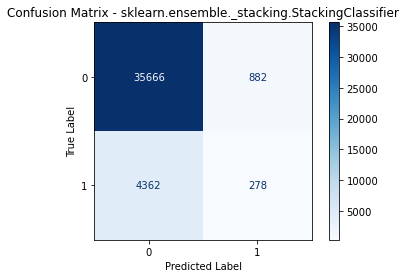

In [34]:
#train stacked model
stack_model = classifier_SKF(stack_model,X,y)

## Metrics Stacking Model's : <a class="anchor" id="1.16"></a>

In [35]:
from sklearn.metrics import classification_report
pred = stack_model.predict(X)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     36548
           1       0.24      0.06      0.10      4640

    accuracy                           0.87     41188
   macro avg       0.57      0.52      0.51     41188
weighted avg       0.82      0.87      0.84     41188



## Save model Production <a class="anchor" id="1.17"></a>

In [37]:
import pickle
pickle.dump(stack_model, open('../models/model_stacking_v1.pkl', 'wb'))